In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os,sys
from scipy import stats
from collections import Counter
plt.style.use('seaborn-white')

In [3]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=3,2
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =1
plt.rcParams['lines.linewidth'] =1
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=1) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

# Broad

In [308]:
df=pd.read_csv('../data_integration/CCLE_integrated_data_broad_comp_cosmic_20230413.txt',sep='\t',index_col=0)

/Users/tshiro/.pyenv/versions/miniforge3-4.10/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [309]:
df['HRD_score_broad']=df['HRD_score']

In [310]:
brca1_met=[]
for idx in df.index:
    if df.loc[idx,'BRCA1_methylation_broad']==1:
        brca1_met.append(1)
    elif df.loc[idx,'BRCA1_methylation_cosmic_likely']==1:
        brca1_met.append(1)
    elif df.loc[idx,'BRCA1_methylation_broad']==0:
        brca1_met.append(0)
    elif df.loc[idx,'BRCA1_methylation_cosmic_likely']==0:
        brca1_met.append(0)
    else:
        brca1_met.append(np.nan)
df['BRCA1_methylation']=brca1_met

In [311]:
brca_status=[]
for idx in df.index:
    if df.loc[idx,'BRCA1']=='LOH':
        brca_status.append('BRCA1_LOH')
    elif df.loc[idx,'BRCA2']=='LOH':
        brca_status.append('BRCA2_LOH')
    elif df.loc[idx,'BRCA2']=='LOH':
        brca_status.append('BRCA2_LOH')
    elif df.loc[idx,'BRCA1_methylation']==1:
        brca_status.append('BRCA1_methylation')
    elif df.loc[idx,'otherHRR_LOH']==1:
        brca_status.append('HRR_LOH')
    elif df.loc[idx,'BRCA1']=='unknown':
        brca_status.append('BRCA1_unknown')
    elif df.loc[idx,'otherHRR_unknown']==1:
        brca_status.append('HRR_unknown')
    elif df.loc[idx,'BRCA1']=='nonLOH':
        brca_status.append('BRCA1_nonLOH')
    elif df.loc[idx,'BRCA2']=='nonLOH':
        brca_status.append('BRCA2_nonLOH')
    elif df.loc[idx,'otherHRR_nonLOH']==1:
        brca_status.append('HRR_nonLOH')
    elif (df.loc[idx,'BRCA1']=='wt')&(df.loc[idx,'BRCA2']=='wt')&(df.loc[idx,'BRCA1_methylation']==0):
        brca_status.append('wt')
    else:
        brca_status.append(np.nan)

In [312]:
df['BRCA_status']=brca_status

In [313]:
Counter(df['BRCA_status']).most_common()

[('wt', 904),
 (nan, 559),
 ('HRR_nonLOH', 180),
 ('HRR_LOH', 60),
 ('HRR_unknown', 48),
 ('BRCA2_nonLOH', 47),
 ('BRCA1_nonLOH', 12),
 ('BRCA1_LOH', 10),
 ('BRCA2_LOH', 9),
 ('BRCA1_methylation', 8),
 ('BRCA1_unknown', 2)]

In [314]:
Counter(df['BRCA_status']).most_common()

[('wt', 904),
 (nan, 559),
 ('HRR_nonLOH', 180),
 ('HRR_LOH', 60),
 ('HRR_unknown', 48),
 ('BRCA2_nonLOH', 47),
 ('BRCA1_nonLOH', 12),
 ('BRCA1_LOH', 10),
 ('BRCA2_LOH', 9),
 ('BRCA1_methylation', 8),
 ('BRCA1_unknown', 2)]

In [315]:
df=df[(df['BRCA_status'].isna()==False)]
#df=df[~df['BRCA_status'].isin(['HRR_unknown','BRCA1_unknown'])]
df.shape

(1280, 1022)

In [316]:
df['BRCA_alteration']=((df['BRCA1_LOH']==1)|(df['BRCA1_methylation']==1)|(df['BRCA2_LOH']==1)).astype(int)

In [317]:
df['BRCA_alteration'].sum()

27

In [318]:
(~df['HRD_score_broad'].isna()).sum()

914

In [319]:
(~df['SigMA_broad'].isna()).sum()

1280

In [320]:
df0=df.copy()

### drug_anno

In [321]:
platinums=set(df.columns[(df.columns.str.contains('platin'))])
platinums

{'CTRP2_carboplatin_26979',
 'CTRP2_oxaliplatin_375582',
 'GDSC1_Cisplatin_1005',
 'GDSC2_Cisplatin_1005',
 'GDSC2_Oxaliplatin_1089',
 'GDSC2_Oxaliplatin_1806',
 'PRISM_carboplatin_BRD-K90947825-001-02-7',
 'PRISM_cisplatin_BRD-K69172251-001-08-9',
 'PRISM_oxaliplatin_BRD-K78960041-001-05-7',
 'gCSI_Cisplatin_CID24191118'}

In [322]:
parpis=set(df.columns[(df.columns.str.contains('parib'))])
parpis

{'CTRP1_olaparib_411867',
 'CTRP1_rucaparib_628605',
 'CTRP1_veliparib_606034',
 'CTRP2_olaparib_411867',
 'CTRP2_veliparib_606034',
 'GDSC1_Olaparib_1017',
 'GDSC1_Olaparib_1495',
 'GDSC1_Rucaparib_1175',
 'GDSC1_Talazoparib_1259',
 'GDSC1_Veliparib_1018',
 'GDSC2_Niraparib_1177',
 'GDSC2_Olaparib_1017',
 'GDSC2_Talazoparib_1259',
 'PRISM_niraparib_BRD-K54955827-001-02-2',
 'PRISM_olaparib_BRD-K02113016-001-15-4',
 'PRISM_olaparib_BRD-K02113016-001-19-6',
 'PRISM_talazoparib_BRD-K95142244-001-01-5'}

In [323]:
drug_gdsc1=set(df.columns[df.columns.str.startswith('GDSC1')])
drug_gdsc2=set(df.columns[df.columns.str.contains('GDSC2')])
drug_ctrp1=set(df.columns[df.columns.str.contains('CTRP1')])
drug_ctrp2=set(df.columns[df.columns.str.contains('CTRP2')])
drug_prism=set(df.columns[df.columns.str.startswith("PRISM")])
drug_gcsi=set(df.columns[df.columns.str.contains('gCSI')])

In [324]:
drug_all_set=drug_gdsc1|drug_gdsc2|drug_ctrp1|drug_ctrp2|drug_prism|drug_gcsi
len(drug_all_set)

870

In [325]:
drug_anno=pd.read_csv('../data_integration/20221125_add_ic50/Drug_annotaion_integrated.txt'
                      ,sep='\t',index_col=0)
drug_anno['cid']=drug_anno['cid'].astype(int)

In [326]:
df_drug=df[~df[drug_all_set].isna().all(axis=1)]

In [327]:
df_drug.shape

(1182, 1023)

## BRCA status vs Drug sensitivity

In [328]:
from statsmodels.stats.multitest import multipletests

In [329]:
drug_all=[]
for x in drug_all_set:
    if 'C50' in x:
        continue
    else:
        drug_all.append(x)

In [330]:
drug_all=sorted(drug_all)

In [331]:
len(drug_all)

870

### BRCA12 altaration

In [332]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH']).sum()

25

In [333]:
df_drug[~df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])].shape

(1157, 1023)

In [334]:
df_drug[df_drug['BRCA_status'].isin(['wt'])].shape

(872, 1023)

In [335]:
df=df_drug.copy()

In [336]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df[df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_unknown','BRCA1_unknown'])][drug].dropna().values   
    b=df[df['BRCA_status'].isin(['wt']#,'HRR_nonLOH','HRR_LOH','BRCA2_nonLOH','HRR_unknown','BRCA1_nonLOH']
                                )][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [337]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps


In [338]:
df_cor=df_cor.dropna()

In [339]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [340]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541            10.0  0.478000  0.597583  0.466985  0.330697   
CTRP2_ABT-737_411738            17.0 -0.243000  0.485008  0.856060  0.067496   
CTRP2_AT13387_688229            11.0  0.583100  0.541504  0.417579  0.379261   
CTRP2_AZD1480_660306             9.0  0.455000  0.384669  0.459549  0.337668   
CTRP2_AZD4547_660325            15.0  0.620500  1.011457  0.009262  2.033288   
...                              ...       ...       ...       ...       ...   
gCSI_Paclitaxel_CID36314        10.0  0.029611 -0.041444  0.831634  0.080068   
gCSI_Palbociclib_CID5330286      6.0 -0.076111 -0.084366  0.008031  2.095257   
gCSI_Tanespimycin_CID6505803    10.0  0.158500  0.130370  0.035594  1.448625   
gCSI_Tivantinib_CID11494412     10.0 -0.050667 -0.073630  0.102609  0.988814   
gCSI_Vorinostat_CID5311         10.0 -0.086444 -0.062632  0.225715  0.646440   

                              significant                          drug_anno  \
CTRP2_ABT-199_666541                    0               Apoptosis regulation   
CTRP2_ABT-737_411738                    0               Apoptosis regulation   
CTRP2_AT13387_688229                    0                             Others   
CTRP2_AZD1480_660306                    0                             Others   
CTRP2_AZD4547_660325                    1                      RTK signaling   
...                                   ...                                ...   
gCSI_Paclitaxel_CID36314                0                    Antimicrotubule   
gCSI_Palbociclib_CID5330286             1                         Cell cycle   
gCSI_Tanespimycin_CID6505803            1  Protein stability and degradation   
gCSI_Tivantinib_CID11494412             0                             Others   
gCSI_Vorinostat_CID5311                 0                  Chromatin-related   

                                   cid  
CTRP2_ABT-199_666541          49846579  
CTRP2_ABT-737_411738          11228183  
CTRP2_AT13387_688229          11955716  
CTRP2_AZD1480_660306          16659841  
CTRP2_AZD4547_660325          51039095  
...                                ...  
gCSI_Paclitaxel_CID36314         36314  
gCSI_Palbociclib_CID5330286    5330286  
gCSI_Tanespimycin_CID6505803   6505803  
gCSI_Tivantinib_CID11494412   11494412  
gCSI_Vorinostat_CID5311           5311  

[756 rows x 8 columns]

In [341]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif   pvalues   mlog10p  \
GDSC2_Foretinib_2040           17.0  0.088439  0.106701  0.000118  3.926293   
GDSC1_Vorinostat_1012          20.0  0.095145  0.095242  0.000427  3.369581   
GDSC2_Luminespib_1559          17.0  0.148574  0.110782  0.002511  2.600183   
CTRP2_MGCD-265_628622          18.0  0.477500  0.947430  0.003304  2.480915   
CTRP2_barasertib_601923        18.0  0.781500  2.112513  0.003751  2.425845   
...                             ...       ...       ...       ...       ...   
GDSC1_WHI-P97_288              20.0 -0.015036 -0.019245  0.009127  2.039667   
gCSI_Palbociclib_CID5330286     6.0 -0.076111 -0.084366  0.008031  2.095257   
GDSC1_Afatinib_1377            20.0 -0.049040 -0.048723  0.003309  2.480291   
GDSC1_IOX2_1230                19.0 -0.006299 -0.001379  0.002341  2.630586   
GDSC2_OSI-027_1594              8.0 -0.065616 -0.049054  0.000775  3.110813   

                             significant                          drug_anno  \
GDSC2_Foretinib_2040                   1                      RTK signaling   
GDSC1_Vorinostat_1012                  1                  Chromatin-related   
GDSC2_Luminespib_1559                  1  Protein stability and degradation   
CTRP2_MGCD-265_628622                  1                             Others   
CTRP2_barasertib_601923                1                             Others   
...                                  ...                                ...   
GDSC1_WHI-P97_288                      1                             Others   
gCSI_Palbociclib_CID5330286            1                         Cell cycle   
GDSC1_Afatinib_1377                    1                     EGFR signaling   
GDSC1_IOX2_1230                        1                             Others   
GDSC2_OSI-027_1594                     1                PI3K/MTOR signaling   

                                  cid  
GDSC2_Foretinib_2040         42642645  
GDSC1_Vorinostat_1012            5311  
GDSC2_Luminespib_1559        10096043  
CTRP2_MGCD-265_628622        24901704  
CTRP2_barasertib_601923      11497983  
...                               ...  
GDSC1_WHI-P97_288                3796  
gCSI_Palbociclib_CID5330286   5330286  
GDSC1_Afatinib_1377          10184653  
GDSC1_IOX2_1230              54685215  
GDSC2_OSI-027_1594           44224160  

[756 rows x 8 columns]

In [342]:
NP=len(df_cor_p)
NN=len(df_cor_n)

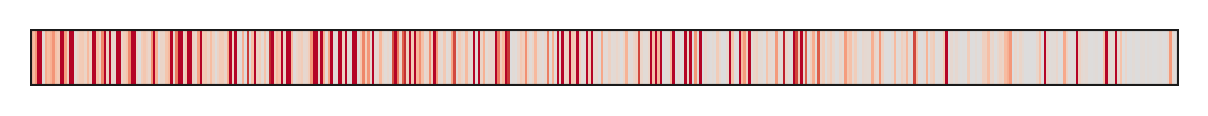

In [343]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

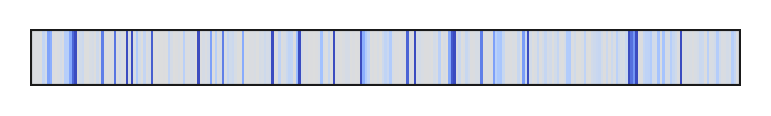

In [344]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

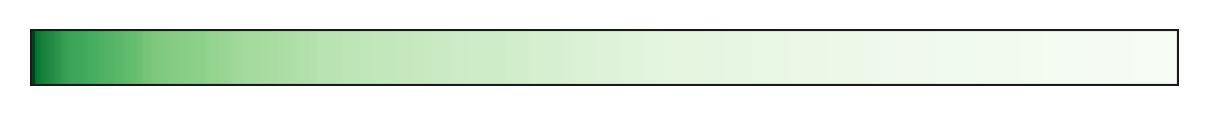

In [345]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

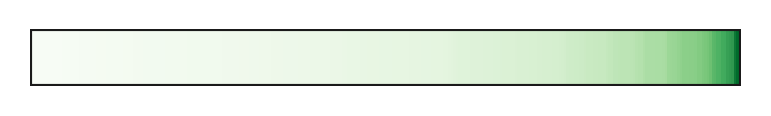

In [346]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

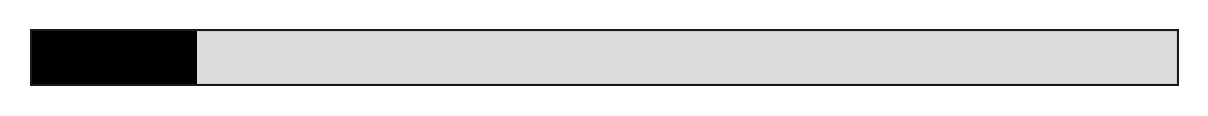

In [347]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

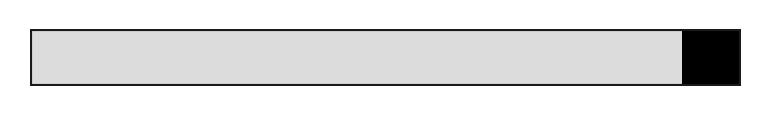

In [348]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [349]:
counter=Counter(df_cor_pn['drug_anno']).most_common()

In [350]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'Antimetabolite',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule',
 'DNA inhibitor',
 'EGFR signaling',
 'Protein stability and degradation',
 'Apoptosis regulation',
 'Hormone-related',
 'DNA alkylator',
 'Topoisomerase inhibitor',
 'PARP inhibitor',
 'WNT signaling',
 'Genome integrity',
 'Platinum',
 'Metabolism',
 'IGF1R signaling',
 'Cytoskeleton',
 'p53 pathway',
 'JNK and p38 signaling']

In [351]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [352]:
anno_platinum=[]
for index in df_cor_pn.index:
    if 'isplatin' in index:
        anno_platinum.append(1)
    elif 'arboplatin' in index:
        anno_platinum.append(3)
    elif 'xaliplatin' in index:
        anno_platinum.append(2)
    else:
        anno_platinum.append(0)
df_cor_pn['platinum_color']=anno_platinum

In [353]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

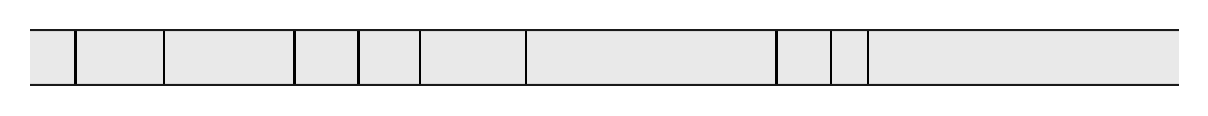

In [354]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [355]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

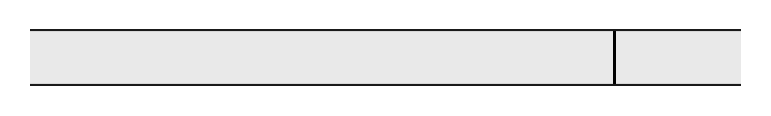

In [356]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [357]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

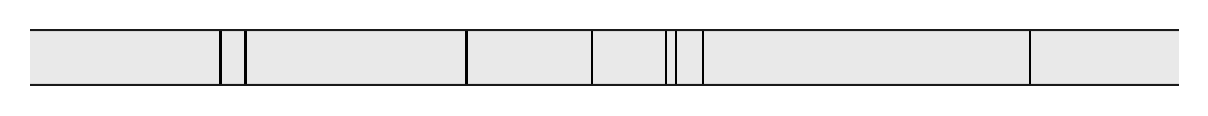

In [358]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


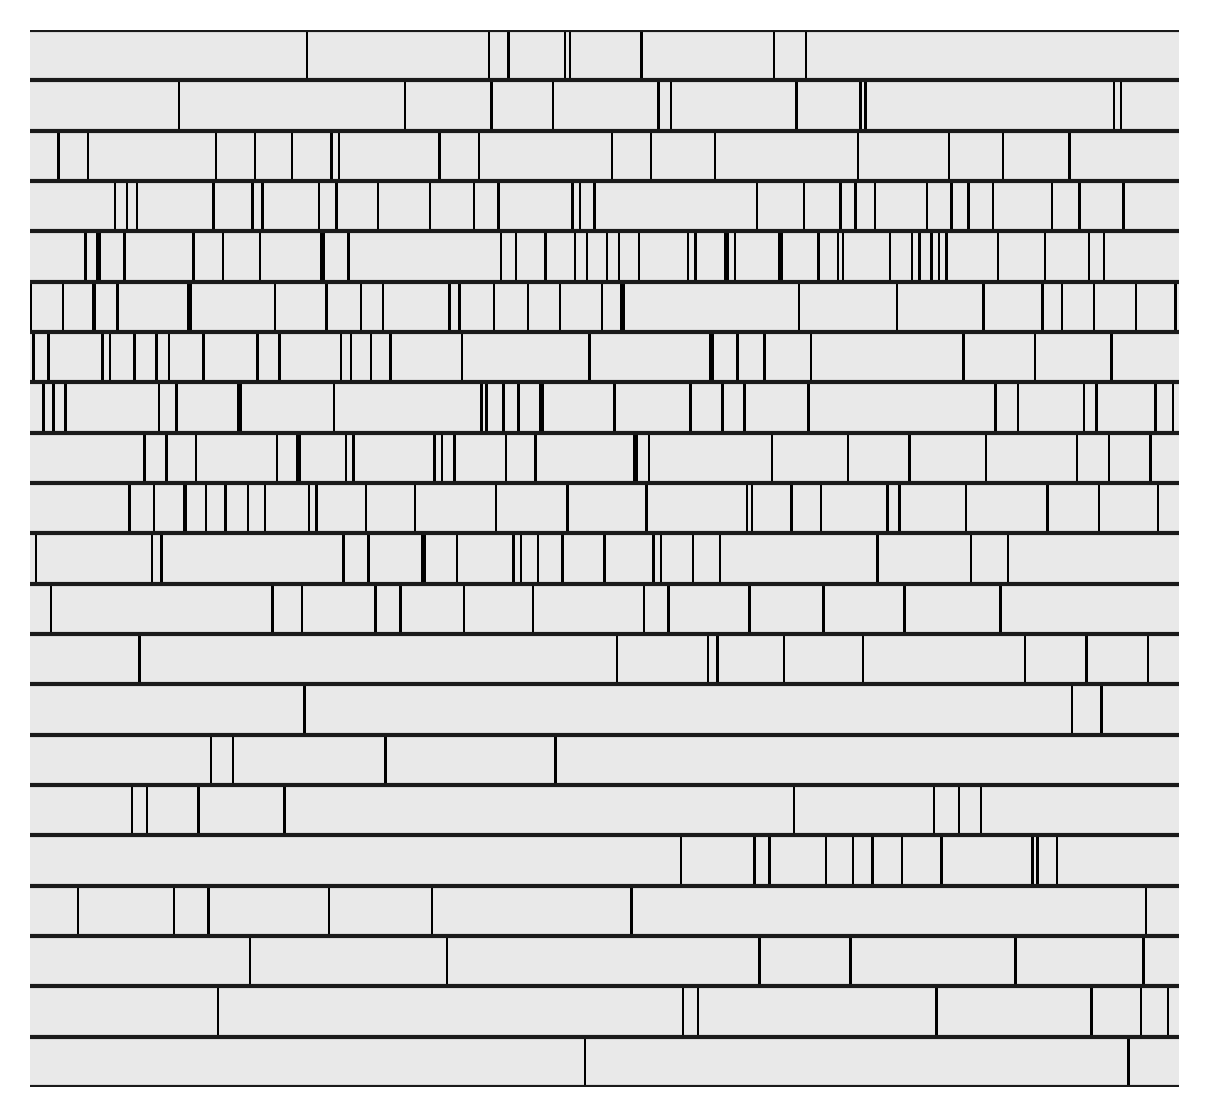

In [359]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [360]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

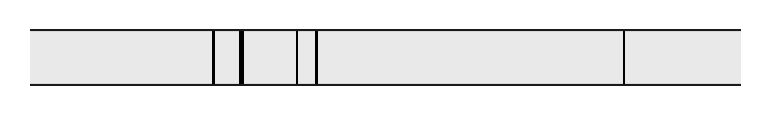

In [361]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


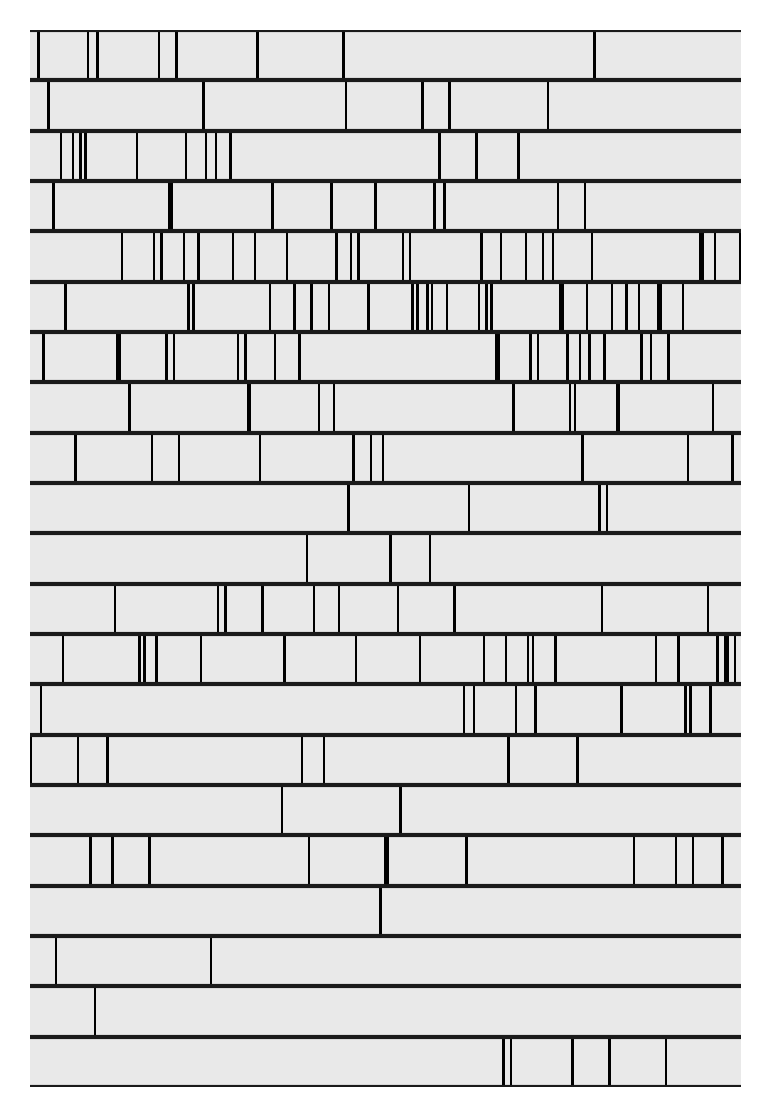

In [362]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [363]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Oxaliplatin_1089                      16.0  0.017722  0.043411   
GDSC2_Cisplatin_1005                        17.0  0.031376  0.039406   
GDSC2_Oxaliplatin_1806                      15.0  0.009080  0.028683   
GDSC1_Cisplatin_1005                        20.0  0.009872  0.028787   
CTRP2_carboplatin_26979                     18.0  0.166000  0.256969   
CTRP2_oxaliplatin_375582                    18.0  0.163000  0.464937   
PRISM_carboplatin_BRD-K90947825-001-02-7    10.0  0.148143  0.076457   
gCSI_Cisplatin_CID24191118                  10.0  0.056333  0.021645   
PRISM_oxaliplatin_BRD-K78960041-001-05-7    11.0  0.018087  0.012186   
PRISM_cisplatin_BRD-K69172251-001-08-9      11.0 -0.013422 -0.091784   

                                           pvalues   mlog10p  significant  \
GDSC2_Oxaliplatin_1089                    0.011562  1.936967            1   
GDSC2_Cisplatin_1005                      0.039501  1.403389            1   
GDSC2_Oxaliplatin_1806                    0.101070  0.995380            0   
GDSC1_Cisplatin_1005                      0.146806  0.833255            0   
CTRP2_carboplatin_26979                   0.177170  0.751610            0   
CTRP2_oxaliplatin_375582                  0.245012  0.610813            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.514545  0.288576            0   
gCSI_Cisplatin_CID24191118                0.567731  0.245858            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.642571  0.192079            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.146546  0.834026            0   

                                         drug_anno       cid  platinum_color  \
GDSC2_Oxaliplatin_1089                    Platinum   5310940               2   
GDSC2_Cisplatin_1005                      Platinum     84691               1   
GDSC2_Oxaliplatin_1806                    Platinum   5310940               2   
GDSC1_Cisplatin_1005                      Platinum     84691               1   
CTRP2_carboplatin_26979                   Platinum     38904               3   
CTRP2_oxaliplatin_375582                  Platinum  24197464               2   
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756               3   
gCSI_Cisplatin_CID24191118                Platinum  24191118               1   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464               2   
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118               1   

                                               FDR  
GDSC2_Oxaliplatin_1089                    0.115620  
GDSC2_Cisplatin_1005                      0.197506  
GDSC2_Oxaliplatin_1806                    0.293613  
GDSC1_Cisplatin_1005                      0.293613  
CTRP2_carboplatin_26979                   0.295283  
CTRP2_oxaliplatin_375582                  0.350017  
PRISM_carboplatin_BRD-K90947825-001-02-7  0.630812  
gCSI_Cisplatin_CID24191118                0.630812  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.642571  
PRISM_cisplatin_BRD-K69172251-001-08-9    0.293613

In [364]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
PRISM_olaparib_BRD-K02113016-001-19-6       11.0  0.059524  0.043416   
GDSC2_Niraparib_1177                        15.0  0.005434  0.028097   
PRISM_talazoparib_BRD-K95142244-001-01-5    12.0  0.095889  0.043518   
CTRP2_olaparib_411867                       18.0  0.339500  0.242052   
PRISM_niraparib_BRD-K54955827-001-02-2      12.0  0.013989  0.027824   
GDSC2_Talazoparib_1259                      16.0  0.001030  0.065922   
GDSC1_Rucaparib_1175                        20.0  0.001260  0.000517   
GDSC1_Talazoparib_1259                      20.0  0.004271  0.040311   
GDSC2_Olaparib_1017                         17.0 -0.002356  0.003897   
GDSC1_Veliparib_1018                        20.0 -0.001277  0.001672   
CTRP2_veliparib_606034                      18.0 -0.155500  0.111047   
PRISM_olaparib_BRD-K02113016-001-15-4       12.0 -0.125062 -0.036365   
GDSC1_Olaparib_1017                         20.0 -0.002712  0.002687   
GDSC1_Olaparib_1495                         19.0 -0.012046 -0.005304   

                                           pvalues   mlog10p  significant  \
PRISM_olaparib_BRD-K02113016-001-19-6     0.062463  1.204377            0   
GDSC2_Niraparib_1177                      0.080489  1.094266            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.209066  0.679716            0   
CTRP2_olaparib_411867                     0.323061  0.490716            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.410650  0.386528            0   
GDSC2_Talazoparib_1259                    0.413839  0.383168            0   
GDSC1_Rucaparib_1175                      0.424401  0.372224            0   
GDSC1_Talazoparib_1259                    0.814607  0.089052            0   
GDSC2_Olaparib_1017                       0.728996  0.137275            0   
GDSC1_Veliparib_1018                      0.702937  0.153084            0   
CTRP2_veliparib_606034                    0.699233  0.155378            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.618710  0.208513            0   
GDSC1_Olaparib_1017                       0.584281  0.233378            0   
GDSC1_Olaparib_1495                       0.138085  0.859853            0   

                                               drug_anno        cid  \
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625   
GDSC2_Niraparib_1177                      PARP inhibitor   24958200   
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082   
CTRP2_olaparib_411867                     PARP inhibitor   23725625   
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200   
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241   
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953   
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241   
GDSC2_Olaparib_1017                       PARP inhibitor   23725625   
GDSC1_Veliparib_1018                      PARP inhibitor   11960529   
CTRP2_veliparib_606034                    PARP inhibitor   11960529   
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625   
GDSC1_Olaparib_1017                       PARP inhibitor   23725625   
GDSC1_Olaparib_1495                       PARP inhibitor   23725625   

                                          platinum_color       FDR  
PRISM_olaparib_BRD-K02113016-001-19-6                  0  0.563420  
GDSC2_Niraparib_1177                                   0  0.563420  
PRISM_talazoparib_BRD-K95142244-001-01-5               0  0.731732  
CTRP2_olaparib_411867                                  0  0.742701  
PRISM_niraparib_BRD-K54955827-001-02-2                 0  0.742701  
GDSC2_Talazoparib_1259                                 0  0.742701  
GDSC1_Rucaparib_1175                                   0  0.742701  
GDSC1_Talazoparib_1259                                 0  0.814607  
GDSC2_Olaparib_1017                                    0  0.785073  
GDSC1_Veliparib_1018                             

### HRR alteration

In [365]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH']).sum()

82

In [366]:
df_drug[~df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])].shape

(1100, 1023)

In [367]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df[df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
    b=df[df['BRCA_status'].isin(['wt'])][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [368]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps

In [369]:
df_cor=df_cor.dropna()

In [370]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [371]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541            39.0  0.476000  0.616796  0.065167  1.185975   
CTRP2_ABT-737_411738            54.0  0.469000  0.599541  0.090860  1.041627   
CTRP2_AT13387_688229            32.0  0.696600  0.687475  0.132988  0.876188   
CTRP2_AZD1480_660306            29.0  0.008000  0.254220  0.687634  0.162643   
CTRP2_AZD4547_660325            52.0  0.476000  0.604390  0.008172  2.087669   
...                              ...       ...       ...       ...       ...   
gCSI_TGX221_CID9907093          11.0  0.074000  0.033835  0.232242  0.634060   
gCSI_Tanespimycin_CID6505803    22.0  0.034389  0.037705  0.413070  0.383977   
gCSI_Tivantinib_CID11494412     36.0 -0.014167 -0.004038  0.810781  0.091097   
gCSI_Vincristine_CID5978        10.0 -0.033056 -0.017056  0.978056  0.009636   
gCSI_Vorinostat_CID5311         36.0 -0.031111 -0.036966  0.164840  0.782937   

                              significant                          drug_anno  \
CTRP2_ABT-199_666541                    0               Apoptosis regulation   
CTRP2_ABT-737_411738                    0               Apoptosis regulation   
CTRP2_AT13387_688229                    0                             Others   
CTRP2_AZD1480_660306                    0                             Others   
CTRP2_AZD4547_660325                    1                      RTK signaling   
...                                   ...                                ...   
gCSI_TGX221_CID9907093                  0                PI3K/MTOR signaling   
gCSI_Tanespimycin_CID6505803            0  Protein stability and degradation   
gCSI_Tivantinib_CID11494412             0                             Others   
gCSI_Vincristine_CID5978                0                    Antimicrotubule   
gCSI_Vorinostat_CID5311                 0                  Chromatin-related   

                                   cid  
CTRP2_ABT-199_666541          49846579  
CTRP2_ABT-737_411738          11228183  
CTRP2_AT13387_688229          11955716  
CTRP2_AZD1480_660306          16659841  
CTRP2_AZD4547_660325          51039095  
...                                ...  
gCSI_TGX221_CID9907093         9907093  
gCSI_Tanespimycin_CID6505803   6505803  
gCSI_Tivantinib_CID11494412   11494412  
gCSI_Vincristine_CID5978          5978  
gCSI_Vorinostat_CID5311           5311  

[768 rows x 8 columns]

In [372]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif   pvalues   mlog10p  \
GDSC2_Buparlisib_1873     56.0  0.032389  0.030116  0.000450  3.346926   
GDSC1_Vorinostat_1012     64.0  0.050680  0.056461  0.000873  3.059176   
GDSC2_BMS-536924_1091     56.0  0.030580  0.048086  0.000883  3.053816   
CTRP2_COL-3_665914        45.0  0.683000  0.670939  0.001235  2.908296   
GDSC2_MG-132_1862         57.0  0.037413  0.047152  0.001311  2.882503   
...                        ...       ...       ...       ...       ...   
GDSC1_Cetuximab_1114      56.0 -0.008850 -0.002537  0.018021  1.744215   
GDSC1_CGP-082996_54       21.0 -0.042919 -0.029612  0.016716  1.776858   
GDSC1_Sorafenib_30        23.0 -0.050612 -0.025775  0.012357  1.908071   
GDSC1_Doramapimod_1042    64.0 -0.010748 -0.005039  0.004896  2.310169   
GDSC1_PHA-665752_6        23.0 -0.014597 -0.000699  0.004664  2.331231   

                        significant                          drug_anno  \
GDSC2_Buparlisib_1873             1                PI3K/MTOR signaling   
GDSC1_Vorinostat_1012             1                  Chromatin-related   
GDSC2_BMS-536924_1091             1                    IGF1R signaling   
CTRP2_COL-3_665914                1                             Others   
GDSC2_MG-132_1862                 1  Protein stability and degradation   
...                             ...                                ...   
GDSC1_Cetuximab_1114              1                     EGFR signaling   
GDSC1_CGP-082996_54               1                         Cell cycle   
GDSC1_Sorafenib_30                1                      RTK signaling   
GDSC1_Doramapimod_1042            1              JNK and p38 signaling   
GDSC1_PHA-665752_6                1                      RTK signaling   

                             cid  
GDSC2_Buparlisib_1873   16654980  
GDSC1_Vorinostat_1012       5311  
GDSC2_BMS-536924_1091   10390396  
CTRP2_COL-3_665914      54678924  
GDSC2_MG-132_1862         462382  
...                          ...  
GDSC1_Cetuximab_1114    85668777  
GDSC1_CGP-082996_54     24825971  
GDSC1_Sorafenib_30        216239  
GDSC1_Doramapimod_1042    156422  
GDSC1_PHA-665752_6      10461815  

[768 rows x 8 columns]

In [373]:
NP=len(df_cor_p)
NN=len(df_cor_n)

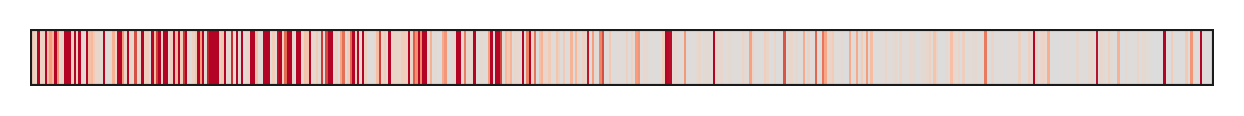

In [374]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

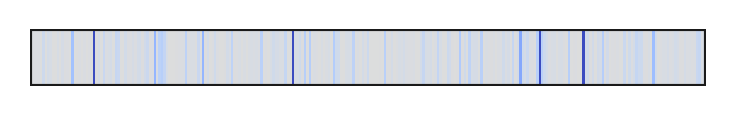

In [375]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

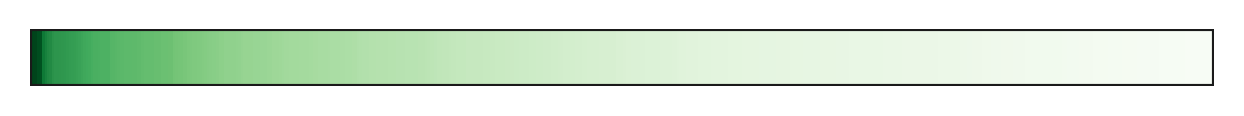

In [376]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

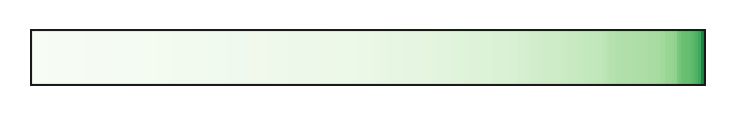

In [377]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

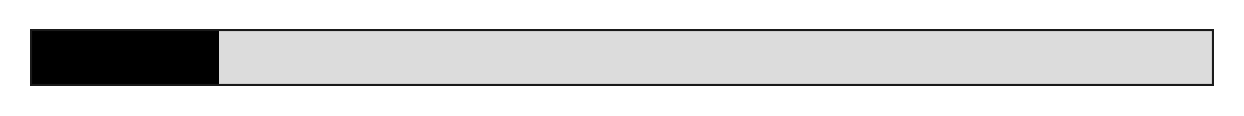

In [378]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

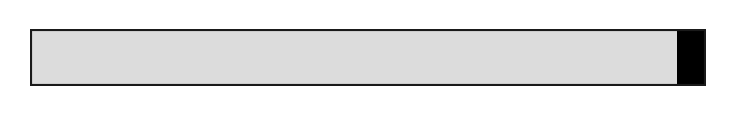

In [379]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [380]:
counter=Counter(df_cor_pn['drug_anno']).most_common()

In [381]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'Antimetabolite',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule',
 'DNA inhibitor',
 'EGFR signaling',
 'Protein stability and degradation',
 'Apoptosis regulation',
 'Hormone-related',
 'DNA alkylator',
 'Topoisomerase inhibitor',
 'PARP inhibitor',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Platinum',
 'IGF1R signaling',
 'Cytoskeleton',
 'p53 pathway',
 'JNK and p38 signaling']

In [382]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [383]:
anno_platinum=[]
for index in df_cor_pn.index:
    if 'isplatin' in index:
        anno_platinum.append(1)
    elif 'arboplatin' in index:
        anno_platinum.append(3)
    elif 'xaliplatin' in index:
        anno_platinum.append(2)
    else:
        anno_platinum.append(0)
df_cor_pn['platinum_color']=anno_platinum

In [384]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

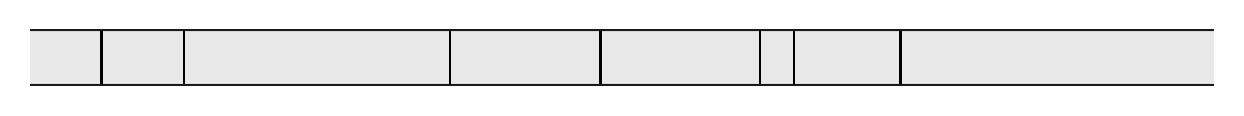

In [385]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [386]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

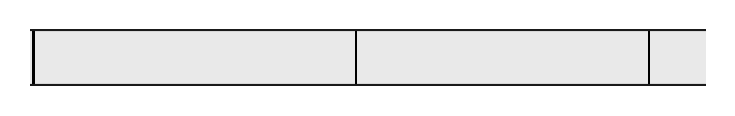

In [387]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [388]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

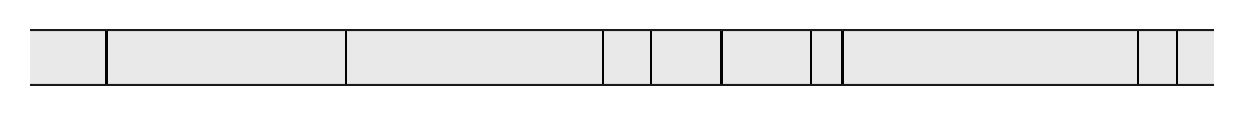

In [389]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


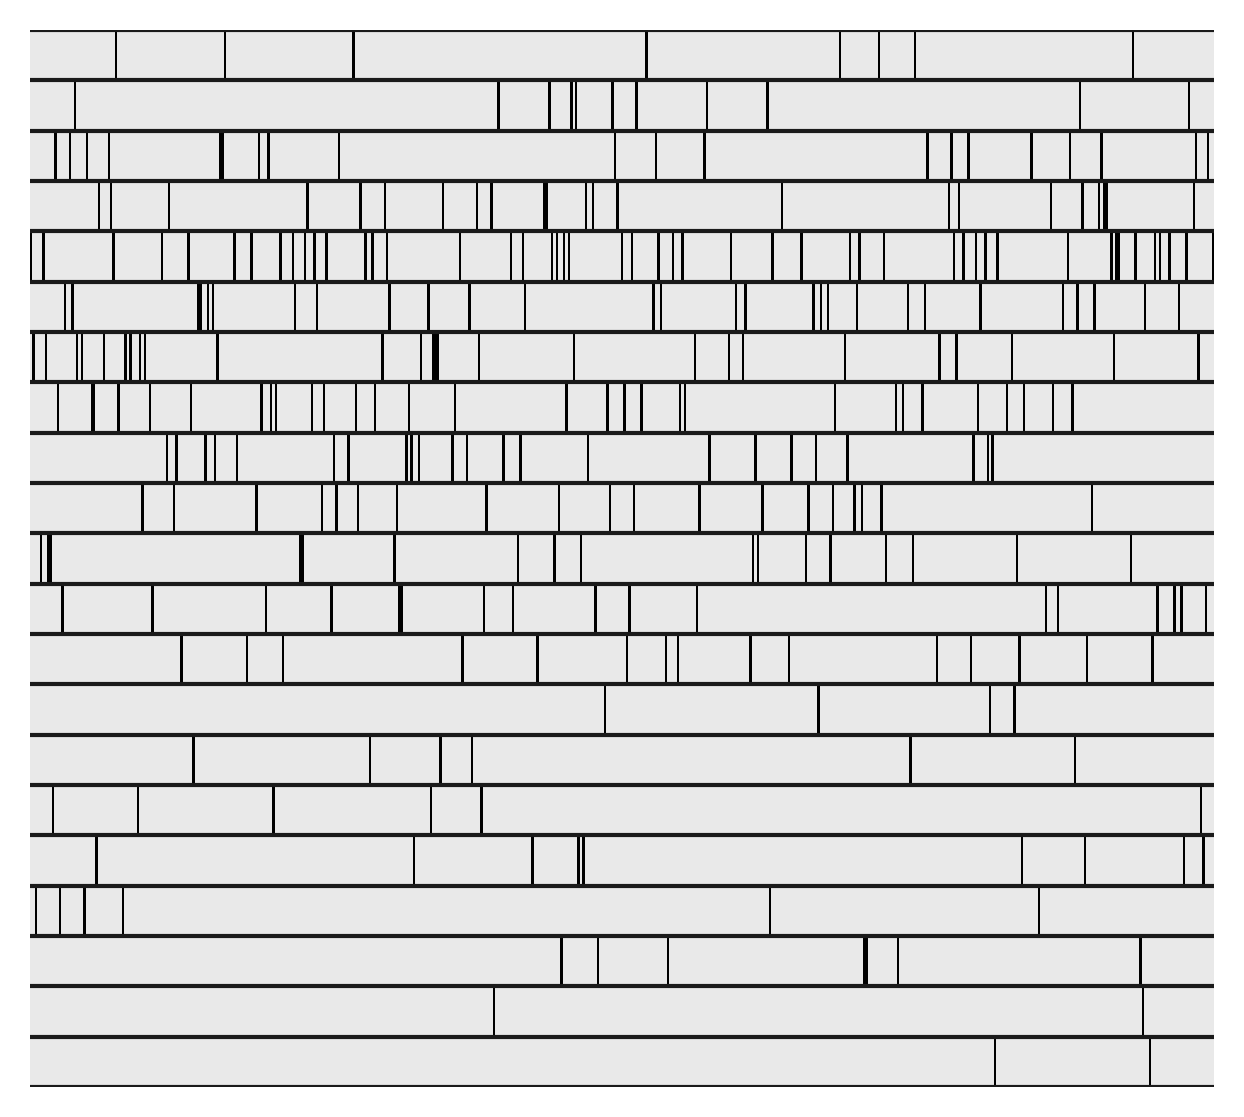

In [390]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [391]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

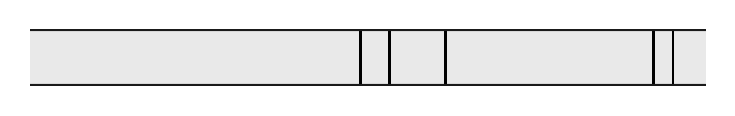

In [392]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


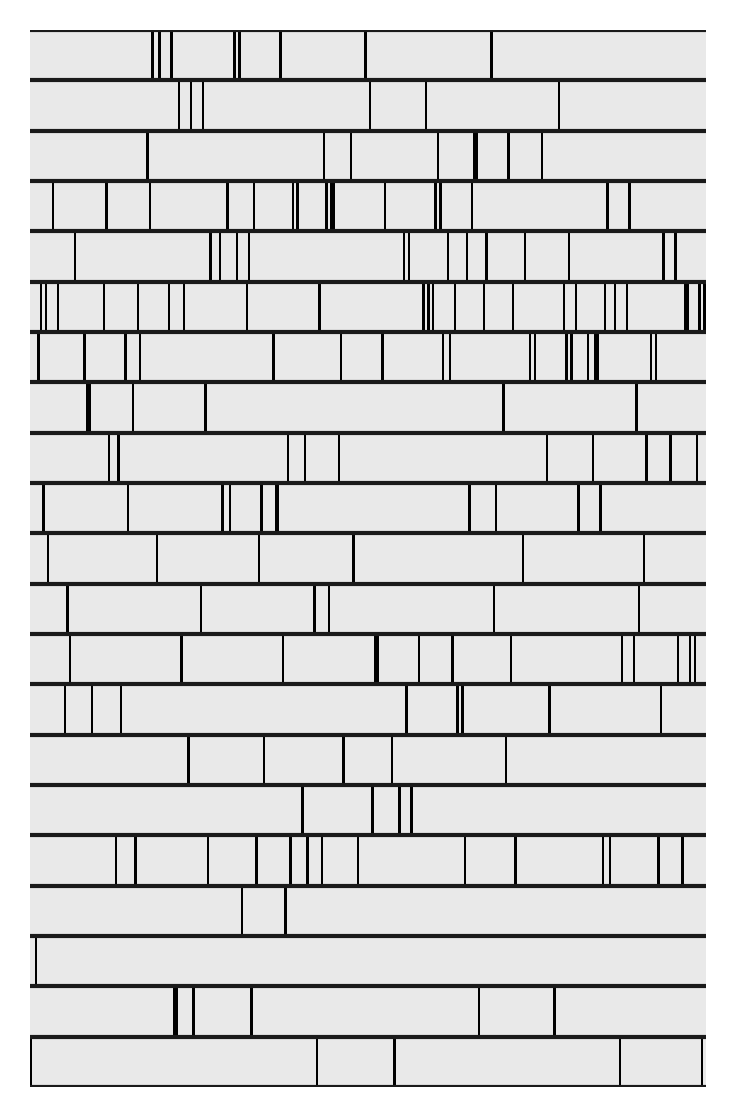

In [393]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [394]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Cisplatin_1005                        57.0  0.018483  0.026100   
CTRP2_oxaliplatin_375582                    55.0  0.266000  0.434020   
GDSC2_Oxaliplatin_1089                      58.0  0.006920  0.019415   
PRISM_carboplatin_BRD-K90947825-001-02-7    38.0  0.176583  0.047341   
CTRP2_carboplatin_26979                     59.0  0.007000  0.113893   
GDSC1_Cisplatin_1005                        64.0  0.005509  0.010835   
gCSI_Cisplatin_CID24191118                  22.0  0.036500  0.022886   
PRISM_oxaliplatin_BRD-K78960041-001-05-7    39.0 -0.005493 -0.005011   
GDSC2_Oxaliplatin_1806                      53.0 -0.000440  0.012289   
PRISM_cisplatin_BRD-K69172251-001-08-9      40.0 -0.011916 -0.019781   

                                           pvalues   mlog10p  significant  \
GDSC2_Cisplatin_1005                      0.016176  1.791137            1   
CTRP2_oxaliplatin_375582                  0.034474  1.462503            1   
GDSC2_Oxaliplatin_1089                    0.157080  0.803879            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.274666  0.561196            0   
CTRP2_carboplatin_26979                   0.422557  0.374115            0   
GDSC1_Cisplatin_1005                      0.451014  0.345810            0   
gCSI_Cisplatin_CID24191118                0.535026  0.271625            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.996620  0.001470            0   
GDSC2_Oxaliplatin_1806                    0.566322  0.246937            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.090395  1.043854            0   

                                         drug_anno       cid  platinum_color  \
GDSC2_Cisplatin_1005                      Platinum     84691               1   
CTRP2_oxaliplatin_375582                  Platinum  24197464               2   
GDSC2_Oxaliplatin_1089                    Platinum   5310940               2   
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756               3   
CTRP2_carboplatin_26979                   Platinum     38904               3   
GDSC1_Cisplatin_1005                      Platinum     84691               1   
gCSI_Cisplatin_CID24191118                Platinum  24191118               1   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464               2   
GDSC2_Oxaliplatin_1806                    Platinum   5310940               2   
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118               1   

                                               FDR  
GDSC2_Cisplatin_1005                      0.161757  
CTRP2_oxaliplatin_375582                  0.172372  
GDSC2_Oxaliplatin_1089                    0.392700  
PRISM_carboplatin_BRD-K90947825-001-02-7  0.549331  
CTRP2_carboplatin_26979                   0.629247  
GDSC1_Cisplatin_1005                      0.629247  
gCSI_Cisplatin_CID24191118                0.629247  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.996620  
GDSC2_Oxaliplatin_1806                    0.629247  
PRISM_cisplatin_BRD-K69172251-001-08-9    0.301317

In [395]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Niraparib_1177                        53.0  0.006844  0.019611   
GDSC2_Talazoparib_1259                      55.0  0.014545  0.046702   
CTRP2_olaparib_411867                       59.0  0.243000  0.076579   
GDSC2_Olaparib_1017                         57.0  0.003092  0.008316   
PRISM_olaparib_BRD-K02113016-001-19-6       38.0  0.028760  0.004135   
CTRP2_veliparib_606034                      59.0  0.009000  0.145919   
PRISM_niraparib_BRD-K54955827-001-02-2      40.0  0.020144  0.000672   
PRISM_talazoparib_BRD-K95142244-001-01-5    41.0  0.034146 -0.011490   
GDSC1_Olaparib_1017                         64.0  0.000315  0.004148   
GDSC1_Veliparib_1018                        64.0 -0.001262  0.001761   
GDSC1_Rucaparib_1175                        63.0 -0.002709 -0.001898   
GDSC1_Talazoparib_1259                      62.0 -0.000891 -0.019967   
PRISM_olaparib_BRD-K02113016-001-15-4       38.0 -0.120727 -0.061220   
GDSC1_Olaparib_1495                         60.0 -0.010195 -0.008666   

                                           pvalues   mlog10p  significant  \
GDSC2_Niraparib_1177                      0.016287  1.788167            1   
GDSC2_Talazoparib_1259                    0.096331  1.016234            0   
CTRP2_olaparib_411867                     0.276868  0.557727            0   
GDSC2_Olaparib_1017                       0.326239  0.486464            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.396206  0.402079            0   
CTRP2_veliparib_606034                    0.462486  0.334901            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.492405  0.307677            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.897895  0.046774            0   
GDSC1_Olaparib_1017                       0.948613  0.022911            0   
GDSC1_Veliparib_1018                      0.560090  0.251742            0   
GDSC1_Rucaparib_1175                      0.461916  0.335437            0   
GDSC1_Talazoparib_1259                    0.387853  0.411333            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.086624  1.062360            0   
GDSC1_Olaparib_1495                       0.058996  1.229174            0   

                                               drug_anno        cid  \
GDSC2_Niraparib_1177                      PARP inhibitor   24958200   
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241   
CTRP2_olaparib_411867                     PARP inhibitor   23725625   
GDSC2_Olaparib_1017                       PARP inhibitor   23725625   
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625   
CTRP2_veliparib_606034                    PARP inhibitor   11960529   
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200   
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082   
GDSC1_Olaparib_1017                       PARP inhibitor   23725625   
GDSC1_Veliparib_1018                      PARP inhibitor   11960529   
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953   
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241   
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625   
GDSC1_Olaparib_1495                       PARP inhibitor   23725625   

                                          platinum_color       FDR  
GDSC2_Niraparib_1177                                   0  0.228014  
GDSC2_Talazoparib_1259                                 0  0.337159  
CTRP2_olaparib_411867                                  0  0.626698  
GDSC2_Olaparib_1017                                    0  0.626698  
PRISM_olaparib_BRD-K02113016-001-19-6                  0  0.626698  
CTRP2_veliparib_606034                                 0  0.626698  
PRISM_niraparib_BRD-K54955827-001-02-2                 0  0.626698  
PRISM_talazoparib_BRD-K95142244-001-01-5               0  0.948613  
GDSC1_Olaparib_1017                                    0  0.948613  
GDSC1_Veliparib_1018                             

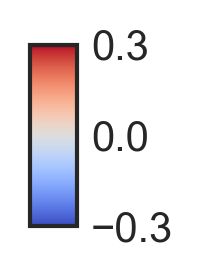

In [396]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=plt.get_cmap("coolwarm")
vmin=-0.3
vmax=0.3
bounds=[-0.3,0,0.3]
fontsize=10
label=""
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)

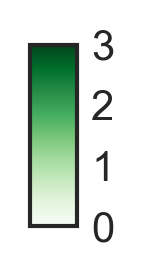

In [397]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=plt.get_cmap("Greens")
vmin=0
vmax=3
bounds=[0,1,2,3]
fontsize=10
label=''
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)

## Correlations with HRD score and Signature 3

In [398]:
df=df0.copy()

(914, 2)
r = 0.475, p = 1.25e-52


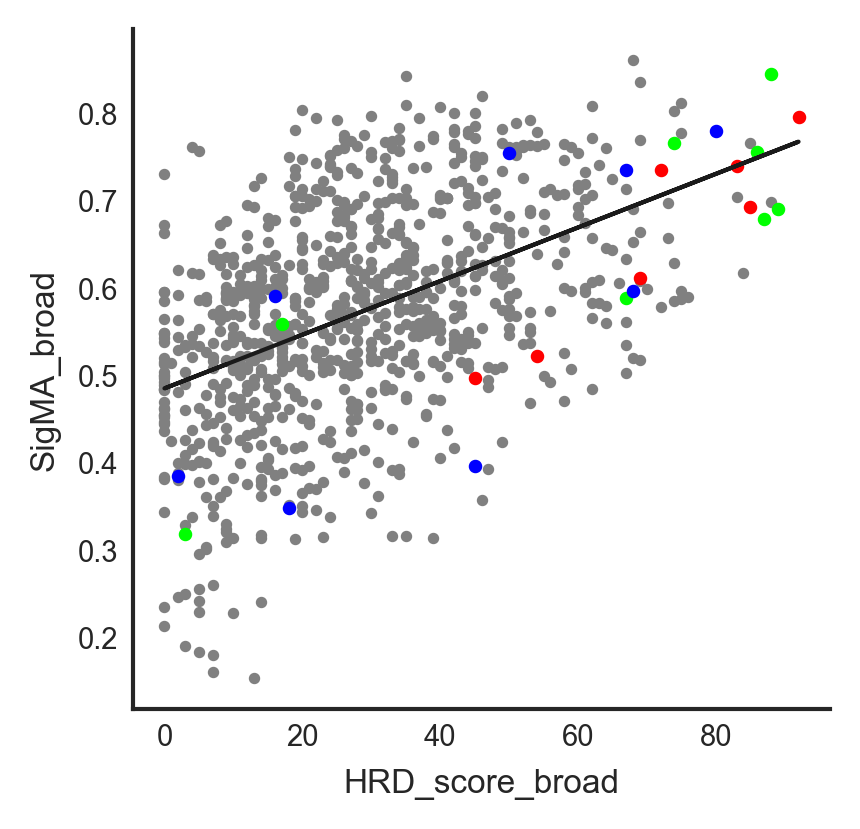

In [399]:
in_df=df.copy()
#plt_df=plt_df[plt_df[cat]=='']
val1,val2,val3='HRD_score_broad','SigMA_broad','BRCA_status'
plt_df=in_df[[val1,val2]].dropna()
print(plt_df.shape)
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
ax.set_xlabel(val1)
ax.set_ylabel(val2)
# linear regression, Pearson correlation
lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
ax.plot(x,a*x+b,lw=1,c='k')

plt_df2=in_df[[val1,val2,val3]].dropna()
plt_df3=plt_df2[plt_df2[val3]=='BRCA1_methylation']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='lime')

plt_df3=plt_df2[plt_df2[val3]=='BRCA1_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='red')

plt_df3=plt_df2[plt_df2[val3]=='BRCA2_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='blue')

ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)

print('r = {:.3f}, p = {:.2e}'.format(r,p))

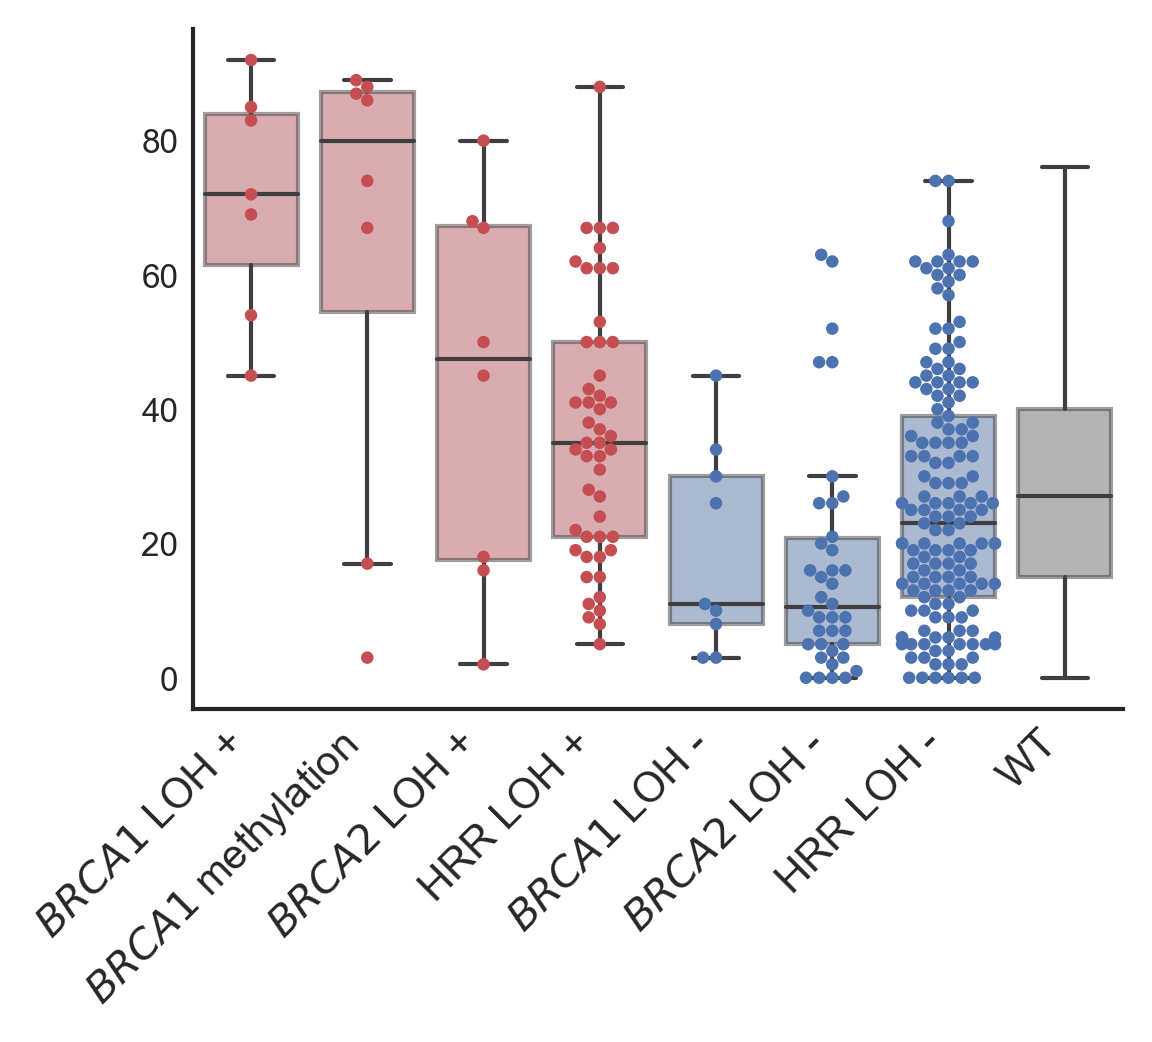

In [400]:
plt_df=df
cat='BRCA_status'
val='HRD_score_broad'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

/Users/tshiro/.pyenv/versions/miniforge3-4.10/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


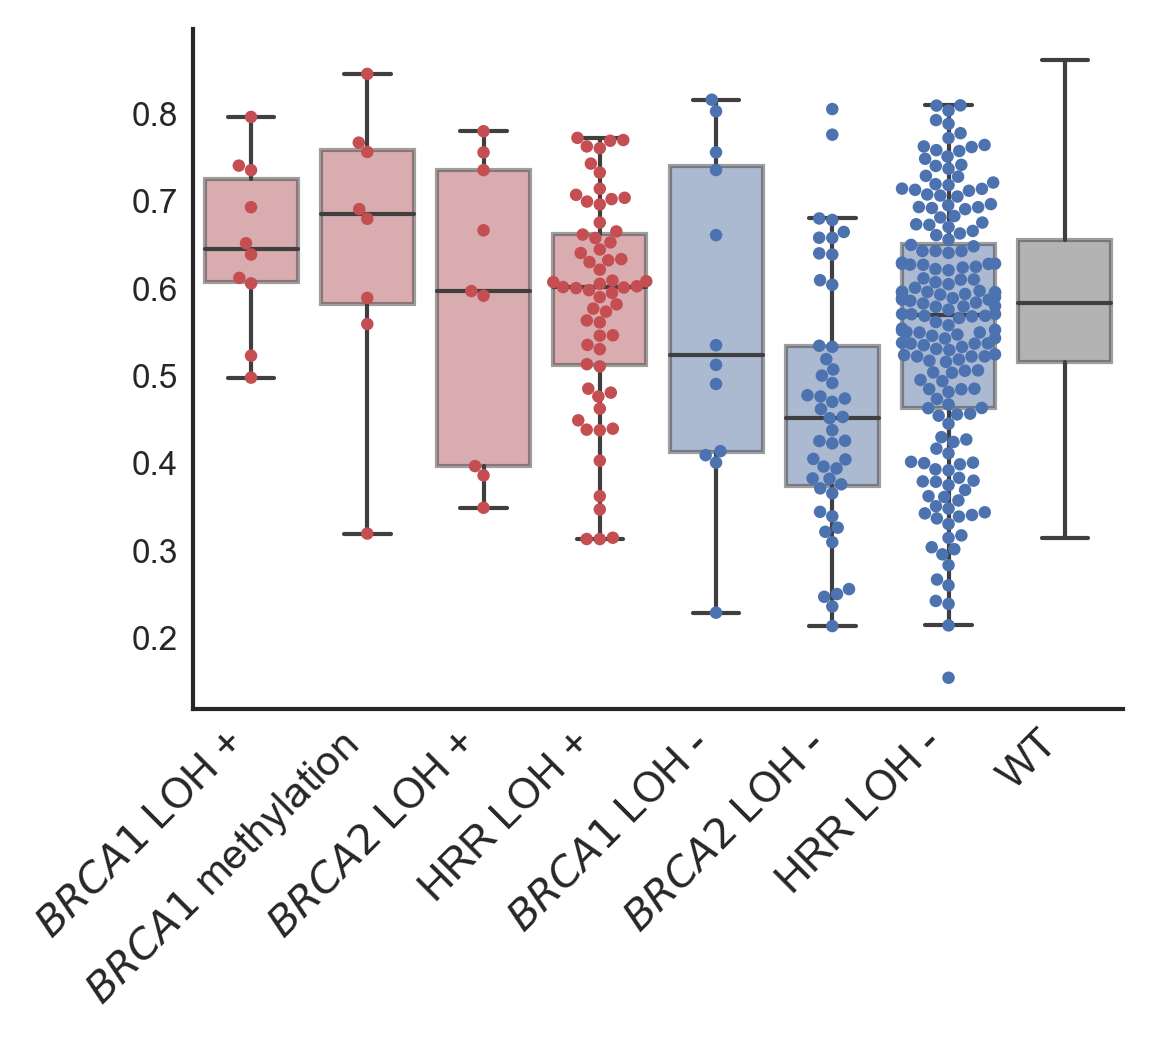

In [401]:
plt_df=df
cat='BRCA_status'
val='SigMA_broad'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

## Genomic scar and Drug sensitivity

In [402]:
df=df0.copy()

In [403]:
len(drug_all)

870

### HRD score

In [404]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df[['HRD_score_broad',drug]].dropna()
    a=plt_df['HRD_score_broad'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 10:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [405]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [406]:
df_cor=df_cor.dropna()

In [407]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [408]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(780, 8)

In [409]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS    mlog10p  \
GDSC2_Cytarabine_1006          520  2.013454e-20  0.390824  19.696058   
GDSC2_Oxaliplatin_1089         547  3.934597e-17  0.349203  16.405100   
GDSC2_Gemcitabine_1190         524  2.529287e-15  0.336328  14.597002   
GDSC2_Palbociclib_1054         533  8.500994e-15  0.327569  14.070530   
GDSC1_Lestaurtinib_1024        611  1.343798e-14  0.304755  13.871666   
...                            ...           ...       ...        ...   
gCSI_Gemcitabine_CID356653     266  3.259199e-05 -0.251802   4.486889   
GDSC2_AZD3759_1915             525  2.225128e-05 -0.183950   4.652645   
GDSC2_Gefitinib_1010           520  6.620194e-06 -0.196131   5.179129   
GDSC2_GDC0810_1925             520  4.165356e-06 -0.200286   5.380348   
GDSC2_OSI-027_1594             188  3.376015e-07 -0.361773   6.471596   

                                     FDR  significant            drug_anno  \
GDSC2_Cytarabine_1006       1.751705e-17            1       Antimetabolite   
GDSC2_Oxaliplatin_1089      1.711550e-14            1             Platinum   
GDSC2_Gemcitabine_1190      7.334933e-13            1       Antimetabolite   
GDSC2_Palbociclib_1054      1.848966e-12            1           Cell cycle   
GDSC1_Lestaurtinib_1024     2.050776e-12            1               Others   
...                                  ...          ...                  ...   
gCSI_Gemcitabine_CID356653  2.025359e-04            1       Antimetabolite   
GDSC2_AZD3759_1915          1.477757e-04            1       EGFR signaling   
GDSC2_Gefitinib_1010        5.235971e-05            1       EGFR signaling   
GDSC2_GDC0810_1925          3.594454e-05            1      Hormone-related   
GDSC2_OSI-027_1594          4.136808e-06            1  PI3K/MTOR signaling   

                                 cid  
GDSC2_Cytarabine_1006           6253  
GDSC2_Oxaliplatin_1089       5310940  
GDSC2_Gemcitabine_1190         60750  
GDSC2_Palbociclib_1054       5330286  
GDSC1_Lestaurtinib_1024       126565  
...                              ...  
gCSI_Gemcitabine_CID356653    356653  
GDSC2_AZD3759_1915          78209992  
GDSC2_Gefitinib_1010          123631  
GDSC2_GDC0810_1925          56941241  
GDSC2_OSI-027_1594          44224160  

[780 rows x 8 columns]

In [410]:
NP=len(df_cor_p)
NN=len(df_cor_n)

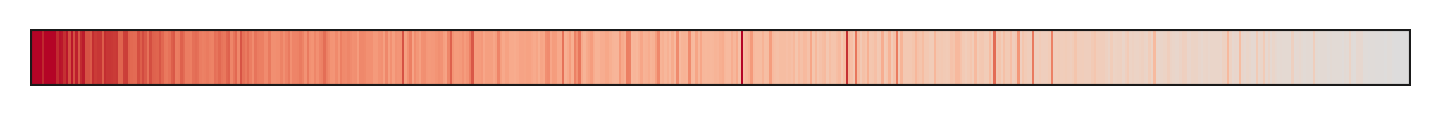

In [411]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

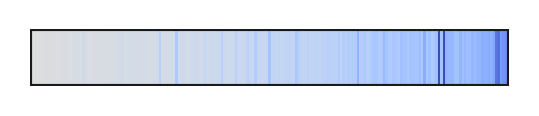

In [412]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

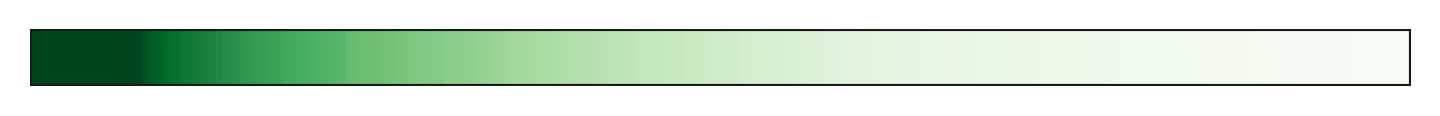

In [413]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

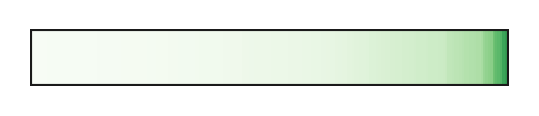

In [415]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

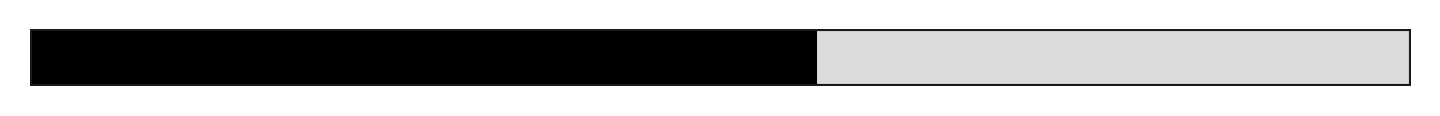

In [416]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

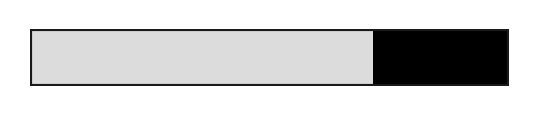

In [417]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [418]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

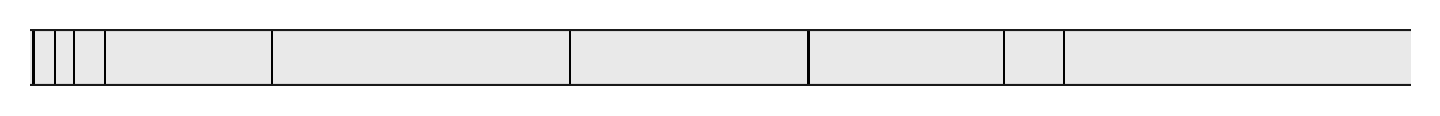

In [419]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

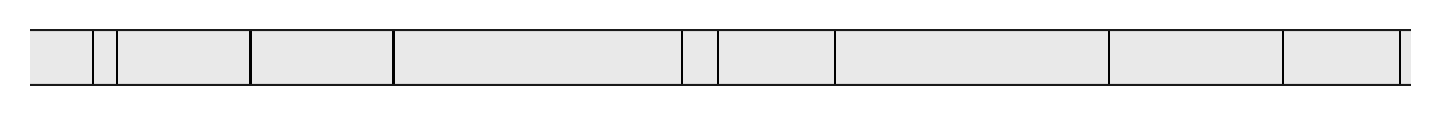

In [420]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


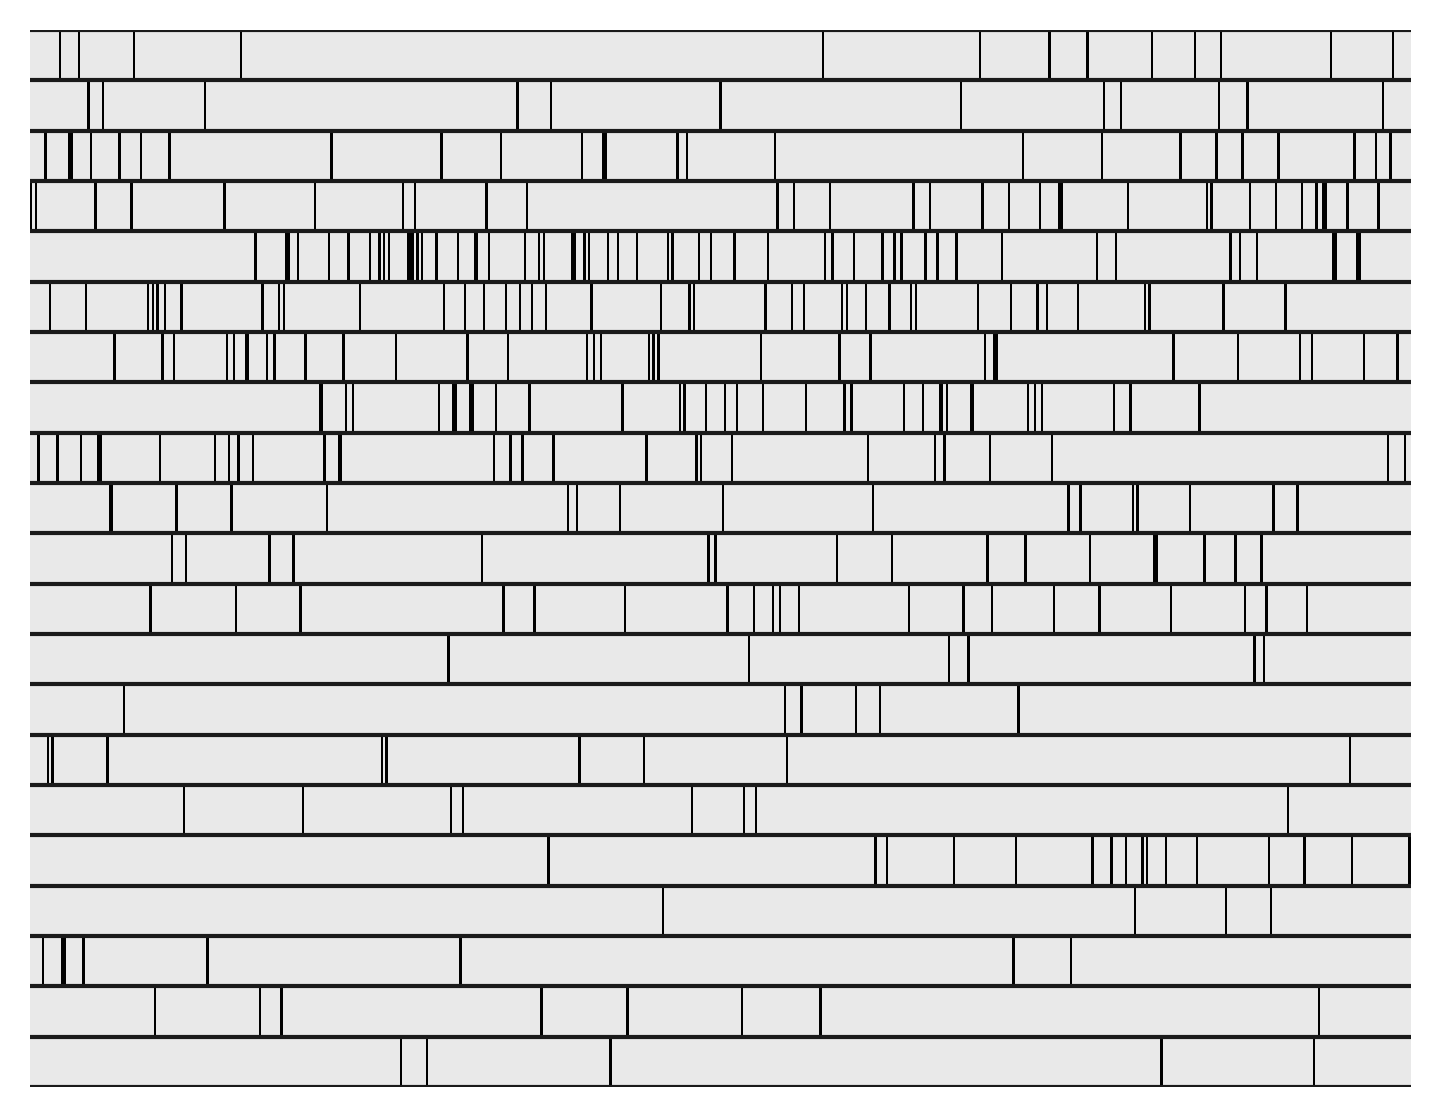

In [421]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [422]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

In [423]:
in_df['p53 pathway']=0
in_df['Cytoskeleton']=0

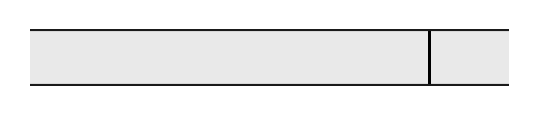

In [424]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

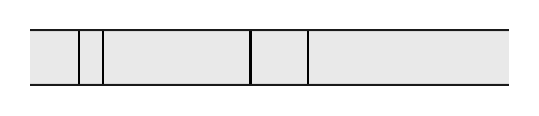

In [425]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


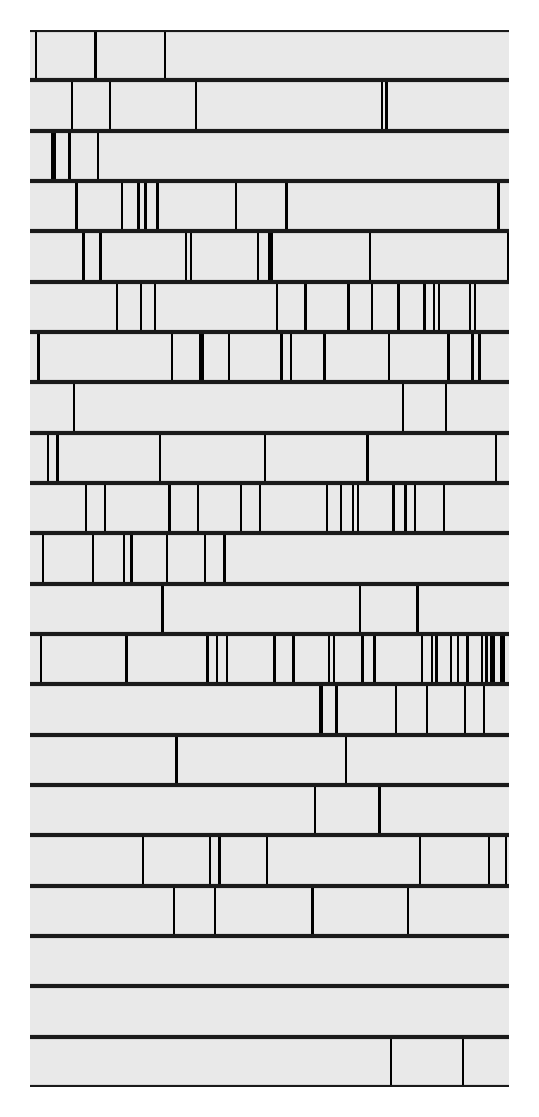

In [426]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [427]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number       pvalues        rS  \
GDSC2_Oxaliplatin_1089                       547  3.934597e-17  0.349203   
GDSC2_Cisplatin_1005                         530  2.019840e-12  0.299180   
CTRP2_oxaliplatin_375582                     729  3.122994e-11  0.242681   
GDSC2_Oxaliplatin_1806                       495  4.752044e-10  0.275161   
CTRP2_carboplatin_26979                      744  5.273959e-06  0.166061   
PRISM_oxaliplatin_BRD-K78960041-001-05-7     431  2.524657e-03  0.145137   
GDSC1_Cisplatin_1005                         612  4.585888e-02  0.080745   
gCSI_Cisplatin_CID24191118                   257  1.871810e-01  0.082537   
PRISM_carboplatin_BRD-K90947825-001-02-7     426  2.524674e-01  0.055566   
PRISM_cisplatin_BRD-K69172251-001-08-9       429  1.643623e-02 -0.115777   

                                            mlog10p           FDR  \
GDSC2_Oxaliplatin_1089                    16.405100  3.934597e-16   
GDSC2_Cisplatin_1005                      11.694683  1.009920e-11   
CTRP2_oxaliplatin_375582                  10.505429  1.040998e-10   
GDSC2_Oxaliplatin_1806                     9.323120  1.188011e-09   
CTRP2_carboplatin_26979                    5.277863  1.054792e-05   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   2.597798  4.207762e-03   
GDSC1_Cisplatin_1005                       1.338577  5.732360e-02   
gCSI_Cisplatin_CID24191118                 0.727738  2.079788e-01   
PRISM_carboplatin_BRD-K90947825-001-02-7   0.597795  2.524674e-01   
PRISM_cisplatin_BRD-K69172251-001-08-9     1.784198  2.348032e-02   

                                          significant drug_anno       cid  
GDSC2_Oxaliplatin_1089                              1  Platinum   5310940  
GDSC2_Cisplatin_1005                                1  Platinum     84691  
CTRP2_oxaliplatin_375582                            1  Platinum  24197464  
GDSC2_Oxaliplatin_1806                              1  Platinum   5310940  
CTRP2_carboplatin_26979                             1  Platinum     38904  
PRISM_oxaliplatin_BRD-K78960041-001-05-7            1  Platinum  24197464  
GDSC1_Cisplatin_1005                                1  Platinum     84691  
gCSI_Cisplatin_CID24191118                          0  Platinum  24191118  
PRISM_carboplatin_BRD-K90947825-001-02-7            0  Platinum    426756  
PRISM_cisplatin_BRD-K69172251-001-08-9              1  Platinum  24191118

In [428]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number       pvalues        rS  \
GDSC2_Talazoparib_1259                       516  2.138063e-10  0.274855   
GDSC2_Niraparib_1177                         498  1.607727e-09  0.266131   
GDSC1_Olaparib_1017                          611  2.994965e-06  0.187678   
CTRP2_olaparib_411867                        741  9.918360e-05  0.142508   
GDSC1_Talazoparib_1259                       588  9.937452e-03  0.106240   
GDSC2_Olaparib_1017                          528  1.561959e-02  0.105174   
GDSC1_Veliparib_1018                         612  6.365140e-02  0.075016   
CTRP2_veliparib_606034                       758  3.245377e-01  0.035831   
GDSC1_Rucaparib_1175                         606  6.784816e-01  0.016873   
GDSC1_Olaparib_1495                          582  9.714994e-01  0.001484   
PRISM_talazoparib_BRD-K95142244-001-01-5     459  8.400368e-01 -0.009447   
PRISM_olaparib_BRD-K02113016-001-19-6        415  7.970237e-01 -0.012663   
PRISM_niraparib_BRD-K54955827-001-02-2       451  2.918701e-01 -0.049740   
PRISM_olaparib_BRD-K02113016-001-15-4        423  1.847147e-01 -0.064614   

                                           mlog10p           FDR  significant  \
GDSC2_Talazoparib_1259                    9.669980  2.993288e-09            1   
GDSC2_Niraparib_1177                      8.793788  1.125409e-08            1   
GDSC1_Olaparib_1017                       5.523608  1.397650e-05            1   
CTRP2_olaparib_411867                     4.003560  3.471426e-04            1   
GDSC1_Talazoparib_1259                    2.002725  2.782487e-02            1   
GDSC2_Olaparib_1017                       1.806330  3.644571e-02            1   
GDSC1_Veliparib_1018                      1.196192  1.273028e-01            0   
CTRP2_veliparib_606034                    0.488735  4.543527e-01            0   
GDSC1_Rucaparib_1175                      0.168462  8.635220e-01            0   
GDSC1_Olaparib_1495                       0.012557  9.714994e-01            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.075702  9.046550e-01            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.098529  9.046550e-01            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.534810  4.540202e-01            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.733499  3.232507e-01            0   

                                               drug_anno        cid  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
CTRP2_olaparib_411867                     PARP inhibitor   23725625  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625

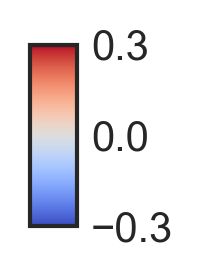

In [396]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=plt.get_cmap("coolwarm")
vmin=-0.3
vmax=0.3
bounds=[-0.3,0,0.3]
fontsize=10
label=""
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)

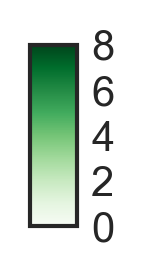

In [430]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=plt.get_cmap("Greens")
vmin=0
vmax=8
bounds=[0,2,4,6,8]
fontsize=10
label=''
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)

### Signature 3 broad

In [122]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df[['SigMA_broad',drug]].dropna()
    a=plt_df['SigMA_broad'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 50:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [123]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [124]:
df_cor=df_cor.dropna()

In [125]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [126]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(766, 8)

In [127]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS   mlog10p  \
GDSC1_VX-11e_262               876.0  3.749505e-10  0.209589  9.426026   
GDSC1_(5Z)-7-Oxozeaenol_1242   869.0  3.496054e-09  0.198648  8.456422   
GDSC1_Refametinib_1014         882.0  9.725182e-09  0.191602  8.012102   
gCSI_PF-4708671_CID51371303    283.0  1.171003e-08  0.330925  7.931442   
GDSC1_NVP-BHG712_295           876.0  1.240118e-08  0.190887  7.906537   
...                              ...           ...       ...       ...   
gCSI_Dasatinib_CID3062316      183.0  4.116575e-03 -0.211140  2.385464   
CTRP2_lomeguatrib_660207       771.0  1.420842e-03 -0.114706  2.847454   
gCSI_Dabrafenib_CID44462760    446.0  1.244078e-03 -0.152411  2.905152   
gCSI_Tanespimycin_CID6505803   283.0  4.788052e-05 -0.239224  4.319841   
gCSI_Gemcitabine_CID356653     285.0  4.299256e-09 -0.338979  8.366607   

                                       FDR  significant  \
GDSC1_VX-11e_262              3.202077e-07            1   
GDSC1_(5Z)-7-Oxozeaenol_1242  1.223855e-06            1   
GDSC1_Refametinib_1014        1.765102e-06            1   
gCSI_PF-4708671_CID51371303   1.765102e-06            1   
GDSC1_NVP-BHG712_295          1.765102e-06            1   
...                                    ...          ...   
gCSI_Dasatinib_CID3062316     3.285565e-02            1   
CTRP2_lomeguatrib_660207      1.516749e-02            1   
gCSI_Dabrafenib_CID44462760   1.382703e-02            1   
gCSI_Tanespimycin_CID6505803  1.202646e-03            1   
gCSI_Gemcitabine_CID356653    1.223855e-06            1   

                                                      drug_anno       cid  
GDSC1_VX-11e_262                             ERK MAPK signaling  11634725  
GDSC1_(5Z)-7-Oxozeaenol_1242                             Others   9863776  
GDSC1_Refametinib_1014                       ERK MAPK signaling  44182295  
gCSI_PF-4708671_CID51371303                 PI3K/MTOR signaling  51371303  
GDSC1_NVP-BHG712_295                                     Others  16747388  
...                                                         ...       ...  
gCSI_Dasatinib_CID3062316                                Others   3062316  
CTRP2_lomeguatrib_660207                                 Others   3025944  
gCSI_Dabrafenib_CID44462760                  ERK MAPK signaling  44462760  
gCSI_Tanespimycin_CID6505803  Protein stability and degradation   6505803  
gCSI_Gemcitabine_CID356653                       Antimetabolite    356653  

[766 rows x 8 columns]

In [128]:
NP=len(df_cor_p)
NN=len(df_cor_n)

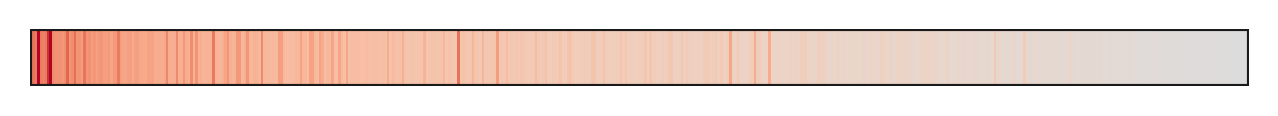

In [129]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

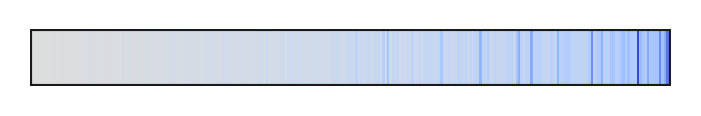

In [130]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

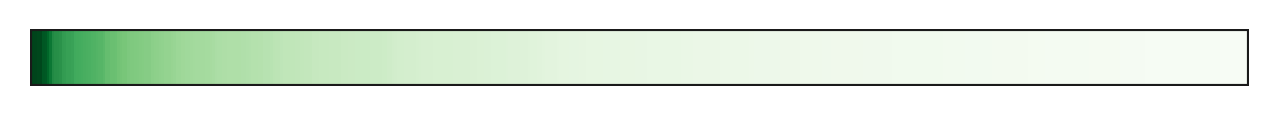

In [131]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

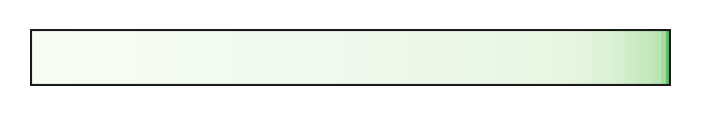

In [132]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

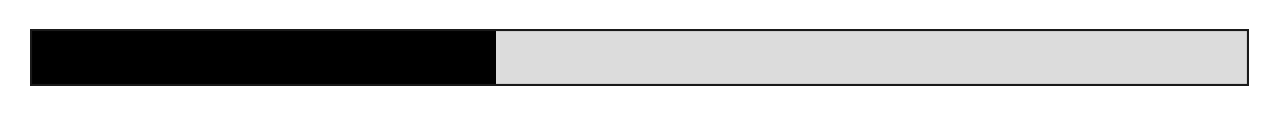

In [133]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

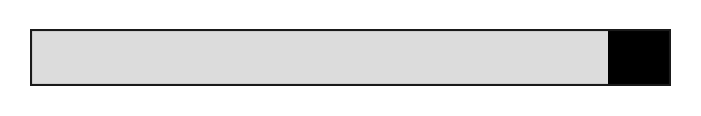

In [134]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [135]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

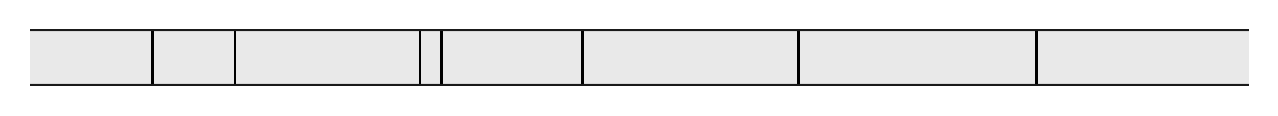

In [136]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

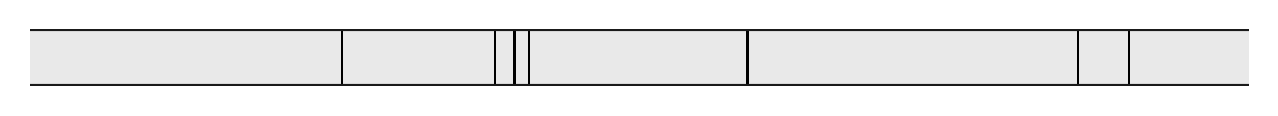

In [137]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


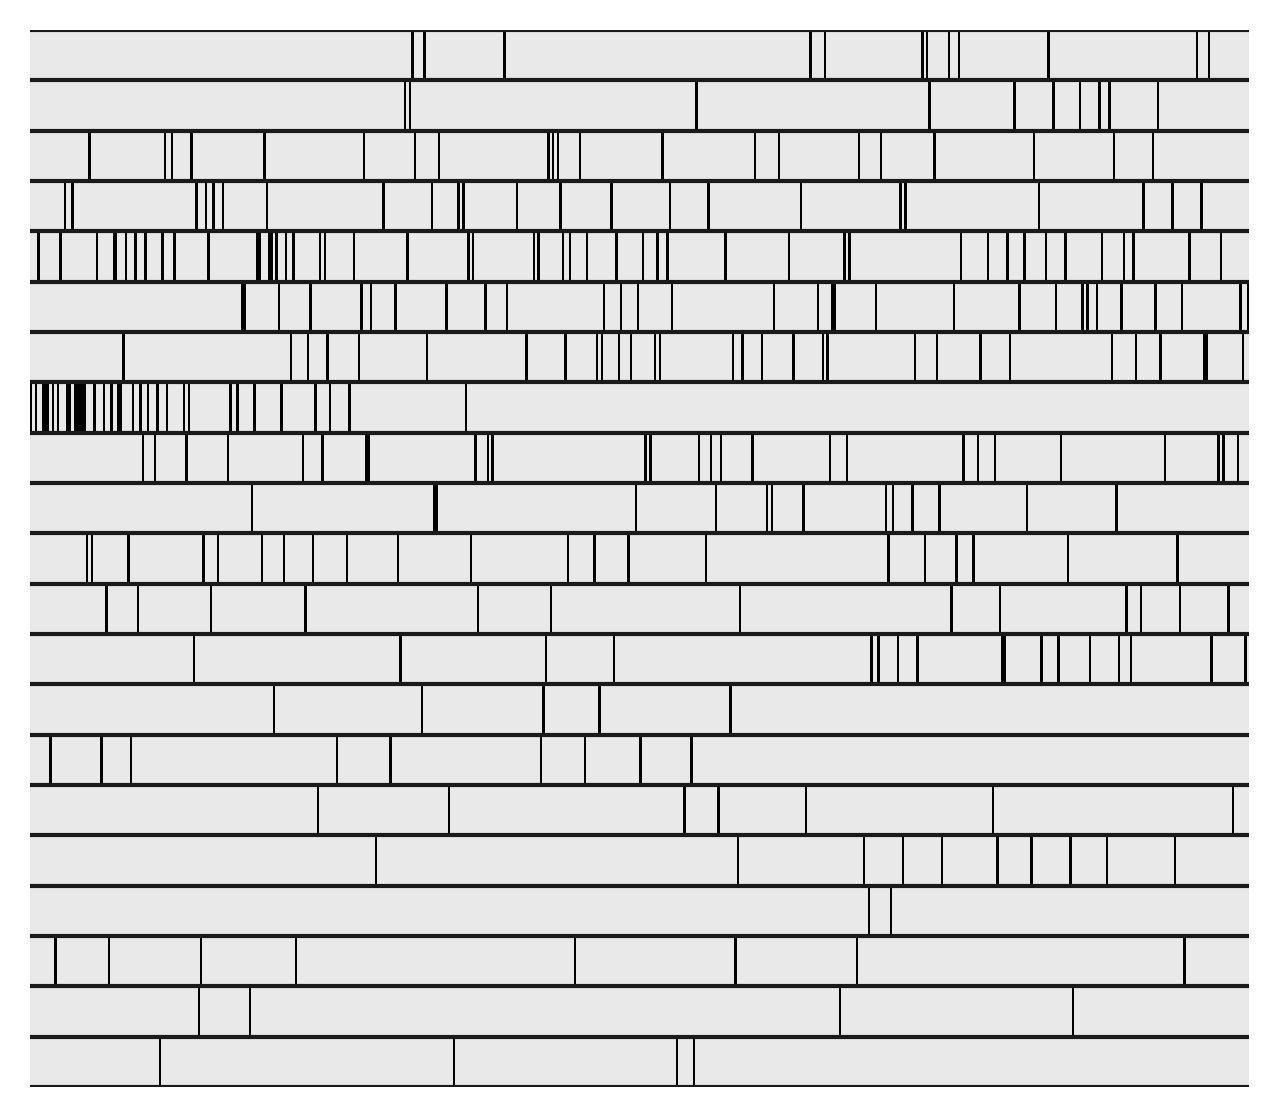

In [138]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [139]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

In [140]:
in_df['p53 pathway']=0
#in_df['Cytoskeleton']=0
in_df['Genome integrity']=0

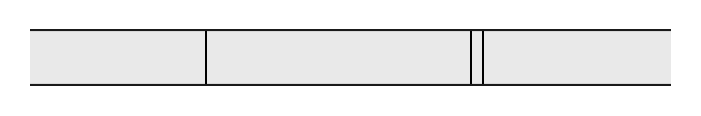

In [141]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

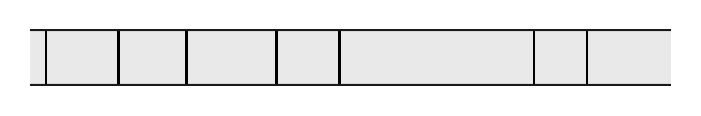

In [142]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


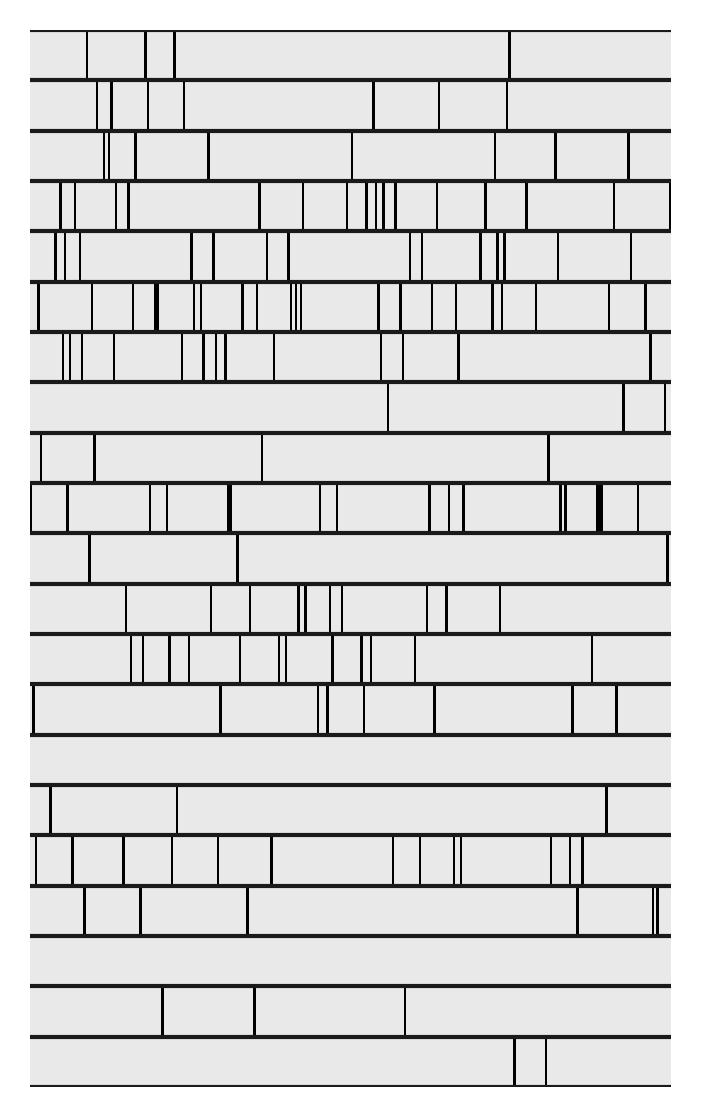

In [143]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [144]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Oxaliplatin_1806                     701.0  0.000319  0.135572   
GDSC2_Oxaliplatin_1089                     770.0  0.002280  0.109798   
CTRP2_carboplatin_26979                    766.0  0.029960  0.078435   
GDSC2_Cisplatin_1005                       737.0  0.034544  0.077872   
GDSC1_Cisplatin_1005                       901.0  0.114076  0.052679   
CTRP2_oxaliplatin_375582                   755.0  0.314028  0.036690   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   441.0  0.633329  0.022778   
gCSI_Cisplatin_CID24191118                 276.0  0.642865 -0.028033   
PRISM_cisplatin_BRD-K69172251-001-08-9     438.0  0.226744 -0.057875   
PRISM_carboplatin_BRD-K90947825-001-02-7   436.0  0.216191 -0.059346   

                                           mlog10p       FDR  significant  \
GDSC2_Oxaliplatin_1806                    3.496760  0.003186            1   
GDSC2_Oxaliplatin_1089                    2.641999  0.011402            1   
CTRP2_carboplatin_26979                   1.523457  0.086361            1   
GDSC2_Cisplatin_1005                      1.461621  0.086361            1   
GDSC1_Cisplatin_1005                      0.942807  0.228152            0   
CTRP2_oxaliplatin_375582                  0.503031  0.392535            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.198371  0.642865            0   
gCSI_Cisplatin_CID24191118                0.191881  0.642865            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.644465  0.323920            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.665162  0.323920            0   

                                         drug_anno       cid  
GDSC2_Oxaliplatin_1806                    Platinum   5310940  
GDSC2_Oxaliplatin_1089                    Platinum   5310940  
CTRP2_carboplatin_26979                   Platinum     38904  
GDSC2_Cisplatin_1005                      Platinum     84691  
GDSC1_Cisplatin_1005                      Platinum     84691  
CTRP2_oxaliplatin_375582                  Platinum  24197464  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464  
gCSI_Cisplatin_CID24191118                Platinum  24191118  
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118  
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756

In [145]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Talazoparib_1259                     719.0  0.011784  0.093882   
GDSC2_Niraparib_1177                       701.0  0.049834  0.074111   
GDSC1_Talazoparib_1259                     867.0  0.057129  0.064632   
GDSC1_Olaparib_1017                        899.0  0.062683  0.062109   
GDSC1_Veliparib_1018                       900.0  0.253318  0.038117   
GDSC1_Olaparib_1495                        864.0  0.692911  0.013454   
PRISM_olaparib_BRD-K02113016-001-19-6      425.0  0.772159  0.014086   
CTRP2_veliparib_606034                     783.0  0.984998 -0.000673   
GDSC2_Olaparib_1017                        732.0  0.841268 -0.007415   
PRISM_niraparib_BRD-K54955827-001-02-2     461.0  0.683858 -0.019015   
GDSC1_Rucaparib_1175                       894.0  0.528302 -0.021118   
PRISM_olaparib_BRD-K02113016-001-15-4      433.0  0.425623 -0.038384   
PRISM_talazoparib_BRD-K95142244-001-01-5   469.0  0.154203 -0.065897   
CTRP2_olaparib_411867                      767.0  0.084610 -0.062311   

                                           mlog10p       FDR  significant  \
GDSC2_Talazoparib_1259                    1.928723  0.164970            1   
GDSC2_Niraparib_1177                      1.302474  0.219390            1   
GDSC1_Talazoparib_1259                    1.243146  0.219390            0   
GDSC1_Olaparib_1017                       1.202850  0.219390            0   
GDSC1_Veliparib_1018                      0.596333  0.506637            0   
GDSC1_Olaparib_1495                       0.159322  0.881887            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.112293  0.900853            0   
CTRP2_veliparib_606034                    0.006565  0.984998            0   
GDSC2_Olaparib_1017                       0.075066  0.905981            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.165034  0.881887            0   
GDSC1_Rucaparib_1175                      0.277118  0.821803            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.370975  0.744840            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.811908  0.359806            0   
CTRP2_olaparib_411867                     1.072578  0.236908            0   

                                               drug_anno        cid  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
CTRP2_olaparib_411867                     PARP inhibitor   23725625

# COSMIC

In [146]:
df2=pd.read_csv('../data_integration/CCLE_integrated_data_cosmic_20230412.txt',sep='\t',index_col=0)
df2

ID_tumour Sample name stripped_cell_line_name  SigMA_cosmic BRCA1  \
ID_sample                                                                      
1287381      1198659        201T                    201T      0.641314    wt   
924100        840876       22RV1                   22RV1      0.303776    wt   
910924        828408    23132-87                 2313287      0.326533    wt   
687561        615721    42-MG-BA                  42MGBA      0.562599    wt   
1287706      1198893       451Lu                   451Lu      0.390768    wt   
...              ...         ...                     ...           ...   ...   
946358        862884          YT                      YT      0.569532    wt   
909907        827392    ZR-75-30                  ZR7530      0.559679    wt   
1298146      1209200       huH-1                    huH1      0.618004    wt   
908452        825963       no-10                    no10      0.569686    wt   
908450        825961       no-11                    no11      0.659577    wt   

            BRCA2 ATM     ATR   BARD1 BLM   BRIP1 CDK12 CHEK1 CHEK2 FANCA  \
ID_sample                                                                   
1287381        wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   
924100     nonLOH  wt      wt  nonLOH  wt      wt    wt    wt    wt    wt   
910924         wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   
687561         wt  wt      wt      wt  wt  nonLOH    wt    wt    wt    wt   
1287706        wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   
...           ...  ..     ...     ...  ..     ...   ...   ...   ...   ...   
946358         wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   
909907         wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   
1298146        wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   
908452         wt  wt  nonLOH      wt  wt      wt    wt    wt    wt    wt   
908450         wt  wt      wt      wt  wt      wt    wt    wt    wt    wt   

          FANCC FANCD2 FANCE FANCF FANCI FANCL FANCM   MRE11 NBN PALB2 RAD50  \
ID_sample                                                                      
1287381      wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
924100       wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
910924       wt     wt    wt    wt    wt    wt    wt  nonLOH  wt    wt    wt   
687561       wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
1287706      wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
...         ...    ...   ...   ...   ...   ...   ...     ...  ..   ...   ...   
946358       wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
909907       wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
1298146      wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
908452       wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   
908450       wt     wt    wt    wt    wt    wt    wt      wt  wt    wt    wt   

          RAD51 RAD51B RAD51C RAD51D RAD52 RAD54L RPA1  BRCA1_LOH  \
ID_sample                                                           
1287381      wt     wt     wt     wt    wt     wt   wt          0   
924100       wt     wt     wt     wt    wt     wt   wt          0   
910924       wt     wt     wt     wt    wt     wt   wt          0   
687561       wt     wt     wt     wt    wt     wt   wt          0   
1287706      wt     wt     wt     wt    wt     wt   wt          0   
...         ...    ...    ...    ...   ...    ...  ...        ...   
946358       wt     wt     wt     wt    wt     wt   wt          0   
909907       wt     wt     wt     wt    wt     wt   wt          0   
1298146      wt     wt     wt     wt    wt     wt   wt          0   
908452       wt     wt     wt     wt    wt     wt   wt          0   
908450       wt     wt     wt     wt    wt     wt   wt          0   

           BRCA1_nonLOH  BRCA

In [147]:
brca1_met=[]
for idx in df2.index:
    if df2.loc[idx,'BRCA1_methylation_cosmic_likely']==1:
        brca1_met.append(1)
    elif df2.loc[idx,'BRCA1_methylation_broad']==1:
        brca1_met.append(1)
    elif df2.loc[idx,'BRCA1_methylation_cosmic_likely']==0:
        brca1_met.append(0)
    elif df2.loc[idx,'BRCA1_methylation_broad']==0:
        brca1_met.append(0)
    else:
        brca1_met.append(np.nan)
df2['BRCA1_methylation']=brca1_met

In [148]:
df2=df2.rename(columns={'HRD_score':'HRD_score_cosmic'})

In [149]:
brca_status=[]
for idx in df2.index:
    if df2.loc[idx,'BRCA1']=='LOH':
        brca_status.append('BRCA1_LOH')
    elif df2.loc[idx,'BRCA2']=='LOH':
        brca_status.append('BRCA2_LOH')
    elif df2.loc[idx,'BRCA2']=='LOH':
        brca_status.append('BRCA2_LOH')
    elif df2.loc[idx,'BRCA1_methylation']==1:
        brca_status.append('BRCA1_methylation')
    elif df2.loc[idx,'otherHRR_LOH']==1:
        brca_status.append('HRR_LOH')
    elif df2.loc[idx,'BRCA1']=='unknown':
        brca_status.append('BRCA1_unknown')
    elif df2.loc[idx,'otherHRR_unknown']==1:
        brca_status.append('HRR_unknown')
    elif df2.loc[idx,'BRCA1']=='nonLOH':
        brca_status.append('BRCA1_nonLOH')
    elif df2.loc[idx,'BRCA2']=='nonLOH':
        brca_status.append('BRCA2_nonLOH')
    elif df2.loc[idx,'otherHRR_nonLOH']==1:
        brca_status.append('HRR_nonLOH')
    elif (df2.loc[idx,'BRCA1']=='wt')&(df2.loc[idx,'BRCA2']=='wt')&(df2.loc[idx,'BRCA1_methylation']==0):
        brca_status.append('wt')
    else:
        brca_status.append(np.nan)

In [150]:
df2['BRCA_status']=brca_status

In [151]:
Counter(df2['BRCA_status']).most_common()

[('wt', 777),
 ('HRR_nonLOH', 119),
 (nan, 38),
 ('HRR_LOH', 32),
 ('BRCA2_nonLOH', 27),
 ('BRCA2_LOH', 10),
 ('BRCA1_nonLOH', 8),
 ('BRCA1_methylation', 5),
 ('BRCA1_LOH', 4)]

In [152]:
df2=df2[(df2['BRCA_status'].isna()==False)]
df2.shape

(982, 965)

In [153]:
df2['BRCA_alteration']=((df2['BRCA1_LOH']==1)|(df2['BRCA1_methylation']==1)|(df2['BRCA2_LOH']==1)).astype(int)

In [154]:
(df2['BRCA_alteration']==1).sum()

19

In [155]:
(~df2['HRD_score_cosmic'].isna()).sum()

978

In [156]:
(~df2['SigMA_cosmic'].isna()).sum()

977

## BRCA status vs Drug sensitivity

In [157]:
platinums=set(df.columns[(df.columns.str.contains('platin'))])
platinums

{'CTRP2_carboplatin_26979',
 'CTRP2_oxaliplatin_375582',
 'GDSC1_Cisplatin_1005',
 'GDSC2_Cisplatin_1005',
 'GDSC2_Oxaliplatin_1089',
 'GDSC2_Oxaliplatin_1806',
 'PRISM_carboplatin_BRD-K90947825-001-02-7',
 'PRISM_cisplatin_BRD-K69172251-001-08-9',
 'PRISM_oxaliplatin_BRD-K78960041-001-05-7',
 'gCSI_Cisplatin_CID24191118'}

In [158]:
parpis=set(df.columns[(df.columns.str.contains('parib'))])
parpis

{'CTRP1_olaparib_411867',
 'CTRP1_rucaparib_628605',
 'CTRP1_veliparib_606034',
 'CTRP2_olaparib_411867',
 'CTRP2_veliparib_606034',
 'GDSC1_Olaparib_1017',
 'GDSC1_Olaparib_1495',
 'GDSC1_Rucaparib_1175',
 'GDSC1_Talazoparib_1259',
 'GDSC1_Veliparib_1018',
 'GDSC2_Niraparib_1177',
 'GDSC2_Olaparib_1017',
 'GDSC2_Talazoparib_1259',
 'PRISM_niraparib_BRD-K54955827-001-02-2',
 'PRISM_olaparib_BRD-K02113016-001-15-4',
 'PRISM_olaparib_BRD-K02113016-001-19-6',
 'PRISM_talazoparib_BRD-K95142244-001-01-5'}

In [159]:
drug_gdsc1=set(df.columns[df.columns.str.startswith('GDSC1')])
drug_gdsc2=set(df.columns[df.columns.str.contains('GDSC2')])
drug_ctrp1=set(df.columns[df.columns.str.contains('CTRP1')])
drug_ctrp2=set(df.columns[df.columns.str.contains('CTRP2')])
drug_prism=set(df.columns[df.columns.str.startswith("PRISM")])
drug_gcsi=set(df.columns[df.columns.str.contains('gCSI')])

In [160]:
drug_all_set=drug_gdsc1|drug_gdsc2|drug_ctrp1|drug_ctrp2|drug_prism|drug_gcsi
len(drug_all_set)

870

In [161]:
drug_anno=pd.read_csv('../data_integration/20221125_add_ic50/Drug_annotaion_integrated.txt'
                      ,sep='\t',index_col=0)
drug_anno['cid']=drug_anno['cid'].astype(int)

In [162]:
from statsmodels.stats.multitest import multipletests

In [163]:
drug_all=[]
for x in drug_all_set:
    if 'C50' in x:
        continue
    else:
        drug_all.append(x)

In [164]:
drug_all=sorted(drug_all)

In [165]:
len(drug_all)

870

In [166]:
df_drug=df2[~df2[drug_all_set].isna().all(axis=1)]

In [167]:
df_drug.shape

(970, 966)

### BRCA12 altaration

In [168]:
Counter(df_drug['BRCA_status']).most_common()

[('wt', 769),
 ('HRR_nonLOH', 118),
 ('HRR_LOH', 30),
 ('BRCA2_nonLOH', 27),
 ('BRCA2_LOH', 9),
 ('BRCA1_nonLOH', 8),
 ('BRCA1_methylation', 5),
 ('BRCA1_LOH', 4)]

In [169]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH']).sum() 

18

In [170]:
df_drug['BRCA_status'].isin(['wt']).sum() 

769

In [171]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df_drug[df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])][drug].dropna().values
    b=df_drug[df_drug['BRCA_status'].isin(['wt']#,'HRR_nonLOH','HRR_LOH','BRCA2_nonLOH','HRR_unknown','BRCA1_nonLOH']
                                )][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [172]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps


In [173]:
df_cor=df_cor.dropna()

In [174]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [175]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541             7.0  0.549500  1.248437  0.162606  0.788864   
CTRP2_ABT-737_411738            10.0  0.195000  0.841180  0.440120  0.356428   
CTRP2_AT13387_688229             7.0 -0.030000 -0.220487  0.989806  0.004450   
CTRP2_AZD1480_660306             6.0 -0.036000 -0.010896  0.759581  0.119426   
CTRP2_AZD4547_660325            10.0  0.708500  0.934010  0.034217  1.465755   
...                              ...       ...       ...       ...       ...   
gCSI_Paclitaxel_CID36314         9.0 -0.061556 -0.108422  0.317008  0.498930   
gCSI_Palbociclib_CID5330286      7.0 -0.070833 -0.069739  0.020941  1.678993   
gCSI_Tanespimycin_CID6505803     9.0  0.154889  0.103227  0.113503  0.944991   
gCSI_Tivantinib_CID11494412      9.0 -0.126222 -0.109048  0.027509  1.560526   
gCSI_Vorinostat_CID5311          9.0 -0.104611 -0.114454  0.013941  1.855721   

                                   FDR  significant  \
CTRP2_ABT-199_666541          0.631362            0   
CTRP2_ABT-737_411738          0.833975            0   
CTRP2_AT13387_688229          0.996587            0   
CTRP2_AZD1480_660306          0.973785            0   
CTRP2_AZD4547_660325          0.426144            1   
...                                ...          ...   
gCSI_Paclitaxel_CID36314      0.759208            0   
gCSI_Palbociclib_CID5330286   0.426144            1   
gCSI_Tanespimycin_CID6505803  0.568431            0   
gCSI_Tivantinib_CID11494412   0.426144            1   
gCSI_Vorinostat_CID5311       0.426144            1   

                                                      drug_anno       cid  
CTRP2_ABT-199_666541                       Apoptosis regulation  49846579  
CTRP2_ABT-737_411738                       Apoptosis regulation  11228183  
CTRP2_AT13387_688229                                     Others  11955716  
CTRP2_AZD1480_660306                                     Others  16659841  
CTRP2_AZD4547_660325                              RTK signaling  51039095  
...                                                         ...       ...  
gCSI_Paclitaxel_CID36314                        Antimicrotubule     36314  
gCSI_Palbociclib_CID5330286                          Cell cycle   5330286  
gCSI_Tanespimycin_CID6505803  Protein stability and degradation   6505803  
gCSI_Tivantinib_CID11494412                              Others  11494412  
gCSI_Vorinostat_CID5311                       Chromatin-related      5311  

[703 rows x 9 columns]

In [178]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif   pvalues   mlog10p  \
GDSC2_Foretinib_2040            16.0  0.102123  0.110268  0.000050  4.297930   
GDSC1_Vorinostat_1012           17.0  0.086639  0.099654  0.001536  2.813618   
GDSC2_AZ960_1250                15.0  0.074491  0.089214  0.001553  2.808936   
GDSC2_Vorinostat_1012           16.0  0.092132  0.062154  0.001658  2.780322   
GDSC2_Dabrafenib_1373           16.0  0.013306  0.039756  0.001814  2.741287   
...                              ...       ...       ...       ...       ...   
GDSC1_AZD6482_156               15.0 -0.092211 -0.034981  0.019277  1.714951   
gCSI_Vorinostat_CID5311          9.0 -0.104611 -0.114454  0.013941  1.855721   
GDSC1_Afatinib_1377             17.0 -0.040271 -0.030164  0.012539  1.901752   
GDSC2_OSI-027_1594               8.0 -0.064367 -0.040667  0.004146  2.382419   
GDSC1_AKT inhibitor VIII_171    15.0 -0.068507 -0.054482  0.003077  2.511854   

                                   FDR  significant            drug_anno  \
GDSC2_Foretinib_2040          0.035402            1        RTK signaling   
GDSC1_Vorinostat_1012         0.255093            1    Chromatin-related   
GDSC2_AZ960_1250              0.255093            1               Others   
GDSC2_Vorinostat_1012         0.255093            1    Chromatin-related   
GDSC2_Dabrafenib_1373         0.255093            1   ERK MAPK signaling   
...                                ...          ...                  ...   
GDSC1_AZD6482_156             0.426144            1  PI3K/MTOR signaling   
gCSI_Vorinostat_CID5311       0.426144            1    Chromatin-related   
GDSC1_Afatinib_1377           0.426144            1       EGFR signaling   
GDSC2_OSI-027_1594            0.364290            1  PI3K/MTOR signaling   
GDSC1_AKT inhibitor VIII_171  0.309032            1  PI3K/MTOR signaling   

                                   cid  
GDSC2_Foretinib_2040          42642645  
GDSC1_Vorinostat_1012             5311  
GDSC2_AZ960_1250              25099184  
GDSC2_Vorinostat_1012             5311  
GDSC2_Dabrafenib_1373         44462760  
...                                ...  
GDSC1_AZD6482_156             44137675  
gCSI_Vorinostat_CID5311           5311  
GDSC1_Afatinib_1377           10184653  
GDSC2_OSI-027_1594            44224160  
GDSC1_AKT inhibitor VIII_171  10196499  

[703 rows x 9 columns]

In [179]:
NP=len(df_cor_p)
NN=len(df_cor_n)

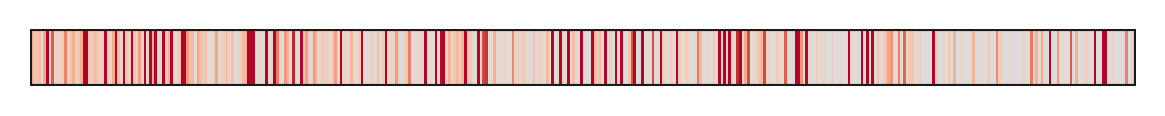

In [180]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

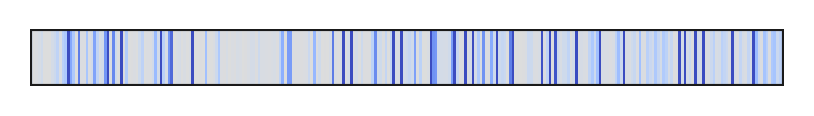

In [181]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

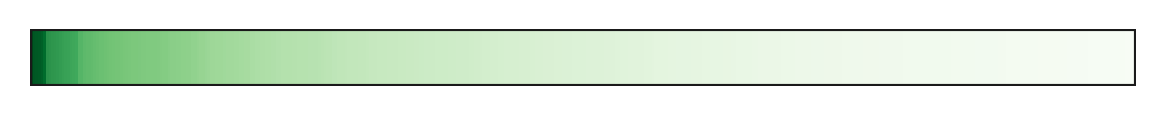

In [182]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

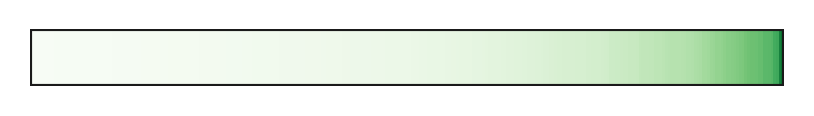

In [183]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

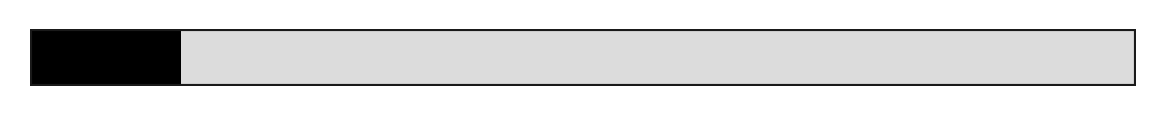

In [184]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

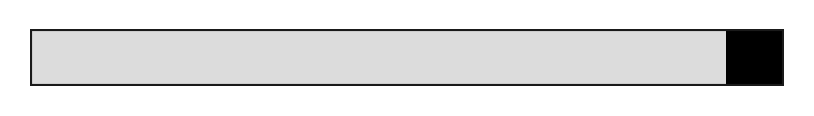

In [185]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [186]:
counter=Counter(df_cor_pn['drug_anno']).most_common()

In [187]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Antimetabolite',
 'Cell cycle',
 'EGFR signaling',
 'Antimicrotubule',
 'DNA inhibitor',
 'Apoptosis regulation',
 'Protein stability and degradation',
 'Hormone-related',
 'DNA alkylator',
 'PARP inhibitor',
 'Topoisomerase inhibitor',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Platinum',
 'p53 pathway',
 'IGF1R signaling',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [188]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [189]:
anno_platinum=[]
for index in df_cor_pn.index:
    if 'isplatin' in index:
        anno_platinum.append(1)
    elif 'arboplatin' in index:
        anno_platinum.append(3)
    elif 'xaliplatin' in index:
        anno_platinum.append(2)
    else:
        anno_platinum.append(0)
df_cor_pn['platinum_color']=anno_platinum

In [190]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

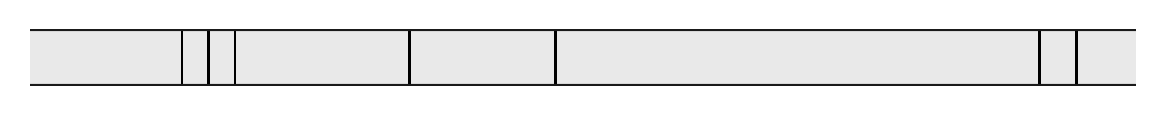

In [191]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [192]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

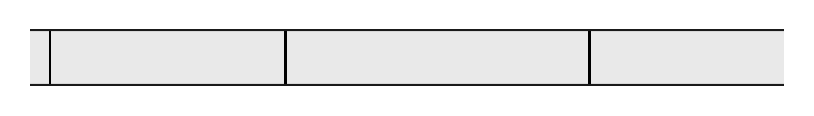

In [193]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [194]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

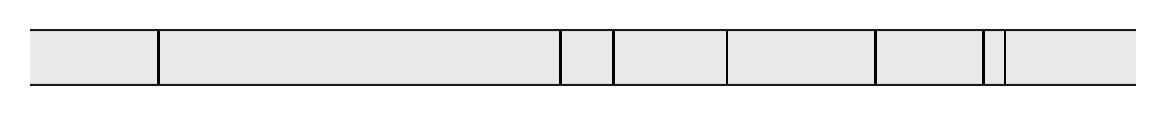

In [195]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


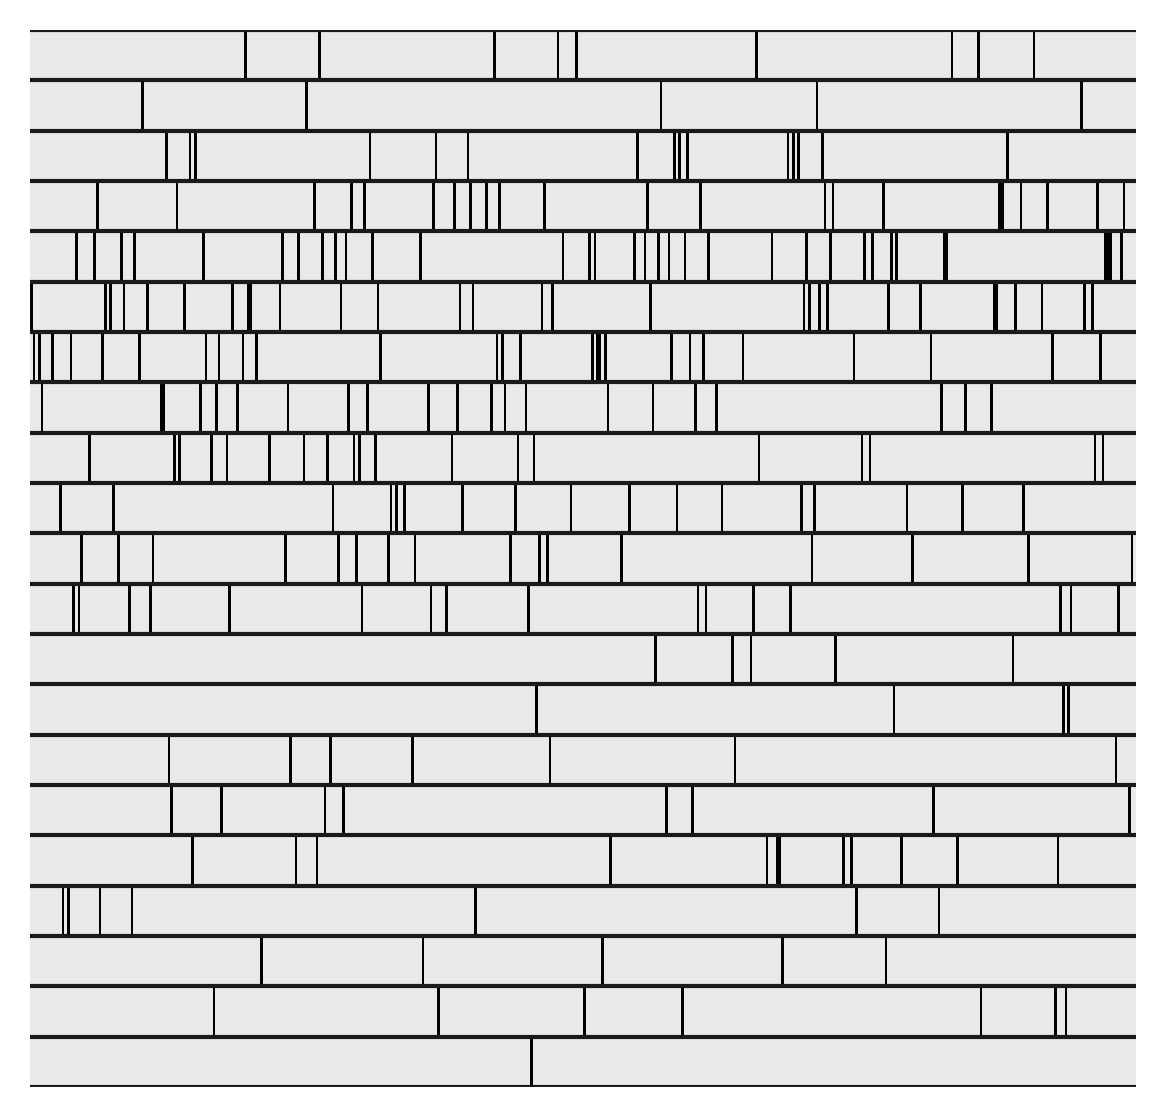

In [196]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [197]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

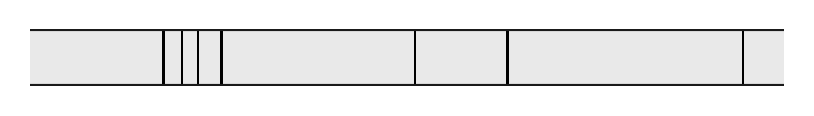

In [198]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [205]:
in_df

Antimetabolite  Antimicrotubule  \
GDSC2_JQ1_2172                                         0                0   
GDSC1_Tivozanib_312                                    0                0   
GDSC1_Tretinoin_1009                                   0                0   
PRISM_vinorelbine_BRD-K69280563-001-01-8               0                1   
CTRP2_AT13387_688229                                   0                0   
...                                                  ...              ...   
GDSC1_AZD6482_156                                      0                0   
gCSI_Vorinostat_CID5311                                0                0   
GDSC1_Afatinib_1377                                    0                0   
GDSC2_OSI-027_1594                                     0                0   
GDSC1_AKT inhibitor VIII_171                           0                0   

                                          Apoptosis regulation  Cell cycle  \
GDSC2_JQ1_2172                                               0           0   
GDSC1_Tivozanib_312                                          0           0   
GDSC1_Tretinoin_1009                                         0           0   
PRISM_vinorelbine_BRD-K69280563-001-01-8                     0           0   
CTRP2_AT13387_688229                                         0           0   
...                                                        ...         ...   
GDSC1_AZD6482_156                                            0           0   
gCSI_Vorinostat_CID5311                                      0           0   
GDSC1_Afatinib_1377                                          0           0   
GDSC2_OSI-027_1594                                           0           0   
GDSC1_AKT inhibitor VIII_171                                 0           0   

                                          Chromatin-related  DNA alkylator  \
GDSC2_JQ1_2172                                            1              0   
GDSC1_Tivozanib_312                                       0              0   
GDSC1_Tretinoin_1009                                      0              0   
PRISM_vinorelbine_BRD-K69280563-001-01-8                  0              0   
CTRP2_AT13387_688229                                      0              0   
...                                                     ...            ...   
GDSC1_AZD6482_156                                         0              0   
gCSI_Vorinostat_CID5311                                   1              0   
GDSC1_Afatinib_1377                                       0              0   
GDSC2_OSI-027_1594                                        0              0   
GDSC1_AKT inhibitor VIII_171                              0              0   

                                          DNA inhibitor  EGFR signaling  \
GDSC2_JQ1_2172                                        0               0   
GDSC1_Tivozanib_312                                   0               0   
GDSC1_Tretinoin_1009                                  0               0   
PRISM_vinorelbine_BRD-K69280563-001-01-8              0               0   
CTRP2_AT13387_688229                                  0               0   
...                                                 ...             ...   
GDSC1_AZD6482_156                                     0               0   
gCSI_Vorinostat_CID5311                               0               0   
GDSC1_Afatinib_1377                                   0               1   
GDSC2_OSI-027_1594                                    0               0   
GDSC1_AKT inhibitor VIII_171                          0               0   

                                          ERK MAPK signaling  \
GDSC2_JQ1_2172                                             0   
GDSC1_Tivozanib_312                                        0   
GDSC1_Tretinoin_1009                                       0   
PRISM_vinorelbine_BRD-K69280563-001-01-8                   0   
CTRP2_AT13387_688229  

In [206]:
sns_df=in_df.reindex(columns=drug_order[2:])
sns_df

Topoisomerase inhibitor  \
GDSC2_JQ1_2172                                                  0   
GDSC1_Tivozanib_312                                             0   
GDSC1_Tretinoin_1009                                            0   
PRISM_vinorelbine_BRD-K69280563-001-01-8                        0   
CTRP2_AT13387_688229                                            0   
...                                                           ...   
GDSC1_AZD6482_156                                               0   
gCSI_Vorinostat_CID5311                                         0   
GDSC1_Afatinib_1377                                             0   
GDSC2_OSI-027_1594                                              0   
GDSC1_AKT inhibitor VIII_171                                    0   

                                          DNA alkylator  DNA inhibitor  \
GDSC2_JQ1_2172                                        0              0   
GDSC1_Tivozanib_312                                   0              0   
GDSC1_Tretinoin_1009                                  0              0   
PRISM_vinorelbine_BRD-K69280563-001-01-8              0              0   
CTRP2_AT13387_688229                                  0              0   
...                                                 ...            ...   
GDSC1_AZD6482_156                                     0              0   
gCSI_Vorinostat_CID5311                               0              0   
GDSC1_Afatinib_1377                                   0              0   
GDSC2_OSI-027_1594                                    0              0   
GDSC1_AKT inhibitor VIII_171                          0              0   

                                          Antimetabolite  PI3K/MTOR signaling  \
GDSC2_JQ1_2172                                         0                    0   
GDSC1_Tivozanib_312                                    0                    0   
GDSC1_Tretinoin_1009                                   0                    0   
PRISM_vinorelbine_BRD-K69280563-001-01-8               0                    0   
CTRP2_AT13387_688229                                   0                    0   
...                                                  ...                  ...   
GDSC1_AZD6482_156                                      0                    1   
gCSI_Vorinostat_CID5311                                0                    0   
GDSC1_Afatinib_1377                                    0                    0   
GDSC2_OSI-027_1594                                     0                    1   
GDSC1_AKT inhibitor VIII_171                           0                    1   

                                          RTK signaling  Chromatin-related  \
GDSC2_JQ1_2172                                        0                  1   
GDSC1_Tivozanib_312                                   1                  0   
GDSC1_Tretinoin_1009                                  0                  0   
PRISM_vinorelbine_BRD-K69280563-001-01-8              0                  0   
CTRP2_AT13387_688229                                  0                  0   
...                                                 ...                ...   
GDSC1_AZD6482_156                                     0                  0   
gCSI_Vorinostat_CID5311                               0                  1   
GDSC1_Afatinib_1377                                   0                  0   
GDSC2_OSI-027_1594                                    0                  0   
GDSC1_AKT inhibitor VIII_171                          0                  0   

                                          ERK MAPK signaling  Cell cycle  \
GDSC2_JQ1_2172                                             0           0   
GDSC1_Tivozanib_312                                        0           0   
GDSC1_Tretinoin_1009                                       0           0   
PRISM_vinorelbine_BRD-K69280563-001-01-8                   0           0   
CTRP2_AT13387_688229              

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


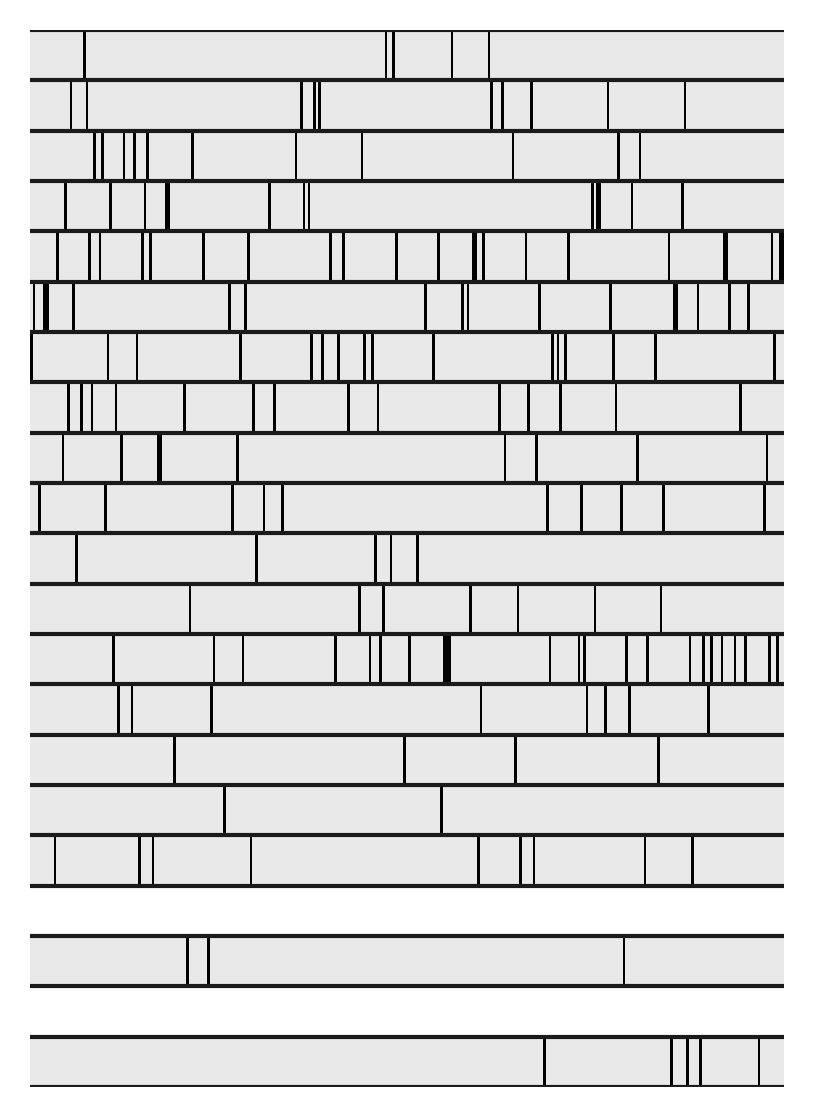

In [207]:
sns_df=in_df.reindex(columns=drug_order[2:])
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')/
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [208]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
PRISM_carboplatin_BRD-K90947825-001-02-7     7.0  0.305079  0.226547   
GDSC2_Oxaliplatin_1089                      15.0  0.013566  0.029292   
GDSC2_Cisplatin_1005                        16.0  0.016060  0.036034   
gCSI_Cisplatin_CID24191118                   9.0  0.185667  0.066576   
GDSC1_Cisplatin_1005                        17.0  0.006537  0.023233   
CTRP2_carboplatin_26979                     11.0  0.011000  0.034989   
CTRP2_oxaliplatin_375582                    11.0  0.113000  0.165289   
PRISM_cisplatin_BRD-K69172251-001-08-9       8.0 -0.001717  0.074962   
GDSC2_Oxaliplatin_1806                      15.0 -0.002216  0.014826   
PRISM_oxaliplatin_BRD-K78960041-001-05-7     8.0 -0.057976 -0.081453   

                                           pvalues   mlog10p       FDR  \
PRISM_carboplatin_BRD-K90947825-001-02-7  0.050383  1.297713  0.259478   
GDSC2_Oxaliplatin_1089                    0.066229  1.178950  0.259478   
GDSC2_Cisplatin_1005                      0.077843  1.108779  0.259478   
gCSI_Cisplatin_CID24191118                0.191146  0.718635  0.477865   
GDSC1_Cisplatin_1005                      0.306221  0.513964  0.510369   
CTRP2_carboplatin_26979                   0.879898  0.055568  0.977609   
CTRP2_oxaliplatin_375582                  0.905944  0.042898  0.977609   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.977609  0.009835  0.977609   
GDSC2_Oxaliplatin_1806                    0.717220  0.144348  0.977609   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.254603  0.594137  0.509205   

                                          significant drug_anno       cid  \
PRISM_carboplatin_BRD-K90947825-001-02-7            0  Platinum    426756   
GDSC2_Oxaliplatin_1089                              0  Platinum   5310940   
GDSC2_Cisplatin_1005                                0  Platinum     84691   
gCSI_Cisplatin_CID24191118                          0  Platinum  24191118   
GDSC1_Cisplatin_1005                                0  Platinum     84691   
CTRP2_carboplatin_26979                             0  Platinum     38904   
CTRP2_oxaliplatin_375582                            0  Platinum  24197464   
PRISM_cisplatin_BRD-K69172251-001-08-9              0  Platinum  24191118   
GDSC2_Oxaliplatin_1806                              0  Platinum   5310940   
PRISM_oxaliplatin_BRD-K78960041-001-05-7            0  Platinum  24197464   

                                          platinum_color  
PRISM_carboplatin_BRD-K90947825-001-02-7               3  
GDSC2_Oxaliplatin_1089                                 2  
GDSC2_Cisplatin_1005                                   1  
gCSI_Cisplatin_CID24191118                             1  
GDSC1_Cisplatin_1005                                   1  
CTRP2_carboplatin_26979                                3  
CTRP2_oxaliplatin_375582                               2  
PRISM_cisplatin_BRD-K69172251-001-08-9                 1  
GDSC2_Oxaliplatin_1806                                 2  
PRISM_oxaliplatin_BRD-K78960041-001-05-7               2

In [209]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Niraparib_1177                        15.0  0.014121  0.027691   
CTRP2_olaparib_411867                       11.0  0.341000  0.361484   
GDSC2_Talazoparib_1259                      14.0  0.004896  0.059593   
PRISM_olaparib_BRD-K02113016-001-19-6        7.0  0.049384  0.020971   
PRISM_olaparib_BRD-K02113016-001-15-4        8.0  0.018475 -0.040218   
GDSC2_Olaparib_1017                         16.0  0.005442 -0.003520   
GDSC1_Rucaparib_1175                        17.0  0.003012 -0.002023   
PRISM_talazoparib_BRD-K95142244-001-01-5     8.0 -0.070417 -0.010799   
GDSC1_Olaparib_1017                         17.0 -0.001055  0.003797   
GDSC1_Veliparib_1018                        17.0 -0.000687  0.005568   
GDSC1_Talazoparib_1259                      17.0 -0.006942 -0.005047   
CTRP2_veliparib_606034                      11.0 -0.176000 -0.021613   
PRISM_niraparib_BRD-K54955827-001-02-2       8.0 -0.001903 -0.029669   
GDSC1_Olaparib_1495                         16.0 -0.017847 -0.020273   

                                           pvalues   mlog10p       FDR  \
GDSC2_Niraparib_1177                      0.040916  1.388109  0.286411   
CTRP2_olaparib_411867                     0.309765  0.508968  0.865334   
GDSC2_Talazoparib_1259                    0.347126  0.459512  0.865334   
PRISM_olaparib_BRD-K02113016-001-19-6     0.480126  0.318645  0.865334   
PRISM_olaparib_BRD-K02113016-001-15-4     0.693500  0.158953  0.865334   
GDSC2_Olaparib_1017                       0.794255  0.100040  0.865334   
GDSC1_Rucaparib_1175                      0.813879  0.089440  0.865334   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.865334  0.062816  0.865334   
GDSC1_Olaparib_1017                       0.836275  0.077651  0.865334   
GDSC1_Veliparib_1018                      0.827898  0.082023  0.865334   
GDSC1_Talazoparib_1259                    0.809560  0.091751  0.865334   
CTRP2_veliparib_606034                    0.555143  0.255595  0.865334   
PRISM_niraparib_BRD-K54955827-001-02-2    0.375968  0.424849  0.865334   
GDSC1_Olaparib_1495                       0.036687  1.435488  0.286411   

                                          significant       drug_anno  \
GDSC2_Niraparib_1177                                1  PARP inhibitor   
CTRP2_olaparib_411867                               0  PARP inhibitor   
GDSC2_Talazoparib_1259                              0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-19-6               0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-15-4               0  PARP inhibitor   
GDSC2_Olaparib_1017                                 0  PARP inhibitor   
GDSC1_Rucaparib_1175                                0  PARP inhibitor   
PRISM_talazoparib_BRD-K95142244-001-01-5            0  PARP inhibitor   
GDSC1_Olaparib_1017                                 0  PARP inhibitor   
GDSC1_Veliparib_1018                                0  PARP inhibitor   
GDSC1_Talazoparib_1259                              0  PARP inhibitor   
CTRP2_veliparib_606034                              0  PARP inhibitor   
PRISM_niraparib_BRD-K54955827-001-02-2              0  PARP inhibitor   
GDSC1_Olaparib_1495                                 1  PARP inhibitor   

                                                cid  platinum_color  
GDSC2_Niraparib_1177                       24958200               0  
CTRP2_olaparib_411867                      23725625               0  
GDSC2_Talazoparib_1259                     44819241               0  
PRISM_olaparib_BRD-K02113016-001-19-6      23725625               0  
PRISM_olaparib_BRD-K02113016-001-15-4      23725625               0  
GDSC2_Olaparib_1017                        23725625               0  
GDSC1_Rucaparib_1175                        9931953               0  
PRISM_talazoparib_BRD-K95142244-001-01-5  135565082               0  
GDSC1_Olaparib_1017                        23725625               0  
GDSC1_Veliparib_1018                       11960529   

### HRR alteration

In [210]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH']).sum()

48

In [211]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df_drug[df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
    b=df_drug[df_drug['BRCA_status'].isin(['wt']#,'HRR_nonLOH','BRCA2_nonLOH','BRCA1_nonLOH']
                               )][drug].dropna().values
    n=len(a)
    if n> n_limit:
#        r,p=stats.mannwhitneyu(a,b)
        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [212]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps


In [213]:
df_cor=df_cor.dropna()

In [214]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [215]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541            18.0  0.315000  0.461410  0.469885  0.328008   
CTRP2_ABT-737_411738            26.0  0.573500  0.737295  0.049203  1.308005   
CTRP2_AT13387_688229            14.0 -0.334150 -0.214823  0.976186  0.010467   
CTRP2_AZD1480_660306            12.0  0.329500  0.280354  0.424886  0.371728   
CTRP2_AZD4547_660325            25.0  0.837000  0.940510  0.000080  4.099110   
...                              ...       ...       ...       ...       ...   
gCSI_TGX221_CID9907093           7.0 -0.006667 -0.009917  0.866466  0.062248   
gCSI_Tanespimycin_CID6505803    16.0  0.039000  0.062677  0.323651  0.489923   
gCSI_Tivantinib_CID11494412     22.0 -0.030167 -0.057363  0.055168  1.258311   
gCSI_Vincristine_CID5978         9.0 -0.056222 -0.076581  0.151202  0.820442   
gCSI_Vorinostat_CID5311         22.0 -0.098889 -0.088763  0.008740  2.058501   

                                   FDR  significant  \
CTRP2_ABT-199_666541          0.827159            0   
CTRP2_ABT-737_411738          0.427454            1   
CTRP2_AT13387_688229          0.992853            0   
CTRP2_AZD1480_660306          0.816485            0   
CTRP2_AZD4547_660325          0.033191            1   
...                                ...          ...   
gCSI_TGX221_CID9907093        0.976375            0   
gCSI_Tanespimycin_CID6505803  0.764660            0   
gCSI_Tivantinib_CID11494412   0.450013            0   
gCSI_Vincristine_CID5978      0.642099            0   
gCSI_Vorinostat_CID5311       0.196999            1   

                                                      drug_anno       cid  
CTRP2_ABT-199_666541                       Apoptosis regulation  49846579  
CTRP2_ABT-737_411738                       Apoptosis regulation  11228183  
CTRP2_AT13387_688229                                     Others  11955716  
CTRP2_AZD1480_660306                                     Others  16659841  
CTRP2_AZD4547_660325                              RTK signaling  51039095  
...                                                         ...       ...  
gCSI_TGX221_CID9907093                      PI3K/MTOR signaling   9907093  
gCSI_Tanespimycin_CID6505803  Protein stability and degradation   6505803  
gCSI_Tivantinib_CID11494412                              Others  11494412  
gCSI_Vincristine_CID5978                        Antimicrotubule      5978  
gCSI_Vorinostat_CID5311                       Chromatin-related      5311  

[765 rows x 9 columns]

In [216]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif   pvalues  \
GDSC2_BMS-536924_1091                      40.0  0.043135  0.055848  0.000079   
CTRP2_AZD4547_660325                       25.0  0.837000  0.940510  0.000080   
GDSC2_Foretinib_2040                       40.0  0.071592  0.067456  0.000132   
PRISM_brigatinib_BRD-K56981171-001-01-0    20.0  0.148992  0.071815  0.000342   
CTRP2_KW-2449_660413                       28.0  1.002500  0.884322  0.000454   
...                                         ...       ...       ...       ...   
GDSC1_Afatinib_1032                        46.0 -0.019109 -0.000684  0.004421   
GDSC1_NSC-87877_147                        41.0 -0.002963 -0.004830  0.003526   
GDSC1_Avagacestat_1072                     46.0 -0.008990 -0.016172  0.003266   
GDSC1_PHA-665752_6                         18.0 -0.012144 -0.001449  0.002810   
GDSC1_CP724714_255                         47.0 -0.005707 -0.013157  0.000254   

                                          mlog10p       FDR  significant  \
GDSC2_BMS-536924_1091                    4.100128  0.033191            1   
CTRP2_AZD4547_660325                     4.099110  0.033191            1   
GDSC2_Foretinib_2040                     3.879638  0.036678            1   
PRISM_brigatinib_BRD-K56981171-001-01-0  3.465341  0.057129            1   
CTRP2_KW-2449_660413                     3.342918  0.063110            1   
...                                           ...       ...          ...   
GDSC1_Afatinib_1032                      2.354447  0.159816            1   
GDSC1_NSC-87877_147                      2.452682  0.145500            1   
GDSC1_Avagacestat_1072                   2.485979  0.145500            1   
GDSC1_PHA-665752_6                       2.551232  0.145500            1   
GDSC1_CP724714_255                       3.595215  0.052953            1   

                                               drug_anno       cid  
GDSC2_BMS-536924_1091                    IGF1R signaling  10390396  
CTRP2_AZD4547_660325                       RTK signaling  51039095  
GDSC2_Foretinib_2040                       RTK signaling  42642645  
PRISM_brigatinib_BRD-K56981171-001-01-0           Others  68165256  
CTRP2_KW-2449_660413                              Others  11427553  
...                                                  ...       ...  
GDSC1_Afatinib_1032                       EGFR signaling  10184653  
GDSC1_NSC-87877_147                               Others   5459322  
GDSC1_Avagacestat_1072                            Others  46883536  
GDSC1_PHA-665752_6                         RTK signaling  10461815  
GDSC1_CP724714_255                        EGFR signaling   9874913  

[765 rows x 9 columns]

In [217]:
NP=len(df_cor_p)
NN=len(df_cor_n)

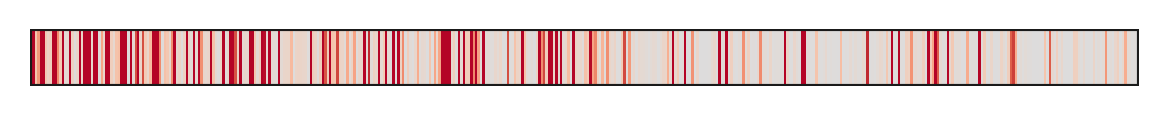

In [218]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

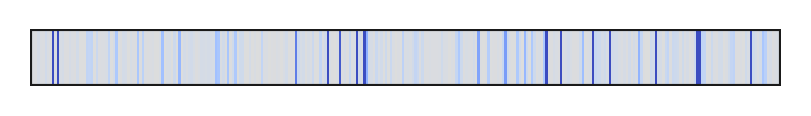

In [219]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

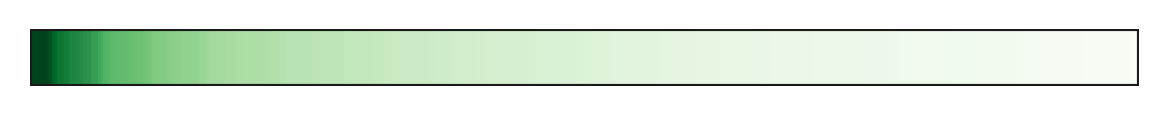

In [220]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

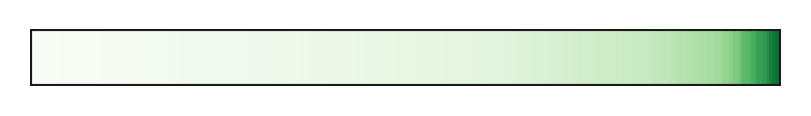

In [221]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

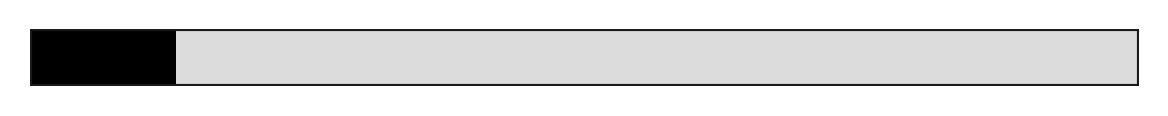

In [222]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

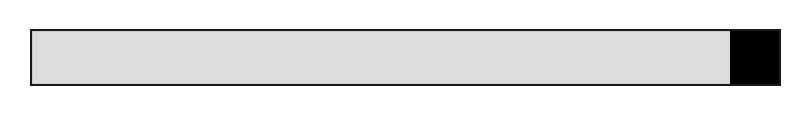

In [223]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [224]:
counter=Counter(df_cor_pn['drug_anno']).most_common()

In [225]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'Antimetabolite',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule',
 'DNA inhibitor',
 'EGFR signaling',
 'Apoptosis regulation',
 'Protein stability and degradation',
 'Hormone-related',
 'DNA alkylator',
 'Topoisomerase inhibitor',
 'PARP inhibitor',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Platinum',
 'IGF1R signaling',
 'Cytoskeleton',
 'p53 pathway',
 'JNK and p38 signaling']

In [226]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [227]:
anno_platinum=[]
for index in df_cor_pn.index:
    if 'isplatin' in index:
        anno_platinum.append(1)
    elif 'arboplatin' in index:
        anno_platinum.append(3)
    elif 'xaliplatin' in index:
        anno_platinum.append(2)
    else:
        anno_platinum.append(0)
df_cor_pn['platinum_color']=anno_platinum

In [228]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

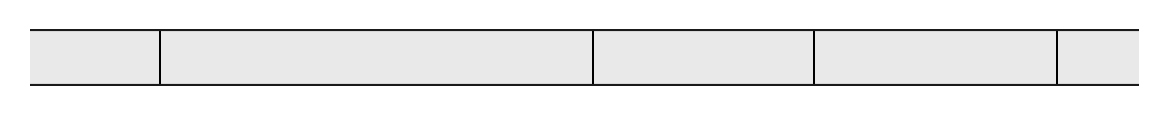

In [229]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [230]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

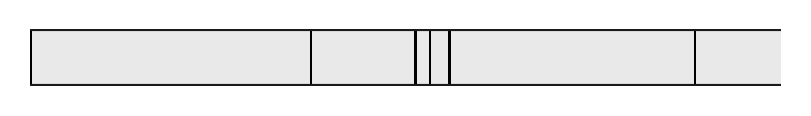

In [231]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [232]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

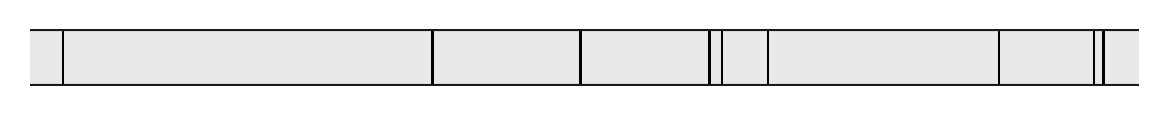

In [233]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


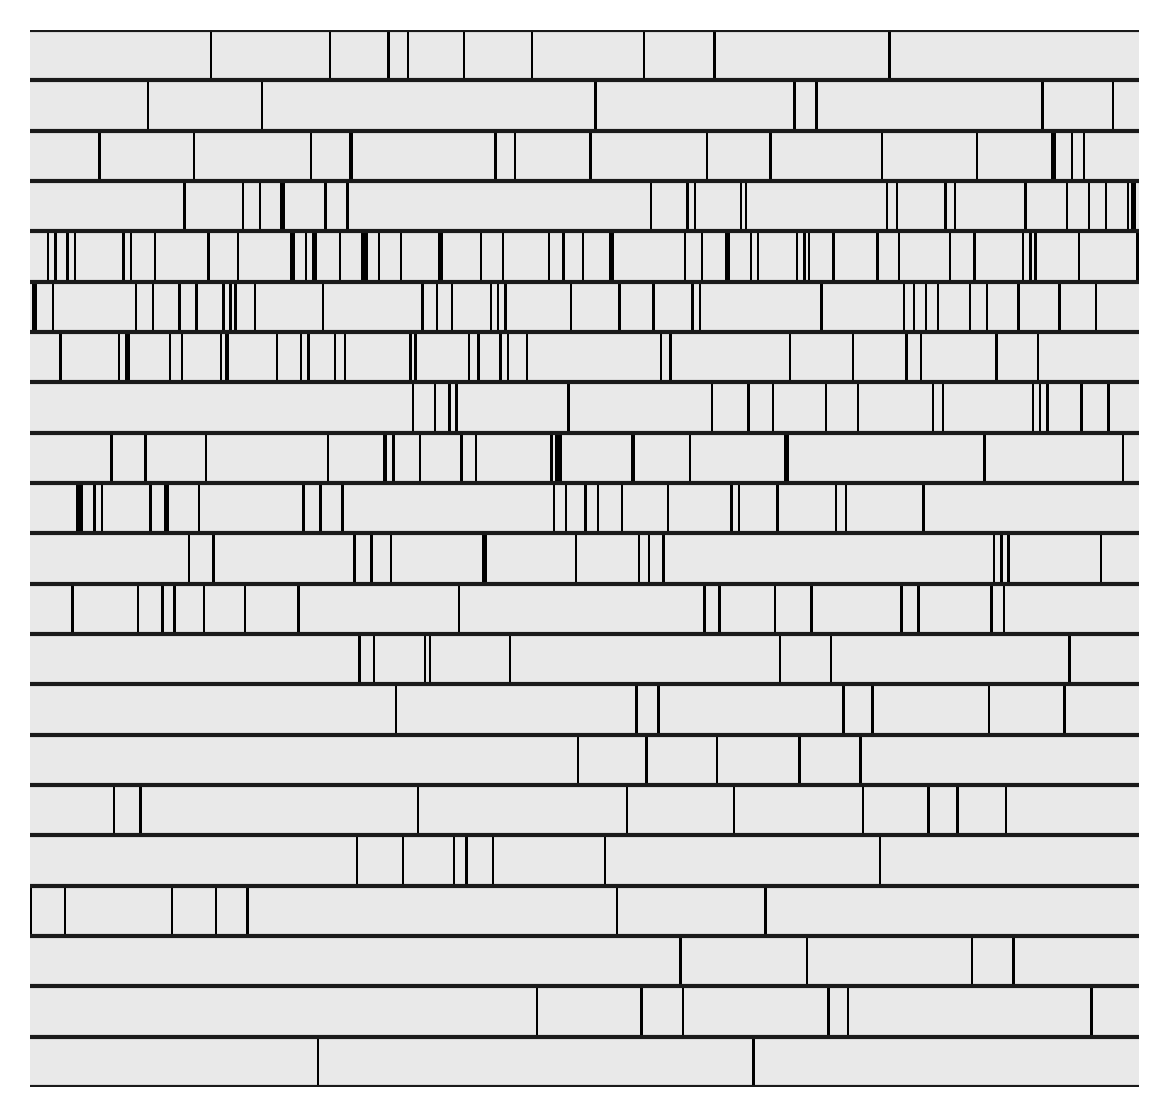

In [234]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [235]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

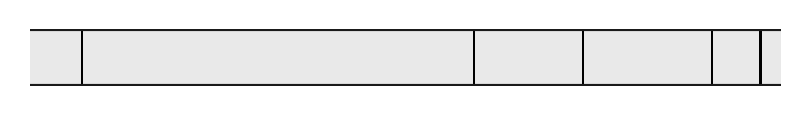

In [236]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


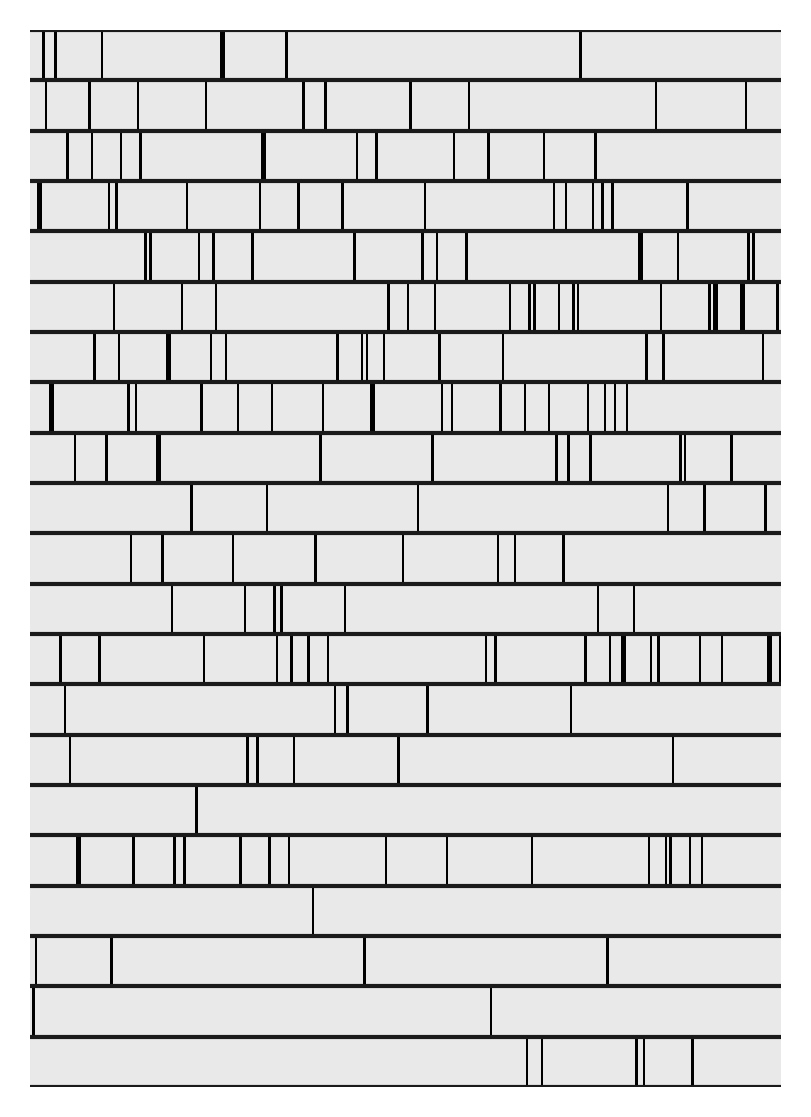

In [238]:
sns_df=in_df.reindex(columns=drug_order[2:])
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')/
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')   
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [239]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
gCSI_Cisplatin_CID24191118                  16.0  0.172889  0.059498   
CTRP2_oxaliplatin_375582                    27.0  0.134000  0.267010   
GDSC1_Cisplatin_1005                        46.0  0.003748  0.008687   
PRISM_carboplatin_BRD-K90947825-001-02-7    20.0  0.048052  0.046391   
GDSC2_Oxaliplatin_1089                      41.0 -0.002895  0.007149   
GDSC2_Oxaliplatin_1806                      40.0 -0.009265  0.005315   
CTRP2_carboplatin_26979                     28.0 -0.052500 -0.080187   
PRISM_cisplatin_BRD-K69172251-001-08-9      21.0 -0.009665  0.034235   
GDSC2_Cisplatin_1005                        41.0 -0.000736  0.014469   
PRISM_oxaliplatin_BRD-K78960041-001-05-7    21.0 -0.039756 -0.071567   

                                           pvalues   mlog10p       FDR  \
gCSI_Cisplatin_CID24191118                0.042286  1.373801  0.422862   
CTRP2_oxaliplatin_375582                  0.346556  0.460226  0.787749   
GDSC1_Cisplatin_1005                      0.567847  0.245768  0.809740   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.891601  0.049830  0.990667   
GDSC2_Oxaliplatin_1089                    0.998641  0.000591  0.998641   
GDSC2_Oxaliplatin_1806                    0.647792  0.188565  0.809740   
CTRP2_carboplatin_26979                   0.472650  0.325461  0.787749   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.457374  0.339729  0.787749   
GDSC2_Cisplatin_1005                      0.424225  0.372404  0.787749   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.105299  0.977576  0.526495   

                                          significant drug_anno       cid  \
gCSI_Cisplatin_CID24191118                          1  Platinum  24191118   
CTRP2_oxaliplatin_375582                            0  Platinum  24197464   
GDSC1_Cisplatin_1005                                0  Platinum     84691   
PRISM_carboplatin_BRD-K90947825-001-02-7            0  Platinum    426756   
GDSC2_Oxaliplatin_1089                              0  Platinum   5310940   
GDSC2_Oxaliplatin_1806                              0  Platinum   5310940   
CTRP2_carboplatin_26979                             0  Platinum     38904   
PRISM_cisplatin_BRD-K69172251-001-08-9              0  Platinum  24191118   
GDSC2_Cisplatin_1005                                0  Platinum     84691   
PRISM_oxaliplatin_BRD-K78960041-001-05-7            0  Platinum  24197464   

                                          platinum_color  
gCSI_Cisplatin_CID24191118                             1  
CTRP2_oxaliplatin_375582                               2  
GDSC1_Cisplatin_1005                                   1  
PRISM_carboplatin_BRD-K90947825-001-02-7               3  
GDSC2_Oxaliplatin_1089                                 2  
GDSC2_Oxaliplatin_1806                                 2  
CTRP2_carboplatin_26979                                3  
PRISM_cisplatin_BRD-K69172251-001-08-9                 1  
GDSC2_Cisplatin_1005                                   1  
PRISM_oxaliplatin_BRD-K78960041-001-05-7               2

In [240]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
CTRP2_olaparib_411867                       27.0  0.493000  0.539656   
GDSC2_Niraparib_1177                        40.0  0.003406  0.014887   
PRISM_olaparib_BRD-K02113016-001-19-6       18.0  0.027995  0.022187   
GDSC1_Rucaparib_1175                        46.0  0.002502 -0.006129   
GDSC2_Olaparib_1017                         41.0  0.004278  0.005306   
GDSC1_Veliparib_1018                        46.0  0.001044  0.003714   
GDSC2_Talazoparib_1259                      39.0  0.002555  0.029400   
CTRP2_veliparib_606034                      27.0  0.034000  0.061764   
PRISM_niraparib_BRD-K54955827-001-02-2      21.0  0.012780 -0.006024   
GDSC1_Olaparib_1017                         46.0 -0.001048  0.005341   
PRISM_olaparib_BRD-K02113016-001-15-4       19.0 -0.021160 -0.050186   
PRISM_talazoparib_BRD-K95142244-001-01-5    21.0 -0.118451 -0.042526   
GDSC1_Talazoparib_1259                      45.0 -0.036281 -0.060857   
GDSC1_Olaparib_1495                         44.0 -0.023207 -0.020568   

                                           pvalues   mlog10p       FDR  \
CTRP2_olaparib_411867                     0.003355  2.474299  0.046971   
GDSC2_Niraparib_1177                      0.207438  0.683111  0.684507   
PRISM_olaparib_BRD-K02113016-001-19-6     0.328193  0.483871  0.731642   
GDSC1_Rucaparib_1175                      0.457317  0.339782  0.731642   
GDSC2_Olaparib_1017                       0.470341  0.327587  0.731642   
GDSC1_Veliparib_1018                      0.535149  0.271525  0.749209   
GDSC2_Talazoparib_1259                    0.797523  0.098257  0.949887   
CTRP2_veliparib_606034                    0.929565  0.031720  0.949887   
PRISM_niraparib_BRD-K54955827-001-02-2    0.949887  0.022328  0.949887   
GDSC1_Olaparib_1017                       0.945684  0.024254  0.949887   
PRISM_olaparib_BRD-K02113016-001-15-4     0.407569  0.389799  0.731642   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.244467  0.611780  0.684507   
GDSC1_Talazoparib_1259                    0.086093  1.065035  0.401765   
GDSC1_Olaparib_1495                       0.009864  2.005926  0.069051   

                                          significant       drug_anno  \
CTRP2_olaparib_411867                               1  PARP inhibitor   
GDSC2_Niraparib_1177                                0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-19-6               0  PARP inhibitor   
GDSC1_Rucaparib_1175                                0  PARP inhibitor   
GDSC2_Olaparib_1017                                 0  PARP inhibitor   
GDSC1_Veliparib_1018                                0  PARP inhibitor   
GDSC2_Talazoparib_1259                              0  PARP inhibitor   
CTRP2_veliparib_606034                              0  PARP inhibitor   
PRISM_niraparib_BRD-K54955827-001-02-2              0  PARP inhibitor   
GDSC1_Olaparib_1017                                 0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-15-4               0  PARP inhibitor   
PRISM_talazoparib_BRD-K95142244-001-01-5            0  PARP inhibitor   
GDSC1_Talazoparib_1259                              0  PARP inhibitor   
GDSC1_Olaparib_1495                                 1  PARP inhibitor   

                                                cid  platinum_color  
CTRP2_olaparib_411867                      23725625               0  
GDSC2_Niraparib_1177                       24958200               0  
PRISM_olaparib_BRD-K02113016-001-19-6      23725625               0  
GDSC1_Rucaparib_1175                        9931953               0  
GDSC2_Olaparib_1017                        23725625               0  
GDSC1_Veliparib_1018                       11960529               0  
GDSC2_Talazoparib_1259                     44819241               0  
CTRP2_veliparib_606034                     11960529               0  
PRISM_niraparib_BRD-K54955827-001-02-2     24958200               0  
GDSC1_Olaparib_1017                        23725625   

In [216]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif   pvalues  \
GDSC2_BMS-536924_1091                      40.0  0.043135  0.055848  0.000079   
CTRP2_AZD4547_660325                       25.0  0.837000  0.940510  0.000080   
GDSC2_Foretinib_2040                       40.0  0.071592  0.067456  0.000132   
PRISM_brigatinib_BRD-K56981171-001-01-0    20.0  0.148992  0.071815  0.000342   
CTRP2_KW-2449_660413                       28.0  1.002500  0.884322  0.000454   
...                                         ...       ...       ...       ...   
GDSC1_Afatinib_1032                        46.0 -0.019109 -0.000684  0.004421   
GDSC1_NSC-87877_147                        41.0 -0.002963 -0.004830  0.003526   
GDSC1_Avagacestat_1072                     46.0 -0.008990 -0.016172  0.003266   
GDSC1_PHA-665752_6                         18.0 -0.012144 -0.001449  0.002810   
GDSC1_CP724714_255                         47.0 -0.005707 -0.013157  0.000254   

                                          mlog10p       FDR  significant  \
GDSC2_BMS-536924_1091                    4.100128  0.033191            1   
CTRP2_AZD4547_660325                     4.099110  0.033191            1   
GDSC2_Foretinib_2040                     3.879638  0.036678            1   
PRISM_brigatinib_BRD-K56981171-001-01-0  3.465341  0.057129            1   
CTRP2_KW-2449_660413                     3.342918  0.063110            1   
...                                           ...       ...          ...   
GDSC1_Afatinib_1032                      2.354447  0.159816            1   
GDSC1_NSC-87877_147                      2.452682  0.145500            1   
GDSC1_Avagacestat_1072                   2.485979  0.145500            1   
GDSC1_PHA-665752_6                       2.551232  0.145500            1   
GDSC1_CP724714_255                       3.595215  0.052953            1   

                                               drug_anno       cid  
GDSC2_BMS-536924_1091                    IGF1R signaling  10390396  
CTRP2_AZD4547_660325                       RTK signaling  51039095  
GDSC2_Foretinib_2040                       RTK signaling  42642645  
PRISM_brigatinib_BRD-K56981171-001-01-0           Others  68165256  
CTRP2_KW-2449_660413                              Others  11427553  
...                                                  ...       ...  
GDSC1_Afatinib_1032                       EGFR signaling  10184653  
GDSC1_NSC-87877_147                               Others   5459322  
GDSC1_Avagacestat_1072                            Others  46883536  
GDSC1_PHA-665752_6                         RTK signaling  10461815  
GDSC1_CP724714_255                        EGFR signaling   9874913  

[765 rows x 9 columns]

<AxesSubplot:>

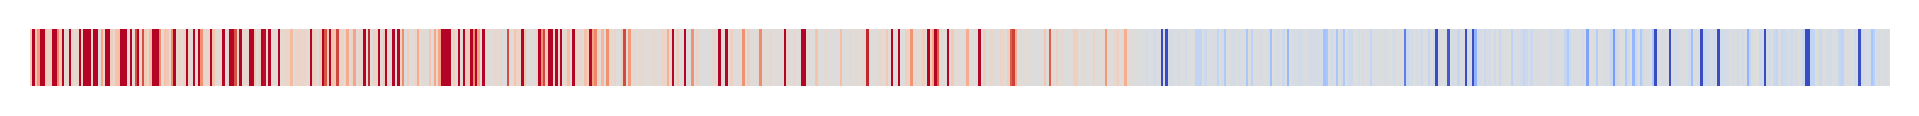

In [217]:
sns_df=df_cor_pn[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)

<AxesSubplot:>

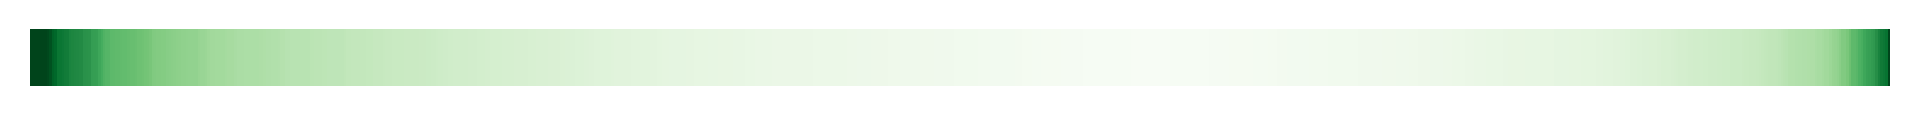

In [218]:
sns_df=df_cor_pn[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)

<AxesSubplot:>

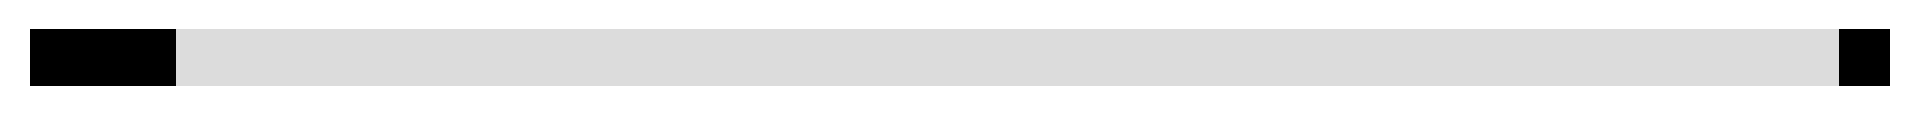

In [219]:
sns_df=df_cor_pn[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)

In [220]:
counter=Counter(df_cor_pn['drug_anno']).most_common()
counter

[('Others', 224),
 ('PI3K/MTOR signaling', 62),
 ('RTK signaling', 52),
 ('Chromatin-related', 44),
 ('Antimetabolite', 38),
 ('ERK MAPK signaling', 36),
 ('Cell cycle', 33),
 ('Antimicrotubule', 30),
 ('DNA inhibitor', 28),
 ('EGFR signaling', 28),
 ('Apoptosis regulation', 23),
 ('Protein stability and degradation', 23),
 ('Hormone-related', 23),
 ('DNA alkylator', 17),
 ('Topoisomerase inhibitor', 16),
 ('PARP inhibitor', 14),
 ('WNT signaling', 12),
 ('Genome integrity', 11),
 ('Metabolism', 10),
 ('Platinum', 10),
 ('IGF1R signaling', 8),
 ('Cytoskeleton', 8),
 ('p53 pathway', 8),
 ('JNK and p38 signaling', 7)]

In [221]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'Antimetabolite',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule',
 'DNA inhibitor',
 'EGFR signaling',
 'Apoptosis regulation',
 'Protein stability and degradation',
 'Hormone-related',
 'DNA alkylator',
 'Topoisomerase inhibitor',
 'PARP inhibitor',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Platinum',
 'IGF1R signaling',
 'Cytoskeleton',
 'p53 pathway',
 'JNK and p38 signaling']

In [222]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [223]:
platinums

{'CTRP2_carboplatin_26979',
 'CTRP2_oxaliplatin_375582',
 'GDSC1_Cisplatin_1005',
 'GDSC2_Cisplatin_1005',
 'GDSC2_Oxaliplatin_1089',
 'GDSC2_Oxaliplatin_1806',
 'PRISM_carboplatin_BRD-K90947825-001-02-7',
 'PRISM_cisplatin_BRD-K69172251-001-08-9',
 'PRISM_oxaliplatin_BRD-K78960041-001-05-7',
 'gCSI_Cisplatin_CID24191118'}

In [224]:
parpis

{'CTRP1_olaparib_411867',
 'CTRP1_rucaparib_628605',
 'CTRP1_veliparib_606034',
 'CTRP2_olaparib_411867',
 'CTRP2_veliparib_606034',
 'GDSC1_Olaparib_1017',
 'GDSC1_Olaparib_1495',
 'GDSC1_Rucaparib_1175',
 'GDSC1_Talazoparib_1259',
 'GDSC1_Veliparib_1018',
 'GDSC2_Niraparib_1177',
 'GDSC2_Olaparib_1017',
 'GDSC2_Talazoparib_1259',
 'PRISM_niraparib_BRD-K54955827-001-02-2',
 'PRISM_olaparib_BRD-K02113016-001-15-4',
 'PRISM_olaparib_BRD-K02113016-001-19-6',
 'PRISM_talazoparib_BRD-K95142244-001-01-5'}

In [225]:
in_df=pd.get_dummies( df_cor_pn['drug_anno'] )

<AxesSubplot:>

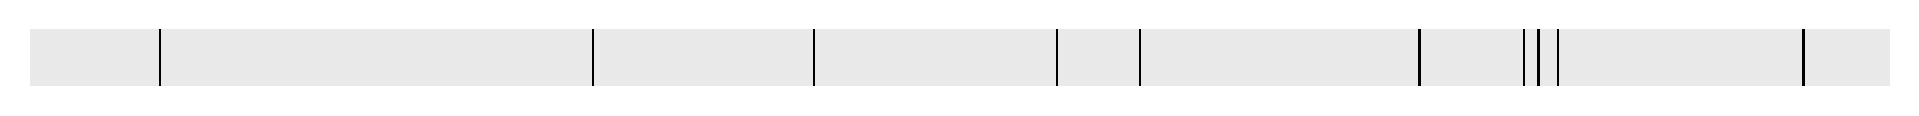

In [226]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)

<AxesSubplot:>

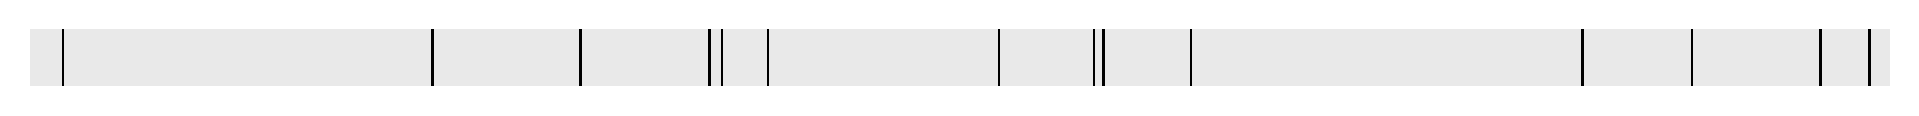

In [227]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


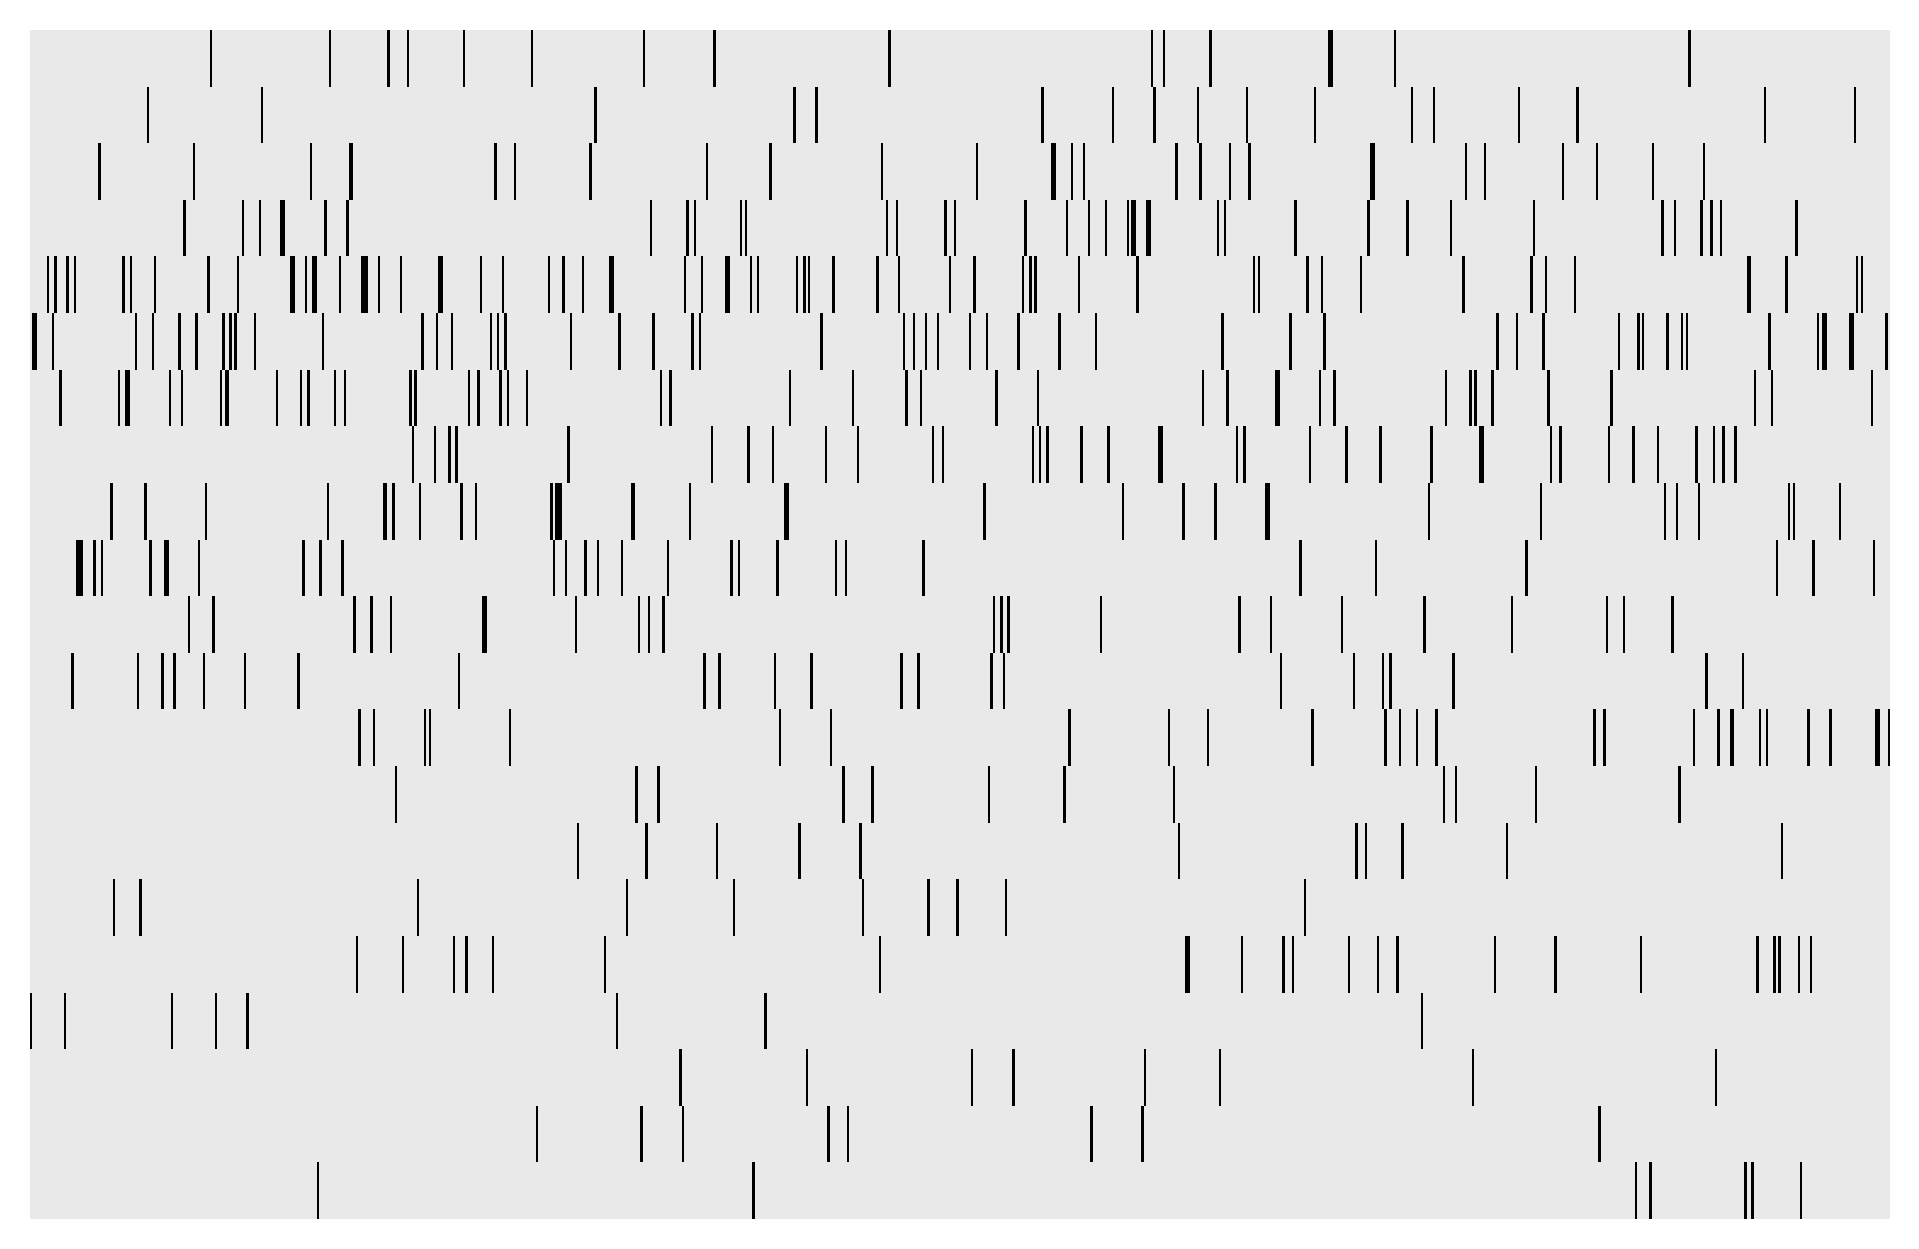

In [228]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8,M/4))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for x in sns_df.columns:
    print(x)
#ax.set_yticklabels(sns_df.columns,fontsize=12)

In [229]:
df_cor_pn[df_cor_pn['drug_anno']=='Platinum']

Number   med_dif  mean_dif  \
gCSI_Cisplatin_CID24191118                  16.0  0.172889  0.059498   
CTRP2_oxaliplatin_375582                    27.0  0.134000  0.267010   
GDSC1_Cisplatin_1005                        46.0  0.003748  0.008687   
PRISM_carboplatin_BRD-K90947825-001-02-7    20.0  0.048052  0.046391   
GDSC2_Oxaliplatin_1089                      41.0 -0.002895  0.007149   
GDSC2_Oxaliplatin_1806                      40.0 -0.009265  0.005315   
CTRP2_carboplatin_26979                     28.0 -0.052500 -0.080187   
PRISM_cisplatin_BRD-K69172251-001-08-9      21.0 -0.009665  0.034235   
GDSC2_Cisplatin_1005                        41.0 -0.000736  0.014469   
PRISM_oxaliplatin_BRD-K78960041-001-05-7    21.0 -0.039756 -0.071567   

                                           pvalues   mlog10p       FDR  \
gCSI_Cisplatin_CID24191118                0.042286  1.373801  0.405364   
CTRP2_oxaliplatin_375582                  0.346556  0.460226  0.785402   
GDSC1_Cisplatin_1005                      0.567847  0.245768  0.870511   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.891601  0.049830  0.979059   
GDSC2_Oxaliplatin_1089                    0.998641  0.000591  0.999159   
GDSC2_Oxaliplatin_1806                    0.647792  0.188565  0.905066   
CTRP2_carboplatin_26979                   0.472650  0.325461  0.827159   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.457374  0.339729  0.825143   
GDSC2_Cisplatin_1005                      0.424225  0.372404  0.816485   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.105299  0.977576  0.579524   

                                          significant drug_anno       cid  
gCSI_Cisplatin_CID24191118                          1  Platinum  24191118  
CTRP2_oxaliplatin_375582                            0  Platinum  24197464  
GDSC1_Cisplatin_1005                                0  Platinum     84691  
PRISM_carboplatin_BRD-K90947825-001-02-7            0  Platinum    426756  
GDSC2_Oxaliplatin_1089                              0  Platinum   5310940  
GDSC2_Oxaliplatin_1806                              0  Platinum   5310940  
CTRP2_carboplatin_26979                             0  Platinum     38904  
PRISM_cisplatin_BRD-K69172251-001-08-9              0  Platinum  24191118  
GDSC2_Cisplatin_1005                                0  Platinum     84691  
PRISM_oxaliplatin_BRD-K78960041-001-05-7            0  Platinum  24197464

In [230]:
df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']

Number   med_dif  mean_dif  \
CTRP2_olaparib_411867                       27.0  0.493000  0.539656   
GDSC2_Niraparib_1177                        40.0  0.003406  0.014887   
PRISM_olaparib_BRD-K02113016-001-19-6       18.0  0.027995  0.022187   
GDSC1_Rucaparib_1175                        46.0  0.002502 -0.006129   
GDSC2_Olaparib_1017                         41.0  0.004278  0.005306   
GDSC1_Veliparib_1018                        46.0  0.001044  0.003714   
GDSC2_Talazoparib_1259                      39.0  0.002555  0.029400   
CTRP2_veliparib_606034                      27.0  0.034000  0.061764   
PRISM_niraparib_BRD-K54955827-001-02-2      21.0  0.012780 -0.006024   
GDSC1_Olaparib_1017                         46.0 -0.001048  0.005341   
PRISM_olaparib_BRD-K02113016-001-15-4       19.0 -0.021160 -0.050186   
PRISM_talazoparib_BRD-K95142244-001-01-5    21.0 -0.118451 -0.042526   
GDSC1_Talazoparib_1259                      45.0 -0.036281 -0.060857   
GDSC1_Olaparib_1495                         44.0 -0.023207 -0.020568   

                                           pvalues   mlog10p       FDR  \
CTRP2_olaparib_411867                     0.003355  2.474299  0.145500   
GDSC2_Niraparib_1177                      0.207438  0.683111  0.681116   
PRISM_olaparib_BRD-K02113016-001-19-6     0.328193  0.483871  0.766702   
GDSC1_Rucaparib_1175                      0.457317  0.339782  0.825143   
GDSC2_Olaparib_1017                       0.470341  0.327587  0.827159   
GDSC1_Veliparib_1018                      0.535149  0.271525  0.864073   
GDSC2_Talazoparib_1259                    0.797523  0.098257  0.940306   
CTRP2_veliparib_606034                    0.929565  0.031720  0.986333   
PRISM_niraparib_BRD-K54955827-001-02-2    0.949887  0.022328  0.989175   
GDSC1_Olaparib_1017                       0.945684  0.024254  0.988347   
PRISM_olaparib_BRD-K02113016-001-15-4     0.407569  0.389799  0.815138   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.244467  0.611780  0.703053   
GDSC1_Talazoparib_1259                    0.086093  1.065035  0.556598   
GDSC1_Olaparib_1495                       0.009864  2.005926  0.200658   

                                          significant       drug_anno  \
CTRP2_olaparib_411867                               1  PARP inhibitor   
GDSC2_Niraparib_1177                                0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-19-6               0  PARP inhibitor   
GDSC1_Rucaparib_1175                                0  PARP inhibitor   
GDSC2_Olaparib_1017                                 0  PARP inhibitor   
GDSC1_Veliparib_1018                                0  PARP inhibitor   
GDSC2_Talazoparib_1259                              0  PARP inhibitor   
CTRP2_veliparib_606034                              0  PARP inhibitor   
PRISM_niraparib_BRD-K54955827-001-02-2              0  PARP inhibitor   
GDSC1_Olaparib_1017                                 0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-15-4               0  PARP inhibitor   
PRISM_talazoparib_BRD-K95142244-001-01-5            0  PARP inhibitor   
GDSC1_Talazoparib_1259                              0  PARP inhibitor   
GDSC1_Olaparib_1495                                 1  PARP inhibitor   

                                                cid  
CTRP2_olaparib_411867                      23725625  
GDSC2_Niraparib_1177                       24958200  
PRISM_olaparib_BRD-K02113016-001-19-6      23725625  
GDSC1_Rucaparib_1175                        9931953  
GDSC2_Olaparib_1017                        23725625  
GDSC1_Veliparib_1018                       11960529  
GDSC2_Talazoparib_1259                     44819241  
CTRP2_veliparib_606034                     11960529  
PRISM_niraparib_BRD-K54955827-001-02-2     24958200  
GDSC1_Olaparib_1017                        23725625  
PRISM_olaparib_BRD-K02113016-001-15-4      23725625  
PRISM_talazoparib_BRD-K95142244-001-01-5  135565082  
GDSC1_Talazoparib_1259                     44819241 

## Correlations with HRD score and Signature 3

(973, 2)
r = 0.403, p = 3.42e-39


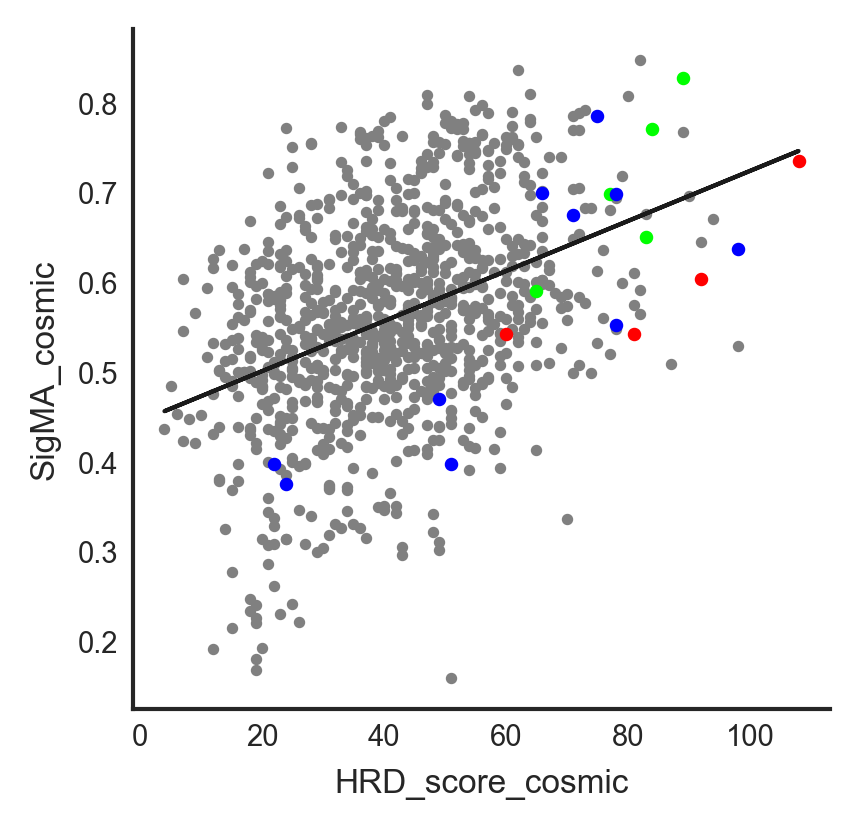

In [241]:
in_df=df2.copy()
#plt_df=plt_df[plt_df[cat]=='']
val1,val2,val3='HRD_score_cosmic','SigMA_cosmic','BRCA_status'
plt_df=in_df[[val1,val2]].dropna()
print(plt_df.shape)
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
ax.set_xlabel(val1)
ax.set_ylabel(val2)
# linear regression, Pearson correlation
lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
ax.plot(x,a*x+b,lw=1,c='k')

plt_df2=in_df[[val1,val2,val3]].dropna()
plt_df3=plt_df2[plt_df2[val3]=='BRCA1_methylation']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='lime')

plt_df3=plt_df2[plt_df2[val3]=='BRCA1_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='red')

plt_df3=plt_df2[plt_df2[val3]=='BRCA2_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='blue')

ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)

print('r = {:.3f}, p = {:.2e}'.format(r,p))

In [242]:
df2['BRCA2_LOH'].sum()

10

In [243]:
df2['BRCA1_LOH'].sum()

4

/Users/tshiro/.pyenv/versions/miniforge3-4.10/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


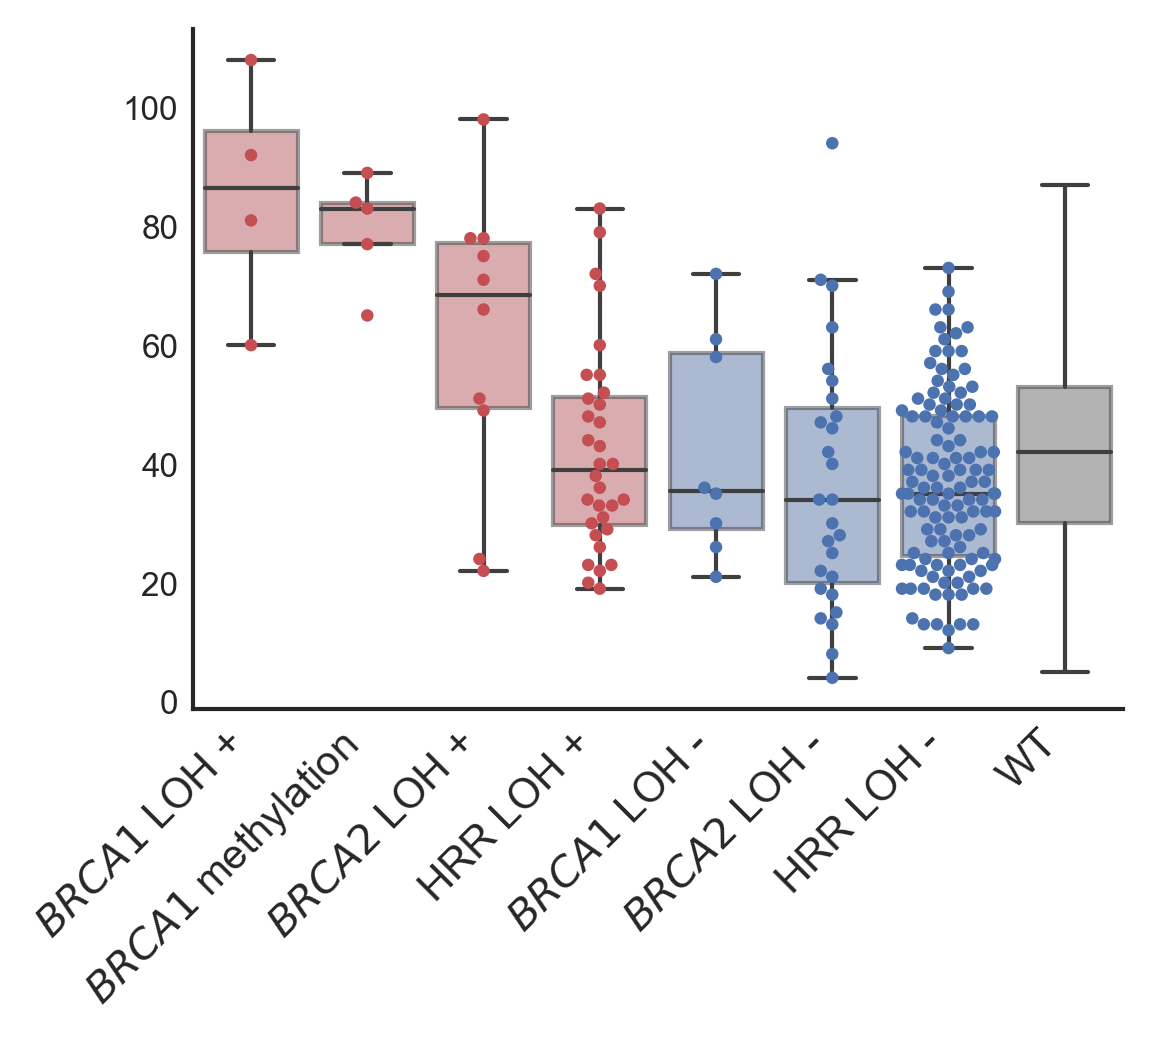

In [246]:
plt_df=df2
cat='BRCA_status'
val='HRD_score_cosmic'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

/Users/tshiro/.pyenv/versions/miniforge3-4.10/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


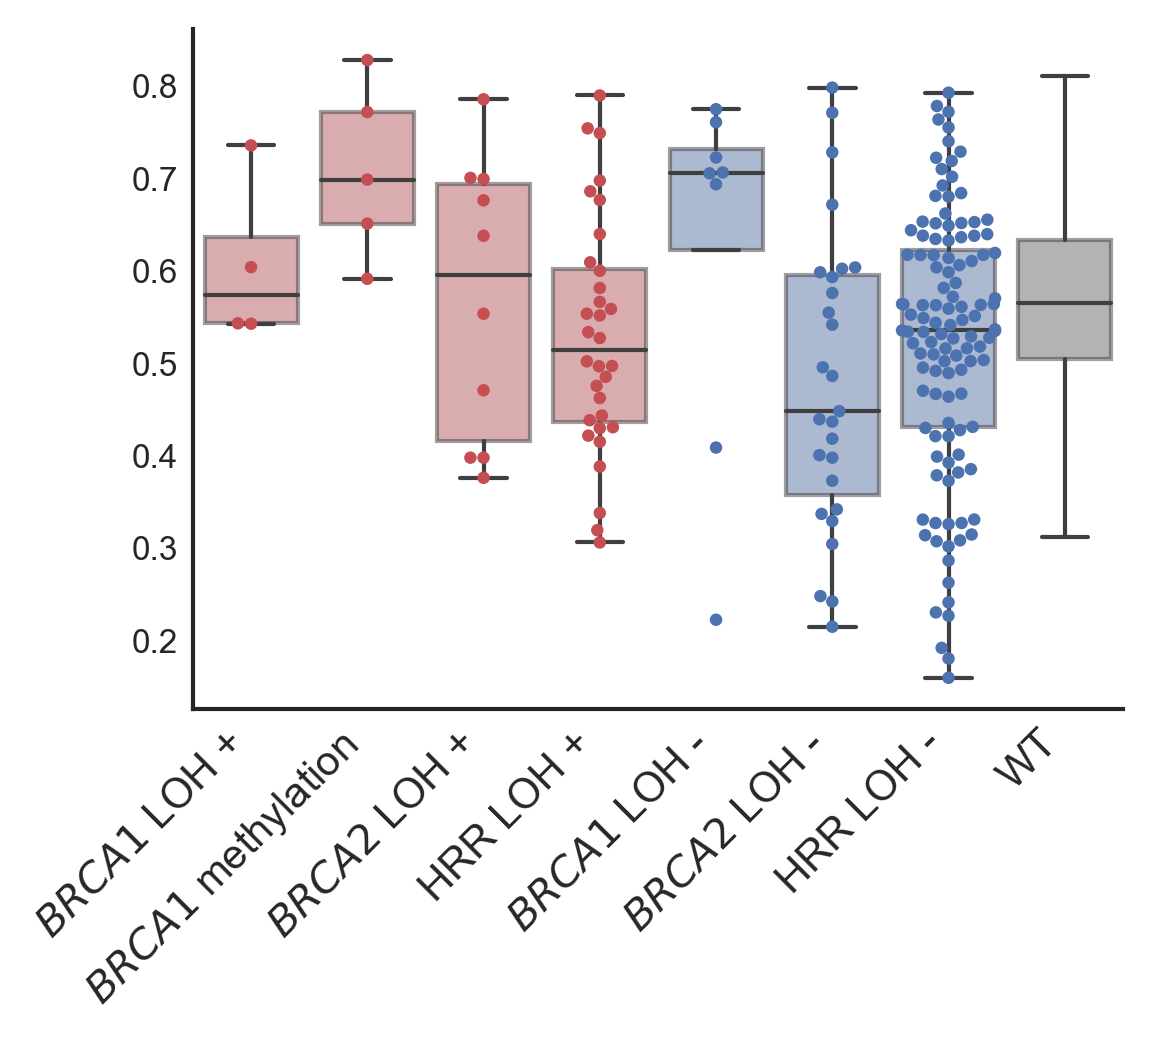

In [247]:
plt_df=df2
cat='BRCA_status'
val='SigMA_cosmic'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

## Genomic scar score and Drug sensitivity

### HRD score

In [248]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df2[['HRD_score_cosmic',drug]].dropna()
    a=plt_df['HRD_score_cosmic'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 50:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [249]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [250]:
df_cor=df_cor.dropna()

In [251]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [252]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(764, 8)

In [253]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS    mlog10p  \
GDSC2_Cytarabine_1006        743.0  3.496451e-26  0.374720  25.456373   
GDSC2_Oxaliplatin_1089       792.0  7.015871e-25  0.354609  24.153918   
GDSC2_Epirubicin_1511        743.0  1.593496e-22  0.347593  21.797649   
GDSC2_Nutlin-3a (-)_1047     763.0  4.063605e-22  0.340127  21.391089   
GDSC2_Palbociclib_1054       760.0  1.343404e-19  0.320355  18.871793   
...                            ...           ...       ...        ...   
GDSC2_Picolinici-acid_1635   720.0  3.639639e-06 -0.171602   5.438942   
GDSC1_Cetuximab_1114         853.0  1.192727e-07 -0.180064   6.923459   
GDSC2_GDC0810_1925           743.0  7.100110e-08 -0.196097   7.148735   
GDSC2_AZD3759_1915           751.0  9.796967e-09 -0.207312   8.008908   
GDSC2_Gefitinib_1010         743.0  9.205329e-10 -0.222178   9.035961   

                                     FDR  significant        drug_anno  \
GDSC2_Cytarabine_1006       2.964990e-23            1   Antimetabolite   
GDSC2_Oxaliplatin_1089      2.974729e-22            1         Platinum   
GDSC2_Epirubicin_1511       4.504282e-20            1    DNA inhibitor   
GDSC2_Nutlin-3a (-)_1047    8.614843e-20            1      p53 pathway   
GDSC2_Palbociclib_1054      2.278412e-17            1       Cell cycle   
...                                  ...          ...              ...   
GDSC2_Picolinici-acid_1635  2.188946e-05            1           Others   
GDSC1_Cetuximab_1114        8.719243e-07            1   EGFR signaling   
GDSC2_GDC0810_1925          5.424228e-07            1  Hormone-related   
GDSC2_AZD3759_1915          8.838115e-08            1   EGFR signaling   
GDSC2_Gefitinib_1010        1.027121e-08            1   EGFR signaling   

                                 cid  
GDSC2_Cytarabine_1006           6253  
GDSC2_Oxaliplatin_1089       5310940  
GDSC2_Epirubicin_1511          41867  
GDSC2_Nutlin-3a (-)_1047    11433190  
GDSC2_Palbociclib_1054       5330286  
...                              ...  
GDSC2_Picolinici-acid_1635      1018  
GDSC1_Cetuximab_1114        85668777  
GDSC2_GDC0810_1925          56941241  
GDSC2_AZD3759_1915          78209992  
GDSC2_Gefitinib_1010          123631  

[764 rows x 8 columns]

In [254]:
NP=len(df_cor_p)
NN=len(df_cor_n)

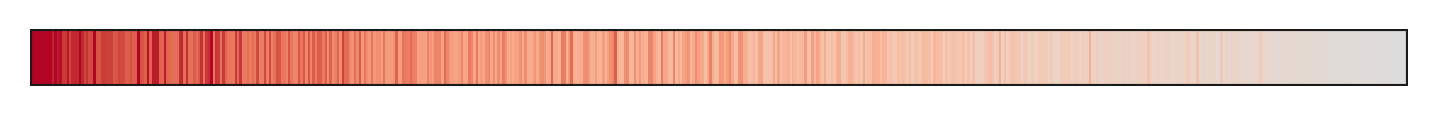

In [255]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

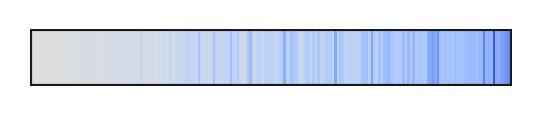

In [256]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

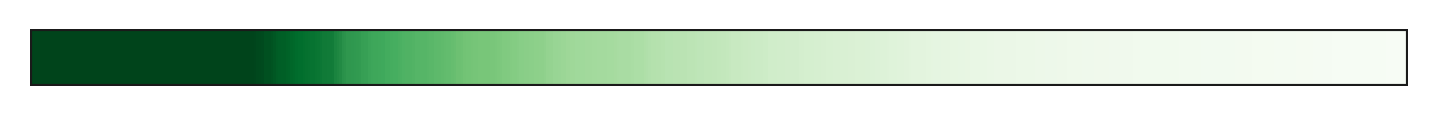

In [257]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

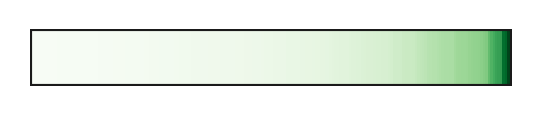

In [258]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

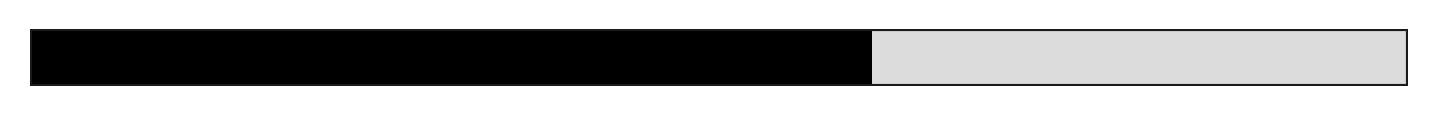

In [259]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

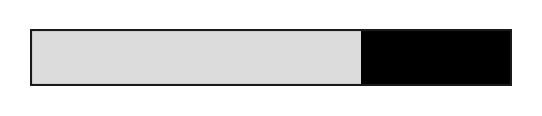

In [260]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [261]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

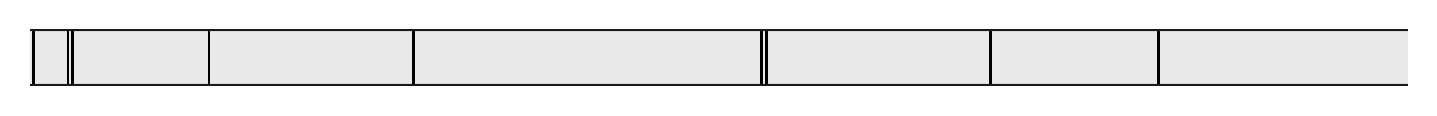

In [262]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

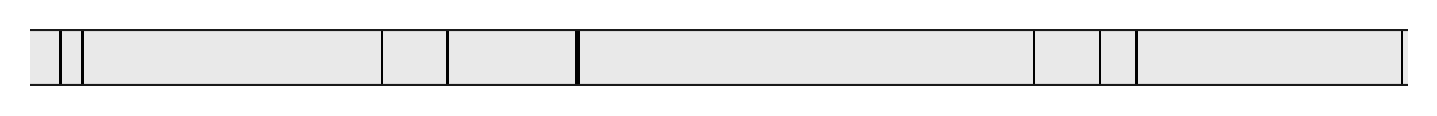

In [263]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


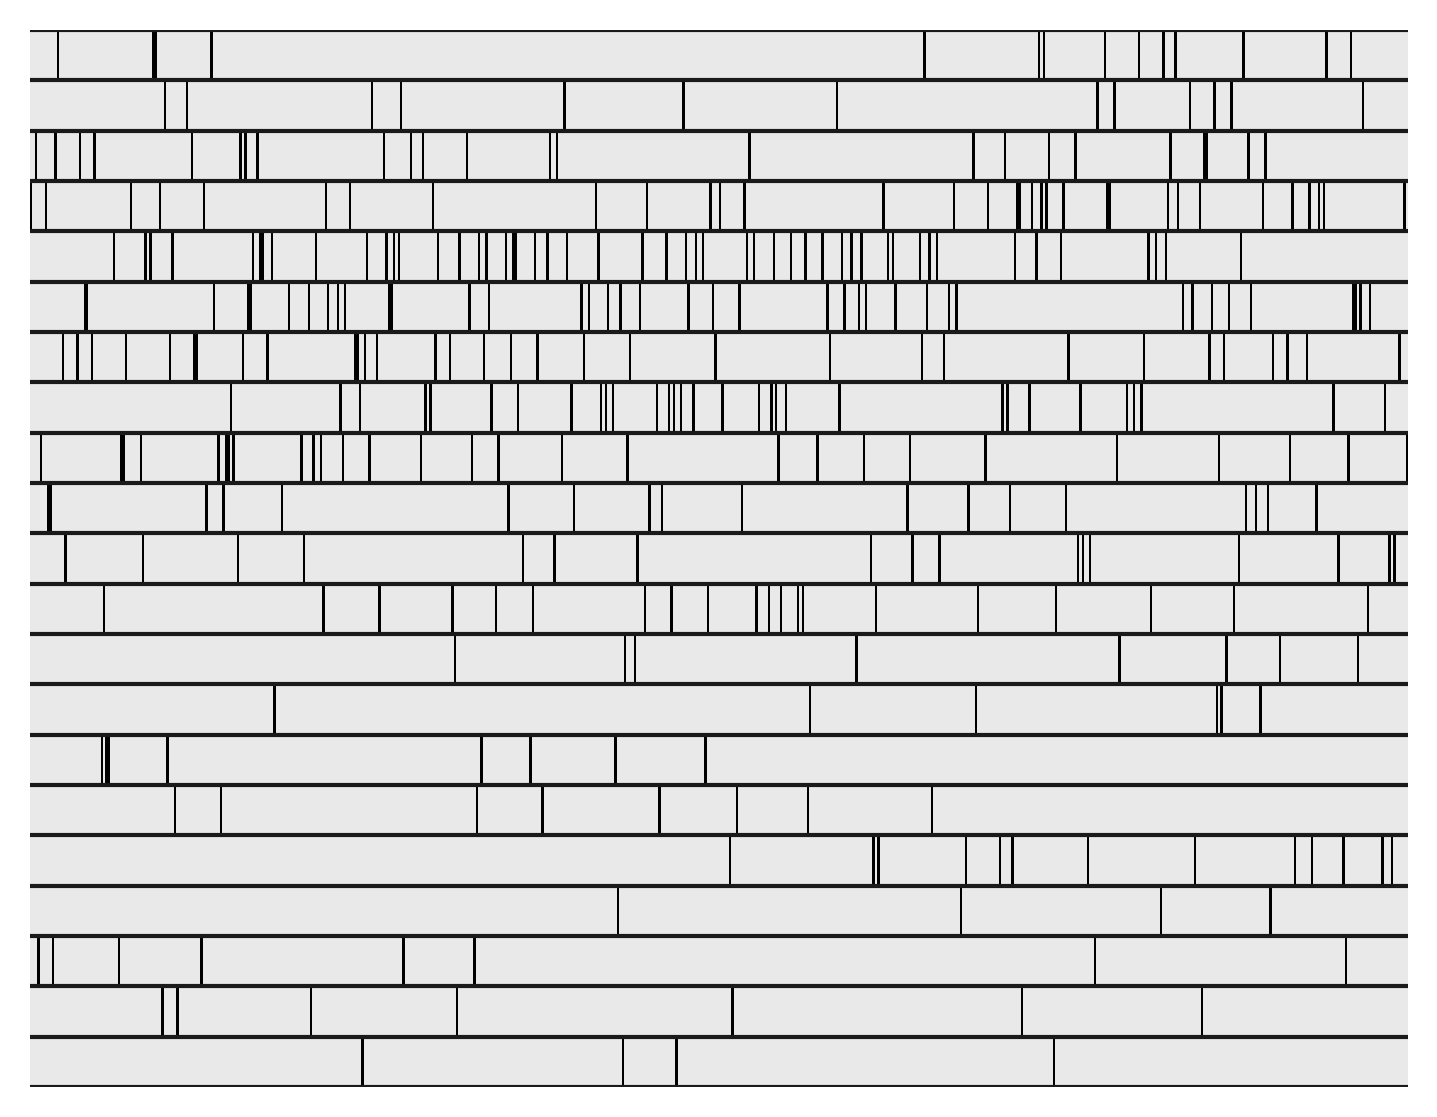

In [264]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [265]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

In [266]:
in_df['p53 pathway']=0
in_df['Cytoskeleton']=0

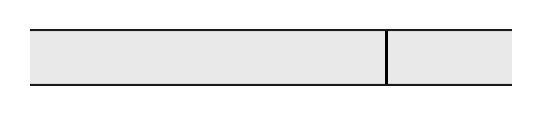

In [267]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

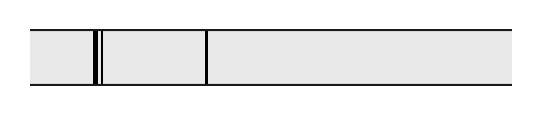

In [268]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


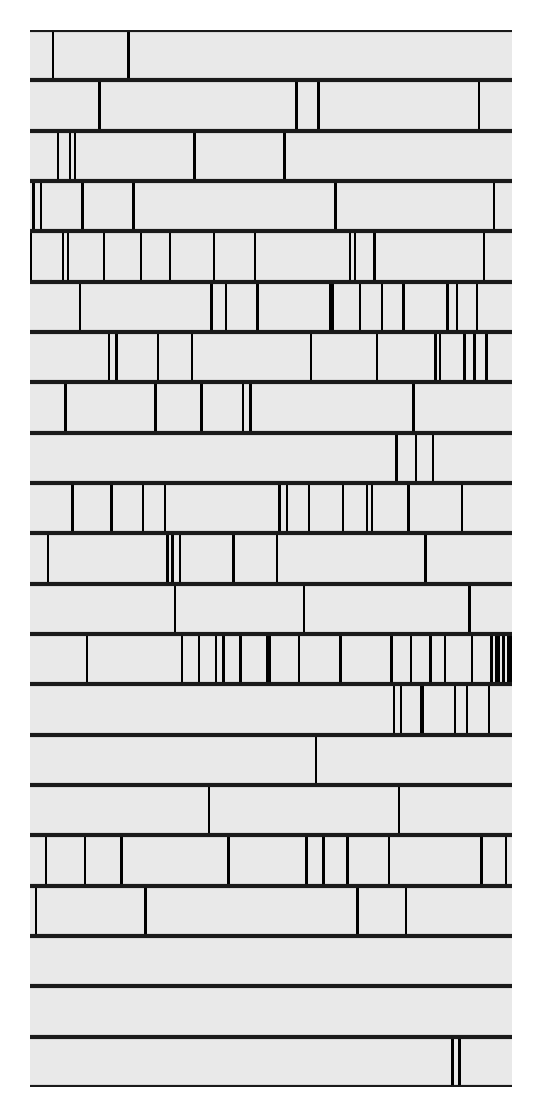

In [269]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [270]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number       pvalues        rS  \
GDSC2_Oxaliplatin_1089                     792.0  7.015871e-25  0.354609   
GDSC2_Oxaliplatin_1806                     720.0  2.140423e-15  0.289780   
GDSC2_Cisplatin_1005                       758.0  6.159011e-15  0.278180   
CTRP2_oxaliplatin_375582                   501.0  5.732359e-10  0.272320   
CTRP2_carboplatin_26979                    514.0  2.085719e-05  0.186507   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   321.0  1.505342e-02  0.135592   
GDSC1_Cisplatin_1005                       923.0  1.599050e-02  0.079280   
gCSI_Cisplatin_CID24191118                 224.0  1.807731e-01  0.089746   
PRISM_carboplatin_BRD-K90947825-001-02-7   318.0  4.713720e-01  0.040533   
PRISM_cisplatin_BRD-K69172251-001-08-9     319.0  3.233564e-02 -0.119868   

                                            mlog10p           FDR  \
GDSC2_Oxaliplatin_1089                    24.153918  7.015871e-24   
GDSC2_Oxaliplatin_1806                    14.669500  1.070212e-14   
GDSC2_Cisplatin_1005                      14.210489  2.053004e-14   
CTRP2_oxaliplatin_375582                   9.241667  1.433090e-09   
CTRP2_carboplatin_26979                    4.680744  4.171438e-05   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   1.822365  2.284357e-02   
GDSC1_Cisplatin_1005                       1.796138  2.284357e-02   
gCSI_Cisplatin_CID24191118                 0.742866  2.008590e-01   
PRISM_carboplatin_BRD-K90947825-001-02-7   0.326636  4.713720e-01   
PRISM_cisplatin_BRD-K69172251-001-08-9     1.490319  4.041955e-02   

                                          significant drug_anno       cid  
GDSC2_Oxaliplatin_1089                              1  Platinum   5310940  
GDSC2_Oxaliplatin_1806                              1  Platinum   5310940  
GDSC2_Cisplatin_1005                                1  Platinum     84691  
CTRP2_oxaliplatin_375582                            1  Platinum  24197464  
CTRP2_carboplatin_26979                             1  Platinum     38904  
PRISM_oxaliplatin_BRD-K78960041-001-05-7            1  Platinum  24197464  
GDSC1_Cisplatin_1005                                1  Platinum     84691  
gCSI_Cisplatin_CID24191118                          0  Platinum  24191118  
PRISM_carboplatin_BRD-K90947825-001-02-7            0  Platinum    426756  
PRISM_cisplatin_BRD-K69172251-001-08-9              1  Platinum  24191118

In [271]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number       pvalues        rS  \
GDSC2_Talazoparib_1259                     739.0  3.592479e-16  0.293719   
GDSC2_Niraparib_1177                       720.0  1.777250e-14  0.280423   
GDSC1_Olaparib_1017                        921.0  8.957121e-06  0.145749   
CTRP2_olaparib_411867                      510.0  4.695854e-05  0.179213   
GDSC1_Talazoparib_1259                     888.0  9.662019e-04  0.110563   
GDSC2_Olaparib_1017                        752.0  9.788880e-04  0.119977   
CTRP2_veliparib_606034                     525.0  2.475046e-01  0.050559   
GDSC1_Veliparib_1018                       922.0  3.779559e-01  0.029070   
PRISM_talazoparib_BRD-K95142244-001-01-5   343.0  4.241905e-01  0.043289   
PRISM_niraparib_BRD-K54955827-001-02-2     337.0  9.797866e-01  0.001385   
PRISM_olaparib_BRD-K02113016-001-19-6      309.0  8.176593e-01 -0.013169   
GDSC1_Olaparib_1495                        884.0  8.092805e-01 -0.008129   
GDSC1_Rucaparib_1175                       916.0  8.011266e-01 -0.008334   
PRISM_olaparib_BRD-K02113016-001-15-4      317.0  3.940190e-01 -0.048035   

                                            mlog10p           FDR  \
GDSC2_Talazoparib_1259                    15.444606  5.029471e-15   
GDSC2_Niraparib_1177                      13.750251  1.244075e-13   
GDSC1_Olaparib_1017                        5.047832  4.179990e-05   
CTRP2_olaparib_411867                      4.328285  1.643549e-04   
GDSC1_Talazoparib_1259                     3.014932  2.284072e-03   
GDSC2_Olaparib_1017                        3.009267  2.284072e-03   
CTRP2_veliparib_606034                     0.606417  4.950093e-01   
GDSC1_Veliparib_1018                       0.422559  5.938666e-01   
PRISM_talazoparib_BRD-K95142244-001-01-5   0.372439  5.938666e-01   
PRISM_niraparib_BRD-K54955827-001-02-2     0.008868  9.797866e-01   
PRISM_olaparib_BRD-K02113016-001-19-6      0.087428  8.805562e-01   
GDSC1_Olaparib_1495                        0.091901  8.805562e-01   
GDSC1_Rucaparib_1175                       0.096299  8.805562e-01   
PRISM_olaparib_BRD-K02113016-001-15-4      0.404483  5.938666e-01   

                                          significant       drug_anno  \
GDSC2_Talazoparib_1259                              1  PARP inhibitor   
GDSC2_Niraparib_1177                                1  PARP inhibitor   
GDSC1_Olaparib_1017                                 1  PARP inhibitor   
CTRP2_olaparib_411867                               1  PARP inhibitor   
GDSC1_Talazoparib_1259                              1  PARP inhibitor   
GDSC2_Olaparib_1017                                 1  PARP inhibitor   
CTRP2_veliparib_606034                              0  PARP inhibitor   
GDSC1_Veliparib_1018                                0  PARP inhibitor   
PRISM_talazoparib_BRD-K95142244-001-01-5            0  PARP inhibitor   
PRISM_niraparib_BRD-K54955827-001-02-2              0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-19-6               0  PARP inhibitor   
GDSC1_Olaparib_1495                                 0  PARP inhibitor   
GDSC1_Rucaparib_1175                                0  PARP inhibitor   
PRISM_olaparib_BRD-K02113016-001-15-4               0  PARP inhibitor   

                                                cid  
GDSC2_Talazoparib_1259                     44819241  
GDSC2_Niraparib_1177                       24958200  
GDSC1_Olaparib_1017                        23725625  
CTRP2_olaparib_411867                      23725625  
GDSC1_Talazoparib_1259                     44819241  
GDSC2_Olaparib_1017                        23725625  
CTRP2_veliparib_606034                     11960529  
GDSC1_Veliparib_1018                       11960529  
PRISM_talazoparib_BRD-K95142244-001-01-5  135565082  
PRISM_niraparib_BRD-K54955827-001-02-2     24958200  
PRISM_olaparib_BRD-K02113016-001-19-6      23725625  
GDSC1_Olaparib_1495                        23725625  
GDSC1_Rucaparib_1175                        9931953  
PRISM_olapari

### Signature 3 cosmic

In [272]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df2[['SigMA_cosmic',drug]].dropna()
    a=plt_df['SigMA_cosmic'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 50:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [273]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [274]:
df_cor=df_cor.dropna()

In [275]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [276]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(764, 8)

In [277]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS    mlog10p  \
GDSC1_(5Z)-7-Oxozeaenol_1242   889.0  1.715645e-11  0.223126  10.765572   
GDSC1_VX-11e_262               897.0  5.680254e-11  0.216465  10.245632   
GDSC1_Dabrafenib_1373          847.0  5.113706e-10  0.211462   9.291264   
GDSC1_NVP-BHG712_295           897.0  1.073185e-09  0.201794   8.969326   
GDSC1_CI-1040_1015             906.0  1.343794e-09  0.199644   8.871667   
...                              ...           ...       ...        ...   
gCSI_MLN2480_CID25161177       213.0  3.944364e-03 -0.196735   2.404023   
CTRP2_ciclosporin_55512        484.0  3.123172e-03 -0.134074   2.505404   
gCSI_Tanespimycin_CID6505803   233.0  3.331468e-04 -0.233070   3.477364   
gCSI_Dabrafenib_CID44462760    351.0  1.515606e-06 -0.253397   5.819414   
gCSI_Gemcitabine_CID356653     235.0  1.016730e-10 -0.405593   9.992794   

                                       FDR  significant  \
GDSC1_(5Z)-7-Oxozeaenol_1242  1.454867e-08            1   
GDSC1_VX-11e_262              2.408428e-08            1   
GDSC1_Dabrafenib_1373         1.084106e-07            1   
GDSC1_NVP-BHG712_295          1.820121e-07            1   
GDSC1_CI-1040_1015            1.899229e-07            1   
...                                    ...          ...   
gCSI_MLN2480_CID25161177      3.097056e-02            1   
CTRP2_ciclosporin_55512       2.546587e-02            1   
gCSI_Tanespimycin_CID6505803  4.545668e-03            1   
gCSI_Dabrafenib_CID44462760   5.587974e-05            1   
gCSI_Gemcitabine_CID356653    2.873956e-08            1   

                                                      drug_anno       cid  
GDSC1_(5Z)-7-Oxozeaenol_1242                             Others   9863776  
GDSC1_VX-11e_262                             ERK MAPK signaling  11634725  
GDSC1_Dabrafenib_1373                        ERK MAPK signaling  44462760  
GDSC1_NVP-BHG712_295                                     Others  16747388  
GDSC1_CI-1040_1015                           ERK MAPK signaling   6918454  
...                                                         ...       ...  
gCSI_MLN2480_CID25161177                                 Others  25161177  
CTRP2_ciclosporin_55512                                  Others   6435893  
gCSI_Tanespimycin_CID6505803  Protein stability and degradation   6505803  
gCSI_Dabrafenib_CID44462760                  ERK MAPK signaling  44462760  
gCSI_Gemcitabine_CID356653                       Antimetabolite    356653  

[764 rows x 8 columns]

In [278]:
NP=len(df_cor_p)
NN=len(df_cor_n)

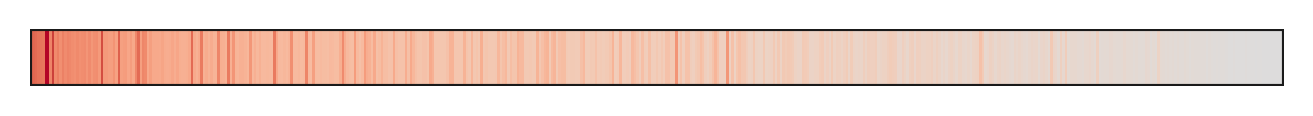

In [279]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

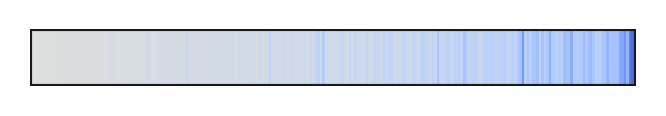

In [280]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

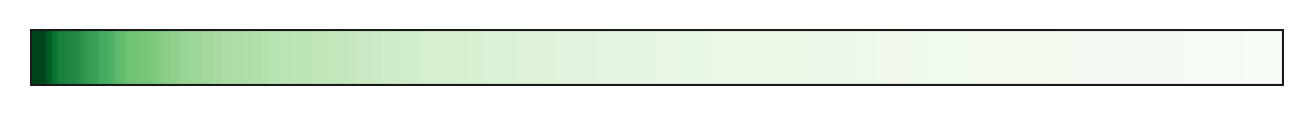

In [281]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

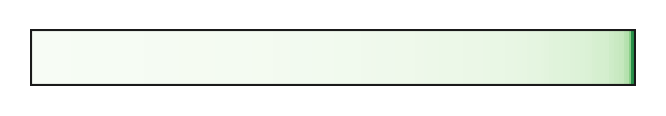

In [282]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

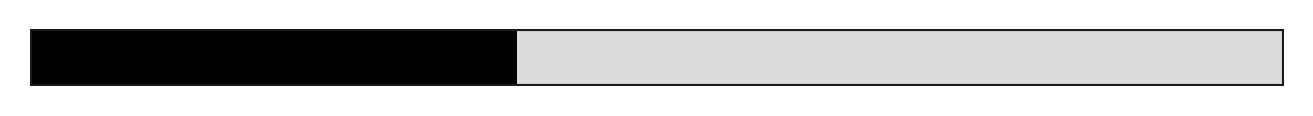

In [283]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

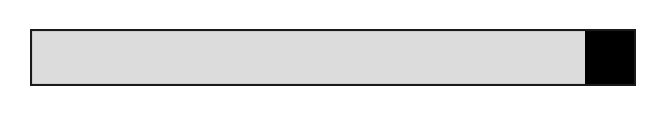

In [284]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [285]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

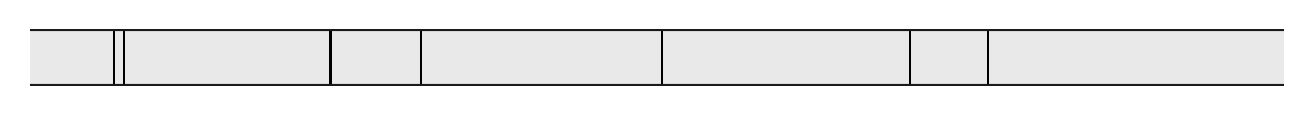

In [286]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

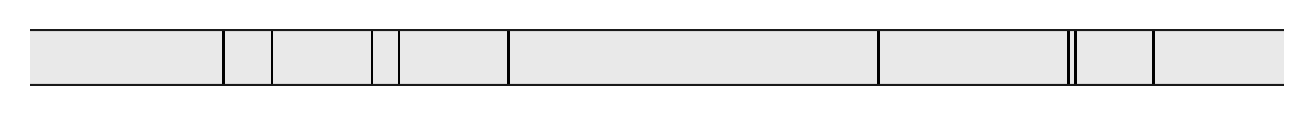

In [287]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


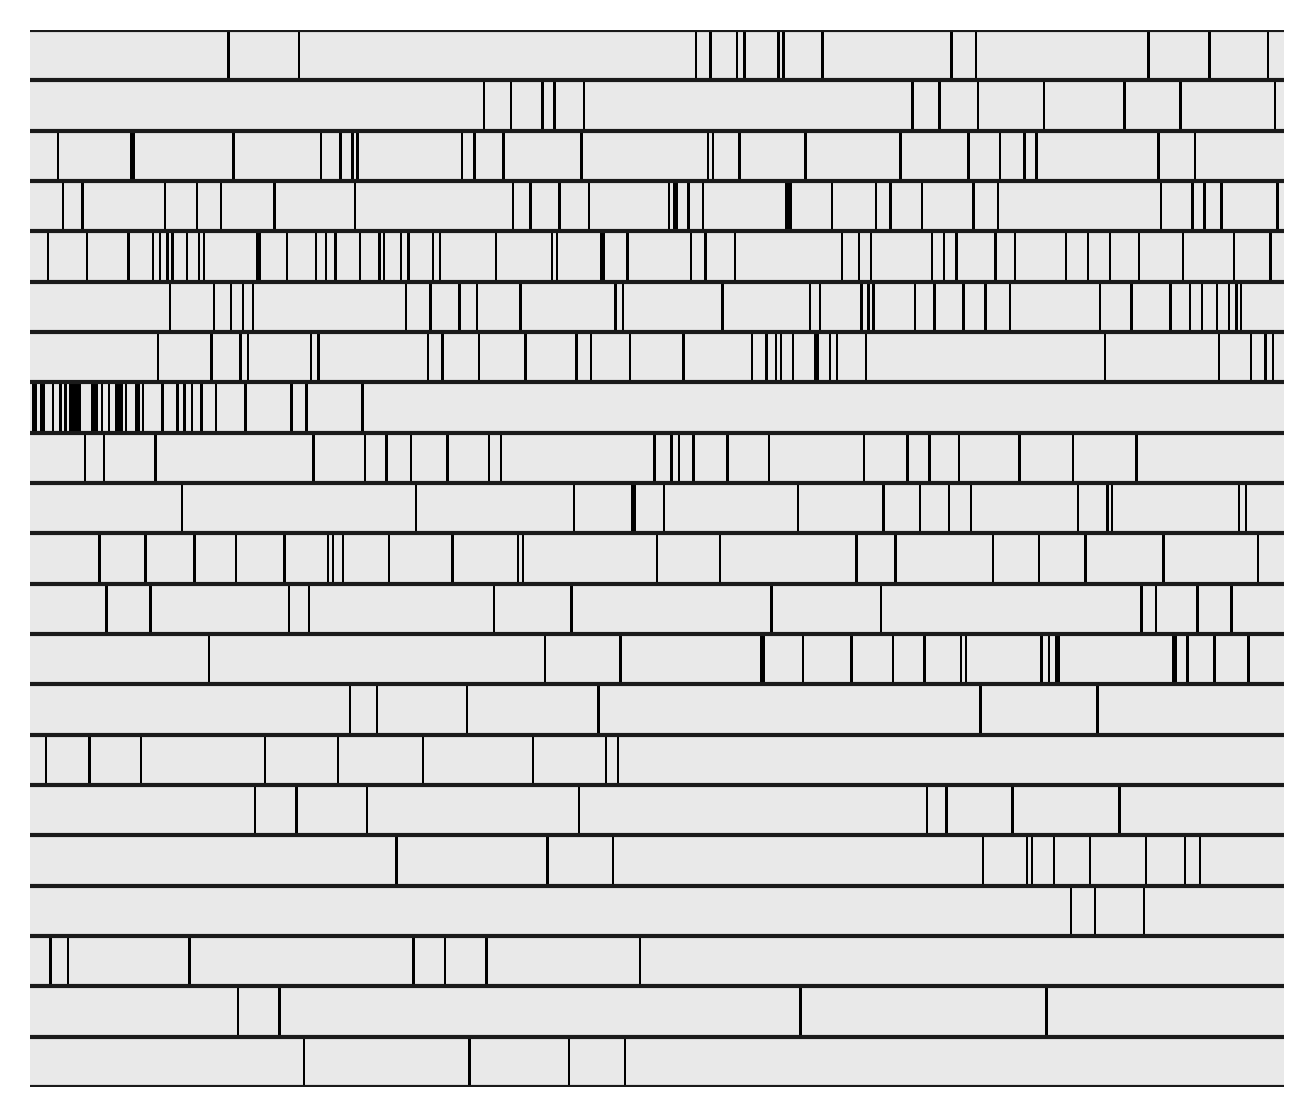

In [288]:
sns_df=in_df[drug_order[2:]]
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [289]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

In [290]:
in_df['p53 pathway']=0
in_df['Cytoskeleton']=0

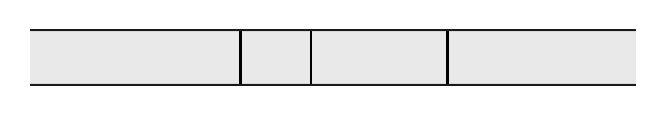

In [291]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

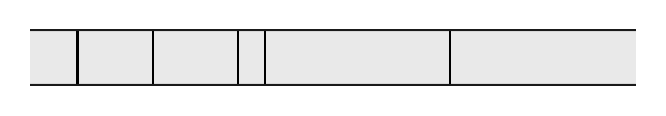

In [292]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

Topoisomerase inhibitor
DNA alkylator
DNA inhibitor
Antimetabolite
PI3K/MTOR signaling
RTK signaling
Chromatin-related
ERK MAPK signaling
Cell cycle
Antimicrotubule
Protein stability and degradation
Apoptosis regulation
EGFR signaling
WNT signaling
Genome integrity
Metabolism
Hormone-related
IGF1R signaling
p53 pathway
Cytoskeleton
JNK and p38 signaling


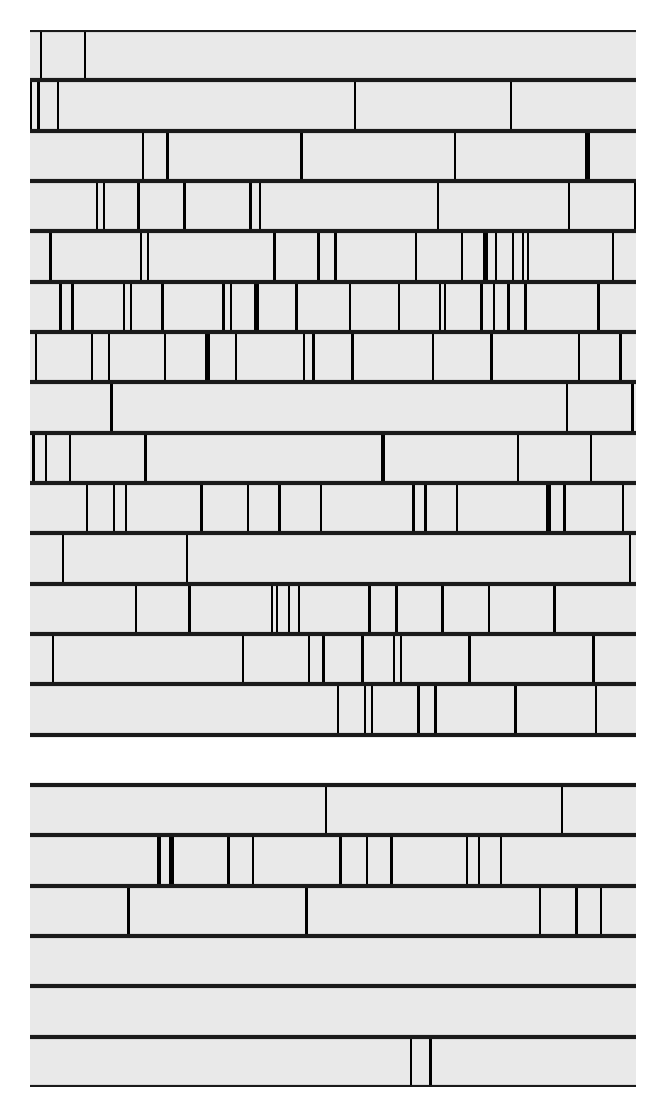

In [295]:
sns_df=in_df.reindex(columns=drug_order[2:])
N=sns_df.shape[0]
M=sns_df.shape[1]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),M/4.5))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
for i,x in enumerate(sns_df.columns):
    print(x)
    ax.hlines(y=i+1,xmin=0,xmax=sns_df.shape[0],color='k')
    if i==0:
        ax.hlines(y=i,xmin=0,xmax=sns_df.shape[0],color='k')    

#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')
    

In [296]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Oxaliplatin_1806                     720.0  0.000022  0.157393   
GDSC2_Oxaliplatin_1089                     791.0  0.000050  0.143759   
GDSC2_Cisplatin_1005                       757.0  0.007348  0.097359   
GDSC1_Cisplatin_1005                       922.0  0.025371  0.073629   
CTRP2_carboplatin_26979                    514.0  0.136679  0.065734   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   320.0  0.403777  0.046830   
CTRP2_oxaliplatin_375582                   501.0  0.508819  0.029584   
gCSI_Cisplatin_CID24191118                 224.0  0.669369 -0.028686   
PRISM_carboplatin_BRD-K90947825-001-02-7   317.0  0.527442 -0.035621   
PRISM_cisplatin_BRD-K69172251-001-08-9     318.0  0.241178 -0.065913   

                                           mlog10p       FDR  significant  \
GDSC2_Oxaliplatin_1806                    4.655382  0.000221            1   
GDSC2_Oxaliplatin_1089                    4.305224  0.000248            1   
GDSC2_Cisplatin_1005                      2.133817  0.024494            1   
GDSC1_Cisplatin_1005                      1.595667  0.063427            1   
CTRP2_carboplatin_26979                   0.864298  0.273358            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.393858  0.576824            0   
CTRP2_oxaliplatin_375582                  0.293437  0.586047            0   
gCSI_Cisplatin_CID24191118                0.174335  0.669369            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.277825  0.586047            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.617662  0.401964            0   

                                         drug_anno       cid  
GDSC2_Oxaliplatin_1806                    Platinum   5310940  
GDSC2_Oxaliplatin_1089                    Platinum   5310940  
GDSC2_Cisplatin_1005                      Platinum     84691  
GDSC1_Cisplatin_1005                      Platinum     84691  
CTRP2_carboplatin_26979                   Platinum     38904  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464  
CTRP2_oxaliplatin_375582                  Platinum  24197464  
gCSI_Cisplatin_CID24191118                Platinum  24191118  
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756  
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118

In [297]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_71158/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Talazoparib_1259                     738.0  0.001799  0.114721   
GDSC1_Olaparib_1017                        920.0  0.004032  0.094722   
GDSC2_Niraparib_1177                       720.0  0.012993  0.092534   
GDSC1_Talazoparib_1259                     887.0  0.018907  0.078805   
GDSC1_Veliparib_1018                       921.0  0.046852  0.065513   
GDSC1_Olaparib_1495                        883.0  0.340985  0.032082   
GDSC2_Olaparib_1017                        751.0  0.633154  0.017444   
PRISM_niraparib_BRD-K54955827-001-02-2     336.0  0.642378  0.025424   
PRISM_olaparib_BRD-K02113016-001-19-6      308.0  0.745015  0.018605   
PRISM_talazoparib_BRD-K95142244-001-01-5   342.0  0.925515 -0.005074   
GDSC1_Rucaparib_1175                       915.0  0.779791 -0.009255   
CTRP2_veliparib_606034                     525.0  0.669659 -0.018662   
PRISM_olaparib_BRD-K02113016-001-15-4      316.0  0.618729 -0.028101   
CTRP2_olaparib_411867                      510.0  0.240591 -0.052056   

                                           mlog10p       FDR  significant  \
GDSC2_Talazoparib_1259                    2.744986  0.025185            1   
GDSC1_Olaparib_1017                       2.394464  0.028225            1   
GDSC2_Niraparib_1177                      1.886296  0.060633            1   
GDSC1_Talazoparib_1259                    1.723370  0.066176            1   
GDSC1_Veliparib_1018                      1.329269  0.131186            1   
GDSC1_Olaparib_1495                       0.467265  0.681970            0   
GDSC2_Olaparib_1017                       0.198490  0.839775            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.192209  0.839775            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.127835  0.839775            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.033617  0.925515            0   
GDSC1_Rucaparib_1175                      0.108022  0.839775            0   
CTRP2_veliparib_606034                    0.174146  0.839775            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.208500  0.839775            0   
CTRP2_olaparib_411867                     0.618720  0.561380            0   

                                               drug_anno        cid  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625  
CTRP2_olaparib_411867                     PARP inhibitor   23725625

# Broad vs COSMIC

In [298]:
df12=df0.merge(df2[['SigMA_cosmic','HRD_score_cosmic']],left_on='COSMICID',right_index=True,how='outer')

(636, 2)
r = 0.870, p = 9.80e-197


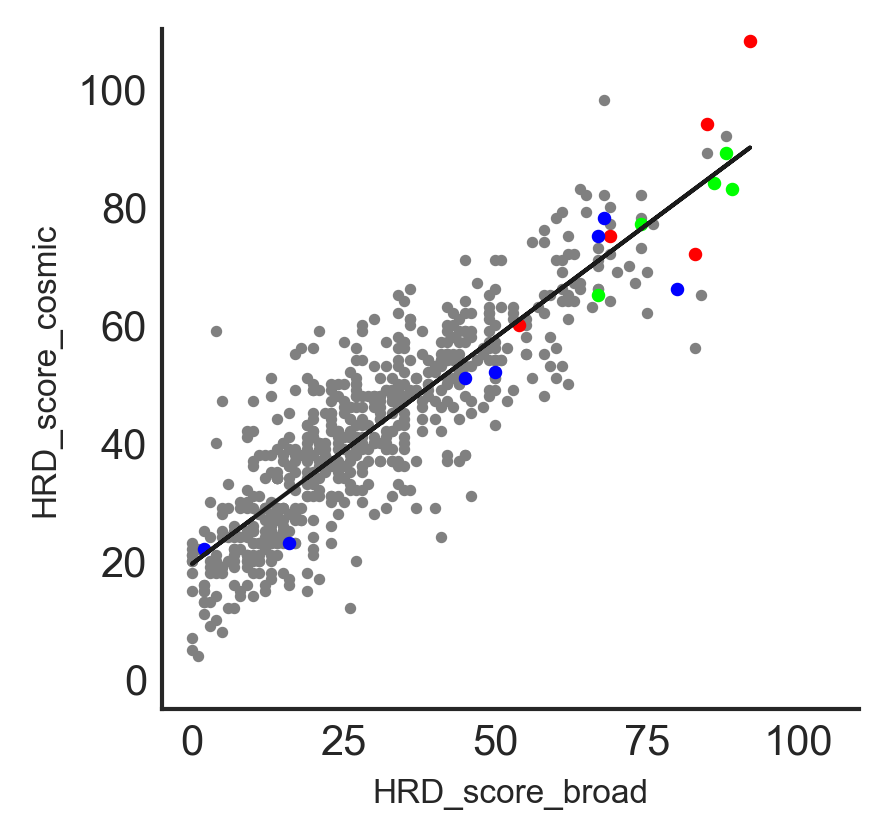

In [299]:
in_df=df12.copy()
#plt_df=plt_df[plt_df[cat]=='']
val1,val2,val3='HRD_score_broad','HRD_score_cosmic','BRCA_status'
plt_df=in_df[[val1,val2]].dropna()
print(plt_df.shape)
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
ax.set_xlabel(val1)
ax.set_ylabel(val2)
# linear regression, Pearson correlation
lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
ax.plot(x,a*x+b,lw=1,c='k')

plt_df2=in_df[[val1,val2,val3]].dropna()
plt_df3=plt_df2[plt_df2[val3]=='BRCA1_methylation']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='lime')

plt_df3=plt_df2[plt_df2[val3]=='BRCA1_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='red')

plt_df3=plt_df2[plt_df2[val3]=='BRCA2_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='blue')

ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)

print('r = {:.3f}, p = {:.2e}'.format(r,p))

ax.set_xlim(-5,110)
ax.set_ylim(-5,110)
ax.tick_params(labelsize=10)

(941, 2)
r = 0.959, p = 0.00e+00


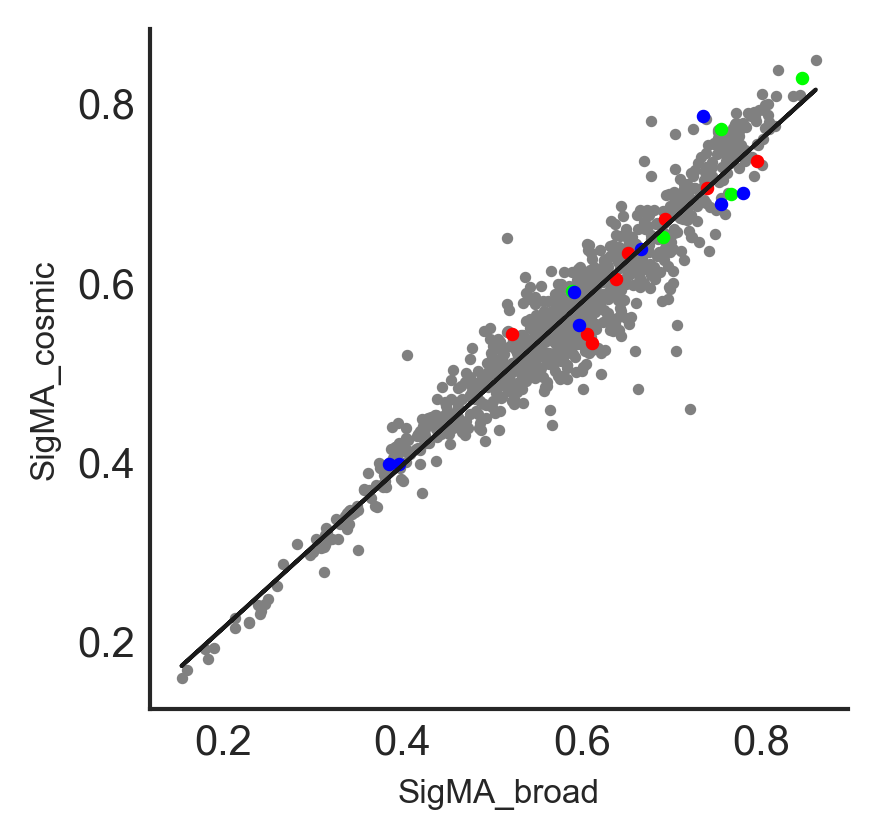

In [300]:
in_df=df12.copy()
#plt_df=plt_df[plt_df[cat]=='']
val1,val2,val3='SigMA_broad','SigMA_cosmic','BRCA_status'
plt_df=in_df[[val1,val2]].dropna()
print(plt_df.shape)
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
ax.set_xlabel(val1)
ax.set_ylabel(val2)
# linear regression, Pearson correlation
lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
ax.plot(x,a*x+b,lw=1,c='k')

plt_df2=in_df[[val1,val2,val3]].dropna()
plt_df3=plt_df2[plt_df2[val3]=='BRCA1_methylation']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='lime')

plt_df3=plt_df2[plt_df2[val3]=='BRCA1_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='red')

plt_df3=plt_df2[plt_df2[val3]=='BRCA2_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='blue')

ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)

print('r = {:.3f}, p = {:.2e}'.format(r,p))

ax.set_xticks([0.2,0.4,0.6,0.8])
ax.set_yticks([0.2,0.4,0.6,0.8])
ax.tick_params(labelsize=10)

# Divided by histlogy

In [145]:
counter=Counter(df0['primary_disease']).most_common()
counter

[('Lung Cancer', 233),
 ('Leukemia', 106),
 ('Lymphoma', 81),
 ('Skin Cancer', 78),
 ('Brain Cancer', 72),
 ('Colon/Colorectal Cancer', 63),
 ('Ovarian Cancer', 62),
 ('Head and Neck Cancer', 56),
 ('Breast Cancer', 54),
 ('Pancreatic Cancer', 46),
 ('Kidney Cancer', 43),
 ('Gastric Cancer', 43),
 ('Bone Cancer', 42),
 ('Esophageal Cancer', 37),
 ('Neuroblastoma', 34),
 ('Endometrial/Uterine Cancer', 33),
 ('Non-Cancerous', 31),
 ('Bladder Cancer', 30),
 ('Liver Cancer', 26),
 ('Myeloma', 23),
 ('Sarcoma', 19),
 ('Cervical Cancer', 17),
 ('Thyroid Cancer', 17),
 ('Bile Duct Cancer', 11),
 ('Prostate Cancer', 9),
 ('Rhabdoid', 4),
 ('Unknown', 3),
 ('Embryonal Cancer', 3),
 ('Gallbladder Cancer', 2),
 ('Adrenal Cancer', 1),
 ('Liposarcoma', 1)]

In [146]:
sel_cancer=[counter[i][0] for i in range(10)]
sel_cancer

['Lung Cancer',
 'Leukemia',
 'Lymphoma',
 'Skin Cancer',
 'Brain Cancer',
 'Colon/Colorectal Cancer',
 'Ovarian Cancer',
 'Head and Neck Cancer',
 'Breast Cancer',
 'Pancreatic Cancer']

In [147]:
df=df0.copy()

In [148]:
parpis

{'CTRP1_olaparib_411867',
 'CTRP1_rucaparib_628605',
 'CTRP1_veliparib_606034',
 'CTRP2_olaparib_411867',
 'CTRP2_veliparib_606034',
 'GDSC1_Olaparib_1017',
 'GDSC1_Olaparib_1495',
 'GDSC1_Rucaparib_1175',
 'GDSC1_Talazoparib_1259',
 'GDSC1_Veliparib_1018',
 'GDSC2_Niraparib_1177',
 'GDSC2_Olaparib_1017',
 'GDSC2_Talazoparib_1259',
 'PRISM_niraparib_BRD-K54955827-001-02-2',
 'PRISM_olaparib_BRD-K02113016-001-15-4',
 'PRISM_olaparib_BRD-K02113016-001-19-6',
 'PRISM_talazoparib_BRD-K95142244-001-01-5'}

In [150]:
dict_cancer_platin_hrd={}
val1='HRD_score_broad'
for c in sel_cancer:
    dict_cancer_platin_hrd[c]={}
    tmp_df=df[df['primary_disease']==c]
    for drug in platinums:
        tmp_df2=tmp_df[[val1,drug]].dropna()
        x,y=tmp_df2[val1],tmp_df2[drug]
        if len(x)>20:
            r,p=stats.spearmanr(x,y)
            dict_cancer_platin_hrd[c][drug]=r
        else:
            dict_cancer_platin_hrd[c][drug]=np.nan

<AxesSubplot:>

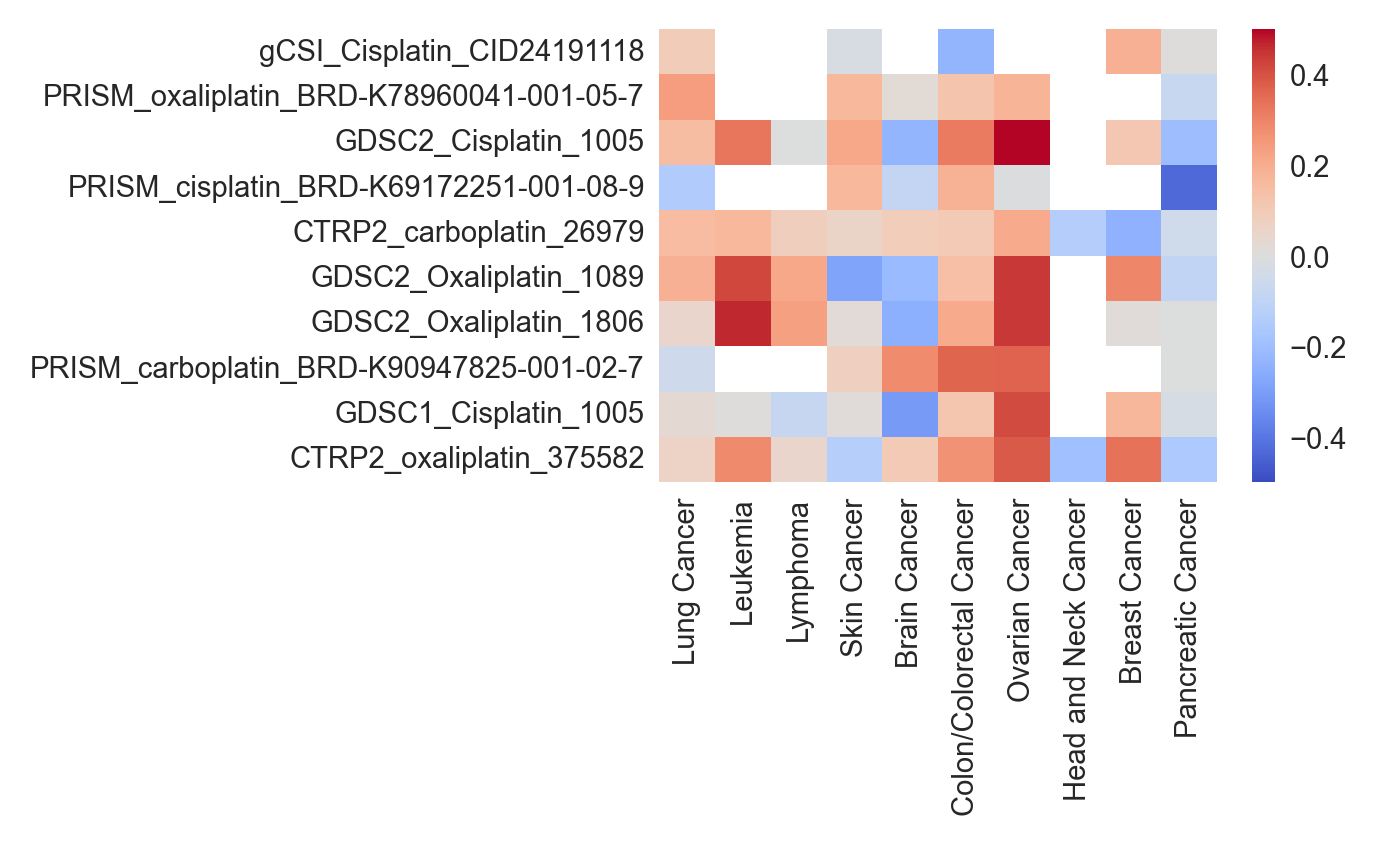

In [151]:
sns_df=pd.DataFrame(dict_cancer_platin_hrd)
sns.heatmap(sns_df,vmin=-0.5,vmax=0.5,cmap='coolwarm')

In [152]:
dict_cancer_platin_hrd={}
val1='HRD_score_broad'
for c in sel_cancer:
    dict_cancer_platin_hrd[c]={}
    tmp_df=df[df['primary_disease']==c]
    for drug in platinums:
        tmp_df2=tmp_df[[val1,drug]].dropna()
        x,y=tmp_df2[val1],tmp_df2[drug]
        if len(x)>20:
            r,p=stats.spearmanr(x,y)
            dict_cancer_platin_hrd[c][drug]=r
        else:
            dict_cancer_platin_hrd[c][drug]=np.nan

In [153]:
dict_cancer_platin_sig3={}
val1='SigMA_broad'
for c in sel_cancer:
    dict_cancer_platin_hrd[c]={}
    tmp_df=df[df['primary_disease']==c]
    for drug in platinums:
        tmp_df2=tmp_df[[val1,drug]].dropna()
        x,y=tmp_df2[val1],tmp_df2[drug]
        r,p=stats.spearmanr(x,y)
        dict_cancer_platin_hrd[c][drug]=r

<AxesSubplot:>

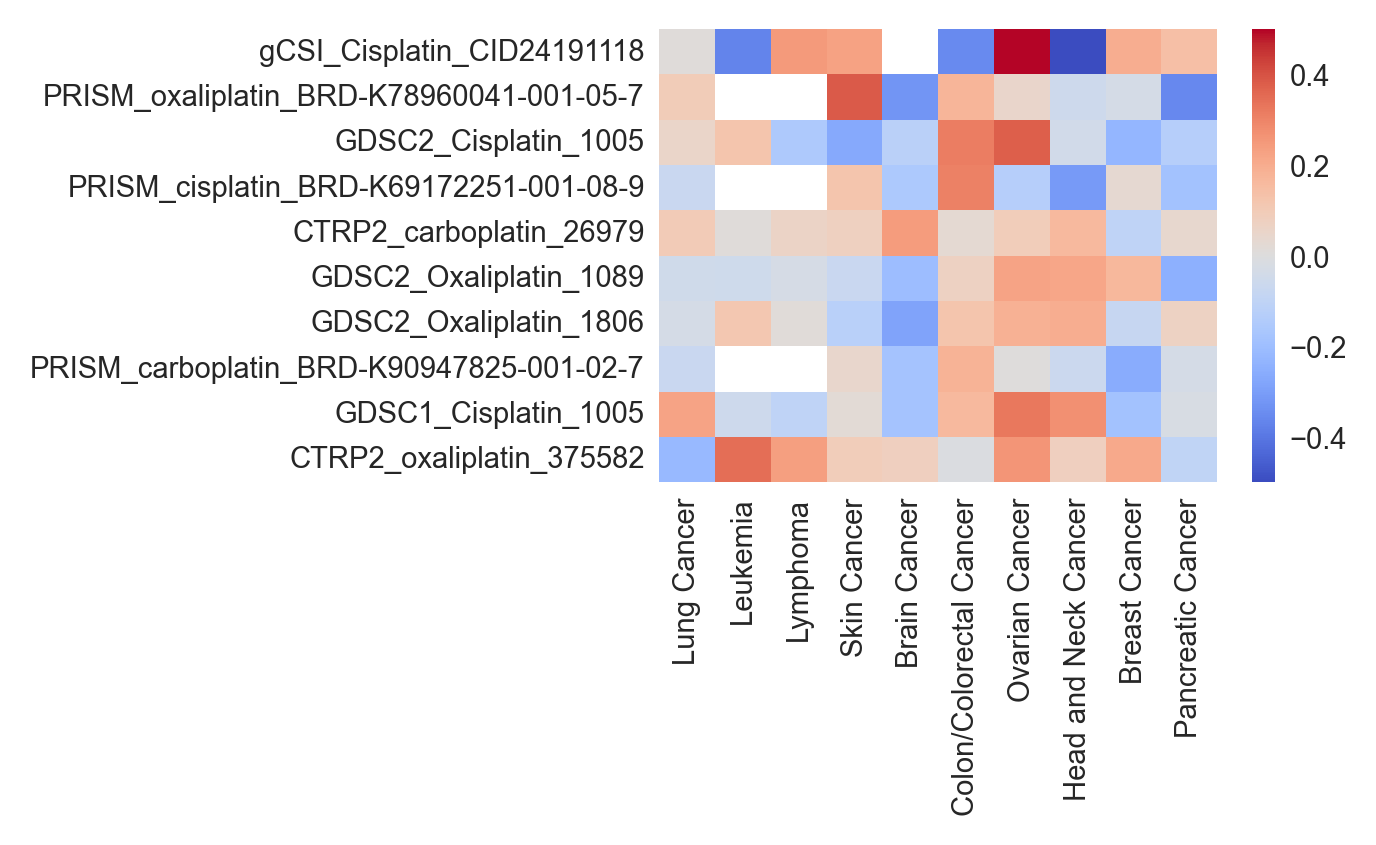

In [154]:
sns_df=pd.DataFrame(dict_cancer_platin_hrd)
sns.heatmap(sns_df,vmin=-0.5,vmax=0.5,cmap='coolwarm')

In [165]:
dict_cancer_platin_hrd={}
val1='HRD_score_broad'
for c in sel_cancer:
    dict_cancer_platin_hrd[c]={}
    tmp_df=df[df['primary_disease']==c]
    for drug in parpis:
        tmp_df2=tmp_df[[val1,drug]].dropna()
        x,y=tmp_df2[val1],tmp_df2[drug]
        if len(x)>20:
            r,p=stats.spearmanr(x,y)
            dict_cancer_platin_hrd[c][drug]=r
        else:
            dict_cancer_platin_hrd[c][drug]=np.nan

<AxesSubplot:>

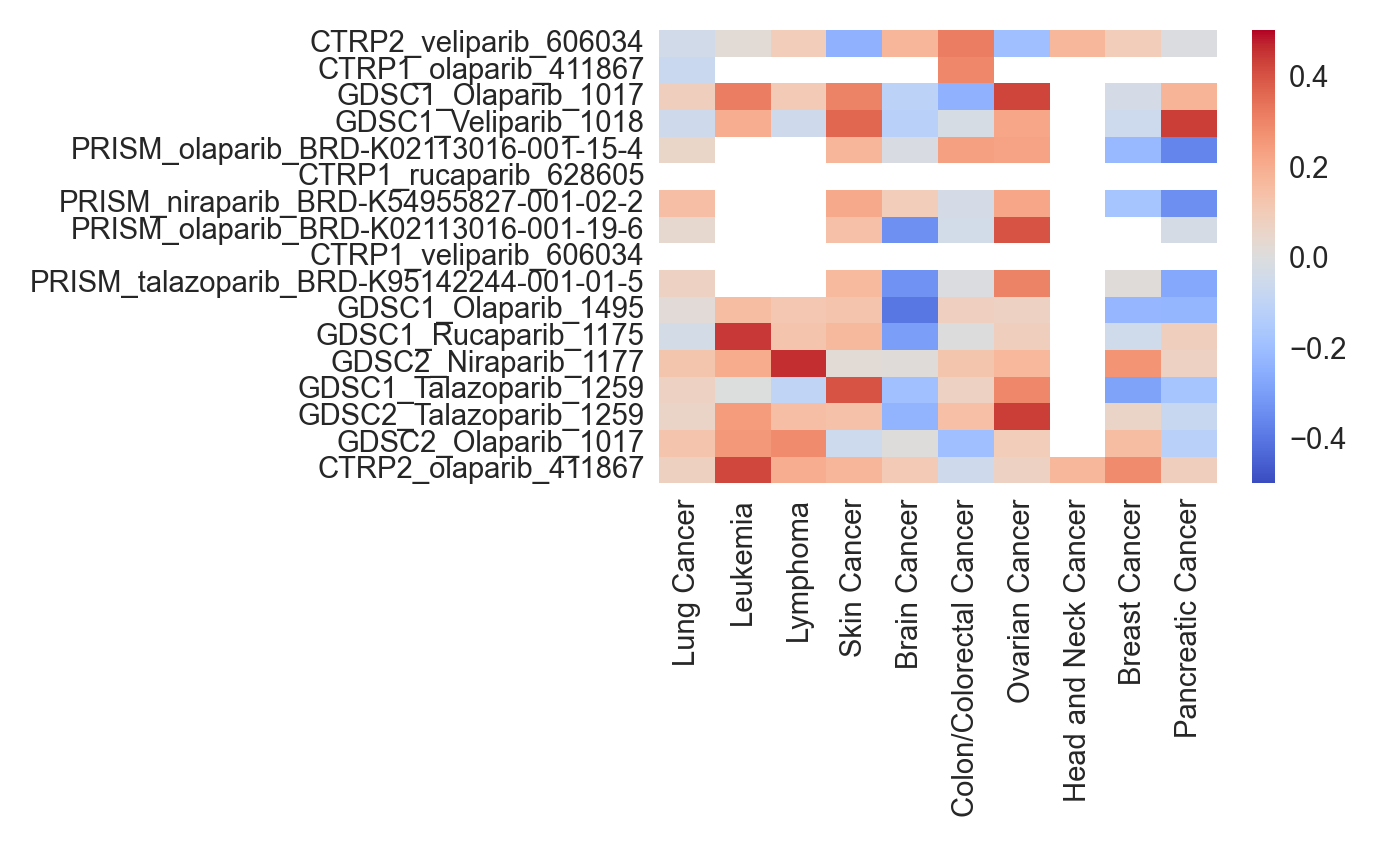

In [166]:
sns_df=pd.DataFrame(dict_cancer_platin_hrd)
sns.heatmap(sns_df,vmin=-0.5,vmax=0.5,cmap='coolwarm',yticklabels=1)

In [168]:
dict_cancer_platin_sig3={}
val1='SigMA_broad'
for c in sel_cancer:
    dict_cancer_platin_hrd[c]={}
    tmp_df=df[df['primary_disease']==c]
    for drug in parpis:
        tmp_df2=tmp_df[[val1,drug]].dropna()
        x,y=tmp_df2[val1],tmp_df2[drug]
        r,p=stats.spearmanr(x,y)
        dict_cancer_platin_hrd[c][drug]=r

<AxesSubplot:>

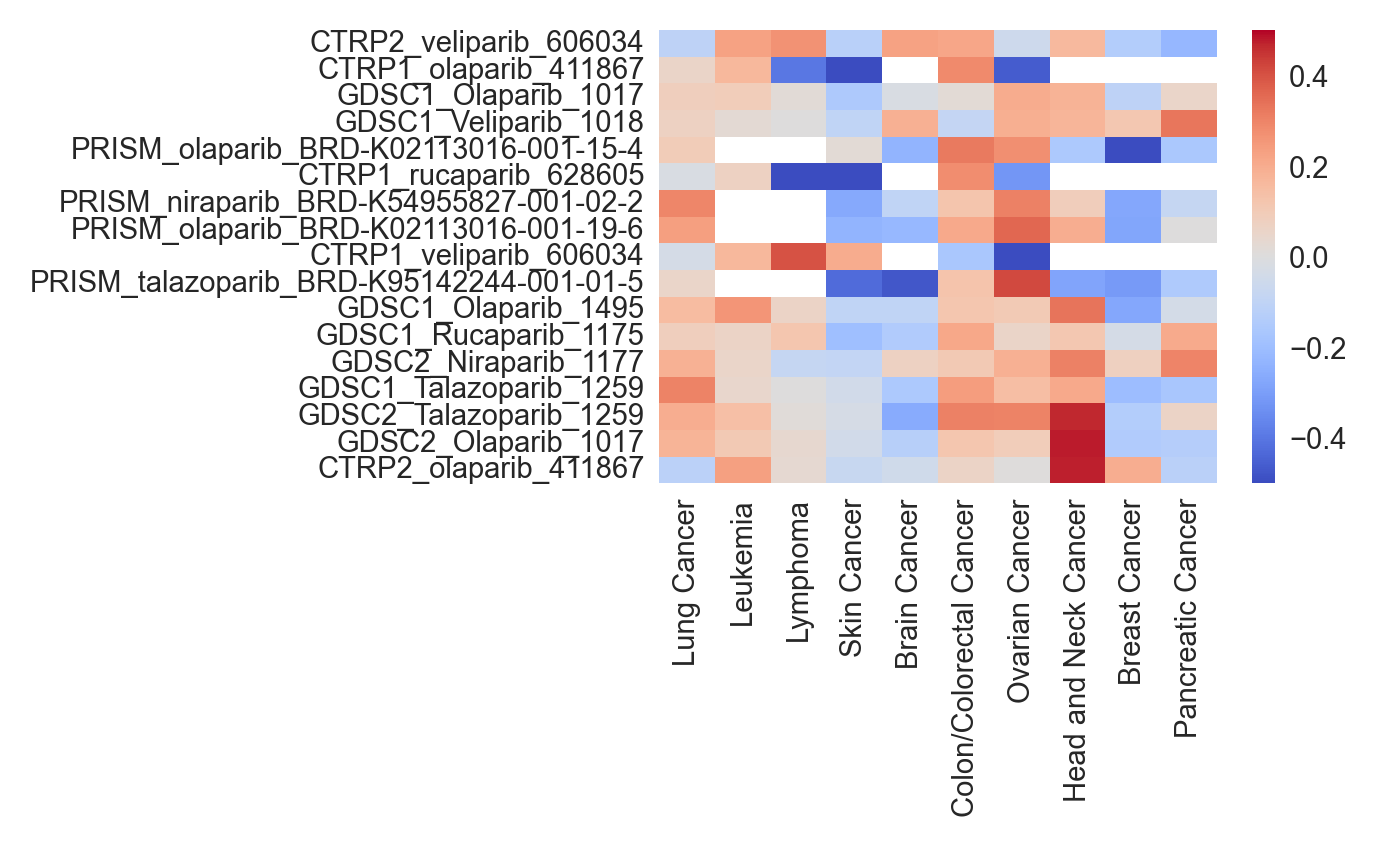

In [169]:
sns_df=pd.DataFrame(dict_cancer_platin_hrd)
sns.heatmap(sns_df,vmin=-0.5,vmax=0.5,cmap='coolwarm',yticklabels=1)

In [160]:
tmp_df2

SigMA_broad  CTRP2_oxaliplatin_375582
DepMap_ID                                        
ACH-000093     0.426600                    14.353
ACH-000205     0.556383                    13.891
ACH-000685     0.631102                    15.000
ACH-000022     0.551003                    12.563
ACH-000023     0.578261                    15.000
ACH-000042     0.449291                    14.884
ACH-000060     0.506400                    14.128
ACH-000094     0.541560                    14.795
ACH-000107     0.521073                    13.986
ACH-000108     0.606058                    14.126
ACH-000114     0.563679                    13.675
ACH-000118     0.508542                    14.686
ACH-000138     0.508944                    15.000
ACH-000139     0.549243                    14.308
ACH-000155     0.480701                    13.669
ACH-000164     0.393186                    12.037
ACH-000178     0.631425                    14.313
ACH-000213     0.500838                    14.086
ACH-000222     0.510293                    14.343
ACH-000235     0.433486                    14.744
ACH-000243     0.609496                    14.383
ACH-000265     0.620957                    11.898
ACH-000266     0.536876                    15.811
ACH-000270     0.532327                    14.904
ACH-000281     0.541947                    15.126
ACH-000307     0.515223                    14.980
ACH-000320     0.551932                    11.170
ACH-000332     0.547294                    14.332
ACH-000347     0.565296                    13.934
ACH-000354     0.779027                    14.454
ACH-000417     0.516909                    13.750
ACH-000468     0.545163                    14.059
ACH-000502     0.514637                    14.314
ACH-000517     0.589265                    14.635
ACH-000535     0.588350                    13.953
ACH-000599     0.658466                    13.949
ACH-000601     0.738576                    13.386
ACH-000652     0.614098                    15.206

In [157]:
tmp_df2

HRD_score_broad  CTRP2_carboplatin_26979
DepMap_ID                                           
ACH-000297             33.0                   16.790
ACH-000523             28.0                   14.404
ACH-000553             43.0                   15.000
ACH-000645             16.0                   14.959
ACH-000813             20.0                   15.108
...                     ...                      ...
ACH-000929             59.0                   14.952
ACH-000945             62.0                   15.000
ACH-000951             69.0                   15.322
ACH-000980              7.0                   14.137
ACH-001233             43.0                   15.859

[135 rows x 2 columns]

# Exclusive with in Breast and Ovarysel_cancer

In [431]:
df_sel=df0[df0['primary_disease'].isin(['Ovarian Cancer','Breast Cancer'])]
df_sel

cell_line_name stripped_cell_line_name      CCLE_Name  \
DepMap_ID                                                          
ACH-000288         BT-549                   BT549   BT549_BREAST   
ACH-000333        JHOM-2B                  JHOM2B   JHOM2B_OVARY   
ACH-000635        SNU-119                  SNU119   SNU119_OVARY   
ACH-001719        OCI-C4P                  OCIC4P   OCIC4P_OVARY   
ACH-001991          NZOV9                   NZOV9    NZOV9_OVARY   
...                   ...                     ...            ...   
ACH-002149            KGN                     KGN      KGN_OVARY   
ACH-002163       MRK-nu-1                  MRKNU1  MRKNU1_BREAST   
ACH-002179         OCUB-M                   OCUBM   OCUBM_BREAST   
ACH-002181        OVCA420                 OVCA420  OVCA420_OVARY   
ACH-002183          OVMIU                   OVMIU    OVMIU_OVARY   

                     alias  COSMICID     sex              source       RRID  \
DepMap_ID                                                                     
ACH-000288             NaN    905951  Female                ATCC  CVCL_1092   
ACH-000333             NaN        -1  Female               RIKEN  CVCL_4645   
ACH-000635             NaN        -1  Female                KCLB  CVCL_5014   
ACH-001719             NaN        -1  Female        Academic lab  CVCL_DH05   
ACH-001991  NZOV 9, NZOV-9        -1  Female  CellBank Australia  CVCL_LJ73   
...                    ...       ...     ...                 ...        ...   
ACH-002149             NaN    924186  Female              Sanger  CVCL_0375   
ACH-002163             NaN    908151  Female              Sanger  CVCL_1428   
ACH-002179             NaN    909256  Female              Sanger  CVCL_1621   
ACH-002181             NaN   1480364  Female              Sanger  CVCL_3935   
ACH-002183             NaN   1240200     NaN              Sanger  CVCL_3112   

            WTSI_Master_Cell_ID sample_collection_site primary_or_metastasis  \
DepMap_ID                                                                      
ACH-000288               1835.0                 breast               Primary   
ACH-000333                  NaN                  ovary               Primary   
ACH-000635                  NaN                ascites            Metastasis   
ACH-001719                  NaN                  ovary               Primary   
ACH-001991                  NaN                  ovary               Primary   
...                         ...                    ...                   ...   
ACH-002149                 11.0                abdomen                   NaN   
ACH-002163                385.0                 breast                   NaN   
ACH-002179               1002.0       pleural_effusion            Metastasis   
ACH-002181               1949.0                  ovary                   NaN   
ACH-002183                373.0                  ovary                   NaN   

           primary_disease                                Subtype  age  \
DepMap_ID                                                                
ACH-000288   Breast Cancer                Breast Ductal Carcinoma   72   
ACH-000333  Ovarian Cancer               Adenocarcinoma, mucinous   56   
ACH-000635  Ovarian Cancer  Cystadenocarcinoma, high grade serous   50   
ACH-001719  Ovarian Cancer             Adenocarcinoma, clear cell  NaN   
ACH-001991  Ovarian Cancer           Adenocarcinoma, endometrioid   47   
...                    ...                                    ...  ...   
ACH-002149  Ovarian Cancer                   Granulosa Cell Tumor   63   
ACH-002163   Breast Cancer                              Carcinoma   46   
ACH-002179   Breast Cancer                              Carcinoma   53   
ACH-002181  Ovarian Cancer                 Adenocarcinoma, serous  NaN   
ACH-002183  Ovarian Cancer      Adenocarcinoma, high grade serous  NaN   

           Sanger_Model_ID                             depmap_public_comments  \
DepMap_ID    

In [432]:
Counter(df_sel['BRCA_alteration'])

Counter({0: 99, 1: 17})

In [433]:
df_drug=df_sel[~df_sel[drug_all_set].isna().all(axis=1)]

In [434]:
df_drug.shape

(108, 1023)

## BRCA status vs Drug sensitivity

### BRCA12 altaration

In [435]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH']).sum()

16

In [436]:
df_drug[~df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])].shape

(92, 1023)

In [437]:
df_drug[df_drug['BRCA_status'].isin(['wt'])].shape

(68, 1023)

In [438]:
df=df_drug.copy()

In [439]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df[df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_unknown','BRCA1_unknown'])][drug].dropna().values   
    b=df[df['BRCA_status'].isin(['wt']#,'HRR_nonLOH','HRR_LOH','BRCA2_nonLOH','HRR_unknown','BRCA1_nonLOH']
                                )][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [440]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps


In [441]:
df_cor=df_cor.dropna()

In [442]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [444]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541             7.0  0.335000 -0.347117  0.648383  0.188168   
CTRP2_ABT-737_411738            10.0 -0.055000  0.020748  0.772729  0.111973   
CTRP2_AT13387_688229             6.0 -0.374700 -0.227617  0.781195  0.107241   
CTRP2_AZD1480_660306             6.0  0.070500  0.502545  0.764246  0.116767   
CTRP2_AZD4547_660325            11.0 -0.456500 -0.035041  0.360034  0.443656   
...                              ...       ...       ...       ...       ...   
gCSI_PF-4708671_CID51371303      9.0 -0.055111 -0.050712  0.017612  1.754183   
gCSI_Paclitaxel_CID36314         7.0 -0.001944  0.007187  0.987786  0.005337   
gCSI_Tanespimycin_CID6505803     9.0  0.020667  0.042336  0.723695  0.140445   
gCSI_Tivantinib_CID11494412      7.0 -0.041944 -0.029462  0.656608  0.182694   
gCSI_Vorinostat_CID5311          7.0 -0.101889 -0.096030  0.084987  1.070647   

                              significant                        drug_anno_x  \
CTRP2_ABT-199_666541                    0               Apoptosis regulation   
CTRP2_ABT-737_411738                    0               Apoptosis regulation   
CTRP2_AT13387_688229                    0                             Others   
CTRP2_AZD1480_660306                    0                             Others   
CTRP2_AZD4547_660325                    0                      RTK signaling   
...                                   ...                                ...   
gCSI_PF-4708671_CID51371303             1                PI3K/MTOR signaling   
gCSI_Paclitaxel_CID36314                0                    Antimicrotubule   
gCSI_Tanespimycin_CID6505803            0  Protein stability and degradation   
gCSI_Tivantinib_CID11494412             0                             Others   
gCSI_Vorinostat_CID5311                 0                  Chromatin-related   

                                 cid_x                        drug_anno_y  \
CTRP2_ABT-199_666541          49846579               Apoptosis regulation   
CTRP2_ABT-737_411738          11228183               Apoptosis regulation   
CTRP2_AT13387_688229          11955716                             Others   
CTRP2_AZD1480_660306          16659841                             Others   
CTRP2_AZD4547_660325          51039095                      RTK signaling   
...                                ...                                ...   
gCSI_PF-4708671_CID51371303   51371303                PI3K/MTOR signaling   
gCSI_Paclitaxel_CID36314         36314                    Antimicrotubule   
gCSI_Tanespimycin_CID6505803   6505803  Protein stability and degradation   
gCSI_Tivantinib_CID11494412   11494412                             Others   
gCSI_Vorinostat_CID5311           5311                  Chromatin-related   

                                 cid_y  
CTRP2_ABT-199_666541          49846579  
CTRP2_ABT-737_411738          11228183  
CTRP2_AT13387_688229          11955716  
CTRP2_AZD1480_660306          16659841  
CTRP2_AZD4547_660325          51039095  
...                                ...  
gCSI_PF-4708671_CID51371303   51371303  
gCSI_Paclitaxel_CID36314         36314  
gCSI_Tanespimycin_CID6505803   6505803  
gCSI_Tivantinib_CID11494412   11494412  
gCSI_Vorinostat_CID5311           5311  

[678 rows x 10 columns]

In [285]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif  \
GDSC1_Vorinostat_1012                       13.0  0.111457  0.121888   
GDSC1_AZD8055_1059                          13.0  0.081386  0.071590   
GDSC2_Navitoclax_1011                       10.0  0.077244  0.090903   
GDSC1_Dactolisib_1057                       13.0  0.112065  0.092064   
PRISM_abemaciclib_BRD-K33622447-066-01-9     7.0  0.060837  0.096869   
...                                          ...       ...       ...   
gCSI_PF-4708671_CID51371303                  9.0 -0.055111 -0.050712   
GDSC1_Vinorelbine_140                       10.0 -0.171084 -0.137701   
GDSC2_AZD5582_1617                           8.0 -0.262659 -0.173516   
CTRP2_birinapant_660778                     11.0 -1.352000 -1.458120   
PRISM_anagrelide_BRD-K62200014-003-10-5      7.0 -0.123953 -0.097101   

                                           pvalues   mlog10p  significant  \
GDSC1_Vorinostat_1012                     0.002021  2.694373            1   
GDSC1_AZD8055_1059                        0.006866  2.163313            1   
GDSC2_Navitoclax_1011                     0.017603  1.754406            1   
GDSC1_Dactolisib_1057                     0.017810  1.749340            1   
PRISM_abemaciclib_BRD-K33622447-066-01-9  0.019117  1.718581            1   
...                                            ...       ...          ...   
gCSI_PF-4708671_CID51371303               0.017612  1.754183            1   
GDSC1_Vinorelbine_140                     0.013642  1.865112            1   
GDSC2_AZD5582_1617                        0.011261  1.948442            1   
CTRP2_birinapant_660778                   0.010527  1.977710            1   
PRISM_anagrelide_BRD-K62200014-003-10-5   0.006277  2.202232            1   

                                                     drug_anno        cid  
GDSC1_Vorinostat_1012                        Chromatin-related       5311  
GDSC1_AZD8055_1059                         PI3K/MTOR signaling   25262965  
GDSC2_Navitoclax_1011                     Apoptosis regulation   24978538  
GDSC1_Dactolisib_1057                      PI3K/MTOR signaling   11977753  
PRISM_abemaciclib_BRD-K33622447-066-01-9            Cell cycle   46220502  
...                                                        ...        ...  
gCSI_PF-4708671_CID51371303                PI3K/MTOR signaling   51371303  
GDSC1_Vinorelbine_140                          Antimicrotubule    5311497  
GDSC2_AZD5582_1617                        Apoptosis regulation   49847690  
CTRP2_birinapant_660778                                 Others   49836020  
PRISM_anagrelide_BRD-K62200014-003-10-5                 Others  135409400  

[678 rows x 8 columns]

In [286]:
NP=len(df_cor_p)
NN=len(df_cor_n)

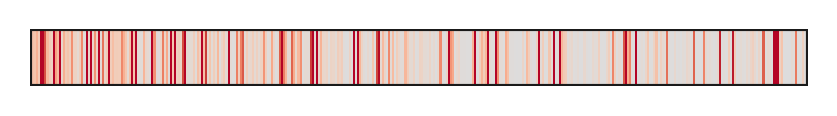

In [287]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

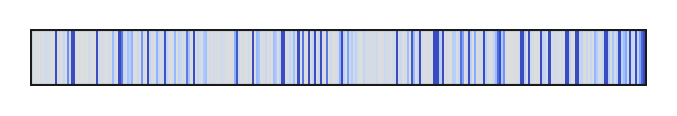

In [288]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

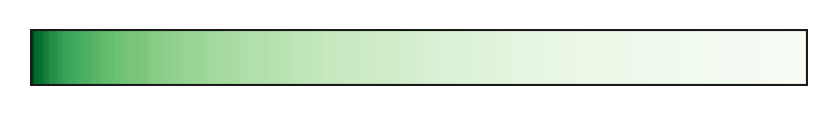

In [289]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=2,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

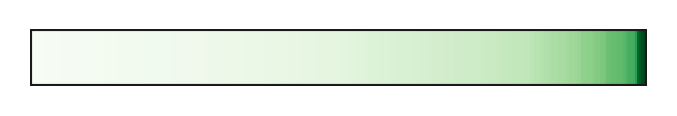

In [290]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=2,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

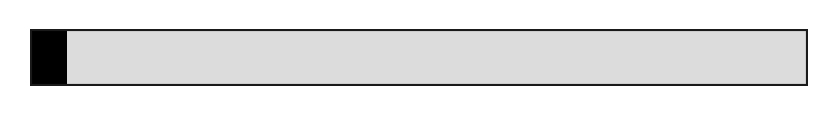

In [291]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

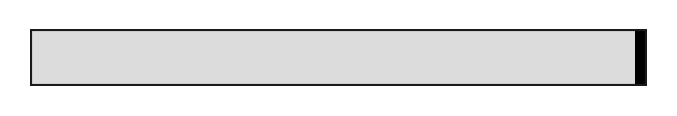

In [292]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [293]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

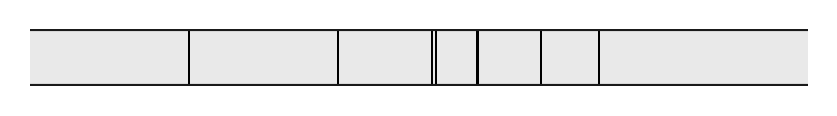

In [294]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [295]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

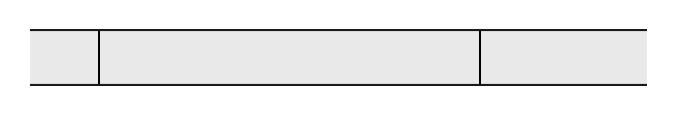

In [297]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [184]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

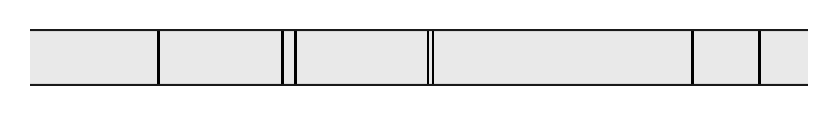

In [298]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [187]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

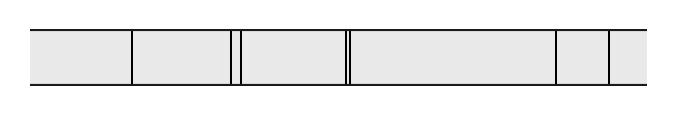

In [299]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [300]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Oxaliplatin_1089                       9.0  0.010165  0.023036   
PRISM_oxaliplatin_BRD-K78960041-001-05-7     6.0  0.052101  0.070142   
GDSC1_Cisplatin_1005                        13.0  0.007052  0.016001   
CTRP2_oxaliplatin_375582                    11.0  0.002000  0.365505   
GDSC2_Oxaliplatin_1806                       8.0  0.003053  0.015113   
GDSC2_Cisplatin_1005                        10.0  0.009957  0.011970   
CTRP2_carboplatin_26979                     11.0  0.047000 -0.192754   
gCSI_Cisplatin_CID24191118                   9.0 -0.025444 -0.010959   
PRISM_cisplatin_BRD-K69172251-001-08-9       6.0 -0.021881 -0.108718   

                                           pvalues   mlog10p  significant  \
GDSC2_Oxaliplatin_1089                    0.158084  0.801111            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.318137  0.497386            0   
GDSC1_Cisplatin_1005                      0.452705  0.344185            0   
CTRP2_oxaliplatin_375582                  0.457829  0.339296            0   
GDSC2_Oxaliplatin_1806                    0.499709  0.301282            0   
GDSC2_Cisplatin_1005                      0.606429  0.217220            0   
CTRP2_carboplatin_26979                   0.695130  0.157934            0   
gCSI_Cisplatin_CID24191118                0.891904  0.049682            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.347861  0.458594            0   

                                         drug_anno       cid       FDR  
GDSC2_Oxaliplatin_1089                    Platinum   5310940  0.749564  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464  0.749564  
GDSC1_Cisplatin_1005                      Platinum     84691  0.749564  
CTRP2_oxaliplatin_375582                  Platinum  24197464  0.749564  
GDSC2_Oxaliplatin_1806                    Platinum   5310940  0.749564  
GDSC2_Cisplatin_1005                      Platinum     84691  0.779694  
CTRP2_carboplatin_26979                   Platinum     38904  0.782021  
gCSI_Cisplatin_CID24191118                Platinum  24191118  0.891904  
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118  0.749564

In [301]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
PRISM_niraparib_BRD-K54955827-001-02-2       7.0  0.000882 -0.006946   
CTRP2_veliparib_606034                      11.0  0.100500  0.004351   
CTRP2_olaparib_411867                       11.0  0.116000 -0.143277   
GDSC1_Veliparib_1018                        13.0  0.000513  0.002802   
GDSC2_Niraparib_1177                         8.0  0.001367  0.007262   
GDSC1_Rucaparib_1175                        13.0  0.005778  0.003404   
PRISM_olaparib_BRD-K02113016-001-19-6        6.0  0.033195 -0.016343   
PRISM_talazoparib_BRD-K95142244-001-01-5     7.0 -0.142761 -0.019207   
GDSC2_Talazoparib_1259                       9.0 -0.006032  0.014635   
GDSC1_Olaparib_1017                         13.0 -0.004335  0.004226   
GDSC2_Olaparib_1017                         10.0 -0.001650 -0.004114   
PRISM_olaparib_BRD-K02113016-001-15-4        7.0 -0.041518 -0.076727   
GDSC1_Olaparib_1495                         13.0 -0.018807 -0.016076   
GDSC1_Talazoparib_1259                      13.0 -0.076877 -0.059348   

                                           pvalues   mlog10p  significant  \
PRISM_niraparib_BRD-K54955827-001-02-2    0.574478  0.240727            0   
CTRP2_veliparib_606034                    0.649024  0.187739            0   
CTRP2_olaparib_411867                     0.740745  0.130331            0   
GDSC1_Veliparib_1018                      0.751204  0.124242            0   
GDSC2_Niraparib_1177                      0.765283  0.116178            0   
GDSC1_Rucaparib_1175                      0.795340  0.099447            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.938846  0.027406            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.852933  0.069085            0   
GDSC2_Talazoparib_1259                    0.710365  0.148518            0   
GDSC1_Olaparib_1017                       0.688798  0.161908            0   
GDSC2_Olaparib_1017                       0.543686  0.264652            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.531496  0.274500            0   
GDSC1_Olaparib_1495                       0.205757  0.686646            0   
GDSC1_Talazoparib_1259                    0.090144  1.045062            0   

                                               drug_anno        cid       FDR  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  0.918543  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  0.918543  
CTRP2_olaparib_411867                     PARP inhibitor   23725625  0.918543  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  0.918543  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  0.918543  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  0.918543  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  0.938846  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  0.918543  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  0.918543  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  0.918543  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  0.918543  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625  0.918543  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  0.918543  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  0.918543

### HRR alteration

In [445]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH']).sum()

25

In [446]:
df_drug[~df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])].shape

(83, 1023)

In [447]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df[df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
    b=df[df['BRCA_status'].isin(['wt'])][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [448]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps

In [449]:
df_cor=df_cor.dropna()

In [450]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [451]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541            10.0  0.333000 -1.054470  0.756209  0.121358   
CTRP2_ABT-737_411738            15.0 -0.073000 -0.372566  0.756680  0.121088   
CTRP2_AT13387_688229             9.0 -0.954950 -0.474833  0.585269  0.232645   
CTRP2_AZD1480_660306             8.0 -0.172500  0.457795  0.908591  0.041631   
CTRP2_AZD4547_660325            16.0 -0.329500  0.032033  0.477430  0.321090   
...                              ...       ...       ...       ...       ...   
gCSI_Palbociclib_CID5330286      8.0 -0.031778 -0.029563  0.338829  0.470019   
gCSI_TGX221_CID9907093           8.0  0.044444  0.028153  0.512684  0.290150   
gCSI_Tanespimycin_CID6505803    12.0 -0.012389  0.004864  0.774182  0.111157   
gCSI_Tivantinib_CID11494412     11.0 -0.041944  0.001013  0.876229  0.057382   
gCSI_Vorinostat_CID5311         11.0 -0.088889 -0.069183  0.098250  1.007669   

                              significant                          drug_anno  \
CTRP2_ABT-199_666541                    0               Apoptosis regulation   
CTRP2_ABT-737_411738                    0               Apoptosis regulation   
CTRP2_AT13387_688229                    0                             Others   
CTRP2_AZD1480_660306                    0                             Others   
CTRP2_AZD4547_660325                    0                      RTK signaling   
...                                   ...                                ...   
gCSI_Palbociclib_CID5330286             0                         Cell cycle   
gCSI_TGX221_CID9907093                  0                PI3K/MTOR signaling   
gCSI_Tanespimycin_CID6505803            0  Protein stability and degradation   
gCSI_Tivantinib_CID11494412             0                             Others   
gCSI_Vorinostat_CID5311                 0                  Chromatin-related   

                                   cid  
CTRP2_ABT-199_666541          49846579  
CTRP2_ABT-737_411738          11228183  
CTRP2_AT13387_688229          11955716  
CTRP2_AZD1480_660306          16659841  
CTRP2_AZD4547_660325          51039095  
...                                ...  
gCSI_Palbociclib_CID5330286    5330286  
gCSI_TGX221_CID9907093         9907093  
gCSI_Tanespimycin_CID6505803   6505803  
gCSI_Tivantinib_CID11494412   11494412  
gCSI_Vorinostat_CID5311           5311  

[731 rows x 8 columns]

In [309]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif  \
GDSC2_Buparlisib_1873                       17.0  0.050812  0.056758   
GDSC1_TW 37_1149                            20.0  0.153210  0.108045   
GDSC1_Vorinostat_1012                       20.0  0.088250  0.096527   
GDSC1_CCT-018159_1170                       20.0  0.043502  0.034026   
PRISM_abemaciclib_BRD-K33622447-066-01-9    11.0  0.060837  0.091808   
...                                          ...       ...       ...   
PRISM_anagrelide_BRD-K62200014-003-10-5     10.0 -0.044036 -0.065025   
gCSI_Dabrafenib_CID44462760                 11.0 -0.033778 -0.107826   
CTRP2_cyanoquinoline 11_417415               8.0 -0.573000 -0.653835   
CTRP2_birinapant_660778                     16.0 -1.464500 -1.702507   
GDSC2_AZD5582_1617                          13.0 -0.199399 -0.174781   

                                           pvalues   mlog10p  significant  \
GDSC2_Buparlisib_1873                     0.002875  2.541320            1   
GDSC1_TW 37_1149                          0.003116  2.506339            1   
GDSC1_Vorinostat_1012                     0.004635  2.333971            1   
GDSC1_CCT-018159_1170                     0.006062  2.217366            1   
PRISM_abemaciclib_BRD-K33622447-066-01-9  0.007618  2.118175            1   
...                                            ...       ...          ...   
PRISM_anagrelide_BRD-K62200014-003-10-5   0.019693  1.705686            1   
gCSI_Dabrafenib_CID44462760               0.012348  1.908413            1   
CTRP2_cyanoquinoline 11_417415            0.005778  2.238204            1   
CTRP2_birinapant_660778                   0.001571  2.803799            1   
GDSC2_AZD5582_1617                        0.001047  2.980135            1   

                                                                  drug_anno  \
GDSC2_Buparlisib_1873                                   PI3K/MTOR signaling   
GDSC1_TW 37_1149                                       Apoptosis regulation   
GDSC1_Vorinostat_1012                                     Chromatin-related   
GDSC1_CCT-018159_1170                     Protein stability and degradation   
PRISM_abemaciclib_BRD-K33622447-066-01-9                         Cell cycle   
...                                                                     ...   
PRISM_anagrelide_BRD-K62200014-003-10-5                              Others   
gCSI_Dabrafenib_CID44462760                              ERK MAPK signaling   
CTRP2_cyanoquinoline 11_417415                                       Others   
CTRP2_birinapant_660778                                              Others   
GDSC2_AZD5582_1617                                     Apoptosis regulation   

                                                cid  
GDSC2_Buparlisib_1873                      16654980  
GDSC1_TW 37_1149                           11455910  
GDSC1_Vorinostat_1012                          5311  
GDSC1_CCT-018159_1170                       5327091  
PRISM_abemaciclib_BRD-K33622447-066-01-9   46220502  
...                                             ...  
PRISM_anagrelide_BRD-K62200014-003-10-5   135409400  
gCSI_Dabrafenib_CID44462760                44462760  
CTRP2_cyanoquinoline 11_417415                   -1  
CTRP2_birinapant_660778                    49836020  
GDSC2_AZD5582_1617                         49847690  

[731 rows x 8 columns]

In [200]:
NP=len(df_cor_p)
NN=len(df_cor_n)

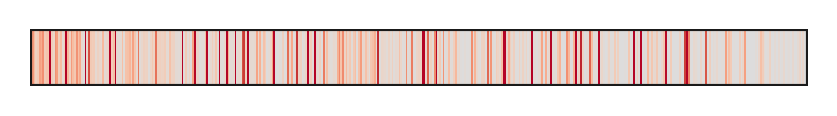

In [310]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

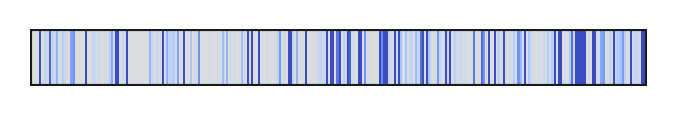

In [311]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

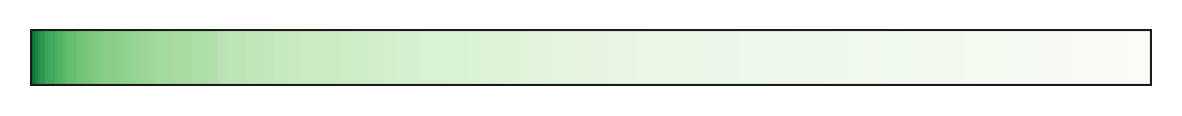

In [203]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

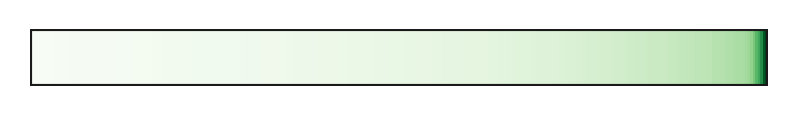

In [204]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

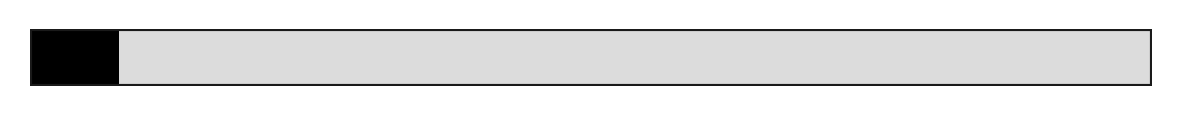

In [205]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

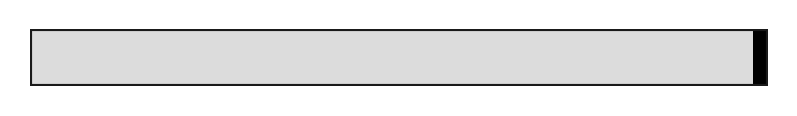

In [206]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [207]:
counter=Counter(df_cor_pn['drug_anno']).most_common()

In [208]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'Antimetabolite',
 'ERK MAPK signaling',
 'Cell cycle',
 'DNA inhibitor',
 'EGFR signaling',
 'Antimicrotubule',
 'Apoptosis regulation',
 'Protein stability and degradation',
 'Hormone-related',
 'DNA alkylator',
 'Topoisomerase inhibitor',
 'PARP inhibitor',
 'WNT signaling',
 'Genome integrity',
 'Platinum',
 'Metabolism',
 'Cytoskeleton',
 'p53 pathway',
 'IGF1R signaling',
 'JNK and p38 signaling']

In [209]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [210]:
anno_platinum=[]
for index in df_cor_pn.index:
    if 'isplatin' in index:
        anno_platinum.append(1)
    elif 'arboplatin' in index:
        anno_platinum.append(3)
    elif 'xaliplatin' in index:
        anno_platinum.append(2)
    else:
        anno_platinum.append(0)
df_cor_pn['platinum_color']=anno_platinum

In [211]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

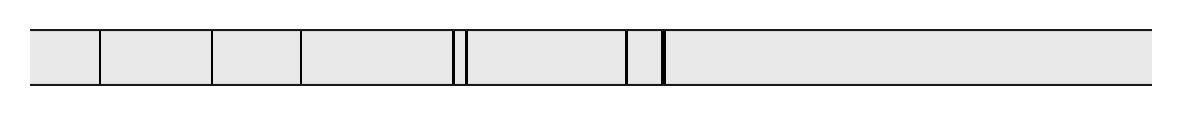

In [212]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [213]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

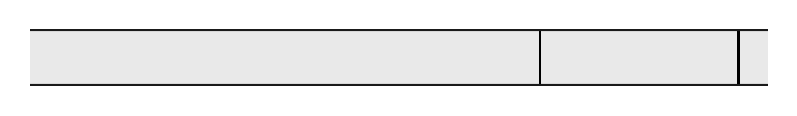

In [214]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [215]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

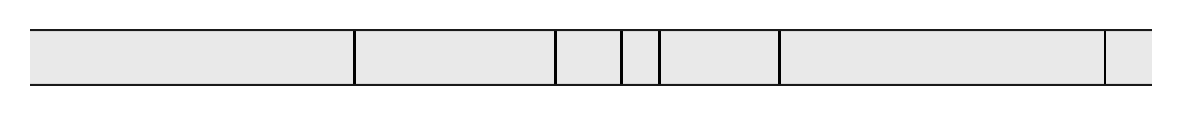

In [216]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [217]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

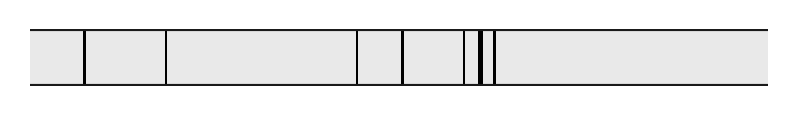

In [218]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [220]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
PRISM_oxaliplatin_BRD-K78960041-001-05-7    10.0  0.082144  0.132910   
PRISM_carboplatin_BRD-K90947825-001-02-7     9.0  0.203643  0.180027   
GDSC2_Oxaliplatin_1089                      17.0  0.010165  0.019404   
CTRP2_oxaliplatin_375582                    16.0  0.191000  0.374090   
GDSC1_Cisplatin_1005                        20.0  0.013929  0.015475   
gCSI_Cisplatin_CID24191118                  12.0  0.158889  0.064501   
GDSC2_Oxaliplatin_1806                      13.0  0.004583  0.008705   
GDSC2_Cisplatin_1005                        18.0  0.007706  0.010610   
PRISM_cisplatin_BRD-K69172251-001-08-9      10.0 -0.021881 -0.064648   
CTRP2_carboplatin_26979                     17.0 -0.179000 -0.427786   

                                           pvalues   mlog10p  significant  \
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.041479  1.382167            1   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.107249  0.969607            0   
GDSC2_Oxaliplatin_1089                    0.186487  0.729351            0   
CTRP2_oxaliplatin_375582                  0.313295  0.504047            0   
GDSC1_Cisplatin_1005                      0.321850  0.492346            0   
gCSI_Cisplatin_CID24191118                0.460136  0.337113            0   
GDSC2_Oxaliplatin_1806                    0.496994  0.303649            0   
GDSC2_Cisplatin_1005                      0.497160  0.303504            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.346971  0.459706            0   
CTRP2_carboplatin_26979                   0.091295  1.039552            0   

                                         drug_anno       cid  platinum_color  \
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464               2   
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756               3   
GDSC2_Oxaliplatin_1089                    Platinum   5310940               2   
CTRP2_oxaliplatin_375582                  Platinum  24197464               2   
GDSC1_Cisplatin_1005                      Platinum     84691               1   
gCSI_Cisplatin_CID24191118                Platinum  24191118               1   
GDSC2_Oxaliplatin_1806                    Platinum   5310940               2   
GDSC2_Cisplatin_1005                      Platinum     84691               1   
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118               1   
CTRP2_carboplatin_26979                   Platinum     38904               3   

                                               FDR  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.357496  
PRISM_carboplatin_BRD-K90947825-001-02-7  0.357496  
GDSC2_Oxaliplatin_1089                    0.466218  
CTRP2_oxaliplatin_375582                  0.495673  
GDSC1_Cisplatin_1005                      0.495673  
gCSI_Cisplatin_CID24191118                0.497160  
GDSC2_Oxaliplatin_1806                    0.497160  
GDSC2_Cisplatin_1005                      0.497160  
PRISM_cisplatin_BRD-K69172251-001-08-9    0.495673  
CTRP2_carboplatin_26979                   0.357496

In [221]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Talazoparib_1259                      17.0  0.021160  0.023576   
GDSC1_Rucaparib_1175                        20.0  0.006450  0.006751   
CTRP2_olaparib_411867                       16.0  0.061500 -0.194652   
GDSC2_Niraparib_1177                        13.0  0.004267  0.009930   
PRISM_olaparib_BRD-K02113016-001-19-6       10.0  0.026362 -0.031064   
PRISM_talazoparib_BRD-K95142244-001-01-5    11.0  0.015037  0.010431   
GDSC1_Veliparib_1018                        20.0 -0.000031  0.004012   
GDSC1_Olaparib_1017                         20.0 -0.002336  0.005082   
GDSC1_Olaparib_1495                         20.0 -0.010069 -0.007203   
GDSC2_Olaparib_1017                         18.0 -0.004052 -0.002076   
CTRP2_veliparib_606034                      16.0 -0.015500 -0.076268   
PRISM_olaparib_BRD-K02113016-001-15-4       11.0 -0.104524 -0.078835   
PRISM_niraparib_BRD-K54955827-001-02-2      10.0 -0.007060 -0.008838   
GDSC1_Talazoparib_1259                      19.0 -0.042265 -0.024027   

                                           pvalues   mlog10p  significant  \
GDSC2_Talazoparib_1259                    0.224362  0.649051            0   
GDSC1_Rucaparib_1175                      0.393617  0.404927            0   
CTRP2_olaparib_411867                     0.456745  0.340326            0   
GDSC2_Niraparib_1177                      0.494310  0.306001            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.601834  0.220523            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.950374  0.022106            0   
GDSC1_Veliparib_1018                      0.903346  0.044146            0   
GDSC1_Olaparib_1017                       0.803157  0.095200            0   
GDSC1_Olaparib_1495                       0.554169  0.256358            0   
GDSC2_Olaparib_1017                       0.503178  0.298278            0   
CTRP2_veliparib_606034                    0.420983  0.375735            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.415583  0.381342            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.413613  0.383406            0   
GDSC1_Talazoparib_1259                    0.404438  0.393148            0   

                                               drug_anno        cid  \
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241   
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953   
CTRP2_olaparib_411867                     PARP inhibitor   23725625   
GDSC2_Niraparib_1177                      PARP inhibitor   24958200   
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625   
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082   
GDSC1_Veliparib_1018                      PARP inhibitor   11960529   
GDSC1_Olaparib_1017                       PARP inhibitor   23725625   
GDSC1_Olaparib_1495                       PARP inhibitor   23725625   
GDSC2_Olaparib_1017                       PARP inhibitor   23725625   
CTRP2_veliparib_606034                    PARP inhibitor   11960529   
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625   
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200   
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241   

                                          platinum_color       FDR  
GDSC2_Talazoparib_1259                                 0  0.765971  
GDSC1_Rucaparib_1175                                   0  0.765971  
CTRP2_olaparib_411867                                  0  0.765971  
GDSC2_Niraparib_1177                                   0  0.765971  
PRISM_olaparib_BRD-K02113016-001-19-6                  0  0.765971  
PRISM_talazoparib_BRD-K95142244-001-01-5               0  0.950374  
GDSC1_Veliparib_1018                                   0  0.950374  
GDSC1_Olaparib_1017                                    0  0.937016  
GDSC1_Olaparib_1495                                    0  0.765971  
GDSC2_Olaparib_1017                              

## Correlations with HRD score and Signature 3

In [452]:
df=df_sel.copy()

(99, 2)
r = 0.634, p = 1.90e-12


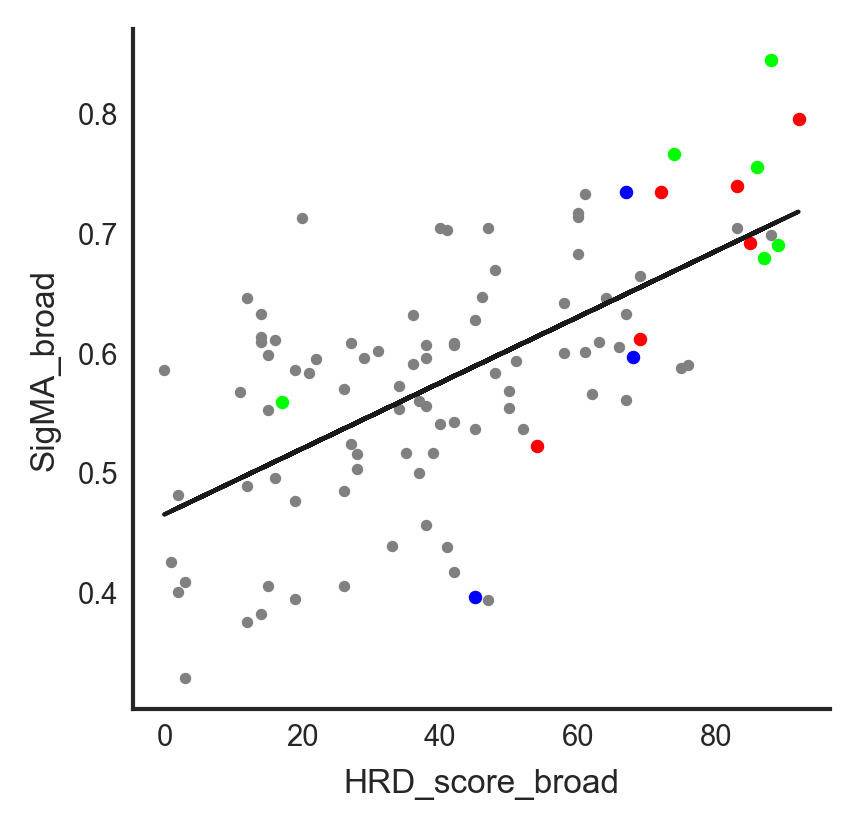

In [453]:
in_df=df.copy()
#plt_df=plt_df[plt_df[cat]=='']
val1,val2,val3='HRD_score_broad','SigMA_broad','BRCA_status'
plt_df=in_df[[val1,val2]].dropna()
print(plt_df.shape)
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
ax.set_xlabel(val1)
ax.set_ylabel(val2)
# linear regression, Pearson correlation
lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
ax.plot(x,a*x+b,lw=1,c='k')

plt_df2=in_df[[val1,val2,val3]].dropna()
plt_df3=plt_df2[plt_df2[val3]=='BRCA1_methylation']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='lime')

plt_df3=plt_df2[plt_df2[val3]=='BRCA1_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='red')

plt_df3=plt_df2[plt_df2[val3]=='BRCA2_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='blue')

ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)

print('r = {:.3f}, p = {:.2e}'.format(r,p))

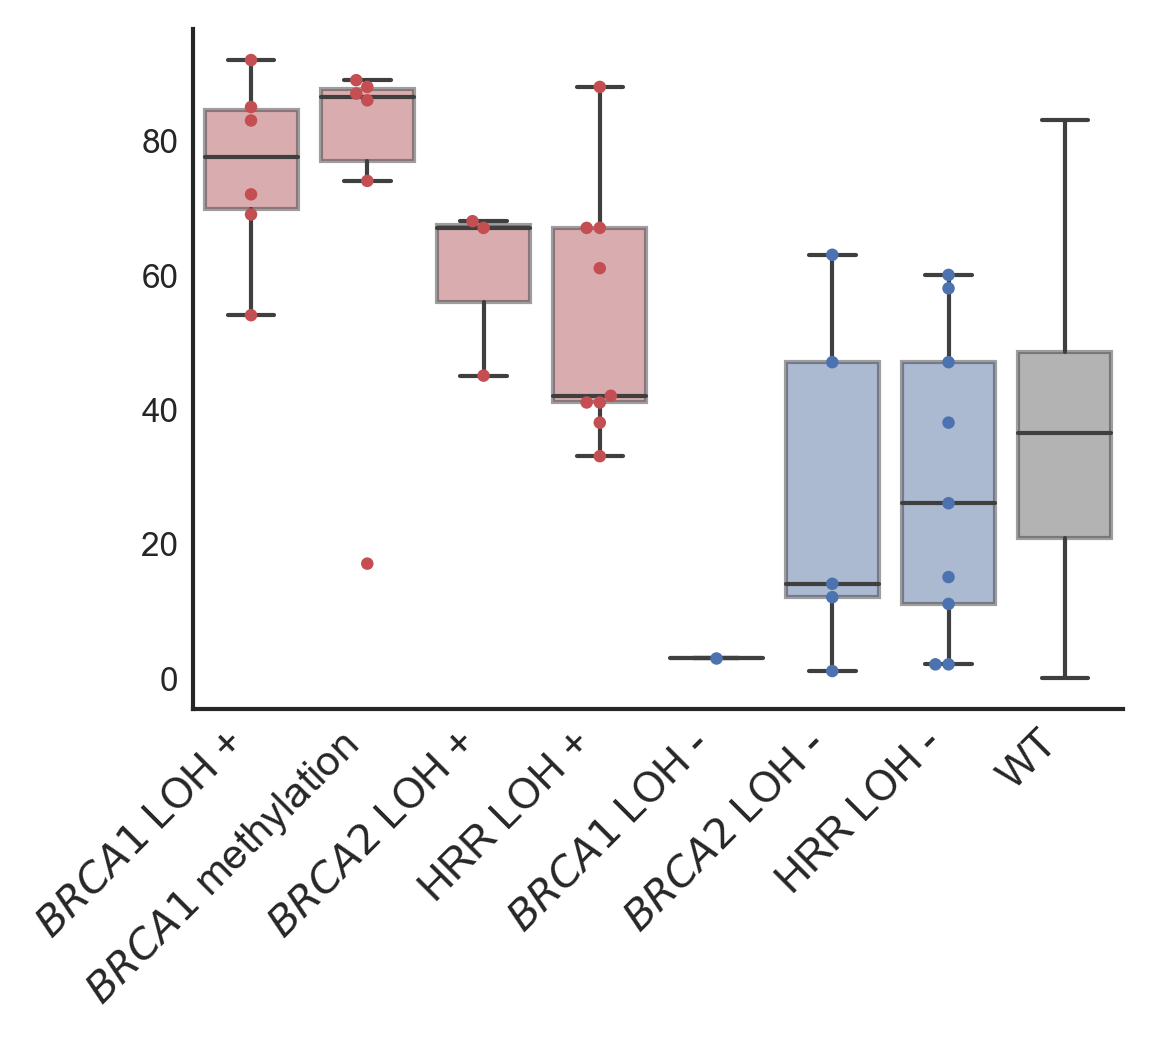

In [454]:
plt_df=df
cat='BRCA_status'
val='HRD_score_broad'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

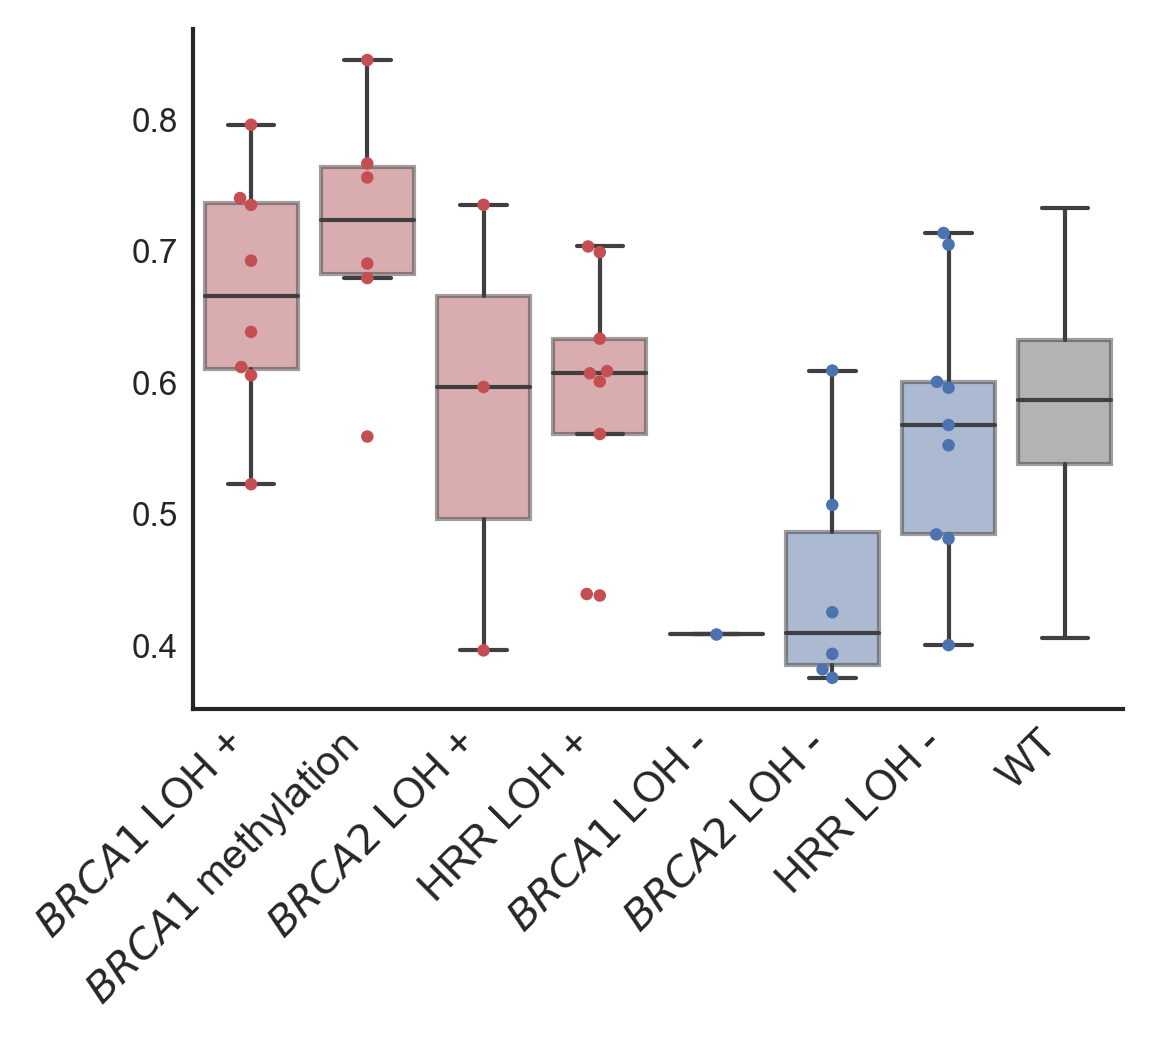

In [225]:
plt_df=df
cat='BRCA_status'
val='SigMA_broad'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

## Genomic scar and Drug sensitivity

In [455]:
df=df_sel.copy()

In [456]:
len(drug_all)

870

### HRD score

In [468]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df[['HRD_score_broad',drug]].dropna()
    a=plt_df['HRD_score_broad'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 10:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [469]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [470]:
df_cor=df_cor.dropna()

In [471]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [472]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(767, 8)

In [473]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS  \
PRISM_temsirolimus_BRD-K42898655-001-01-8    51.0  3.588127e-08  0.681959   
PRISM_abemaciclib_BRD-K33622447-066-01-9     51.0  2.597013e-06  0.604783   
PRISM_palbociclib_BRD-K51313569-001-07-8     46.0  3.090147e-06  0.627248   
GDSC1_Temsirolimus_1016                      71.0  1.321755e-05  0.491887   
GDSC2_Palbociclib_1054                       69.0  3.896096e-05  0.473946   
...                                           ...           ...       ...   
GDSC1_TGX221_94                              13.0  4.220666e-02 -0.569464   
CTRP2_cimetidine_26870                       22.0  3.988074e-02 -0.441112   
GDSC1_Navitoclax_1011                        71.0  2.238452e-02 -0.270757   
GDSC1_Cyclopamine_17                         12.0  1.845272e-02 -0.664336   
PRISM_cytarabine_BRD-K71847383-001-12-5      43.0  7.312846e-03 -0.403384   

                                            mlog10p       FDR  significant  \
PRISM_temsirolimus_BRD-K42898655-001-01-8  7.445132  0.000030            1   
PRISM_abemaciclib_BRD-K33622447-066-01-9   5.585526  0.000869            1   
PRISM_palbociclib_BRD-K51313569-001-07-8   5.510021  0.000869            1   
GDSC1_Temsirolimus_1016                    4.878849  0.002789            1   
GDSC2_Palbociclib_1054                     4.409370  0.006577            1   
...                                             ...       ...          ...   
GDSC1_TGX221_94                            1.374619  0.280492            1   
CTRP2_cimetidine_26870                     1.399237  0.271446            1   
GDSC1_Navitoclax_1011                      1.650052  0.211690            1   
GDSC1_Cyclopamine_17                       1.733940  0.202261            1   
PRISM_cytarabine_BRD-K71847383-001-12-5    2.135914  0.122455            1   

                                                      drug_anno       cid  
PRISM_temsirolimus_BRD-K42898655-001-01-8   PI3K/MTOR signaling   6918289  
PRISM_abemaciclib_BRD-K33622447-066-01-9             Cell cycle  46220502  
PRISM_palbociclib_BRD-K51313569-001-07-8             Cell cycle   5330286  
GDSC1_Temsirolimus_1016                     PI3K/MTOR signaling   6918289  
GDSC2_Palbociclib_1054                               Cell cycle   5330286  
...                                                         ...       ...  
GDSC1_TGX221_94                             PI3K/MTOR signaling   9907093  
CTRP2_cimetidine_26870                                   Others      2756  
GDSC1_Navitoclax_1011                      Apoptosis regulation  24978538  
GDSC1_Cyclopamine_17                                     Others    442972  
PRISM_cytarabine_BRD-K71847383-001-12-5          Antimetabolite   5351180  

[767 rows x 8 columns]

In [474]:
NP=len(df_cor_p)
NN=len(df_cor_n)

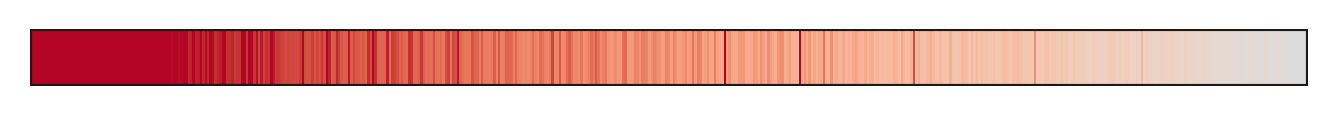

In [235]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

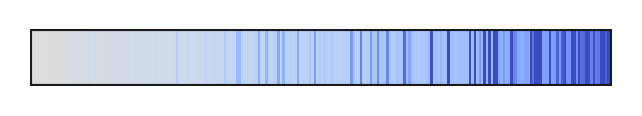

In [236]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

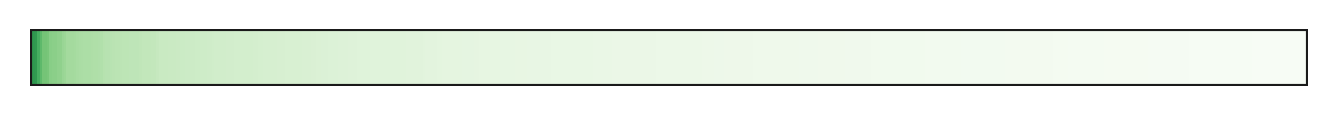

In [237]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

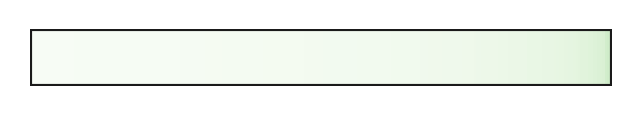

In [238]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

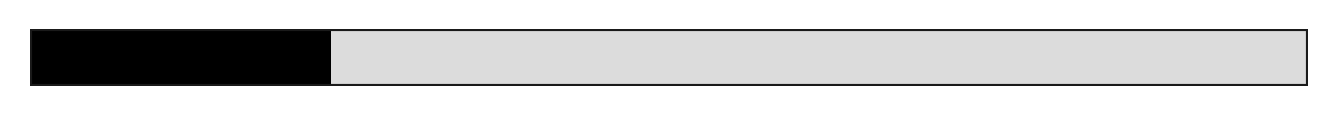

In [239]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

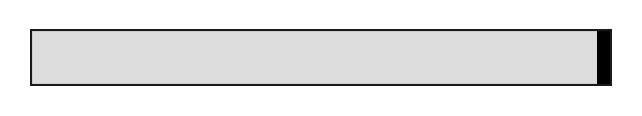

In [240]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [241]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

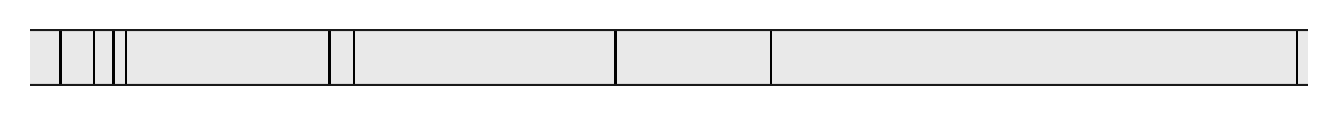

In [242]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

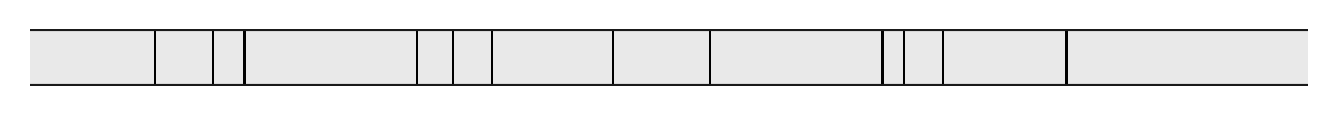

In [243]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [244]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

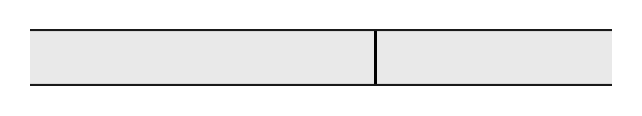

In [245]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

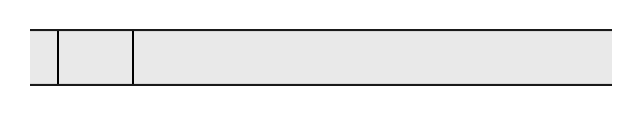

In [246]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [247]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Oxaliplatin_1089                      67.0  0.000419  0.418854   
GDSC2_Cisplatin_1005                        68.0  0.002283  0.363919   
CTRP2_oxaliplatin_375582                    71.0  0.004257  0.335310   
GDSC1_Cisplatin_1005                        71.0  0.005416  0.326756   
PRISM_oxaliplatin_BRD-K78960041-001-05-7    49.0  0.049683  0.281945   
GDSC2_Oxaliplatin_1806                      57.0  0.058763  0.251860   
gCSI_Cisplatin_CID24191118                  58.0  0.201390  0.170236   
PRISM_carboplatin_BRD-K90947825-001-02-7    48.0  0.326072  0.144816   
CTRP2_carboplatin_26979                     72.0  0.996255  0.000563   
PRISM_cisplatin_BRD-K69172251-001-08-9      47.0  0.498919 -0.101102   

                                           mlog10p       FDR  significant  \
GDSC2_Oxaliplatin_1089                    3.377486  0.004193            1   
GDSC2_Cisplatin_1005                      2.641421  0.011417            1   
CTRP2_oxaliplatin_375582                  2.370910  0.013539            1   
GDSC1_Cisplatin_1005                      2.266346  0.013539            1   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  1.303792  0.097938            1   
GDSC2_Oxaliplatin_1806                    1.230900  0.097938            0   
gCSI_Cisplatin_CID24191118                0.695963  0.287699            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.486686  0.407591            0   
CTRP2_carboplatin_26979                   0.001629  0.996255            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.301970  0.554355            0   

                                         drug_anno       cid  
GDSC2_Oxaliplatin_1089                    Platinum   5310940  
GDSC2_Cisplatin_1005                      Platinum     84691  
CTRP2_oxaliplatin_375582                  Platinum  24197464  
GDSC1_Cisplatin_1005                      Platinum     84691  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464  
GDSC2_Oxaliplatin_1806                    Platinum   5310940  
gCSI_Cisplatin_CID24191118                Platinum  24191118  
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756  
CTRP2_carboplatin_26979                   Platinum     38904  
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118

In [248]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Niraparib_1177                        57.0  0.007916  0.348370   
GDSC2_Talazoparib_1259                      63.0  0.019768  0.293034   
PRISM_talazoparib_BRD-K95142244-001-01-5    51.0  0.024192  0.315348   
GDSC1_Olaparib_1017                         71.0  0.073520  0.213717   
PRISM_olaparib_BRD-K02113016-001-19-6       46.0  0.095593  0.248694   
GDSC2_Olaparib_1017                         67.0  0.120454  0.191557   
CTRP2_olaparib_411867                       74.0  0.195534  0.152181   
GDSC1_Veliparib_1018                        71.0  0.263300  0.134540   
GDSC1_Talazoparib_1259                      69.0  0.433229  0.095878   
PRISM_niraparib_BRD-K54955827-001-02-2      49.0  0.461107  0.107764   
GDSC1_Rucaparib_1175                        70.0  0.502216  0.081535   
PRISM_olaparib_BRD-K02113016-001-15-4       46.0  0.641734  0.070455   
GDSC1_Olaparib_1495                         70.0  0.981072 -0.002888   
CTRP2_veliparib_606034                      73.0  0.855500 -0.021686   

                                           mlog10p       FDR  significant  \
GDSC2_Niraparib_1177                      2.101478  0.110828            1   
GDSC2_Talazoparib_1259                    1.704040  0.112898            1   
PRISM_talazoparib_BRD-K95142244-001-01-5  1.616320  0.112898            1   
GDSC1_Olaparib_1017                       1.133594  0.257321            0   
PRISM_olaparib_BRD-K02113016-001-19-6     1.019575  0.267660            0   
GDSC2_Olaparib_1017                       0.919180  0.281059            0   
CTRP2_olaparib_411867                     0.708777  0.391069            0   
GDSC1_Veliparib_1018                      0.579549  0.460776            0   
GDSC1_Talazoparib_1259                    0.363282  0.639184            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.336198  0.639184            0   
GDSC1_Rucaparib_1175                      0.299110  0.639184            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.192645  0.748690            0   
GDSC1_Olaparib_1495                       0.008299  0.981072            0   
CTRP2_veliparib_606034                    0.067780  0.921308            0   

                                               drug_anno        cid  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
CTRP2_olaparib_411867                     PARP inhibitor   23725625  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  
CTRP2_veliparib_606034                    PARP inhibitor   11960529

### Signature 3 broad

In [475]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df[['SigMA_broad',drug]].dropna()
    a=plt_df['SigMA_broad'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 50:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [476]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [477]:
df_cor=df_cor.dropna()

In [478]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [479]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(531, 8)

In [480]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS  \
PRISM_temsirolimus_BRD-K42898655-001-01-8    51.0  6.775541e-07  0.631386   
CTRP2_vorinostat_56554                       73.0  6.975187e-04  0.387872   
CTRP2_LBH-589_54210                          75.0  8.993108e-04  0.375562   
GDSC2_Uprosertib_1553                        72.0  1.450035e-03  0.368448   
CTRP2_GDC-0941_639759                        76.0  1.951961e-03  0.349802   
...                                           ...           ...       ...   
GDSC1_XAV939_1268                            82.0  6.418729e-02 -0.205363   
gCSI_Tanespimycin_CID6505803                 61.0  5.927917e-02 -0.242887   
gCSI_Vorinostat_CID5311                      56.0  4.752945e-02 -0.266004   
CTRP2_AZD7762_660777                         73.0  3.181448e-02 -0.251543   
GDSC2_WIKI4_1940                             73.0  2.355341e-02 -0.264840   

                                            mlog10p       FDR  significant  \
PRISM_temsirolimus_BRD-K42898655-001-01-8  6.169056  0.000360            1   
CTRP2_vorinostat_56554                     3.156444  0.159178            1   
CTRP2_LBH-589_54210                        3.046090  0.159178            1   
GDSC2_Uprosertib_1553                      2.838621  0.192492            1   
CTRP2_GDC-0941_639759                      2.709529  0.207298            1   
...                                             ...       ...          ...   
GDSC1_XAV939_1268                          1.192551  0.619219            0   
gCSI_Tanespimycin_CID6505803               1.227098  0.619219            0   
gCSI_Vorinostat_CID5311                    1.323037  0.573594            1   
CTRP2_AZD7762_660777                       1.497375  0.488689            1   
GDSC2_WIKI4_1940                           1.627946  0.461322            1   

                                                                   drug_anno  \
PRISM_temsirolimus_BRD-K42898655-001-01-8                PI3K/MTOR signaling   
CTRP2_vorinostat_56554                                     Chromatin-related   
CTRP2_LBH-589_54210                                        Chromatin-related   
GDSC2_Uprosertib_1553                                    PI3K/MTOR signaling   
CTRP2_GDC-0941_639759                                    PI3K/MTOR signaling   
...                                                                      ...   
GDSC1_XAV939_1268                                              WNT signaling   
gCSI_Tanespimycin_CID6505803               Protein stability and degradation   
gCSI_Vorinostat_CID5311                                    Chromatin-related   
CTRP2_AZD7762_660777                                              Cell cycle   
GDSC2_WIKI4_1940                                               WNT signaling   

                                                cid  
PRISM_temsirolimus_BRD-K42898655-001-01-8   6918289  
CTRP2_vorinostat_56554                         5311  
CTRP2_LBH-589_54210                         6918837  
GDSC2_Uprosertib_1553                      51042438  
CTRP2_GDC-0941_639759                      17755052  
...                                             ...  
GDSC1_XAV939_1268                           2726824  
gCSI_Tanespimycin_CID6505803                6505803  
gCSI_Vorinostat_CID5311                        5311  
CTRP2_AZD7762_660777                       11152667  
GDSC2_WIKI4_1940                            2984337  

[531 rows x 8 columns]

# NP=len(df_cor_p)
NN=len(df_cor_n)

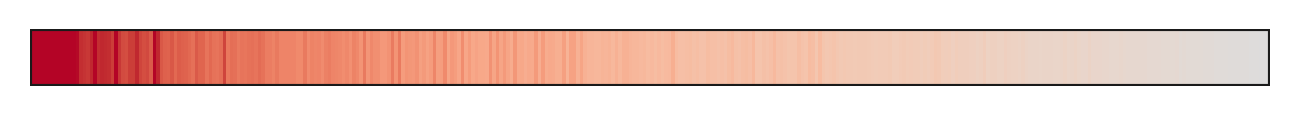

In [256]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

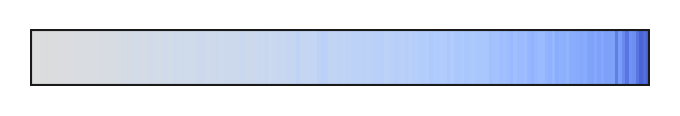

In [257]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

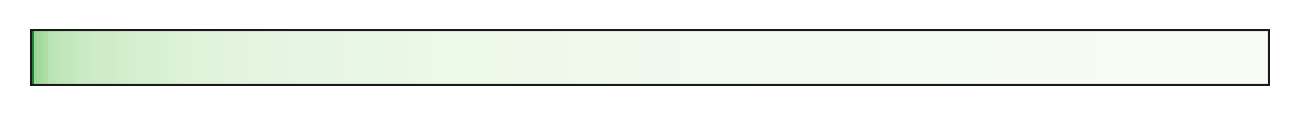

In [258]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

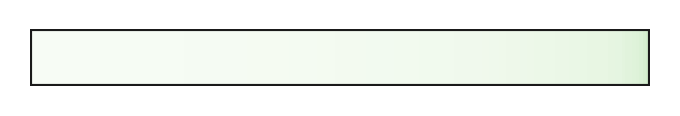

In [259]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

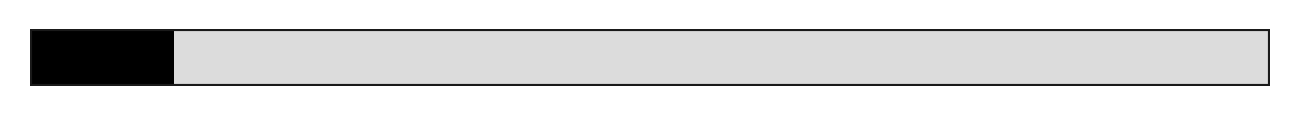

In [260]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

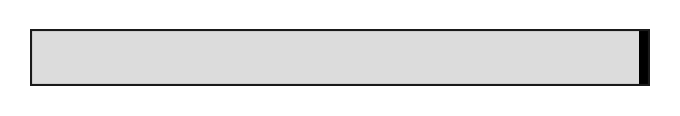

In [261]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [262]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

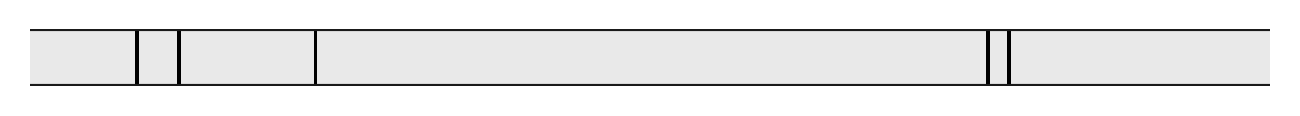

In [263]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

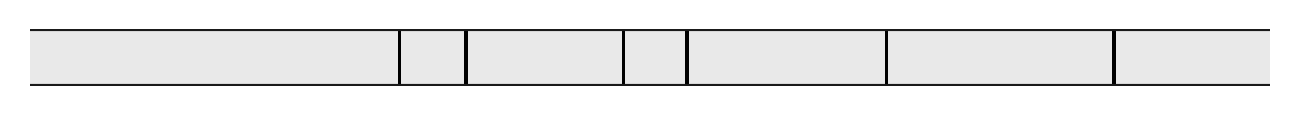

In [264]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [266]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

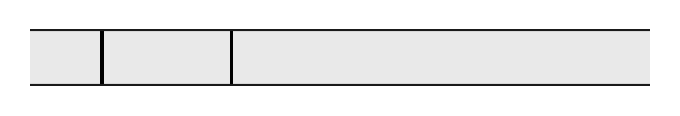

In [268]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

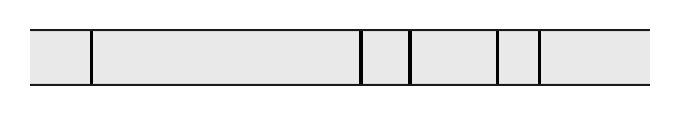

In [269]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [270]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS   mlog10p       FDR  \
gCSI_Cisplatin_CID24191118    62.0  0.027836  0.279444  1.555390  0.188613   
CTRP2_oxaliplatin_375582      72.0  0.053889  0.228171  1.268498  0.188613   
GDSC2_Oxaliplatin_1089        77.0  0.124181  0.176718  0.905944  0.289756   
GDSC1_Cisplatin_1005          84.0  0.703646  0.042118  0.152646  0.887179   
GDSC2_Oxaliplatin_1806        66.0  0.723594  0.044359  0.140505  0.887179   
GDSC2_Cisplatin_1005          78.0  0.927942 -0.010407  0.032479  0.927942   
CTRP2_carboplatin_26979       73.0  0.760439 -0.036301  0.118935  0.887179   

                            significant drug_anno       cid  
gCSI_Cisplatin_CID24191118            1  Platinum  24191118  
CTRP2_oxaliplatin_375582              0  Platinum  24197464  
GDSC2_Oxaliplatin_1089                0  Platinum   5310940  
GDSC1_Cisplatin_1005                  0  Platinum     84691  
GDSC2_Oxaliplatin_1806                0  Platinum   5310940  
GDSC2_Cisplatin_1005                  0  Platinum     84691  
CTRP2_carboplatin_26979               0  Platinum     38904

In [271]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_45912/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
PRISM_talazoparib_BRD-K95142244-001-01-5    51.0  0.179022  0.191164   
GDSC1_Veliparib_1018                        84.0  0.241886  0.129088   
GDSC2_Niraparib_1177                        65.0  0.378274  0.111101   
CTRP2_olaparib_411867                       75.0  0.450553  0.088436   
GDSC2_Talazoparib_1259                      72.0  0.613376  0.060551   
GDSC1_Olaparib_1017                         84.0  0.822780  0.024805   
GDSC1_Rucaparib_1175                        82.0  0.939894 -0.008457   
GDSC2_Olaparib_1017                         77.0  0.567320 -0.066197   
GDSC1_Talazoparib_1259                      81.0  0.506407 -0.074887   
CTRP2_veliparib_606034                      74.0  0.346916 -0.110891   
GDSC1_Olaparib_1495                         82.0  0.249995 -0.128481   

                                           mlog10p       FDR  significant  \
PRISM_talazoparib_BRD-K95142244-001-01-5  0.747093  0.749682            0   
GDSC1_Veliparib_1018                      0.616389  0.749682            0   
GDSC2_Niraparib_1177                      0.422193  0.749682            0   
CTRP2_olaparib_411867                     0.346254  0.749682            0   
GDSC2_Talazoparib_1259                    0.212273  0.749682            0   
GDSC1_Olaparib_1017                       0.084716  0.905058            0   
GDSC1_Rucaparib_1175                      0.026921  0.939894            0   
GDSC2_Olaparib_1017                       0.246172  0.749682            0   
GDSC1_Talazoparib_1259                    0.295500  0.749682            0   
CTRP2_veliparib_606034                    0.459776  0.749682            0   
GDSC1_Olaparib_1495                       0.602069  0.749682            0   

                                               drug_anno        cid  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
CTRP2_olaparib_411867                     PARP inhibitor   23725625  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625

# Exclude Breast and Ovarysel_cancer

In [170]:
df_sel=df0[~df0['primary_disease'].isin(['Ovarian Cancer','Breast Cancer'])]
df_sel

cell_line_name stripped_cell_line_name  \
DepMap_ID                                           
ACH-000016         SLR 21                   SLR21   
ACH-000032     MHH-CALL-3                MHHCALL3   
ACH-000049         HEK TE                   HEKTE   
ACH-000051       TE 617.T                  TE617T   
ACH-000071            NaN                  HS706T   
...                   ...                     ...   
ACH-002337         JHU028                  JHU028   
ACH-002382      HCC1395BL               HCC1395BL   
ACH-002388          MET2B                   MET2B   
ACH-002389            ACN                     ACN   
ACH-002396       Sarc9371                SARC9371   

                                              CCLE_Name alias  COSMICID  \
DepMap_ID                                                                 
ACH-000016                                 SLR21_KIDNEY   NaN        -1   
ACH-000032  MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE   NaN        -1   
ACH-000049                                 HEKTE_KIDNEY   NaN        -1   
ACH-000051                           TE617T_SOFT_TISSUE   NaN        -1   
ACH-000071                                  HS706T_BONE   NaN        -1   
...                                                 ...   ...       ...   
ACH-002337                                  JHU028_LUNG   NaN        -1   
ACH-002382                HCC1395_MATCHED_NORMAL_TISSUE   NaN        -1   
ACH-002388                                   MET2B_SKIN   NaN        -1   
ACH-002389                        ACN_AUTONOMIC_GANGLIA   NaN        -1   
ACH-002396                                SARC9371_BONE   NaN        -1   

               sex        source       RRID  WTSI_Master_Cell_ID  \
DepMap_ID                                                          
ACH-000016     NaN  Academic lab  CVCL_V607                  NaN   
ACH-000032  Female          DSMZ  CVCL_0089                  NaN   
ACH-000049     NaN  Academic lab  CVCL_WS59                  NaN   
ACH-000051  Female          ATCC  CVCL_1755                  NaN   
ACH-000071  Female          ATCC  CVCL_0863                  NaN   
...            ...           ...        ...                  ...   
ACH-002337    Male        Sanger  CVCL_5992                  NaN   
ACH-002382  Female        Sanger  CVCL_1250                  NaN   
ACH-002388     NaN        Sanger  CVCL_VS57                  NaN   
ACH-002389    Male        Sanger  CVCL_1068                  NaN   
ACH-002396     NaN        Sanger  CVCL_5G89                  NaN   

           sample_collection_site primary_or_metastasis primary_disease  \
DepMap_ID                                                                 
ACH-000016                 kidney            Metastasis   Kidney Cancer   
ACH-000032            bone_marrow                   NaN        Leukemia   
ACH-000049                 kidney                   NaN   Non-Cancerous   
ACH-000051            soft_tissue               Primary         Sarcoma   
ACH-000071             fibroblast                   NaN   Non-Cancerous   
...                           ...                   ...             ...   
ACH-002337                   lung               Primary     Lung Cancer   
ACH-002382  matched_normal_tissue                   NaN   Non-Cancerous   
ACH-002388                   skin                   NaN     Skin Cancer   
ACH-002389            bone_marrow            Metastasis   Neuroblastoma   
ACH-002396                   bone                   NaN     Bone Cancer   

                                                      Subtype  age  \
DepMap_ID                                                            
ACH-000016                               Renal Cell Carcinoma  NaN   
ACH-000032         Acute Lymphoblastic Leukemia (ALL), B-cell   11   
ACH-000049                                                NaN  NaN   
ACH-000051                                   Rhabdomyosarcoma    1   
ACH-000071                                               Bone   

In [171]:
Counter(df_sel['BRCA_alteration'])

Counter({0: 1154, 1: 10})

In [172]:
df_drug=df_sel[~df_sel[drug_all_set].isna().all(axis=1)]

In [173]:
df_drug.shape

(1074, 1023)

## BRCA status vs Drug sensitivity

### BRCA12 altaration

In [174]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH']).sum()

9

In [175]:
df_drug[~df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])].shape

(1065, 1023)

In [176]:
df_drug[df_drug['BRCA_status'].isin(['wt'])].shape

(804, 1023)

In [177]:
df=df_drug.copy()

In [178]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df[df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_unknown','BRCA1_unknown'])][drug].dropna().values   
    b=df[df['BRCA_status'].isin(['wt']#,'HRR_nonLOH','HRR_LOH','BRCA2_nonLOH','HRR_unknown','BRCA1_nonLOH']
                                )][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [179]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps


In [180]:
df_cor=df_cor.dropna()

In [181]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [182]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-737_411738          7.0 -0.313000  0.160910  0.650862  0.186511   
CTRP2_AZD6482_639390          6.0  0.235500  0.495468  0.389091  0.409949   
CTRP2_AZD7762_660777          6.0  0.225000  0.418093  0.606276  0.217329   
CTRP2_AZD8055_609639          7.0 -0.177700 -0.670381  0.526693  0.278443   
CTRP2_BI-2536_347813          7.0  1.083900  1.618772  0.123369  0.908793   
...                           ...       ...       ...       ...       ...   
GDSC2_WZ4003_1614             7.0  0.021821 -0.004798  0.876489  0.057253   
GDSC2_Wee1 Inhibitor_1046     7.0  0.072345  0.033663  0.232610  0.633371   
GDSC2_Wnt-C59_1622            7.0 -0.011011 -0.012765  0.082540  1.083338   
GDSC2_XAV939_1268             7.0 -0.008377 -0.010012  0.446774  0.349912   
GDSC2_YK-4-279_1239           7.0  0.082177  0.081388  0.093415  1.029581   

                           significant             drug_anno       cid  
CTRP2_ABT-737_411738                 0  Apoptosis regulation  11228183  
CTRP2_AZD6482_639390                 0   PI3K/MTOR signaling  44137675  
CTRP2_AZD7762_660777                 0            Cell cycle  11152667  
CTRP2_AZD8055_609639                 0   PI3K/MTOR signaling  25262965  
CTRP2_BI-2536_347813                 0            Cell cycle  11364421  
...                                ...                   ...       ...  
GDSC2_WZ4003_1614                    0                Others  72200024  
GDSC2_Wee1 Inhibitor_1046            0            Cell cycle  10384072  
GDSC2_Wnt-C59_1622                   0         WNT signaling  57519544  
GDSC2_XAV939_1268                    0         WNT signaling   2726824  
GDSC2_YK-4-279_1239                  0                Others  44632017  

[436 rows x 8 columns]

In [183]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_tretinoin_23151       7.0  0.610000  1.261284  0.012988  1.886453   
GDSC2_Luminespib_1559       7.0  0.164635  0.139689  0.015190  1.818439   
GDSC2_BMS-536924_1091       7.0  0.045439  0.078180  0.020705  1.683927   
GDSC2_Foretinib_2040        7.0  0.091855  0.098577  0.021300  1.671629   
CTRP2_barasertib_601923     7.0  1.120500  2.260483  0.026999  1.568648   
...                         ...       ...       ...       ...       ...   
GDSC1_BAY-61-3606_178       7.0 -0.067963 -0.071756  0.056384  1.248842   
GDSC2_Erlotinib_1168        7.0 -0.040412 -0.026143  0.055303  1.257253   
GDSC2_Venetoclax_1909       7.0 -0.013747  0.015303  0.039354  1.405009   
GDSC1_Gemcitabine_135       7.0 -0.296983 -0.241793  0.034524  1.461883   
GDSC1_CCT007093_1067        7.0 -0.016273 -0.014761  0.023628  1.626576   

                         significant                          drug_anno  \
CTRP2_tretinoin_23151              1                             Others   
GDSC2_Luminespib_1559              1  Protein stability and degradation   
GDSC2_BMS-536924_1091              1                    IGF1R signaling   
GDSC2_Foretinib_2040               1                      RTK signaling   
CTRP2_barasertib_601923            1                             Others   
...                              ...                                ...   
GDSC1_BAY-61-3606_178              0                             Others   
GDSC2_Erlotinib_1168               0                     EGFR signaling   
GDSC2_Venetoclax_1909              1               Apoptosis regulation   
GDSC1_Gemcitabine_135              1                     Antimetabolite   
GDSC1_CCT007093_1067               1                         Cell cycle   

                              cid  
CTRP2_tretinoin_23151      444795  
GDSC2_Luminespib_1559    10096043  
GDSC2_BMS-536924_1091    10390396  
GDSC2_Foretinib_2040     42642645  
CTRP2_barasertib_601923  11497983  
...                           ...  
GDSC1_BAY-61-3606_178    10200390  
GDSC2_Erlotinib_1168       176870  
GDSC2_Venetoclax_1909    49846579  
GDSC1_Gemcitabine_135       60750  
GDSC1_CCT007093_1067      2314623  

[436 rows x 8 columns]

In [184]:
NP=len(df_cor_p)
NN=len(df_cor_n)

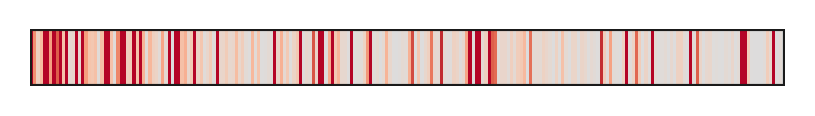

In [185]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

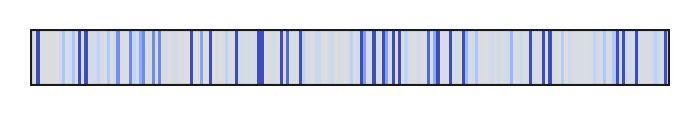

In [186]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

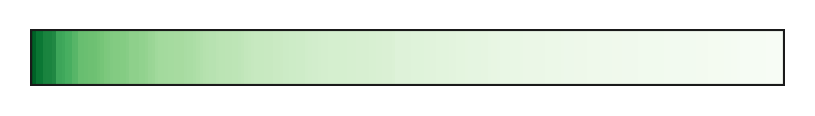

In [187]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=2,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

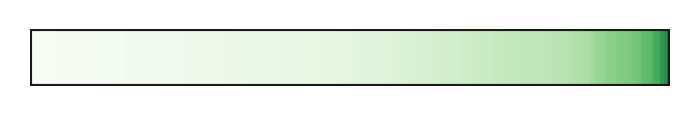

In [188]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=2,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

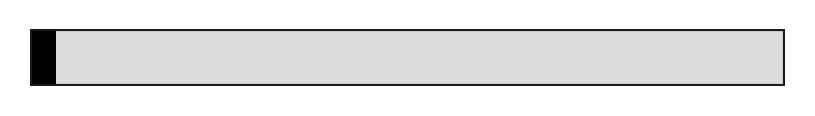

In [189]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

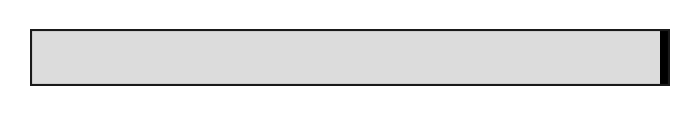

In [190]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [191]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

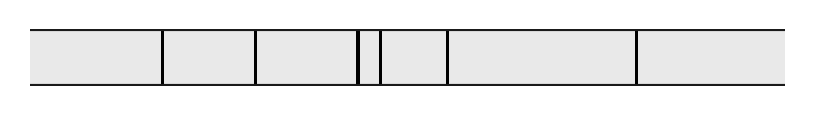

In [192]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [193]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

In [195]:
in_df

Antimetabolite  Antimicrotubule  Apoptosis regulation  \
GDSC1_NSC-87877_147                 0                0                     0   
GDSC1_SB590885_1061                 0                0                     0   
CTRP2_topotecan_44580               0                0                     0   
GDSC1_AS601245_207                  0                0                     0   
GDSC1_Bosutinib_1019                0                0                     0   
...                               ...              ...                   ...   
GDSC1_BAY-61-3606_178               0                0                     0   
GDSC2_Erlotinib_1168                0                0                     0   
GDSC2_Venetoclax_1909               0                0                     1   
GDSC1_Gemcitabine_135               1                0                     0   
GDSC1_CCT007093_1067                0                0                     0   

                       Cell cycle  Chromatin-related  Cytoskeleton  \
GDSC1_NSC-87877_147             0                  0             0   
GDSC1_SB590885_1061             0                  0             0   
CTRP2_topotecan_44580           0                  0             0   
GDSC1_AS601245_207              0                  0             0   
GDSC1_Bosutinib_1019            0                  0             0   
...                           ...                ...           ...   
GDSC1_BAY-61-3606_178           0                  0             0   
GDSC2_Erlotinib_1168            0                  0             0   
GDSC2_Venetoclax_1909           0                  0             0   
GDSC1_Gemcitabine_135           0                  0             0   
GDSC1_CCT007093_1067            1                  0             0   

                       DNA alkylator  DNA inhibitor  EGFR signaling  \
GDSC1_NSC-87877_147                0              0               0   
GDSC1_SB590885_1061                0              0               0   
CTRP2_topotecan_44580              0              0               0   
GDSC1_AS601245_207                 0              0               0   
GDSC1_Bosutinib_1019               0              0               0   
...                              ...            ...             ...   
GDSC1_BAY-61-3606_178              0              0               0   
GDSC2_Erlotinib_1168               0              0               1   
GDSC2_Venetoclax_1909              0              0               0   
GDSC1_Gemcitabine_135              0              0               0   
GDSC1_CCT007093_1067               0              0               0   

                       ERK MAPK signaling  Genome integrity  Hormone-related  \
GDSC1_NSC-87877_147                     0                 0                0   
GDSC1_SB590885_1061                     1                 0                0   
CTRP2_topotecan_44580                   0                 0                0   
GDSC1_AS601245_207                      0                 0                0   
GDSC1_Bosutinib_1019                    0                 0                0   
...                                   ...               ...              ...   
GDSC1_BAY-61-3606_178                   0                 0                0   
GDSC2_Erlotinib_1168                    0                 0                0   
GDSC2_Venetoclax_1909                   0                 0                0   
GDSC1_Gemcitabine_135                   0                 0                0   
GDSC1_CCT007093_1067                    0                 0                0   

                       IGF1R signaling  JNK and p38 signaling  Metabolism  \
GDSC1_NSC-87877_147                  0                      0           0   
GDSC1_SB590885_1061                  0                      0           0   
CTRP2_topotecan_44580                0                      0           0   
GDSC1_AS601245_207                   0                      1           0   
GDSC1_Bosutinib_1019  

In [194]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

KeyError: "None of [Index(['Platinum'], dtype='object')] are in the [columns]"

In [184]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

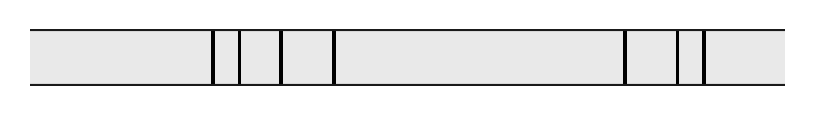

In [196]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [197]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

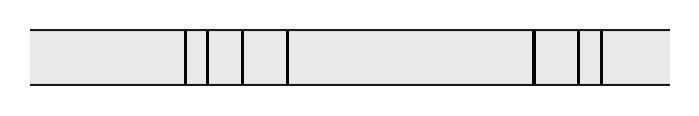

In [198]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [199]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_carboplatin_26979      7.0  0.129000  0.538721  0.184289  0.734500   
GDSC2_Oxaliplatin_1806       7.0  0.010071  0.028619  0.312668  0.504916   
GDSC2_Oxaliplatin_1089       7.0  0.008731  0.034720  0.422668  0.374000   
GDSC2_Cisplatin_1005         7.0  0.002123  0.031992  0.440617  0.355939   
GDSC1_Cisplatin_1005         7.0  0.008948  0.025789  0.532135  0.273978   
CTRP2_oxaliplatin_375582     7.0  0.217500  0.186500  0.804022  0.094732   

                          significant drug_anno       cid       FDR  
CTRP2_carboplatin_26979             0  Platinum     38904  0.638562  
GDSC2_Oxaliplatin_1806              0  Platinum   5310940  0.638562  
GDSC2_Oxaliplatin_1089              0  Platinum   5310940  0.638562  
GDSC2_Cisplatin_1005                0  Platinum     84691  0.638562  
GDSC1_Cisplatin_1005                0  Platinum     84691  0.638562  
CTRP2_oxaliplatin_375582            0  Platinum  24197464  0.804022

In [200]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif   pvalues   mlog10p  \
GDSC1_Talazoparib_1259     7.0  0.032067  0.097317  0.263955  0.578471   
CTRP2_olaparib_411867      7.0  0.413000  0.404793  0.328352  0.483661   
GDSC2_Niraparib_1177       7.0  0.005352  0.026676  0.364460  0.438350   
GDSC1_Olaparib_1495        6.0 -0.003661  0.012667  0.805837  0.093753   
GDSC1_Veliparib_1018       7.0 -0.002282 -0.004132  0.772242  0.112246   
GDSC2_Talazoparib_1259     7.0 -0.016922  0.051582  0.709197  0.149233   
CTRP2_veliparib_606034     7.0 -0.255000  0.236097  0.656352  0.182863   
GDSC2_Olaparib_1017        7.0 -0.019885 -0.007884  0.284261  0.546282   
GDSC1_Olaparib_1017        7.0 -0.016061 -0.013676  0.223425  0.650867   
GDSC1_Rucaparib_1175       7.0 -0.022455 -0.011375  0.158284  0.800563   

                        significant       drug_anno       cid       FDR  
GDSC1_Talazoparib_1259            0  PARP inhibitor  44819241  0.607433  
CTRP2_olaparib_411867             0  PARP inhibitor  23725625  0.607433  
GDSC2_Niraparib_1177              0  PARP inhibitor  24958200  0.607433  
GDSC1_Olaparib_1495               0  PARP inhibitor  23725625  0.805837  
GDSC1_Veliparib_1018              0  PARP inhibitor  11960529  0.805837  
GDSC2_Talazoparib_1259            0  PARP inhibitor  44819241  0.805837  
CTRP2_veliparib_606034            0  PARP inhibitor  11960529  0.805837  
GDSC2_Olaparib_1017               0  PARP inhibitor  23725625  0.607433  
GDSC1_Olaparib_1017               0  PARP inhibitor  23725625  0.607433  
GDSC1_Rucaparib_1175              0  PARP inhibitor   9931953  0.607433

### HRR alteration

In [201]:
df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH']).sum()

57

In [202]:
df_drug[~df_drug['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])].shape

(1017, 1023)

In [203]:
ns,rs,ps,ms,ms2=[],[],[],[],[]
n_limit=5
for drug in drug_all:
    a=df[df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
#    b=df[~df['BRCA_status'].isin(['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH'])][drug].dropna().values
    b=df[df['BRCA_status'].isin(['wt'])][drug].dropna().values
    n=len(a)
    if n> n_limit:
        r,p=stats.mannwhitneyu(a,b)
#        r,p=stats.brunnermunzel(a,b)
        m=np.median(a)-np.median(b)
        m2=np.mean(a)-np.mean(b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
        ms.append(m)
        ms2.append(m2)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)
        ms.append(np.nan)
        ms2.append(np.nan)

In [204]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['med_dif']=ms
df_cor['mean_dif']=ms2
df_cor['pvalues']=ps

In [205]:
df_cor=df_cor.dropna()

In [206]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [207]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor

Number   med_dif  mean_dif   pvalues   mlog10p  \
CTRP2_ABT-199_666541            29.0  0.485000  0.956031  0.074030  1.130590   
CTRP2_ABT-737_411738            39.0  0.608000  0.764165  0.077029  1.113344   
CTRP2_AT13387_688229            23.0  0.913800  0.825314  0.164434  0.784010   
CTRP2_AZD1480_660306            21.0  0.070000  0.240959  0.687972  0.162429   
CTRP2_AZD4547_660325            36.0  0.507500  0.573641  0.025700  1.590063   
...                              ...       ...       ...       ...       ...   
gCSI_Paclitaxel_CID36314        25.0  0.060889  0.027402  0.545357  0.263319   
gCSI_Palbociclib_CID5330286     12.0  0.000167 -0.001326  0.854030  0.068527   
gCSI_Tanespimycin_CID6505803    10.0 -0.031000 -0.025081  0.589570  0.229465   
gCSI_Tivantinib_CID11494412     25.0 -0.013111  0.002778  0.964833  0.015548   
gCSI_Vorinostat_CID5311         25.0  0.010833 -0.021875  0.526902  0.278270   

                              significant                          drug_anno  \
CTRP2_ABT-199_666541                    0               Apoptosis regulation   
CTRP2_ABT-737_411738                    0               Apoptosis regulation   
CTRP2_AT13387_688229                    0                             Others   
CTRP2_AZD1480_660306                    0                             Others   
CTRP2_AZD4547_660325                    1                      RTK signaling   
...                                   ...                                ...   
gCSI_Paclitaxel_CID36314                0                    Antimicrotubule   
gCSI_Palbociclib_CID5330286             0                         Cell cycle   
gCSI_Tanespimycin_CID6505803            0  Protein stability and degradation   
gCSI_Tivantinib_CID11494412             0                             Others   
gCSI_Vorinostat_CID5311                 0                  Chromatin-related   

                                   cid  
CTRP2_ABT-199_666541          49846579  
CTRP2_ABT-737_411738          11228183  
CTRP2_AT13387_688229          11955716  
CTRP2_AZD1480_660306          16659841  
CTRP2_AZD4547_660325          51039095  
...                                ...  
gCSI_Paclitaxel_CID36314         36314  
gCSI_Palbociclib_CID5330286    5330286  
gCSI_Tanespimycin_CID6505803   6505803  
gCSI_Tivantinib_CID11494412   11494412  
gCSI_Vorinostat_CID5311           5311  

[746 rows x 8 columns]

In [208]:
df_cor_p=df_cor[df_cor['med_dif']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['med_dif']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number   med_dif  mean_dif  \
GDSC1_PI-103_302                                    44.0  0.181443  0.119650   
PRISM_cyproterone-acetate_BRD-K41141507-001-16-2    19.0  0.036986  0.062306   
CTRP2_silmitasertib_660421                          38.0  1.073500  0.677641   
PRISM_everolimus_BRD-K13514097-001-04-6             27.0  0.034365  0.061674   
GDSC2_MG-132_1862                                   39.0  0.036809  0.037899   
...                                                  ...       ...       ...   
GDSC1_CGP-082996_54                                 17.0 -0.043397 -0.030609   
GDSC1_Crizotinib_37                                 17.0 -0.020944 -0.000952   
GDSC1_Doramapimod_1042                              44.0 -0.009352 -0.003304   
GDSC1_PHA-665752_6                                  17.0 -0.016578 -0.004138   
GDSC1_Sorafenib_30                                  17.0 -0.067669 -0.038498   

                                                   pvalues   mlog10p  \
GDSC1_PI-103_302                                  0.005727  2.242041   
PRISM_cyproterone-acetate_BRD-K41141507-001-16-2  0.007798  2.107997   
CTRP2_silmitasertib_660421                        0.008785  2.056283   
PRISM_everolimus_BRD-K13514097-001-04-6           0.014366  1.842669   
GDSC2_MG-132_1862                                 0.016597  1.779980   
...                                                    ...       ...   
GDSC1_CGP-082996_54                               0.033294  1.477640   
GDSC1_Crizotinib_37                               0.031545  1.501075   
GDSC1_Doramapimod_1042                            0.030742  1.512265   
GDSC1_PHA-665752_6                                0.003795  2.420777   
GDSC1_Sorafenib_30                                0.003105  2.507899   

                                                  significant  \
GDSC1_PI-103_302                                            1   
PRISM_cyproterone-acetate_BRD-K41141507-001-16-2            1   
CTRP2_silmitasertib_660421                                  1   
PRISM_everolimus_BRD-K13514097-001-04-6                     1   
GDSC2_MG-132_1862                                           1   
...                                                       ...   
GDSC1_CGP-082996_54                                         1   
GDSC1_Crizotinib_37                                         1   
GDSC1_Doramapimod_1042                                      1   
GDSC1_PHA-665752_6                                          1   
GDSC1_Sorafenib_30                                          1   

                                                                          drug_anno  \
GDSC1_PI-103_302                                                             Others   
PRISM_cyproterone-acetate_BRD-K41141507-001-16-2                    Hormone-related   
CTRP2_silmitasertib_660421                                                   Others   
PRISM_everolimus_BRD-K13514097-001-04-6                         PI3K/MTOR signaling   
GDSC2_MG-132_1862                                 Protein stability and degradation   
...                                                                             ...   
GDSC1_CGP-082996_54                                                      Cell cycle   
GDSC1_Crizotinib_37                                                   RTK signaling   
GDSC1_Doramapimod_1042                                        JNK and p38 signaling   
GDSC1_PHA-665752_6                                                    RTK signaling   
GDSC1_Sorafenib_30                                                    RTK signaling   

                                                       cid  
GDSC1_PI-103_302                                   9884685  
PRISM_cyproterone-acetate_BRD-K41141507-001-16-2      9880  
CTRP2_silmitasertib_660421                        24748573  
PRISM_everolimus_BRD-K13514097-001-04-6            6442177  
GDSC2_MG-132_1862                                   462382  
...                             

In [209]:
NP=len(df_cor_p)
NN=len(df_cor_n)

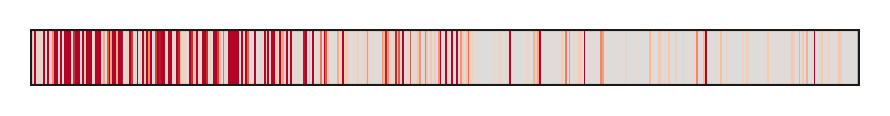

In [210]:
sns_df=df_cor_p[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

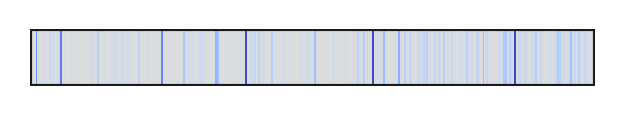

In [211]:
sns_df=df_cor_n[['med_dif']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(6*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,
           yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

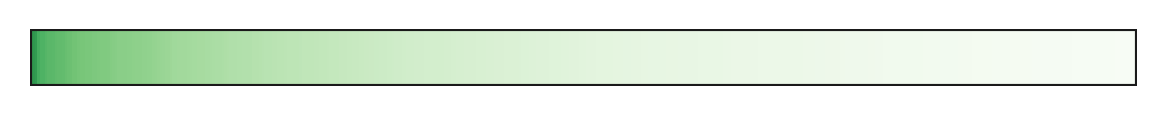

In [212]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

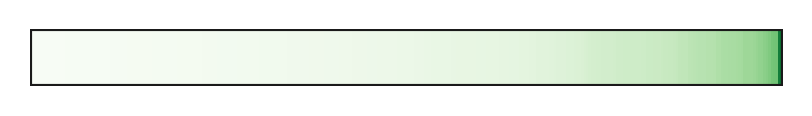

In [213]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=3,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

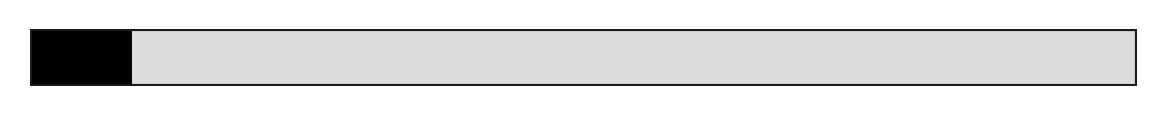

In [214]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

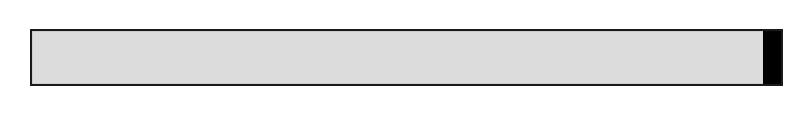

In [215]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [216]:
counter=Counter(df_cor_pn['drug_anno']).most_common()

In [217]:
a=[x[0] for x in counter]
a

['Others',
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'Antimetabolite',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule',
 'EGFR signaling',
 'DNA inhibitor',
 'Hormone-related',
 'Protein stability and degradation',
 'Apoptosis regulation',
 'DNA alkylator',
 'Topoisomerase inhibitor',
 'PARP inhibitor',
 'WNT signaling',
 'Metabolism',
 'Platinum',
 'Genome integrity',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [218]:
drug_order=[ 'Platinum',  'PARP inhibitor',  'Topoisomerase inhibitor',
 'DNA alkylator','DNA inhibitor', 'Antimetabolite', 
 'PI3K/MTOR signaling',
 'RTK signaling',
 'Chromatin-related',
 'ERK MAPK signaling',
 'Cell cycle',
 'Antimicrotubule', 
 'Protein stability and degradation',
 'Apoptosis regulation',
 'EGFR signaling',
 'WNT signaling',
 'Genome integrity',
 'Metabolism',
 'Hormone-related',
 'IGF1R signaling',
 'p53 pathway',
 'Cytoskeleton',
 'JNK and p38 signaling']

In [219]:
anno_platinum=[]
for index in df_cor_pn.index:
    if 'isplatin' in index:
        anno_platinum.append(1)
    elif 'arboplatin' in index:
        anno_platinum.append(3)
    elif 'xaliplatin' in index:
        anno_platinum.append(2)
    else:
        anno_platinum.append(0)
df_cor_pn['platinum_color']=anno_platinum

In [220]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

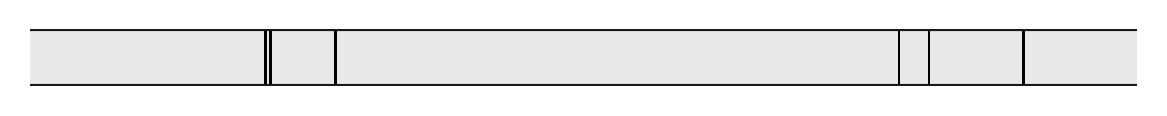

In [221]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [222]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

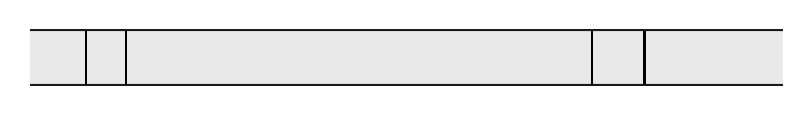

In [223]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [224]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

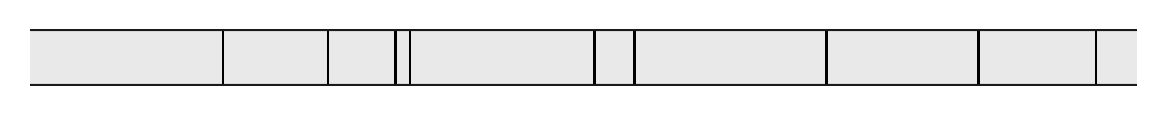

In [225]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [226]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

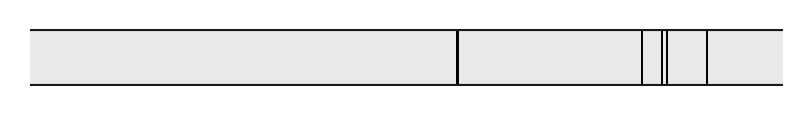

In [227]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [228]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
CTRP2_oxaliplatin_375582                    39.0  0.275500  0.364972   
CTRP2_carboplatin_26979                     42.0  0.033500  0.242935   
GDSC2_Cisplatin_1005                        39.0  0.008493  0.020592   
gCSI_Cisplatin_CID24191118                  10.0  0.002833 -0.062571   
PRISM_carboplatin_BRD-K90947825-001-02-7    29.0  0.098897  0.009432   
GDSC1_Cisplatin_1005                        44.0  0.001638  0.003118   
GDSC2_Oxaliplatin_1806                      40.0 -0.003792  0.009994   
GDSC2_Oxaliplatin_1089                      41.0 -0.000478  0.010028   
PRISM_oxaliplatin_BRD-K78960041-001-05-7    29.0 -0.045986 -0.044722   
PRISM_cisplatin_BRD-K69172251-001-08-9      30.0 -0.007853 -0.007883   

                                           pvalues   mlog10p  significant  \
CTRP2_oxaliplatin_375582                  0.125516  0.901300            0   
CTRP2_carboplatin_26979                   0.127459  0.894631            0   
GDSC2_Cisplatin_1005                      0.166698  0.778070            0   
gCSI_Cisplatin_CID24191118                0.739369  0.131139            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.775696  0.110309            0   
GDSC1_Cisplatin_1005                      0.893404  0.048952            0   
GDSC2_Oxaliplatin_1806                    0.950540  0.022030            0   
GDSC2_Oxaliplatin_1089                    0.900166  0.045677            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.259437  0.585968            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.212656  0.672321            0   

                                         drug_anno       cid  platinum_color  \
CTRP2_oxaliplatin_375582                  Platinum  24197464               2   
CTRP2_carboplatin_26979                   Platinum     38904               3   
GDSC2_Cisplatin_1005                      Platinum     84691               1   
gCSI_Cisplatin_CID24191118                Platinum  24191118               1   
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756               3   
GDSC1_Cisplatin_1005                      Platinum     84691               1   
GDSC2_Oxaliplatin_1806                    Platinum   5310940               2   
GDSC2_Oxaliplatin_1089                    Platinum   5310940               2   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464               2   
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118               1   

                                               FDR  
CTRP2_oxaliplatin_375582                  0.518875  
CTRP2_carboplatin_26979                   0.518875  
GDSC2_Cisplatin_1005                      0.518875  
gCSI_Cisplatin_CID24191118                0.950540  
PRISM_carboplatin_BRD-K90947825-001-02-7  0.950540  
GDSC1_Cisplatin_1005                      0.950540  
GDSC2_Oxaliplatin_1806                    0.950540  
GDSC2_Oxaliplatin_1089                    0.950540  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.518875  
PRISM_cisplatin_BRD-K69172251-001-08-9    0.518875

In [229]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   med_dif  mean_dif  \
GDSC2_Niraparib_1177                        40.0  0.007409  0.017110   
PRISM_niraparib_BRD-K54955827-001-02-2      30.0  0.048367  0.004844   
CTRP2_olaparib_411867                       43.0  0.290000  0.094787   
CTRP2_veliparib_606034                      43.0  0.010000  0.220479   
PRISM_olaparib_BRD-K02113016-001-19-6       28.0  0.021060  0.006410   
GDSC2_Olaparib_1017                         39.0  0.001570  0.006794   
GDSC2_Talazoparib_1259                      38.0  0.005025  0.033258   
GDSC1_Olaparib_1017                         44.0  0.000860  0.000894   
PRISM_talazoparib_BRD-K95142244-001-01-5    30.0  0.033985 -0.020394   
GDSC1_Veliparib_1018                        44.0 -0.001894 -0.000040   
GDSC1_Talazoparib_1259                      43.0 -0.010477 -0.044100   
PRISM_olaparib_BRD-K02113016-001-15-4       27.0 -0.096966 -0.050987   
GDSC1_Rucaparib_1175                        43.0 -0.007675 -0.007338   
GDSC1_Olaparib_1495                         40.0 -0.008605 -0.010469   

                                           pvalues   mlog10p  significant  \
GDSC2_Niraparib_1177                      0.096424  1.015816            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.161700  0.791290            0   
CTRP2_olaparib_411867                     0.221121  0.655371            0   
CTRP2_veliparib_606034                    0.236797  0.625624            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.397648  0.400501            0   
GDSC2_Olaparib_1017                       0.437432  0.359090            0   
GDSC2_Talazoparib_1259                    0.634668  0.197454            0   
GDSC1_Olaparib_1017                       0.839801  0.075824            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.949614  0.022453            0   
GDSC1_Veliparib_1018                      0.482398  0.316595            0   
GDSC1_Talazoparib_1259                    0.213281  0.671048            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.183045  0.737442            0   
GDSC1_Rucaparib_1175                      0.178722  0.747821            0   
GDSC1_Olaparib_1495                       0.117710  0.929185            0   

                                               drug_anno        cid  \
GDSC2_Niraparib_1177                      PARP inhibitor   24958200   
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200   
CTRP2_olaparib_411867                     PARP inhibitor   23725625   
CTRP2_veliparib_606034                    PARP inhibitor   11960529   
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625   
GDSC2_Olaparib_1017                       PARP inhibitor   23725625   
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241   
GDSC1_Olaparib_1017                       PARP inhibitor   23725625   
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082   
GDSC1_Veliparib_1018                      PARP inhibitor   11960529   
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241   
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625   
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953   
GDSC1_Olaparib_1495                       PARP inhibitor   23725625   

                                          platinum_color       FDR  
GDSC2_Niraparib_1177                                   0  0.414394  
PRISM_niraparib_BRD-K54955827-001-02-2                 0  0.414394  
CTRP2_olaparib_411867                                  0  0.414394  
CTRP2_veliparib_606034                                 0  0.414394  
PRISM_olaparib_BRD-K02113016-001-19-6                  0  0.612404  
GDSC2_Olaparib_1017                                    0  0.612404  
GDSC2_Talazoparib_1259                                 0  0.740445  
GDSC1_Olaparib_1017                                    0  0.904401  
PRISM_talazoparib_BRD-K95142244-001-01-5               0  0.949614  
GDSC1_Veliparib_1018                             

## Correlations with HRD score and Signature 3

In [230]:
df=df_sel.copy()

(815, 2)
r = 0.471, p = 2.73e-46


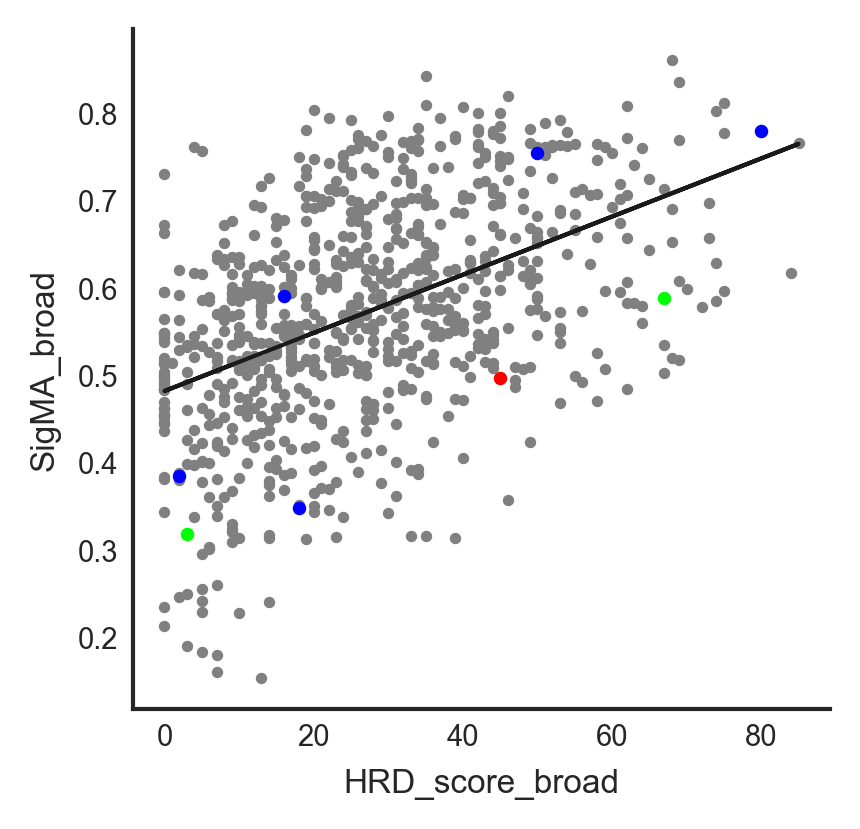

In [231]:
in_df=df.copy()
#plt_df=plt_df[plt_df[cat]=='']
val1,val2,val3='HRD_score_broad','SigMA_broad','BRCA_status'
plt_df=in_df[[val1,val2]].dropna()
print(plt_df.shape)
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
ax.set_xlabel(val1)
ax.set_ylabel(val2)
# linear regression, Pearson correlation
lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
ax.plot(x,a*x+b,lw=1,c='k')

plt_df2=in_df[[val1,val2,val3]].dropna()
plt_df3=plt_df2[plt_df2[val3]=='BRCA1_methylation']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='lime')

plt_df3=plt_df2[plt_df2[val3]=='BRCA1_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='red')

plt_df3=plt_df2[plt_df2[val3]=='BRCA2_LOH']
x1,y1=plt_df3[val1],plt_df3[val2]
ax.scatter(x1,y1,s=5,c='blue')

ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)

print('r = {:.3f}, p = {:.2e}'.format(r,p))

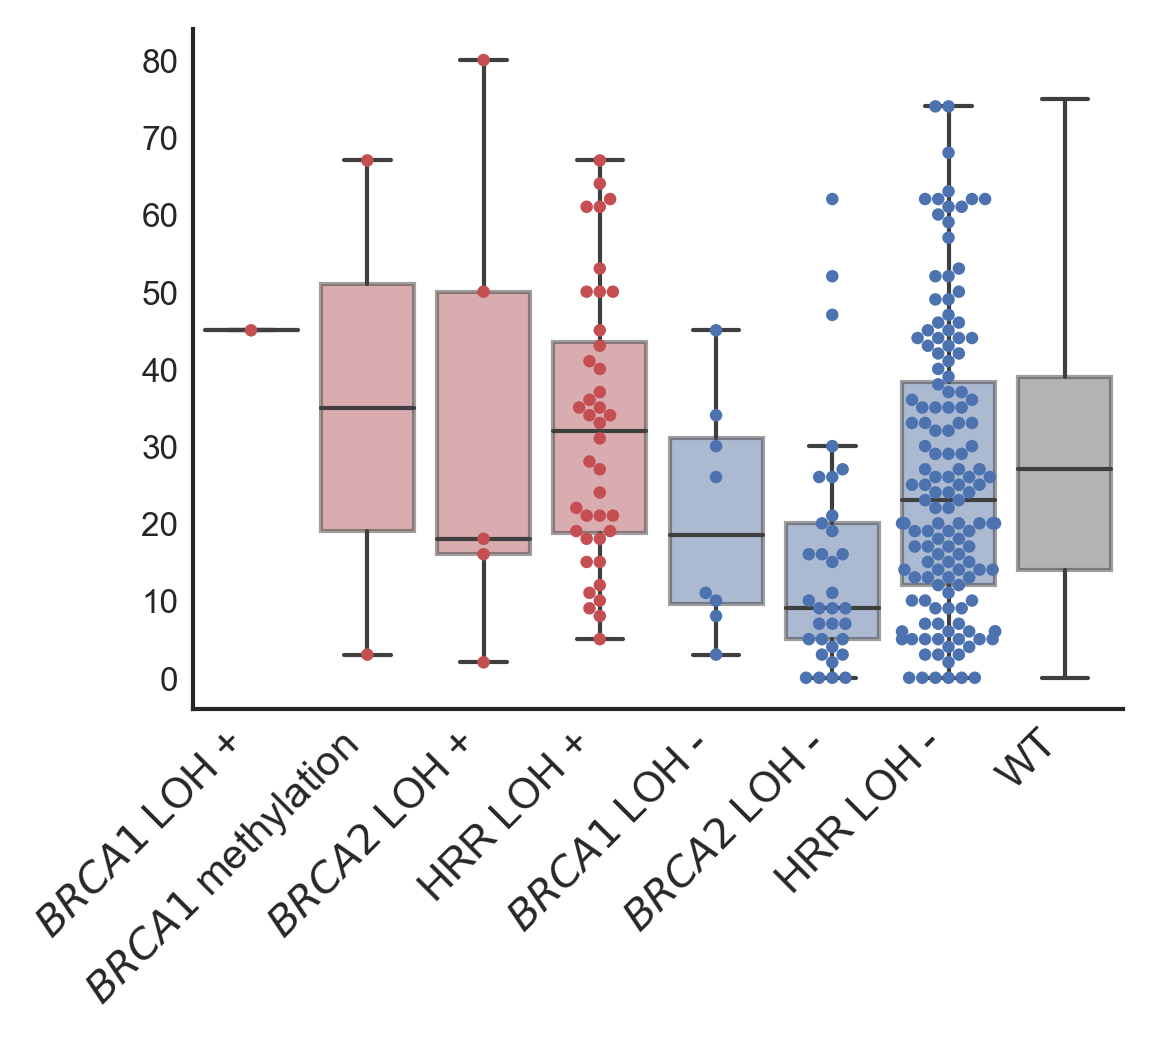

In [232]:
plt_df=df
cat='BRCA_status'
val='HRD_score_broad'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

/Users/tshiro/.pyenv/versions/miniforge3-4.10/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


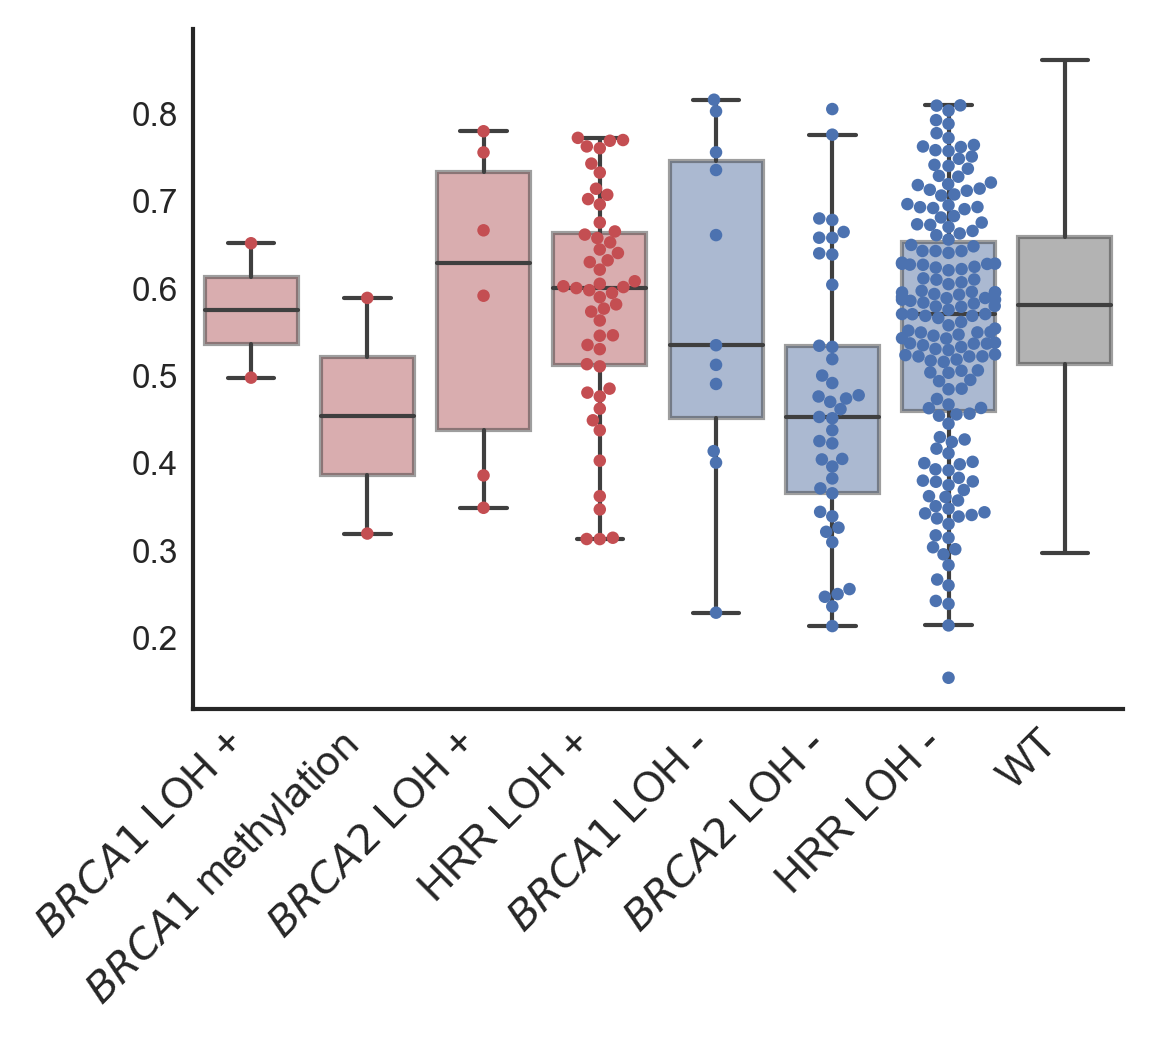

In [233]:
plt_df=df
cat='BRCA_status'
val='SigMA_broad'
order=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','wt']#'BRCA1_unknown' ]
order2=['BRCA1_LOH','BRCA1_methylation','BRCA2_LOH','HRR_LOH','BRCA1_nonLOH','BRCA2_nonLOH','HRR_nonLOH','']#'BRCA1_unknown' ]
order3=['$BRCA1$ LOH +','$BRCA1$ methylation','$BRCA2$ LOH +','HRR LOH +','$BRCA1$ LOH -','$BRCA2$ LOH -','HRR LOH -','WT']#'BRCA1_unknown' ]

#hue=
palette=['r','r','r','r','b','b','b','dimgrey']
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)
#sns.violinplot(x=cat,y=val,data=plt_df,inner="stick",order=order,cut=0,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order2,palette=palette)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'   ].set_visible(False)# .set_color("w")
ax.spines['right' ].set_visible(False)
ax.set_xticklabels(order3,rotation=45,fontsize=10,ha='right')
ax.tick_params('y',labelsize=8)

## Genomic scar and Drug sensitivity

In [234]:
df=df_sel.copy()

In [235]:
len(drug_all)

870

### HRD score

In [236]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df[['HRD_score_broad',drug]].dropna()
    a=plt_df['HRD_score_broad'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 10:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [237]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [238]:
df_cor=df_cor.dropna()

In [239]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [240]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(767, 8)

In [241]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS    mlog10p  \
CTRP2_nutlin-3_411722        648.0  1.207042e-15  0.307367  14.918277   
GDSC2_Cytarabine_1006        456.0  8.709425e-15  0.352489  14.060011   
GDSC2_Gemcitabine_1190       456.0  7.274362e-12  0.313612  11.138205   
GDSC2_Oxaliplatin_1089       480.0  1.045348e-11  0.303807  10.980739   
GDSC2_AZD6738_1917           456.0  3.782680e-11  0.303167  10.422200   
...                            ...           ...       ...        ...   
GDSC2_IWP-2_1576             440.0  1.488965e-04 -0.179855   3.827116   
GDSC2_AZD3759_1915           461.0  3.269351e-05 -0.192179   4.485538   
GDSC2_GDC0810_1925           456.0  5.763977e-06 -0.210557   5.239278   
gCSI_Gemcitabine_CID356653   232.0  5.131073e-06 -0.294271   5.289792   
GDSC2_Gefitinib_1010         456.0  9.351767e-07 -0.227299   6.029106   

                                     FDR  significant         drug_anno  \
CTRP2_nutlin-3_411722       1.034435e-12            1       p53 pathway   
GDSC2_Cytarabine_1006       3.731989e-12            1    Antimetabolite   
GDSC2_Gemcitabine_1190      2.078043e-09            1    Antimetabolite   
GDSC2_Oxaliplatin_1089      2.239658e-09            1          Platinum   
GDSC2_AZD6738_1917          5.965839e-09            1  Genome integrity   
...                                  ...          ...               ...   
GDSC2_IWP-2_1576            8.740018e-04            1     WNT signaling   
GDSC2_AZD3759_1915          2.566746e-04            1    EGFR signaling   
GDSC2_GDC0810_1925          6.098430e-05            1   Hormone-related   
gCSI_Gemcitabine_CID356653  5.710818e-05            1    Antimetabolite   
GDSC2_Gefitinib_1010        1.358384e-05            1    EGFR signaling   

                                 cid  
CTRP2_nutlin-3_411722         216345  
GDSC2_Cytarabine_1006           6253  
GDSC2_Gemcitabine_1190         60750  
GDSC2_Oxaliplatin_1089       5310940  
GDSC2_AZD6738_1917          54761306  
...                              ...  
GDSC2_IWP-2_1576             2155128  
GDSC2_AZD3759_1915          78209992  
GDSC2_GDC0810_1925          56941241  
gCSI_Gemcitabine_CID356653    356653  
GDSC2_Gefitinib_1010          123631  

[767 rows x 8 columns]

In [242]:
NP=len(df_cor_p)
NN=len(df_cor_n)

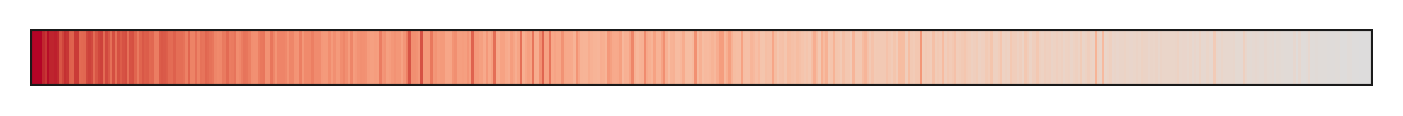

In [243]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

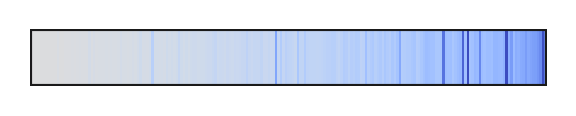

In [244]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

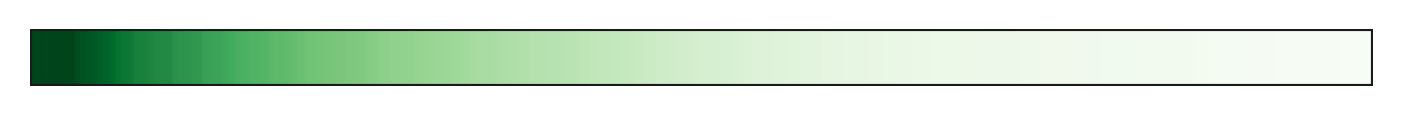

In [245]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

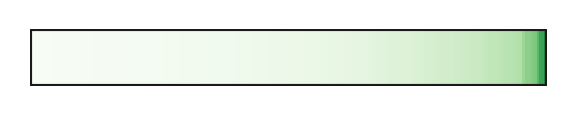

In [246]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

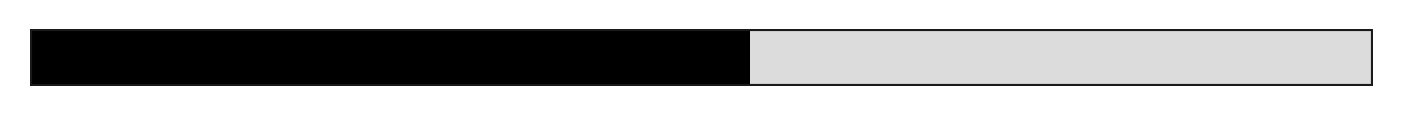

In [247]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

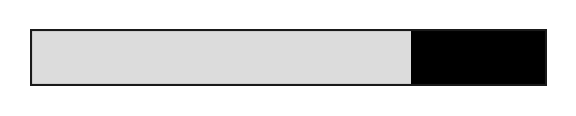

In [248]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [249]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

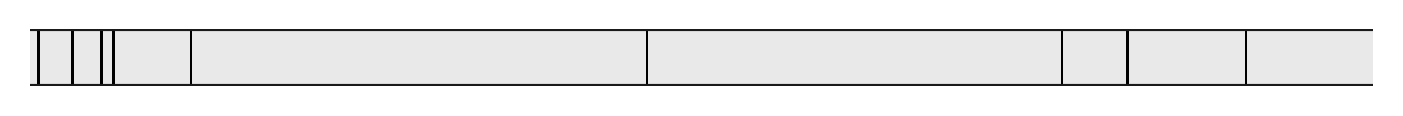

In [250]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

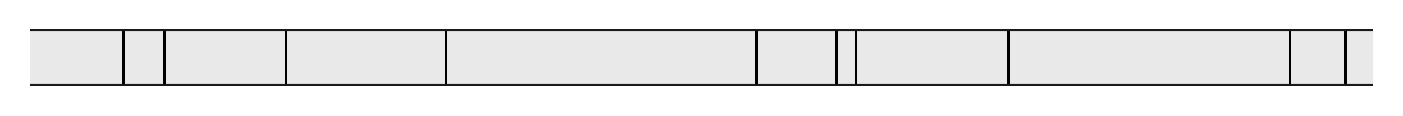

In [251]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [252]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

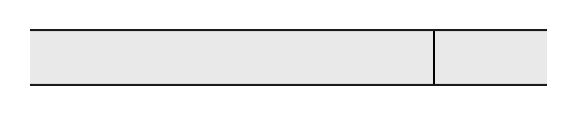

In [253]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

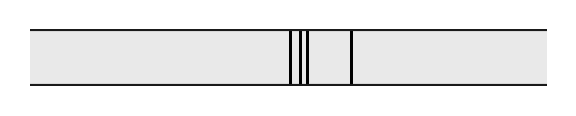

In [254]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [255]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number       pvalues        rS  \
GDSC2_Oxaliplatin_1089                     480.0  1.045348e-11  0.303807   
CTRP2_oxaliplatin_375582                   658.0  8.469240e-09  0.222115   
GDSC2_Oxaliplatin_1806                     438.0  4.781998e-08  0.257186   
GDSC2_Cisplatin_1005                       462.0  8.943051e-08  0.245609   
CTRP2_carboplatin_26979                    672.0  2.098226e-06  0.181805   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   382.0  1.358019e-02  0.126191   
PRISM_carboplatin_BRD-K90947825-001-02-7   378.0  3.698048e-01  0.046257   
GDSC1_Cisplatin_1005                       541.0  4.492851e-01  0.032596   
gCSI_Cisplatin_CID24191118                 199.0  7.013206e-01  0.027356   
PRISM_cisplatin_BRD-K69172251-001-08-9     382.0  2.660863e-02 -0.113448   

                                            mlog10p           FDR  \
GDSC2_Oxaliplatin_1089                    10.980739  1.045348e-10   
CTRP2_oxaliplatin_375582                   8.072156  4.234620e-08   
GDSC2_Oxaliplatin_1806                     7.320391  1.593999e-07   
GDSC2_Cisplatin_1005                       7.048514  2.235763e-07   
CTRP2_carboplatin_26979                    5.678148  4.196451e-06   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   1.867094  2.263366e-02   
PRISM_carboplatin_BRD-K90947825-001-02-7   0.432028  4.622559e-01   
GDSC1_Cisplatin_1005                       0.347478  4.992057e-01   
gCSI_Cisplatin_CID24191118                 0.154083  7.013206e-01   
PRISM_cisplatin_BRD-K69172251-001-08-9     1.574978  3.801232e-02   

                                          significant drug_anno       cid  
GDSC2_Oxaliplatin_1089                              1  Platinum   5310940  
CTRP2_oxaliplatin_375582                            1  Platinum  24197464  
GDSC2_Oxaliplatin_1806                              1  Platinum   5310940  
GDSC2_Cisplatin_1005                                1  Platinum     84691  
CTRP2_carboplatin_26979                             1  Platinum     38904  
PRISM_oxaliplatin_BRD-K78960041-001-05-7            1  Platinum  24197464  
PRISM_carboplatin_BRD-K90947825-001-02-7            0  Platinum    426756  
GDSC1_Cisplatin_1005                                0  Platinum     84691  
gCSI_Cisplatin_CID24191118                          0  Platinum  24191118  
PRISM_cisplatin_BRD-K69172251-001-08-9              1  Platinum  24191118

In [256]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number       pvalues        rS  \
GDSC2_Talazoparib_1259                     453.0  2.193914e-07  0.240557   
GDSC2_Niraparib_1177                       441.0  9.203750e-07  0.231194   
GDSC1_Olaparib_1017                        540.0  4.176120e-05  0.175367   
CTRP2_olaparib_411867                      667.0  7.590530e-04  0.130072   
GDSC1_Talazoparib_1259                     519.0  5.313025e-02  0.084938   
GDSC2_Olaparib_1017                        461.0  1.096216e-01  0.074613   
GDSC1_Veliparib_1018                       541.0  1.231347e-01  0.066365   
CTRP2_veliparib_606034                     685.0  2.936644e-01  0.040180   
GDSC1_Rucaparib_1175                       536.0  8.277319e-01  0.009421   
GDSC1_Olaparib_1495                        512.0  9.469749e-01  0.002946   
PRISM_olaparib_BRD-K02113016-001-19-6      369.0  2.573597e-01 -0.059113   
PRISM_talazoparib_BRD-K95142244-001-01-5   408.0  2.273636e-01 -0.059894   
PRISM_niraparib_BRD-K54955827-001-02-2     402.0  2.133977e-01 -0.062192   
PRISM_olaparib_BRD-K02113016-001-15-4      377.0  1.180710e-01 -0.080631   

                                           mlog10p       FDR  significant  \
GDSC2_Talazoparib_1259                    6.658780  0.000003            1   
GDSC2_Niraparib_1177                      6.036035  0.000006            1   
GDSC1_Olaparib_1017                       4.379227  0.000195            1   
CTRP2_olaparib_411867                     3.119728  0.002657            1   
GDSC1_Talazoparib_1259                    1.274658  0.148765            0   
GDSC2_Olaparib_1017                       0.960104  0.215486            0   
GDSC1_Veliparib_1018                      0.909620  0.215486            0   
CTRP2_veliparib_606034                    0.532149  0.342608            0   
GDSC1_Rucaparib_1175                      0.082110  0.891404            0   
GDSC1_Olaparib_1495                       0.023662  0.946975            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.589459  0.327549            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  0.643279  0.318309            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.670810  0.318309            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.927857  0.215486            0   

                                               drug_anno        cid  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
CTRP2_olaparib_411867                     PARP inhibitor   23725625  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625

### Signature 3 broad

In [257]:
ns,rs,ps=[],[],[]
for drug in drug_all:
    plt_df=df[['SigMA_broad',drug]].dropna()
    a=plt_df['SigMA_broad'].values
    b=plt_df[drug].values
    n=len(a)
    if n>= 50:
        r,p=stats.spearmanr(a,b)
        ns.append(n)
        rs.append(r)
        ps.append(p)
    else:
        ns.append(np.nan)
        rs.append(np.nan)
        ps.append(np.nan)

In [258]:
df_cor=pd.DataFrame(index=drug_all)
df_cor['Number']=ns
df_cor['pvalues']=ps
df_cor['rS']=rs

In [259]:
df_cor=df_cor.dropna()

In [260]:
df_cor['mlog10p']=-np.log10(df_cor['pvalues'])
df_cor['FDR']=multipletests(df_cor['pvalues'],method='fdr_bh')[1]
df_cor['significant']=(df_cor['pvalues']<0.05).astype(int)

In [261]:
df_cor=df_cor.merge(drug_anno,left_index=True,right_index=True,how='inner')
df_cor.shape

(764, 8)

In [262]:
df_cor_p=df_cor[df_cor['rS']>=0].sort_values('pvalues')
df_cor_n=df_cor[df_cor['rS']<0].sort_values('pvalues',ascending=False)
df_cor_pn=pd.concat([df_cor_p,df_cor_n])
df_cor_pn

Number       pvalues        rS    mlog10p  \
GDSC1_VX-11e_262               792.0  9.842492e-11  0.227224  10.006895   
gCSI_PF-4708671_CID51371303    222.0  2.519078e-10  0.408224   9.598758   
GDSC1_(5Z)-7-Oxozeaenol_1242   788.0  6.074115e-10  0.218142   9.216517   
GDSC1_NVP-BHG712_295           792.0  1.423991e-09  0.212940   8.846493   
GDSC1_Refametinib_1014         798.0  4.521995e-09  0.205678   8.344670   
...                              ...           ...       ...        ...   
CTRP2_lomeguatrib_660207       696.0  2.356642e-03 -0.115099   2.627706   
gCSI_Dasatinib_CID3062316      161.0  9.103627e-04 -0.258949   3.040786   
gCSI_TGX221_CID9907093          90.0  2.717523e-04 -0.374920   3.565827   
gCSI_Tanespimycin_CID6505803   222.0  2.525818e-04 -0.243291   3.597598   
gCSI_Gemcitabine_CID356653     250.0  1.722665e-09 -0.369176   8.763799   

                                       FDR  significant  \
GDSC1_VX-11e_262              8.346433e-08            1   
gCSI_PF-4708671_CID51371303   1.068089e-07            1   
GDSC1_(5Z)-7-Oxozeaenol_1242  1.716950e-07            1   
GDSC1_NVP-BHG712_295          2.921639e-07            1   
GDSC1_Refametinib_1014        6.391086e-07            1   
...                                    ...          ...   
CTRP2_lomeguatrib_660207      2.196079e-02            1   
gCSI_Dasatinib_CID3062316     1.135276e-02            1   
gCSI_TGX221_CID9907093        4.903106e-03            1   
gCSI_Tanespimycin_CID6505803  4.656291e-03            1   
gCSI_Gemcitabine_CID356653    2.921639e-07            1   

                                                      drug_anno       cid  
GDSC1_VX-11e_262                             ERK MAPK signaling  11634725  
gCSI_PF-4708671_CID51371303                 PI3K/MTOR signaling  51371303  
GDSC1_(5Z)-7-Oxozeaenol_1242                             Others   9863776  
GDSC1_NVP-BHG712_295                                     Others  16747388  
GDSC1_Refametinib_1014                       ERK MAPK signaling  44182295  
...                                                         ...       ...  
CTRP2_lomeguatrib_660207                                 Others   3025944  
gCSI_Dasatinib_CID3062316                                Others   3062316  
gCSI_TGX221_CID9907093                      PI3K/MTOR signaling   9907093  
gCSI_Tanespimycin_CID6505803  Protein stability and degradation   6505803  
gCSI_Gemcitabine_CID356653                       Antimetabolite    356653  

[764 rows x 8 columns]

In [263]:
NP=len(df_cor_p)
NN=len(df_cor_n)

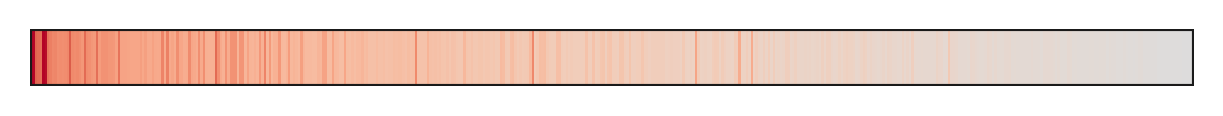

In [264]:
sns_df=df_cor_p[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

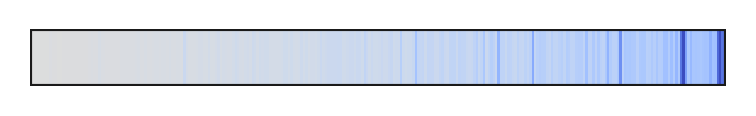

In [265]:
sns_df=df_cor_n[['rS']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=0.3,cmap='coolwarm',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

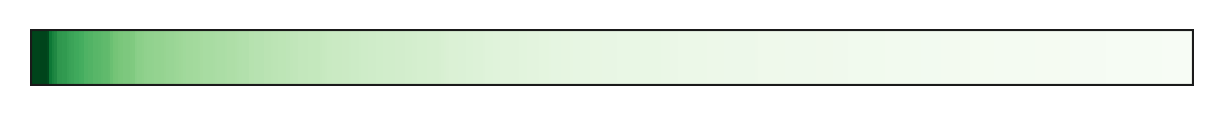

In [266]:
sns_df=df_cor_p[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

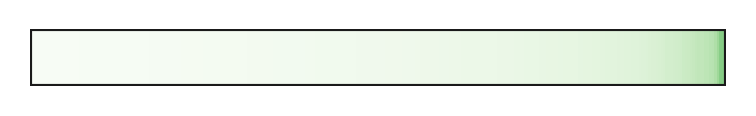

In [267]:
sns_df=df_cor_n[['mlog10p']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=0,vmax=8,cmap='Greens',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

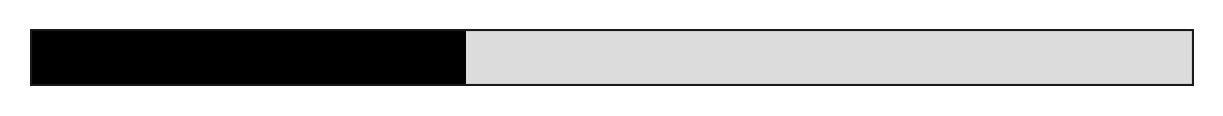

In [268]:
sns_df=df_cor_p[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

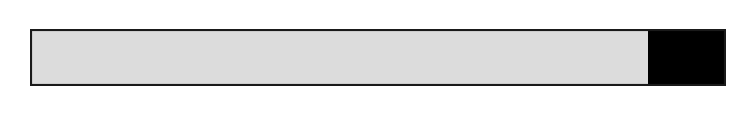

In [269]:
sns_df=df_cor_n[['significant']]
N=sns_df.shape[0]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.3,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [270]:
in_df=pd.get_dummies( df_cor_p['drug_anno'] )

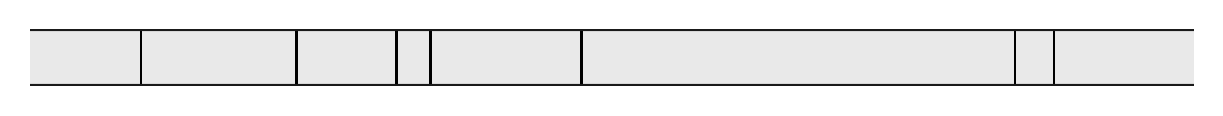

In [271]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

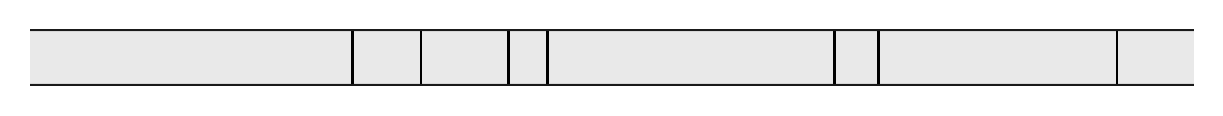

In [272]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NP/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [273]:
in_df=pd.get_dummies( df_cor_n['drug_anno'] )

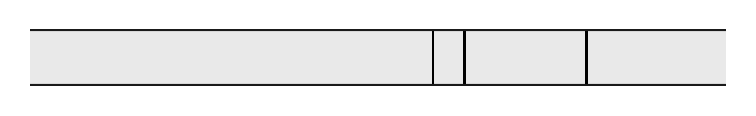

In [274]:
sns_df=in_df[['Platinum']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

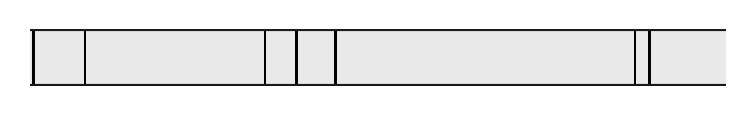

In [275]:
sns_df=in_df[['PARP inhibitor']]
fig=plt.figure(figsize=(8*(NN/(NP+NN)),0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df.T,vmin=-0.2,vmax=1,cmap='Greys',cbar=False,ax=ax,xticklabels=0,yticklabels=0,)
ax.hlines(y=0,xmin=0,xmax=sns_df.shape[0],color='k')
ax.hlines(y=1,xmin=0,xmax=sns_df.shape[0],color='k')
#ax.vlines(x=0,ymin=0,ymax=sns_df.shape[1],color='k')
#ax.vlines(x=sns_df.shape[0],ymin=0,ymax=sns_df.shape[1],color='k')

In [276]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='Platinum']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/1814905853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Oxaliplatin_1806                     635.0  0.000332  0.141990   
GDSC2_Oxaliplatin_1089                     693.0  0.006717  0.102877   
CTRP2_carboplatin_26979                    693.0  0.022412  0.086729   
GDSC2_Cisplatin_1005                       659.0  0.030364  0.084358   
GDSC1_Cisplatin_1005                       817.0  0.129218  0.053124   
CTRP2_oxaliplatin_375582                   683.0  0.668220  0.016429   
PRISM_oxaliplatin_BRD-K78960041-001-05-7   392.0  0.717048  0.018361   
PRISM_carboplatin_BRD-K90947825-001-02-7   388.0  0.301868 -0.052547   
PRISM_cisplatin_BRD-K69172251-001-08-9     391.0  0.247852 -0.058578   
gCSI_Cisplatin_CID24191118                 214.0  0.098006 -0.113405   

                                           mlog10p       FDR  significant  \
GDSC2_Oxaliplatin_1806                    3.479220  0.003317            1   
GDSC2_Oxaliplatin_1089                    2.172795  0.033587            1   
CTRP2_carboplatin_26979                   1.649513  0.074708            1   
GDSC2_Cisplatin_1005                      1.517641  0.075910            1   
GDSC1_Cisplatin_1005                      0.888678  0.215363            0   
CTRP2_oxaliplatin_375582                  0.175081  0.717048            0   
PRISM_oxaliplatin_BRD-K78960041-001-05-7  0.144452  0.717048            0   
PRISM_carboplatin_BRD-K90947825-001-02-7  0.520183  0.377335            0   
PRISM_cisplatin_BRD-K69172251-001-08-9    0.605807  0.354075            0   
gCSI_Cisplatin_CID24191118                1.008747  0.196012            0   

                                         drug_anno       cid  
GDSC2_Oxaliplatin_1806                    Platinum   5310940  
GDSC2_Oxaliplatin_1089                    Platinum   5310940  
CTRP2_carboplatin_26979                   Platinum     38904  
GDSC2_Cisplatin_1005                      Platinum     84691  
GDSC1_Cisplatin_1005                      Platinum     84691  
CTRP2_oxaliplatin_375582                  Platinum  24197464  
PRISM_oxaliplatin_BRD-K78960041-001-05-7  Platinum  24197464  
PRISM_carboplatin_BRD-K90947825-001-02-7  Platinum    426756  
PRISM_cisplatin_BRD-K69172251-001-08-9    Platinum  24191118  
gCSI_Cisplatin_CID24191118                Platinum  24191118

In [277]:
tmp_df=df_cor_pn[df_cor_pn['drug_anno']=='PARP inhibitor']
tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]
tmp_df

/var/folders/3g/5zyn6dld5rl1rc3t1fmh0t240000gn/T/ipykernel_96683/188230088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['FDR']=multipletests(tmp_df['pvalues'],method='fdr_bh')[1]


Number   pvalues        rS  \
GDSC2_Talazoparib_1259                     647.0  0.015126  0.095474   
GDSC1_Talazoparib_1259                     786.0  0.027934  0.078412   
GDSC1_Olaparib_1017                        815.0  0.073058  0.062822   
GDSC2_Niraparib_1177                       636.0  0.092829  0.066699   
GDSC1_Veliparib_1018                       816.0  0.392734  0.029959   
GDSC1_Olaparib_1495                        782.0  0.477786  0.025421   
CTRP2_veliparib_606034                     709.0  0.832894  0.007938   
PRISM_olaparib_BRD-K02113016-001-19-6      379.0  0.988726 -0.000728   
GDSC2_Olaparib_1017                        655.0  0.916635 -0.004098   
PRISM_niraparib_BRD-K54955827-001-02-2     412.0  0.567356 -0.028258   
GDSC1_Rucaparib_1175                       812.0  0.535810 -0.021759   
PRISM_olaparib_BRD-K02113016-001-15-4      387.0  0.456091 -0.037995   
PRISM_talazoparib_BRD-K95142244-001-01-5   418.0  0.061050 -0.091700   
CTRP2_olaparib_411867                      692.0  0.043170 -0.076893   

                                           mlog10p       FDR  significant  \
GDSC2_Talazoparib_1259                    1.820272  0.195538            1   
GDSC1_Talazoparib_1259                    1.553867  0.195538            1   
GDSC1_Olaparib_1017                       1.136330  0.204564            0   
GDSC2_Niraparib_1177                      1.032314  0.216602            0   
GDSC1_Veliparib_1018                      0.405902  0.722090            0   
GDSC1_Olaparib_1495                       0.320766  0.722090            0   
CTRP2_veliparib_606034                    0.079410  0.971710            0   
PRISM_olaparib_BRD-K02113016-001-19-6     0.004924  0.988726            0   
GDSC2_Olaparib_1017                       0.037804  0.987145            0   
PRISM_niraparib_BRD-K54955827-001-02-2    0.246144  0.722090            0   
GDSC1_Rucaparib_1175                      0.270989  0.722090            0   
PRISM_olaparib_BRD-K02113016-001-15-4     0.340948  0.722090            0   
PRISM_talazoparib_BRD-K95142244-001-01-5  1.214317  0.204564            0   
CTRP2_olaparib_411867                     1.364821  0.201459            1   

                                               drug_anno        cid  
GDSC2_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC1_Talazoparib_1259                    PARP inhibitor   44819241  
GDSC1_Olaparib_1017                       PARP inhibitor   23725625  
GDSC2_Niraparib_1177                      PARP inhibitor   24958200  
GDSC1_Veliparib_1018                      PARP inhibitor   11960529  
GDSC1_Olaparib_1495                       PARP inhibitor   23725625  
CTRP2_veliparib_606034                    PARP inhibitor   11960529  
PRISM_olaparib_BRD-K02113016-001-19-6     PARP inhibitor   23725625  
GDSC2_Olaparib_1017                       PARP inhibitor   23725625  
PRISM_niraparib_BRD-K54955827-001-02-2    PARP inhibitor   24958200  
GDSC1_Rucaparib_1175                      PARP inhibitor    9931953  
PRISM_olaparib_BRD-K02113016-001-15-4     PARP inhibitor   23725625  
PRISM_talazoparib_BRD-K95142244-001-01-5  PARP inhibitor  135565082  
CTRP2_olaparib_411867                     PARP inhibitor   23725625

# ROARMAP

In [760]:
rm=pd.read_excel('../NCI60/ROADMAP/roadmaps_12-14-2021.xlsx')
rm['stripped_name']=[x.replace('_','').replace('-','').replace('/','').replace(' ','') for x in rm['Tumor Model']]
rm['stripped_name']=rm['stripped_name'].replace({'A549ATCC':'A549','A549(ASC)1':'A549',
                                                 '7860':'786O','HelaLUC':'HELA'})
rm['Drug_route']=[x+'_'+y for x,y in zip(rm['Generic Name'],rm['Admin Route'])]

In [761]:
a=set(rm['stripped_name'])
b=set(df0['stripped_cell_line_name'])
len( a&b )

72

In [762]:
counter=Counter(rm['Drug_route']).most_common()
counter

[('Cyclophosphamide_IP', 71),
 ('Cisplatin_IP', 71),
 ('Paclitaxel_IV', 67),
 ('Fluorouracil_IP', 64),
 ('Methotrexate_IP', 63),
 ('Dacarbazine_IP', 63),
 ('Dactinomycin_IP', 62),
 ('Bleomycin_IP', 59),
 ('Vinblastine_IP', 57),
 ('Carmustine_IP', 55),
 ('Melphalan_IP', 52),
 ('Mitomycin C_IP', 52),
 ('Topotecan_IP', 48),
 ('Doxorubicin_IV', 41),
 ('Doxorubicin_IP', 35),
 ('Temozolomide_PO', 30),
 ('Irinotecan_IV', 14),
 ('Dasatinib_PO', 14),
 ('Clofarabine_PO', 13),
 ('Vincristine_IV', 12),
 ('Sirolimus (Rapamycin)_IP', 12),
 ('Erlotinib_PO', 12),
 ('Sorafenib_PO', 12),
 ('Chlorambucil_IP', 11),
 ('Lapatinib_PO', 11),
 ('Megestrol acetate_PO', 8),
 ('Decitabine_IP', 8),
 ('Topotecan_IV', 8),
 ('Tamoxifen Citrate_IP', 7),
 ('Carboplatin_IP', 7),
 ('Temsirolimus_IV', 7),
 ('Gefitinib_PO', 7),
 ('Nilotinib_PO', 7),
 ('Cytarabine_IP', 6),
 ('Azacitidine_IP', 6),
 ('Imatinib_PO', 6),
 ('Trametinib_PO', 6),
 ('Etoposide_IP', 5),
 ('Tamoxifen Citrate_PO', 5),
 ('Docetaxel_IV', 5),
 ('Everolim

In [763]:
drugs=[x[0] for x in counter[0:16]]
drugs

['Cyclophosphamide_IP',
 'Cisplatin_IP',
 'Paclitaxel_IV',
 'Fluorouracil_IP',
 'Methotrexate_IP',
 'Dacarbazine_IP',
 'Dactinomycin_IP',
 'Bleomycin_IP',
 'Vinblastine_IP',
 'Carmustine_IP',
 'Melphalan_IP',
 'Mitomycin C_IP',
 'Topotecan_IP',
 'Doxorubicin_IV',
 'Doxorubicin_IP',
 'Temozolomide_PO']

45 Cisplatin_IP 45 0.4124308909827742
45 Cisplatin_IP 45 0.40933058968147007
45 Cisplatin_IP 45 0.3401257524895508
45 Cisplatin_IP 45 0.3181490413467349
45.0 36.0


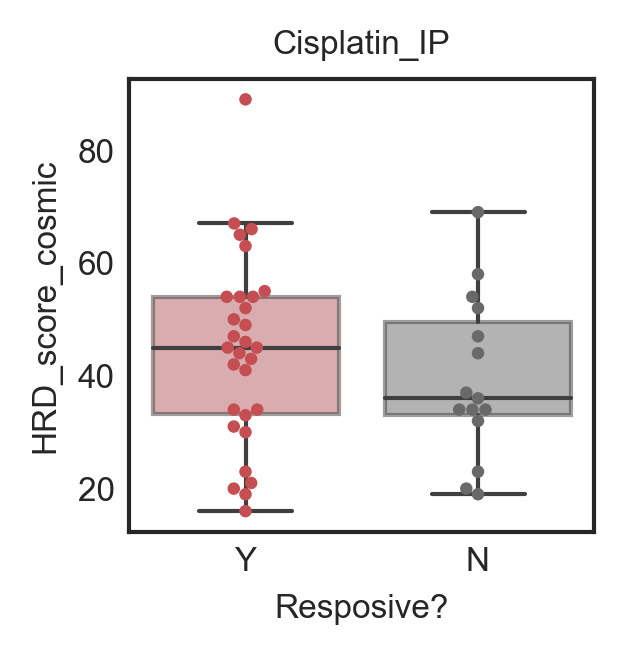

In [764]:
drug='Cisplatin_IP'
add=rm[rm['Drug_route']==drug]
df_add=df2.merge(add, left_on='stripped_cell_line_name',right_on='stripped_name',how='inner')
df_add=df_add.sort_values('Resposive?',ascending=True)
df_add=df_add[~df_add['stripped_name'].duplicated()]
plt_df=df_add#[~df_add[['stripped_name',cat]].duplicated()]
cat='Resposive?'
val='HRD_score_cosmic'
order=['Y','N']
#hue=
palette=['r','dimgrey']
fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(1,1,1)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order,dodge=True,palette=palette)
ax.set_xlabel(cat)
ax.set_title(drug)
ax.tick_params(labelsize=8)

a=plt_df[plt_df[cat]=='Y'][val].dropna().values
b=plt_df[plt_df[cat]=='N'][val].dropna().values
r,p=stats.mannwhitneyu(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.brunnermunzel(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b,equal_var=False)
print(len(plt_df), drug,len(plt_df),p)

print( np.median(a),np.median(b) )

47 Cisplatin_IP 47 0.41067550044198053
47 Cisplatin_IP 47 0.44066063161616653
47 Cisplatin_IP 47 0.5876775250399655
47 Cisplatin_IP 47 0.5681117765169379
20.0 17.0


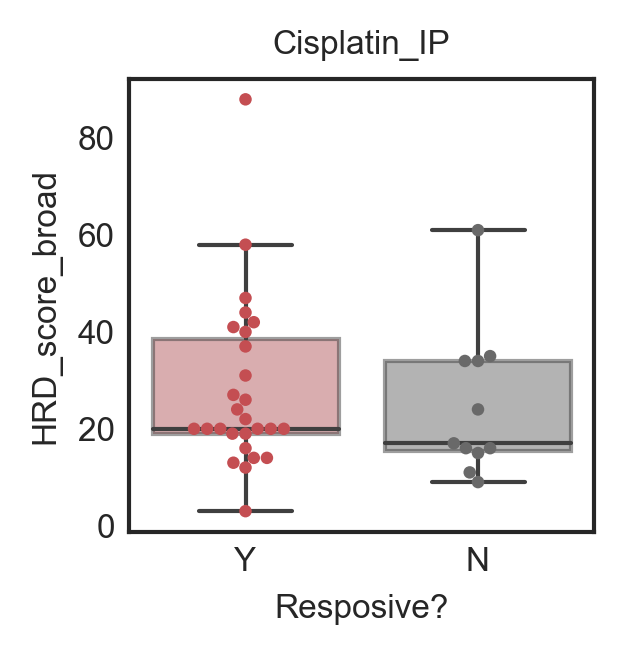

In [765]:
drug='Cisplatin_IP'
add=rm[rm['Drug_route']==drug]
df_add=df0.merge(add, left_on='stripped_cell_line_name',right_on='stripped_name',how='inner')
df_add=df_add.sort_values('Resposive?',ascending=True)
df_add=df_add[~df_add['stripped_name'].duplicated()]
plt_df=df_add#[~df_add[['stripped_name',cat]].duplicated()]
cat='Resposive?'
val='HRD_score_broad'
order=['Y','N']
#hue=
palette=['r','dimgrey']
fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(1,1,1)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order,dodge=True,palette=palette)
ax.set_xlabel(cat)
ax.set_title(drug)
ax.tick_params(labelsize=8)

a=plt_df[plt_df[cat]=='Y'][val].dropna().values
b=plt_df[plt_df[cat]=='N'][val].dropna().values
r,p=stats.mannwhitneyu(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.brunnermunzel(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b,equal_var=False)
print(len(plt_df), drug,len(plt_df),p)

print( np.median(a),np.median(b) )

45 Cisplatin_IP 45 0.588000152422783
45 Cisplatin_IP 45 0.5941348700508384
45 Cisplatin_IP 45 0.5719960738067026
45 Cisplatin_IP 45 0.5782394432139251
0.5996516825315661 0.562232239840855


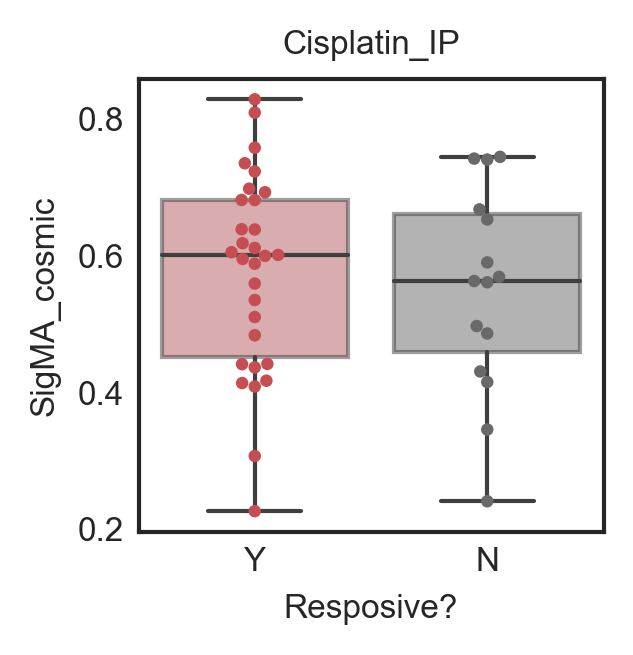

In [766]:
drug='Cisplatin_IP'
add=rm[rm['Drug_route']==drug]
df_add=df2.merge(add, left_on='stripped_cell_line_name',right_on='stripped_name',how='inner')
df_add=df_add.sort_values('Resposive?',ascending=True)
df_add=df_add[~df_add['stripped_name'].duplicated()]
plt_df=df_add#[~df_add[['stripped_name',cat]].duplicated()]
cat='Resposive?'
val='SigMA_cosmic'
order=['Y','N']
#hue=
palette=['r','dimgrey']
fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(1,1,1)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order,dodge=True,palette=palette)
ax.set_xlabel(cat)
ax.set_title(drug)
ax.tick_params(labelsize=8)

a=plt_df[plt_df[cat]=='Y'][val].dropna().values
b=plt_df[plt_df[cat]=='N'][val].dropna().values

r,p=stats.mannwhitneyu(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.brunnermunzel(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b,equal_var=False)
print(len(plt_df), drug,len(plt_df),p)


print( np.median(a),np.median(b) )

47 Cisplatin_IP 47 0.44455182146463057
47 Cisplatin_IP 47 0.45345160723632394
47 Cisplatin_IP 47 0.43369799736465064
47 Cisplatin_IP 47 0.4432795450338681
0.625475965962196 0.558120321902762


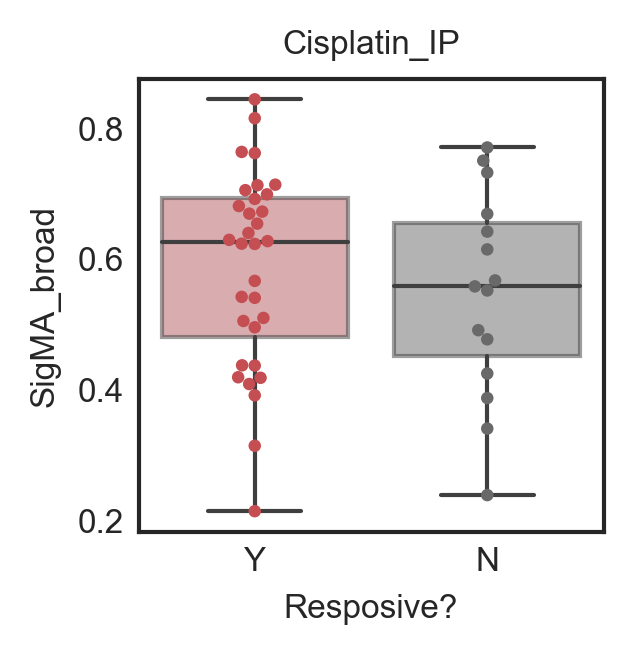

In [767]:
drug='Cisplatin_IP'
add=rm[rm['Drug_route']==drug]
df_add=df0.merge(add, left_on='stripped_cell_line_name',right_on='stripped_name',how='inner')
df_add=df_add.sort_values('Resposive?',ascending=True)
df_add=df_add[~df_add['stripped_name'].duplicated()]
plt_df=df_add#[~df_add[['stripped_name',cat]].duplicated()]
cat='Resposive?'
val='SigMA_broad'
order=['Y','N']
#hue=
palette=['r','dimgrey']
fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(1,1,1)
sns.boxplot(x=cat,y=val,data=plt_df,boxprops={'alpha':0.5},sym='',order=order,palette=palette)
sns.swarmplot(x=cat,y=val,data=plt_df,s=3,order=order,dodge=True,palette=palette)
ax.set_xlabel(cat)
ax.set_title(drug)
ax.tick_params(labelsize=8)

a=plt_df[plt_df[cat]=='Y'][val].dropna().values
b=plt_df[plt_df[cat]=='N'][val].dropna().values

r,p=stats.mannwhitneyu(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.brunnermunzel(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b)
print(len(plt_df), drug,len(plt_df),p)
r,p=stats.ttest_ind(a,b,equal_var=False)
print(len(plt_df), drug,len(plt_df),p)


print( np.median(a),np.median(b) )

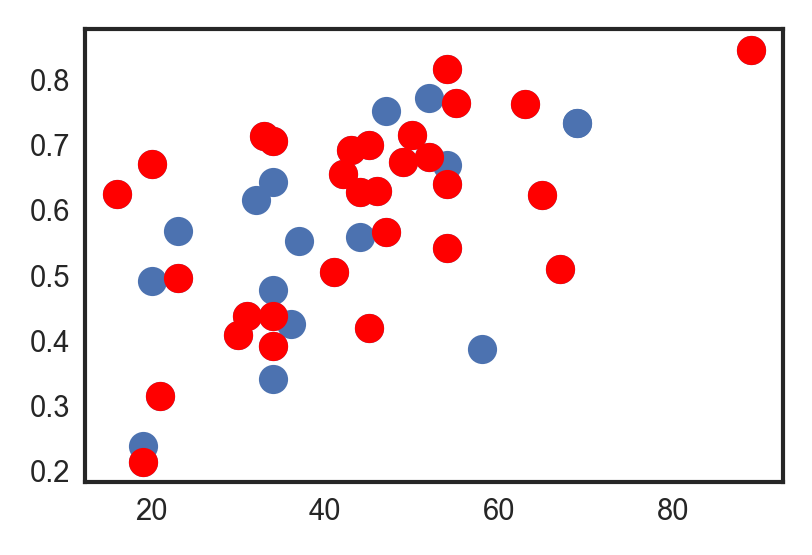

In [768]:
drug='Cisplatin_IP'
add=rm[rm['Drug_route']==drug]
df_add=df12.merge(add, left_on='stripped_cell_line_name',right_on='stripped_name',how='inner')
df_add=df_add.sort_values('Resposive?',ascending=True)
#df_add=df_add[~df_add['stripped_name'].duplicated()]


fig=plt.figure(figsize=(3,2))
ax=fig.add_subplot(111)
plt_df=df_add#[~df_add[['stripped_name',cat]].duplicated()]
x=plt_df['HRD_score_cosmic']
y=plt_df['SigMA_broad']
ax.scatter(x,y)

plt_df2=df_add[df_add['Resposive?']=='Y']
x=plt_df2['HRD_score_cosmic']
y=plt_df2['SigMA_broad']
ax.scatter(x,y,c='red')



# BCaPE

In [769]:
dict_did_dname={'AZD2281':'Olaparib','AG-014699':'Rucaparib','BMN-673':'Talazoparib'}

In [771]:
sigma=pd.read_csv('../Data/Cell2016_BCaPE/SigMA/Cell2016_sigMA_breast.csv').iloc[:,96:]
sigma=sigma.set_index('tumor')
sigma.index=[x.split('//')[1].replace('.maf','') for x in sigma.index]
sigma=sigma.sort_index()
sigma['splitID']=[x.split('-')[0] for x in sigma.index]
sigma

total_snvs  Signature_3_c1_ml  Signature_3_c2_ml  \
AB521-T             218       3.694364e-05       7.323140e-01   
AB521M-T            186       6.403953e-05       9.798104e-01   
AB521M-X1           350       4.683840e-14       9.973984e-01   
AB521M-X1C7         381       2.431167e-14       8.498884e-01   
AB521M-X1R          230       3.367243e-05       9.740059e-01   
...                 ...                ...                ...   
VHIO179-X7          730       7.856594e-11       3.426435e-04   
VHIO179-X9          730       1.859473e-05       4.048090e-02   
VHIO179-XC          739       5.216147e-20       2.558117e-09   
VHIO244-X3          672       2.004880e-37       1.166667e-18   
VHIO244-X4          661       6.070009e-29       3.472749e-07   

             Signature_3_c3_ml  Signature_3_c4_ml  Signature_8_c1_ml  \
AB521-T           2.371480e-32       5.728873e-02       3.659640e-02   
AB521M-T          1.826333e-28       5.142229e-03       1.493181e-02   
AB521M-X1         1.672407e-61       2.701551e-12       2.601621e-03   
AB521M-X1C7       4.204889e-66       5.393575e-12       1.501116e-01   
AB521M-X1R        1.714389e-33       1.248327e-02       1.245382e-02   
...                        ...                ...                ...   
VHIO179-X7        2.937368e-82       9.777099e-04       9.986796e-01   
VHIO179-X9        1.271426e-77       9.594090e-01       9.150390e-05   
VHIO179-XC        1.906763e-97       5.591255e-12       1.000000e+00   
VHIO244-X3       7.729282e-126       8.368025e-24       1.110532e-10   
VHIO244-X4       4.105796e-117       1.443084e-19       9.999997e-01   

             Signature_17_c1_ml  Signature_17_c2_ml  Signature_clock_c1_ml  \
AB521-T            5.947627e-22        0.000000e+00           1.219673e-04   
AB521M-T           2.457448e-18        0.000000e+00           8.236157e-07   
AB521M-X1          7.664716e-45        0.000000e+00           1.784884e-28   
AB521M-X1C7        2.348736e-48        0.000000e+00           7.474833e-25   
AB521M-X1R         1.193265e-21        0.000000e+00           1.040846e-06   
...                         ...                 ...                    ...   
VHIO179-X7         5.246715e-22       2.827093e-143           1.904923e-28   
VHIO179-X9         1.569397e-21       4.825927e-128           7.886653e-31   
VHIO179-XC         3.390718e-31       4.315583e-162           2.297360e-32   
VHIO244-X3         6.938103e-76        0.000000e+00           1.098687e-13   
VHIO244-X4         7.328747e-73        0.000000e+00           8.085522e-25   

             Signature_clock_c2_ml  Signature_APOBEC_c1_ml  \
AB521-T               1.736408e-01            1.235674e-28   
AB521M-T              5.063588e-05            1.136320e-27   
AB521M-X1             6.471072e-24            4.287548e-75   
AB521M-X1C7           6.605071e-20            4.906437e-75   
AB521M-X1R            1.022320e-03            2.088977e-31   
...                            ...                     ...   
VHIO179-X7            4.876722e-24            5.558935e-86   
VHIO179-X9            1.494813e-27            7.853578e-85   
VHIO179-XC            9.866060e-27            1.146688e-98   
VHIO244-X3            1.000000e+00            7.522920e-99   
VHIO244-X4            1.466661e-13           2.422778e-111   

             Signature_APOBEC_c2_ml  Signature_clock_c3_ml  \
AB521-T                         0.0           1.165552e-06   
AB521M-T                        0.0           8.762657e-08   
AB521M-X1                       0.0           4.048457e-19   
AB521M-X1C7                     0.0           2.075794e-16   
AB521M-X1R                      0.0           2.440382e-09   
...                             ...                    ...   
VHIO179-X7                      0.0           2.651029e-48   
VHIO179-X9                      0.0           2.109400e-55   
VHIO179-XC                      0.0           5.853283e-45   
VHIO244-X3                      0.0           2.952274e-13   
VHI

## PDCX

In [779]:
drug=pd.read_csv('../Data/Cell2016_BCaPE/2069274/DrugResponsesAUCSamples.txt',sep='\t')
drug['LN_IC50']=np.log(drug['iC50'])
drug

ID    Model        Drug       AUC          iC50     D1_CONC  \
0      HCI001-X4C   HCI001      17-AAG  0.275699  3.669921e+04    1.000000   
1      HCI001-X4C   HCI001      681640  0.095479  3.005775e+02    2.000000   
2      HCI001-X4C   HCI001     ABT-263  0.461477  1.492844e-01    2.000000   
3      HCI001-X4C   HCI001     AMG-706  0.083549  2.688117e+43    2.000000   
4      HCI001-X4C   HCI001       AZ628  0.269396  1.822698e+01    1.637784   
...           ...      ...         ...       ...           ...         ...   
2545  VHIO244-X2C  VHIO244  Vorinostat  0.518689  6.062272e-01   10.000000   
2546  VHIO244-X2C  VHIO244     XAV 939  0.060293  1.820637e+05    5.581430   
2547  VHIO244-X2C  VHIO244    YK 4-279  0.161984  1.492000e+01    7.701322   
2548  VHIO244-X2C  VHIO244   ZM-447439  0.053176  4.480814e+06    3.275568   
2549  VHIO244-X2C  VHIO244       mirin  0.189949  6.058844e+01  100.000000   

       D5_CONC    perc.iC50  cluster.superv     LN_IC50  
0     0.003906   289.543267               2   10.510511  
1     0.007812   190.394917               2    5.705706  
2     0.007812    53.201694               5   -1.901902  
3     0.007812  1890.868801               1  100.000000  
4     0.370028   261.985001               2    2.902903  
...        ...          ...             ...         ...  
2545  0.039062    49.450029               5   -0.500501  
2546  1.175631   767.205953               1   12.112112  
2547  2.337740   155.469442               2    2.702703  
2548  0.740057  1049.824353               1   15.315315  
2549  0.390625    90.963931               3    4.104104  

[2550 rows x 10 columns]

In [780]:
dict_sid_drug_auc={}
for idx in drug.index:
    sid=drug.loc[idx,'ID']
    did=drug.loc[idx,'Drug']
    auc=drug.loc[idx,'AUC']
    if sid not in dict_sid_drug_auc:
        dict_sid_drug_auc[sid]={}
    else:
        dict_sid_drug_auc[sid][did]=auc

In [781]:
import re
auc=pd.DataFrame(dict_sid_drug_auc).T
auc['ModelName']=[x.split('-')[0] for x in auc.index]
auc.index=[re.sub('CR$','R',x) for x in auc.index]
auc.index=[re.sub('C$','', x) for x in auc.index]
auc=auc.rename(columns=dict_did_dname)

In [782]:
auc

681640   ABT-263   AMG-706     AZ628  Olaparib   AZD6482  \
HCI001-X4     0.095479  0.461477  0.083549  0.269396  0.083434  0.219477   
HCI001-X5     0.110385  0.533138  0.092087  0.435343  0.043250  0.271063   
HCI002-X2     0.095766  0.428102  0.034103  0.136226  0.074088  0.130298   
HCI002-X2R    0.055996  0.232603  0.021945  0.126079  0.028812  0.060061   
HCI002-X3          NaN       NaN       NaN       NaN       NaN       NaN   
HCI002-X6     0.042704  0.375300  0.117919  0.034669  0.157643  0.016810   
HCI005-X2     0.198250  0.569761  0.030306  0.107888  0.034458  0.207334   
HCI008-X1     0.112553  0.314364  0.023915  0.113962  0.082450  0.337114   
HCI009-X1     0.018270  0.075276  0.120569  0.138810  0.045031  0.106399   
HCI009-X4     0.129305  0.117136  0.061745  0.046296  0.080567  0.030977   
HCI009-X7     0.071941  0.219687  0.106179  0.034131  0.080526  0.108704   
HCI010-X2     0.088689  0.757811  0.039472  0.039499  0.062109  0.176740   
HCI010-X2R    0.120833  0.887439  0.026129  0.068663  0.069242  0.232438   
HCI011-X1     0.096815  0.338327  0.058576  0.070300  0.099781  0.160162   
IC007-X0      0.030336  0.282250  0.011713  0.000000  0.088369  0.065990   
STG139-X13    0.077362  0.593231  0.114757  0.258547  0.056384  0.236217   
STG139-X9          NaN       NaN       NaN       NaN       NaN       NaN   
STG139M-X4    0.047351  0.648154  0.092032  0.305733  0.076680  0.091250   
STG139M-X5         NaN       NaN       NaN       NaN       NaN       NaN   
STG143-X2     0.044899  0.518523  0.030762  0.032994  0.154228  0.222858   
STG195-X3     0.268091  0.740590  0.023064  0.076722  0.307697  0.245995   
STG201-X3     0.078996  0.642871  0.090977  0.044705  0.147241  0.168002   
STG282-X1     0.102596  0.372466  0.105487  0.086727  0.152031  0.307169   
STG282-X1R    0.146829  0.301988  0.147009  0.268314  0.342156  0.182961   
STG282-X1CR1  0.121207  0.524408  0.247538  0.151857  0.392025  0.258176   
STG282-X3     0.332160  0.519854  0.184270  0.025349  0.079467  0.088065   
STG316-X1     0.080228  0.271086  0.100680  0.199719  0.103579  0.281405   
STG316-X1R    0.032890  0.248321  0.077771  0.152320  0.103307  0.295960   
STG335-X1          NaN       NaN       NaN       NaN       NaN       NaN   
STG335-X2     0.354306  0.584376  0.041249  0.229163  0.175019  0.171521   
VHIO098-X1    0.393654  0.684504  0.134624  0.036356  0.056846  0.185766   
VHIO169-X11   0.221525  0.182794  0.024824  0.014693  0.164766  0.332289   
VHIO169-X3         NaN       NaN       NaN       NaN       NaN       NaN   
VHIO179-X1    0.119086  0.340459  0.037547  0.035631  0.145320  0.373680   
VHIO244-X1    0.082496  0.393273  0.042402  0.100112  0.087603  0.655314   
VHIO244-X1R   0.074497  0.342425  0.080494  0.097386  0.059824  0.565940   
VHIO244-X2    0.083688  0.317502  0.011043  0.161372  0.061258  0.419949   

               AZD8055  Anastrozole  Axitinib  BIBW2992  BIRB 0796  \
HCI001-X4     0.468010     0.066844  0.063642  0.124818   0.046394   
HCI001-X5     0.345777     0.164611  0.131922  0.313432   0.113852   
HCI002-X2     0.108032     0.137701  0.062290  0.055956   0.042988   
HCI002-X2R    0.141432     0.135078  0.070836  0.095581   0.036489   
HCI002-X3          NaN          NaN       NaN       NaN        NaN   
HCI002-X6     0.068341     0.077875  0.017744  0.005756   0.109068   
HCI005-X2     0.407379          NaN  0.049054  0.048796   0.028105   
HCI008-X1     0.254800          NaN  0.056787  0.260273   0.003733   
HCI009-X1     0.261372     0.139084  0.082990  0.259468   0.095945   
HCI009-X4     0.378087          NaN  0.026961  0.228316   0.017322   
HCI009-X7     0.766963          NaN  0.113820  0.488426   0.031663   
HCI010-X2     0.385710     0.140366  0.064417  0.107428   0.014893   
HCI010-X2R    0.382211     0.043445  0.075235  0.104730   0.000000   
HCI011-X1     0.465882          NaN  0.046289  0.035366   0.026110   
IC007-X0      0.424272          NaN  0.025085  0.006071   0.000000   
STG139-

In [783]:
auc_sigma=auc.merge(sigma,left_index=True,right_index=True,how='inner')

In [784]:
auc_sigma

681640   ABT-263   AMG-706     AZ628  Olaparib   AZD6482  \
HCI001-X4   0.095479  0.461477  0.083549  0.269396  0.083434  0.219477   
HCI001-X5   0.110385  0.533138  0.092087  0.435343  0.043250  0.271063   
HCI002-X3        NaN       NaN       NaN       NaN       NaN       NaN   
HCI002-X6   0.042704  0.375300  0.117919  0.034669  0.157643  0.016810   
HCI005-X2   0.198250  0.569761  0.030306  0.107888  0.034458  0.207334   
HCI008-X1   0.112553  0.314364  0.023915  0.113962  0.082450  0.337114   
HCI009-X4   0.129305  0.117136  0.061745  0.046296  0.080567  0.030977   
HCI009-X7   0.071941  0.219687  0.106179  0.034131  0.080526  0.108704   
HCI010-X2   0.088689  0.757811  0.039472  0.039499  0.062109  0.176740   
HCI010-X2R  0.120833  0.887439  0.026129  0.068663  0.069242  0.232438   
HCI011-X1   0.096815  0.338327  0.058576  0.070300  0.099781  0.160162   
IC007-X0    0.030336  0.282250  0.011713  0.000000  0.088369  0.065990   
STG139-X13  0.077362  0.593231  0.114757  0.258547  0.056384  0.236217   
STG139M-X5       NaN       NaN       NaN       NaN       NaN       NaN   
STG143-X2   0.044899  0.518523  0.030762  0.032994  0.154228  0.222858   
STG195-X3   0.268091  0.740590  0.023064  0.076722  0.307697  0.245995   
STG201-X3   0.078996  0.642871  0.090977  0.044705  0.147241  0.168002   
STG282-X1   0.102596  0.372466  0.105487  0.086727  0.152031  0.307169   
STG282-X1R  0.146829  0.301988  0.147009  0.268314  0.342156  0.182961   
STG316-X1   0.080228  0.271086  0.100680  0.199719  0.103579  0.281405   
STG316-X1R  0.032890  0.248321  0.077771  0.152320  0.103307  0.295960   
STG335-X1        NaN       NaN       NaN       NaN       NaN       NaN   

             AZD8055  Anastrozole  Axitinib  BIBW2992  BIRB 0796  BMS-536924  \
HCI001-X4   0.468010     0.066844  0.063642  0.124818   0.046394    0.092843   
HCI001-X5   0.345777     0.164611  0.131922  0.313432   0.113852    0.161039   
HCI002-X3        NaN          NaN       NaN       NaN        NaN         NaN   
HCI002-X6   0.068341     0.077875  0.017744  0.005756   0.109068    0.054828   
HCI005-X2   0.407379          NaN  0.049054  0.048796   0.028105    0.165031   
HCI008-X1   0.254800          NaN  0.056787  0.260273   0.003733    0.119910   
HCI009-X4   0.378087          NaN  0.026961  0.228316   0.017322    0.158567   
HCI009-X7   0.766963          NaN  0.113820  0.488426   0.031663    0.064427   
HCI010-X2   0.385710     0.140366  0.064417  0.107428   0.014893    0.212860   
HCI010-X2R  0.382211     0.043445  0.075235  0.104730   0.000000    0.150151   
HCI011-X1   0.465882          NaN  0.046289  0.035366   0.026110    0.205210   
IC007-X0    0.424272          NaN  0.025085  0.006071   0.000000    0.020897   
STG139-X13  0.252868     0.056367  0.011206  0.158062   0.000000    0.232043   
STG139M-X5       NaN          NaN       NaN       NaN        NaN         NaN   
STG143-X2   0.360346     0.067907  0.030166  0.021922   0.023517    0.329249   
STG195-X3   0.442963     0.017914  0.027147  0.331289   0.027513    0.274787   
STG201-X3   0.164306     0.071266  0.044442  0.079451   0.034596    0.051106   
STG282-X1   0.375574     0.103227  0.250160  0.118842   0.094777    0.192425   
STG282-X1R  0.537443     0.128486  0.246613  0.299836   0.099420    0.383291   
STG316-X1   0.210764          NaN  0.177161  0.045659   0.075438    0.255430   
STG316-X1R  0.328463     0.076644  0.160315  0.050570   0.053885    0.148299   
STG335-X1        NaN     0.046453       NaN  0.366099        NaN         NaN   

            BMS-708163  BMS-754807    BX-795  Bosutinib   CEP-701  CHIR-99021  \
HCI001-X4     0.091676    0.228750  0.044643   0.098967  0.167167    0.012247   
HCI001-X5     0.262942    0.321876  0.070487   0.091395  0.240727    0.189966   
HCI002-X3          NaN         NaN       NaN        NaN       NaN         NaN   
HCI002-X6     0.103862    0.081707  0.308951   0.016161  0.184539    0.124255   
HCI005-X2     0.059311    0.230257  0.155675   0.091986  0.206410

19
r = -0.430, p = 6.60e-02
SpearmanrResult(correlation=-0.41578947368421054, pvalue=0.07664058021073578)


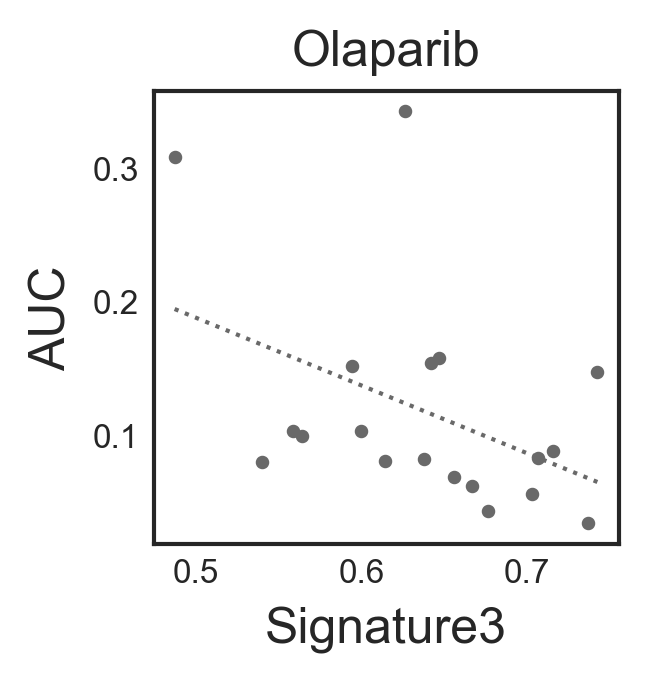

In [792]:
plt_df=auc_sigma.copy()
val1,val2='Signature_3_c','Olaparib'
plt_df=plt_df[[val1,val2]].dropna()
print(len(plt_df))
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=5,c='dimgray')
ax.set_xlabel('Signature3',fontsize=12)
ax.set_ylabel('AUC',fontsize=12)
ax.set_title(val2,fontsize=12)
ax.tick_params(labelsize=8)

lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
X=np.array([min(x),max(x)])
ax.plot(X,a*X+b,lw=1,c='dimgray',ls='dotted')
print('r = {:.3f}, p = {:.2e}'.format(r,p))

print( stats.spearmanr(x,y,nan_policy='omit') )

13
r = -0.406, p = 1.69e-01
SpearmanrResult(correlation=-0.2087912087912088, pvalue=0.493621819356885)


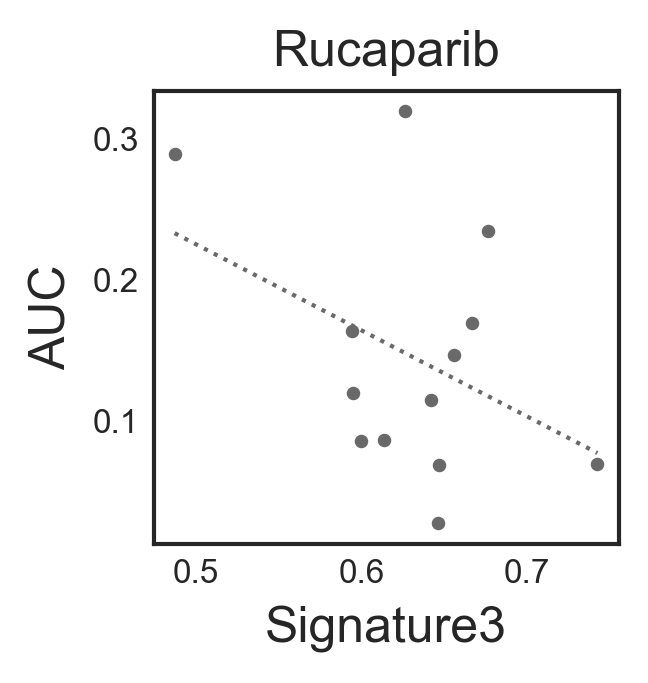

In [791]:
plt_df=auc_sigma.copy()
val1,val2='Signature_3_c','Rucaparib'
plt_df=plt_df[[val1,val2]].dropna()
print(len(plt_df))
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=5,c='dimgray')
ax.set_xlabel('Signature3',fontsize=12)
ax.set_ylabel('AUC',fontsize=12)
ax.set_title(val2,fontsize=12)
ax.tick_params(labelsize=8)

lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
X=np.array([min(x),max(x)])
ax.plot(X,a*X+b,lw=1,c='dimgray',ls='dotted')
print('r = {:.3f}, p = {:.2e}'.format(r,p))

print( stats.spearmanr(x,y,nan_policy='omit') )

13
r = -0.221, p = 4.69e-01
SpearmanrResult(correlation=-0.32967032967032966, pvalue=0.27133505450523554)


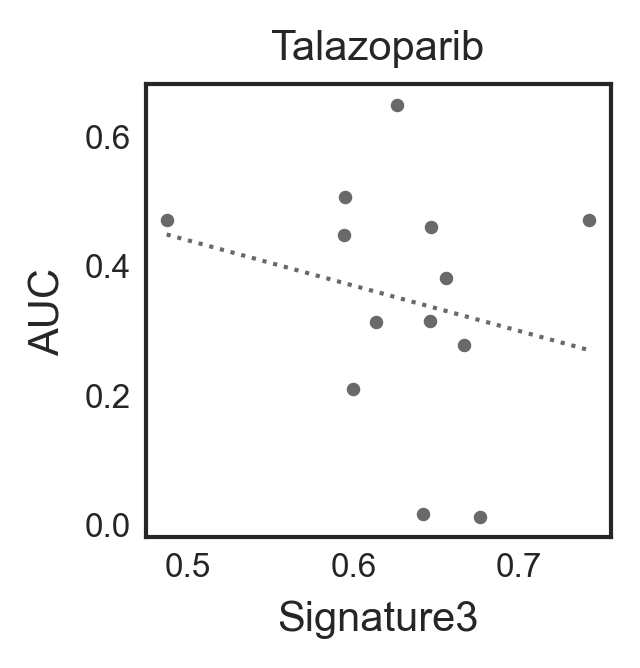

In [790]:
plt_df=auc_sigma.copy()
val1,val2='Signature_3_c','Talazoparib'
plt_df=plt_df[[val1,val2]].dropna()
print(len(plt_df))
x,y=plt_df[val1],plt_df[val2]

fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=5,c='dimgray')
ax.set_xlabel('Signature3',fontsize=10)
ax.set_ylabel('AUC',fontsize=10)
ax.set_title(val2,fontsize=10)
ax.tick_params(labelsize=8)

lr=stats.linregress(x,y)
a,b,r,p=lr.slope,lr.intercept, lr.rvalue,lr.pvalue
X=np.array([min(x),max(x)])
ax.plot(X,a*X+b,lw=1,c='dimgray',ls='dotted')
print('r = {:.3f}, p = {:.2e}'.format(r,p))

print( stats.spearmanr(x,y,nan_policy='omit') )